## Test Model 2030

In [1]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs

#pd.set_option("display.max_rows", None)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns


## Import Network

In [180]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\20240313-IT\\elec_s_7_ec_lv1.5_Co2L0.4-3hbattery2.nc")


INFO:pypsa.io:Imported network elec_s_7_ec_lv1.5_Co2L0.4-3hbattery2.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [181]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 14 entries
Component 'Carrier' has 22 entries
Component 'GlobalConstraint' has 2 entries
Component 'Line' has 6 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 15 entries
Component 'Load' has 7 entries
Component 'Generator' has 102 entries
Component 'StorageUnit' has 13 entries
Component 'Store' has 7 entries


In [182]:
n.storage_units

carrier    bus   p_nom   capital_cost    max_hours  \
StorageUnit                                                      
IT0 0 hydro   hydro  IT0 0   503.0  182698.734592  1883.284066   
IT0 1 PHS       PHS  IT0 1  2421.9  182698.734592    73.394960   
IT0 1 hydro   hydro  IT0 1  2155.6  182698.734592  1883.284066   
IT0 2 PHS       PHS  IT0 2   281.0  182698.734592     8.000000   
IT0 2 hydro   hydro  IT0 2   228.0  182698.734592  1883.284066   
IT0 3 PHS       PHS  IT0 3  1816.0  182698.734592    91.163546   
IT0 3 hydro   hydro  IT0 3    79.0  182698.734592  1883.284066   
IT0 4 PHS       PHS  IT0 4  2233.0  182698.734592    16.341809   
IT0 4 hydro   hydro  IT0 4  1127.2  182698.734592  1883.284066   
IT0 5 PHS       PHS  IT0 5   580.0  182698.734592     7.724138   
IT0 5 hydro   hydro  IT0 5    24.0  182698.734592  1883.284066   
IT1 0 PHS       PHS  IT1 0   240.0  182698.734592    39.707286   
IT1 0 hydro   hydro  IT1 0    78.0  182698.734592  1883.284066   

             efficiency_store  efficiency_dispatch  cyclic_state_of_charge  \
StorageUnit                                                                  
IT0 0 hydro          0.000000             0.900000                    True   
IT0 1 PHS            0.866025             0.866025                    True   
IT0 1 hydro          0.000000             0.900000                    True   
IT0 2 PHS            0.866025             0.866025                    True   
IT0 2 hydro          0.000000             0.900000                    True   
IT0 3 PHS            0.866025             0.866025                    True   
IT0 3 hydro          0.000000             0.900000                    True   
IT0 4 PHS            0.866025             0.866025                    True   
IT0 4 hydro          0.000000             0.900000                    True   
IT0 5 PHS            0.866025             0.866025                    True   
IT0 5 hydro          0.000000             0.900000                    True   
IT1 0 PHS            0.866025             0.866025                    True   
IT1 0 hydro          0.000000             0.900000                    True   

             p_min_pu control  p_max_pu  marginal_cost  build_year  p_nom_opt  \
StorageUnit                                                                     
IT0 0 hydro       0.0               1.0       0.010804           0      503.0   
IT0 1 PHS        -1.0               1.0       0.010967           0     2421.9   
IT0 1 hydro       0.0               1.0       0.009515           0     2155.6   
IT0 2 PHS        -1.0               1.0       0.010129           0      281.0   
IT0 2 hydro       0.0               1.0       0.010614           0      228.0   
IT0 3 PHS        -1.0               1.0       0.009789           0     1816.0   
IT0 3 hydro       0.0               1.0       0.010462           0       79.0   
IT0 4 PHS        -1.0               1.0       0.009322           0     2233.0   
IT0 4 hydro       0.0               1.0       0.010201           0     1127.2   
IT0 5 PHS        -1.0               1.0       0.010732           0      580.0   
IT0 5 hydro       0.0               1.0       0.010967           0       24.0   
IT1 0 PHS        -1.0               1.0       0.009159           0      240.0   
IT1 0 hydro       0.0               1.0       0.009857           0       78.0   

            type  p_nom_mod  p_nom_extendable  p_nom_min  p_nom_max  p_set  \
StorageUnit                                                                  
IT0 0 hydro             0.0             False        0.0        inf    0.0   
IT0 1 PHS               0.0             False        0.0        inf    0.0   
IT0 1 hydro             0.0             False        0.0        inf    0.0   
IT0 2 PHS               0.0             False        0.0        inf    0.0   
IT0 2 hydro             0.0             False        0.0        inf    0.0   
IT0 3 PHS               0.0             False        0.0        inf    0.0   
IT0 3 hydr

In [183]:
n.generators

carrier       bus    p_nom_min         p_nom  \
Generator                                                           
IT0 0 CCGT              CCGT     IT0 0     0.000000  0.000000e+00   
IT0 0 OCGT              OCGT     IT0 0  5657.000000  5.657000e+03   
IT0 0 biomass        biomass     IT0 0   150.000000  1.500000e+02   
IT0 0 coal              coal     IT0 0  2415.474826  2.415475e+03   
IT0 0 geothermal  geothermal     IT0 0     0.000000  0.000000e+00   
...                      ...       ...          ...           ...   
IT0 2 H2 load           load  IT0 2 H2     0.000000  1.000000e+09   
IT0 3 H2 load           load  IT0 3 H2     0.000000  1.000000e+09   
IT0 4 H2 load           load  IT0 4 H2     0.000000  1.000000e+09   
IT0 5 H2 load           load  IT0 5 H2     0.000000  1.000000e+09   
IT1 0 H2 load           load  IT1 0 H2     0.000000  1.000000e+09   

                  p_nom_extendable  efficiency  marginal_cost   capital_cost  \
Generator                                                                      
IT0 0 CCGT                   False    0.580000      46.813570  104788.020783   
IT0 0 OCGT                    True    0.379841      74.314393   47718.670564   
IT0 0 biomass                False    0.468000      15.838650  294201.051170   
IT0 0 coal                   False    0.330000      32.222967  337208.027448   
IT0 0 geothermal             False    1.000000       0.009724       0.000000   
...                            ...         ...            ...            ...   
IT0 2 H2 load                False    1.000000       1.010977       0.000000   
IT0 3 H2 load                False    1.000000       1.010811       0.000000   
IT0 4 H2 load                False    1.000000       1.009415       0.000000   
IT0 5 H2 load                False    1.000000       1.009585       0.000000   
IT1 0 H2 load                False    1.000000       1.010040       0.000000   

                  p_nom_max  weight control  p_max_pu   sign  build_year  \
Generator                                                                  
IT0 0 CCGT              inf    20.0   Slack       1.0  1.000           0   
IT0 0 OCGT              inf    28.0               1.0  1.000           0   
IT0 0 biomass           inf    21.0               1.0  1.000           0   
IT0 0 coal              inf    22.0               1.0  1.000           0   
IT0 0 geothermal        inf    20.0               1.0  1.000           0   
...                     ...     ...     ...       ...    ...         ...   
IT0 2 H2 load           inf     1.0      PQ       1.0  0.001           0   
IT0 3 H2 load           inf     1.0      PQ       1.0  0.001           0   
IT0 4 H2 load           inf     1.0      PQ       1.0  0.001           0   
IT0 5 H2 load           inf     1.0      PQ       1.0  0.001           0   
IT1 0 H2 load           inf     1.0      PQ       1.0  0.001           0   

                  min_up_time  min_down_time  up_time_before  \
Generator                                                      
IT0 0 CCGT                  0              0               1   
IT0 0 OCGT                  0              0               1   
IT0 0 biomass               0              0               1   
IT0 0 coal                  0              0               1   
IT0 0 geothermal            0              0               1   
...                       ...            ...             ...   
IT0 2 H2 load               0              0               1   
IT0 3 H2 load               0              0               1   
IT0 4 H2 load               0              0               1   
IT0 5 H2 load               0              0               1   
IT1 0 H2 load               0              0               1   

                  down_time_before     p_nom_opt type  p_nom_mod  p_min_pu  \
Generator                                                                    
IT0 0 CCGT                       0  0.000000e+00             0.0       0.0   
IT0 0 OCGT                

In [184]:
n.carriers

co2_emissions    color             nice_name  max_growth  \
Carrier                                                                     
AC                      0.0000  #70af1d                    AC         inf   
DC                      0.0000  #8a1caf                    DC         inf   
geothermal              0.1200  #ba91b1            geothermal         inf   
lignite                 0.4069  #826837               lignite         inf   
solar                   0.0000  #f9d002                 Solar         inf   
coal                    0.3361  #545454                  coal         inf   
OCGT                    0.1980  #e0986c        Open-Cycle Gas         inf   
biomass                 0.0000  #baa741               biomass         inf   
nuclear                 0.0000  #ff8c00               nuclear         inf   
onwind                  0.0000  #235ebc          Onshore Wind         inf   
offwind-dc              0.0000  #74c6f2    Offshore Wind (DC)         inf   
CCGT                    0.1980  #a85522    Combined-Cycle Gas         inf   
oil                     0.2571  #c9c9c9                   oil         inf   
offwind-ac              0.0000  #6895dd    Offshore Wind (AC)         inf   
hydro                   0.0000  #298c81       Reservoir & Dam         inf   
PHS                     0.0000  #51dbcc  Pumped Hydro Storage         inf   
ror                     0.0000  #3dbfb0          Run of River         inf   
                        0.0000                                        inf   
H2                      0.0000  #bf13a0      Hydrogen Storage         inf   
H2 fuel cell            0.0000  #c251ae          H2 fuel cell         inf   
H2 electrolysis         0.0000  #ff29d9       H2 electrolysis         inf   
load                    0.0000  #dd2e23         Load shedding         inf   

                 max_relative_growth  
Carrier                               
AC                               0.0  
DC                               0.0  
geothermal                       0.0  
lignite                          0.0  
solar                            0.0  
coal                             0.0  
OCGT                             0.0  
biomass                          0.0  
nuclear                          0.0  
onwind                           0.0  
offwind-dc                       0.0  
CCGT                             0.0  
oil                              0.0  
offwind-ac                       0.0  
hydro                            0.0  
PHS                              0.0  
ror                              0.0  
                                 0.0  
H2                               0.0  
H2 fuel cell                     0.0  
H2 electrolysis                  0.0  
load                             0.0

In [185]:
#solve model
n.lopf(solver_name='gurobi')

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1970906577.py:2: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  n.lopf(solver_name='gurobi')
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 8.26s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\pypsa-problem-2_3tljeu.lp
Reading time = 4.72 seconds
obj: 1089162 rows, 534421 columns, 2023377 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1089162 rows, 534421 columns and 2023377 nonzeros
Model fingerprint: 0x2a808659
Coefficient statistics:
  Matrix range     [1e-03, 6e+02]
  Objective range  [3e-02, 2e+05]
  Bounds range     [1e+00, 3e+09]
  RHS range        [2e+00, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 835390 rows and 172733 columns
Presolve time: 1.90s
Presolved: 253772 rows, 361688 columns, 936451 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Order

INFO:pypsa.linopf:Optimization successful. Objective value: 1.16e+10


('ok', 'optimal')

In [178]:
n.objective/1e9

11.626573046150861

In [9]:
stat_base = n.statistics()
stat_base

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas        0.000000e+00        0.000000e+00   
            Load shedding             1.400000e+10        1.400000e+10   
            Offshore Wind (AC)        0.000000e+00        0.000000e+00   
            Offshore Wind (DC)        0.000000e+00        0.000000e+00   
            Onshore Wind              0.000000e+00        0.000000e+00   
            Open-Cycle Gas            3.942020e+04        3.942020e+04   
            Run of River              7.871540e+03        7.871540e+03   
            Solar                     9.052394e+04        0.000000e+00   
            biomass                   5.080000e+02        5.080000e+02   
            coal                      7.275926e+03        7.275926e+03   
            geothermal                5.900000e+01        5.900000e+01   
            lignite                   0.000000e+00        0.000000e+00   
            nuclear                   0.000000e+00        0.000000e+00   
            oil                       1.500000e+02        1.500000e+02   
Line        AC                        5.295399e+04        5.295399e+04   
Link        DC                        1.000000e+03        1.000000e+03   
            H2 electrolysis           0.000000e+00        0.000000e+00   
            H2 fuel cell              0.000000e+00        0.000000e+00   
Load        -                         0.000000e+00        0.000000e+00   
StorageUnit Pumped Hydro Storage      7.571900e+03        7.571900e+03   
            Reservoir & Dam           4.194800e+03        4.194800e+03   
Store       Hydrogen Storage          0.000000e+00        0.000000e+00   

                                  Capacity Factor      Dispatch  Transmission  \
Generator   Combined-Cycle Gas                NaN  0.000000e+00  0.000000e+00   
            Load shedding                0.000000  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)                NaN  0.000000e+00  0.000000e+00   
            Offshore Wind (DC)                NaN  0.000000e+00  0.000000e+00   
            Onshore Wind                      NaN  0.000000e+00  0.000000e+00   
            Open-Cycle Gas               0.289550  9.998762e+07  0.000000e+00   
            Run of River                 0.478771  3.301350e+07  0.000000e+00   
            Solar                        0.139546  1.106584e+08  0.000000e+00   
            biomass                      0.888884  3.955604e+06  0.000000e+00   
            coal                         0.856992  5.462219e+07  0.000000e+00   
            geothermal                   1.000000  5.168400e+05  0.000000e+00   
            lignite                           NaN  0.000000e+00  0.000000e+00   
            nuclear                           NaN  0.000000e+00  0.000000e+00   
            oil                          0.000000  0.000000e+00  0.000000e+00   
Line        AC                           0.289482  0.000000e+00 -1.158484e+07   
Link        DC                           0.543520  0.000000e+00 -4.395102e+06   
            H2 electrolysis                   NaN  0.000000e+00  0.000000e+00   
            H2 fuel cell                      NaN  0.000000e+00  0.000000e+00   
Load        -                                 NaN -3.160267e+08  0.000000e+00   
StorageUnit Pumped Hydro Storage         0.324430 -3.074205e+06  0.000000e+00   
            Reservoir & Dam              0.444855  1.634683e+07  0.000000e+00   
Store       Hydrogen Storage                  NaN  0.000000e+00  0.000000e+00   

                                    Withdrawal        Supply   Curtailment  \
Generator   Combined-Cycle Gas    0.000000e+00  0.000000e+00  0.000000e+00   
            Load shedding         0.000000e+00  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)    0.000000e+00  0.000000e+00  0.000000e+00   
            Offshore Wind (DC)    0.000000e+00  0.000000e+00  0.000000e+00   
            Onshore Wind          0.000000e+00  0.000000e+00  0.000000e+00   

## Plot Network

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


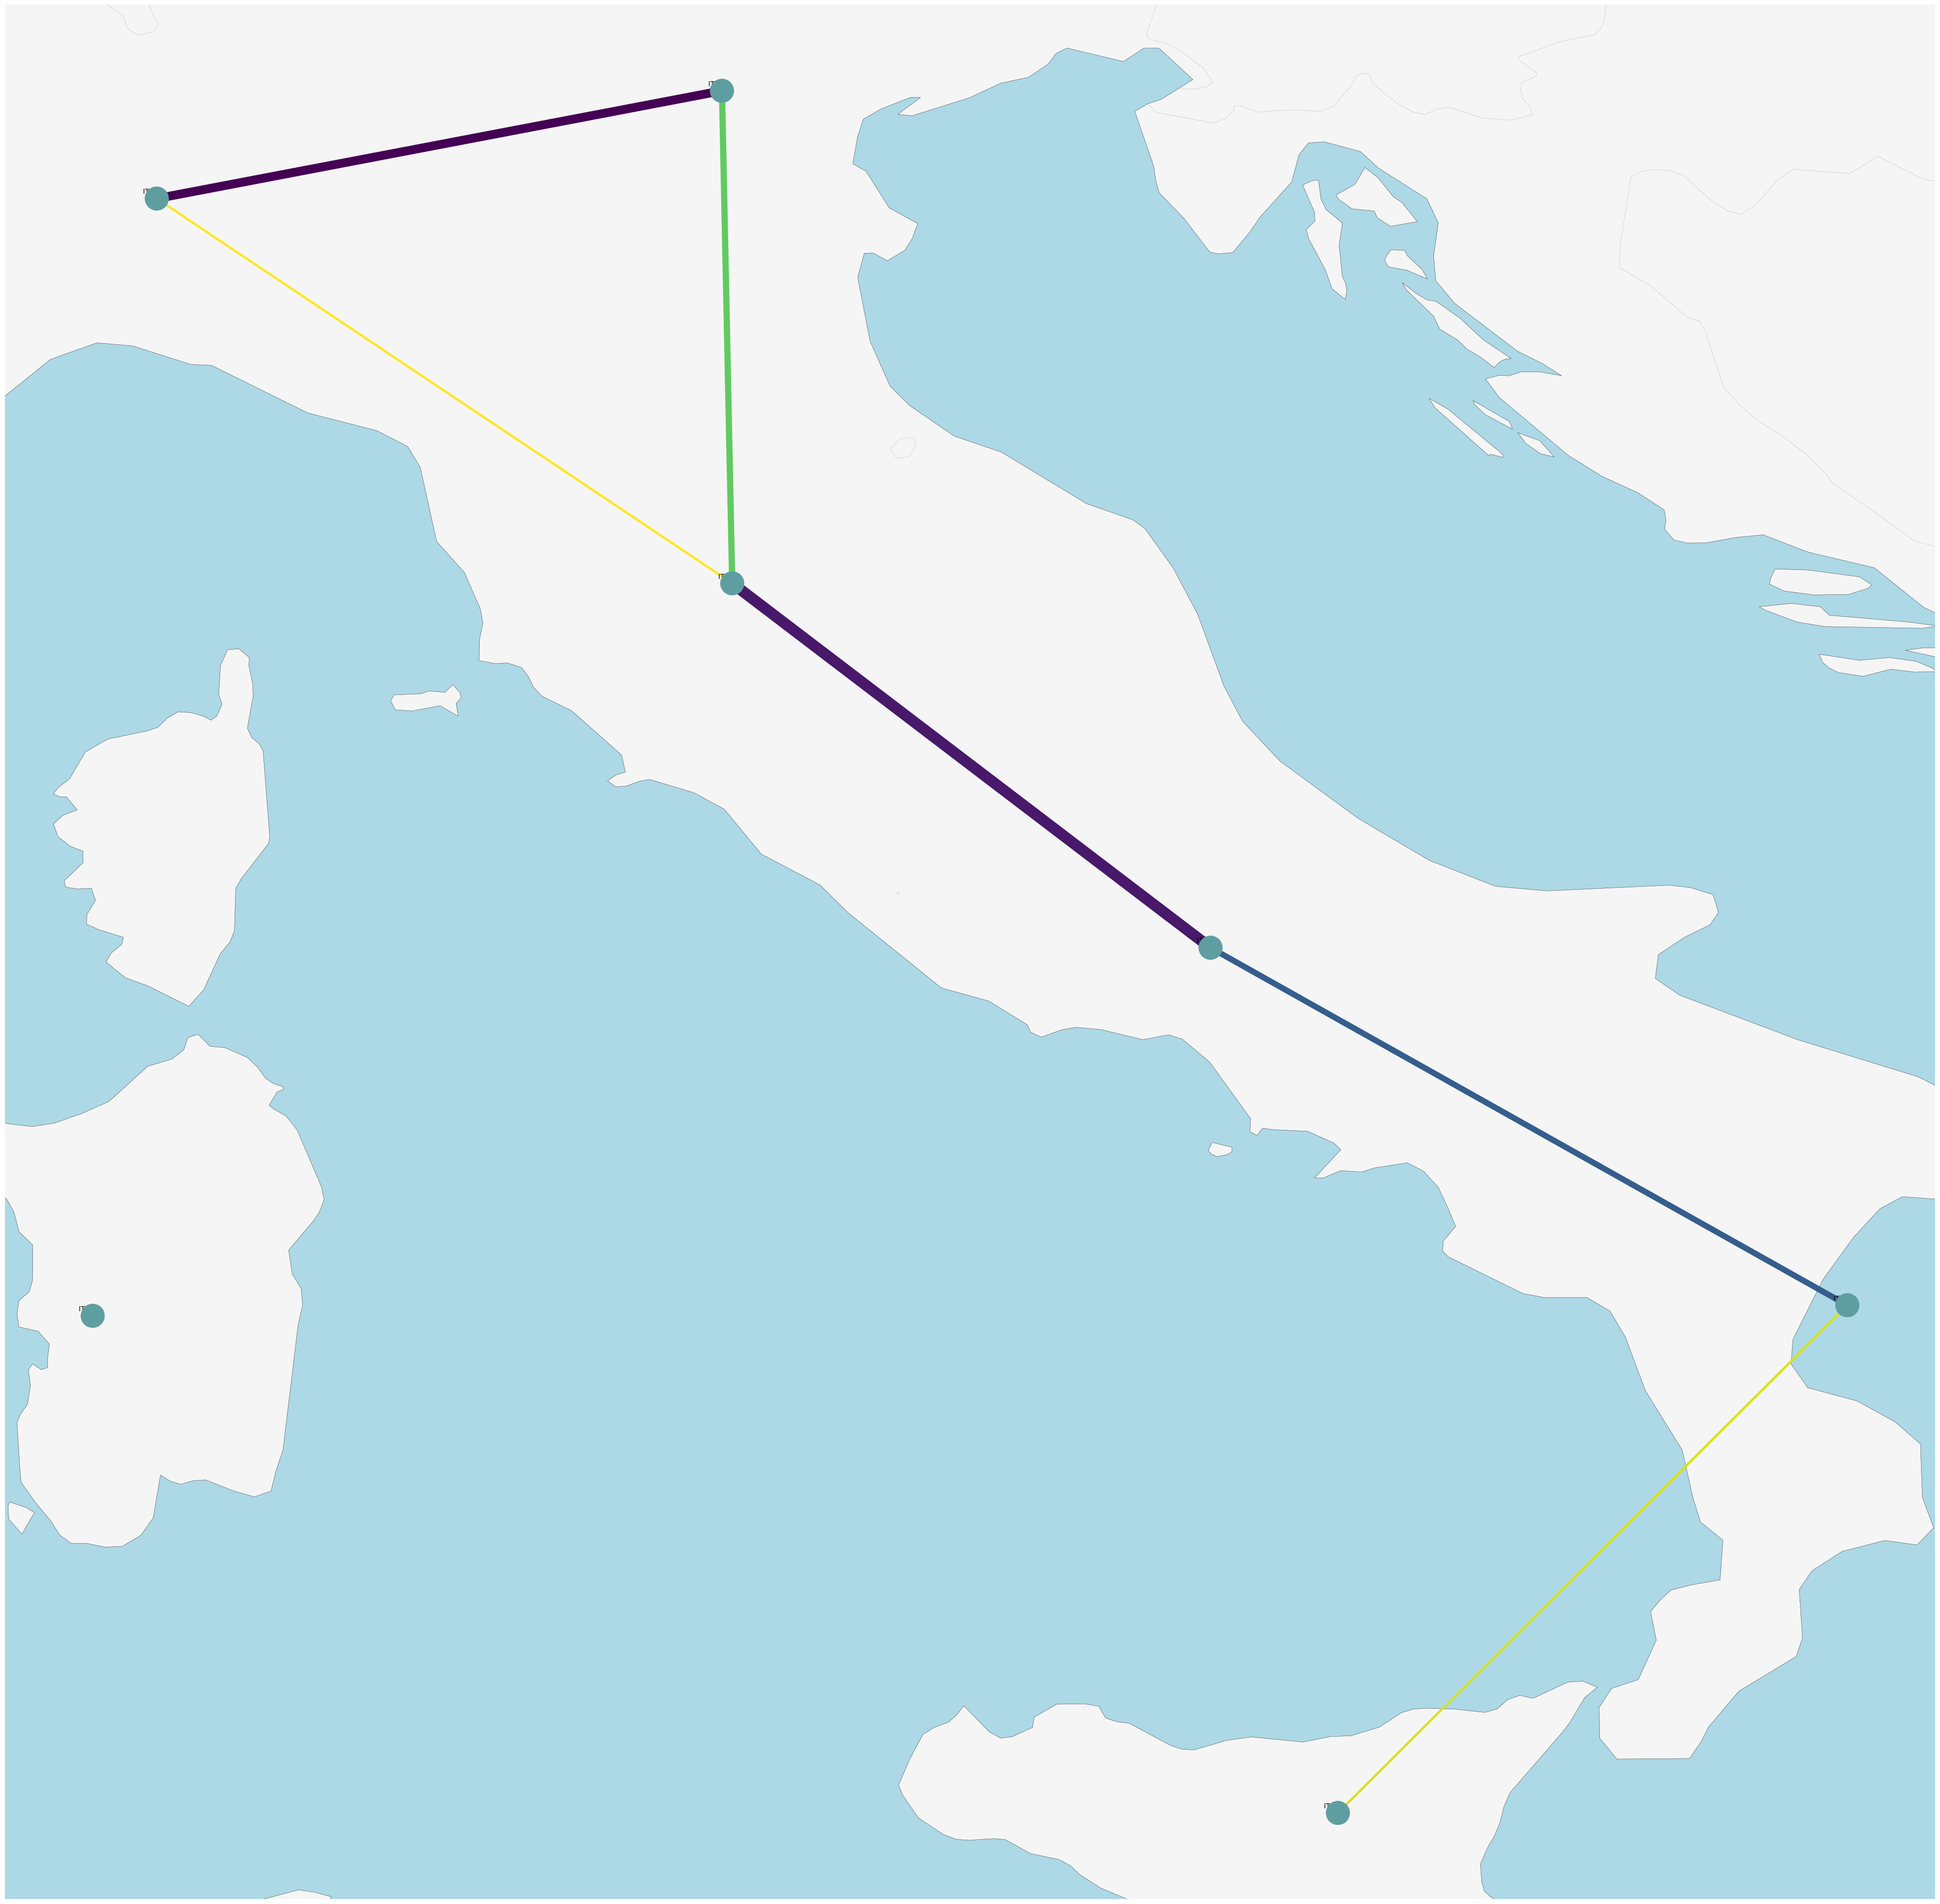

In [10]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(50,50),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show





## Installed Capacity

In [11]:
tech_list = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
colors = []

for i in range(len(tech_list)):
    for j in range(len(n.carriers.index)):
        if tech_list[i] == n.carriers.index[j]:
            colors.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\2696175137.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors.append(n.carriers.color[j])


In [12]:
def inst_cap_table(colors,gen):
    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

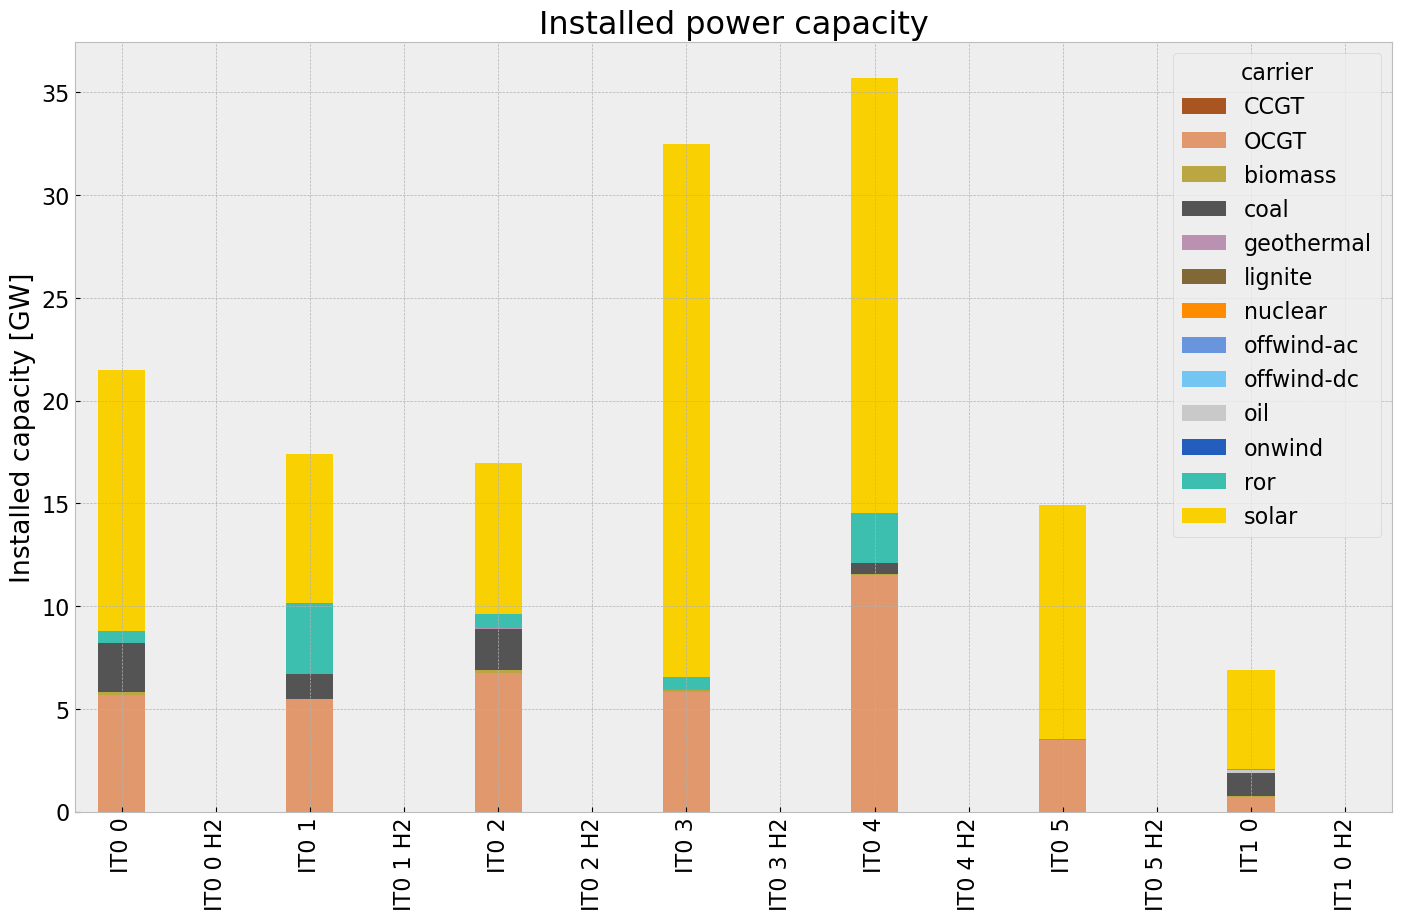

In [13]:
# consolidated istalled cap without load_shedding

capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities.fillna(0, inplace=True)
gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)


inst_cap_table(colors,gen)

## Generation

In [14]:
def gen_power_table(gen_t, colors):

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen_t.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\2759523375.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen_table.append(n.carriers.color[j])


<Figure size 640x480 with 0 Axes>

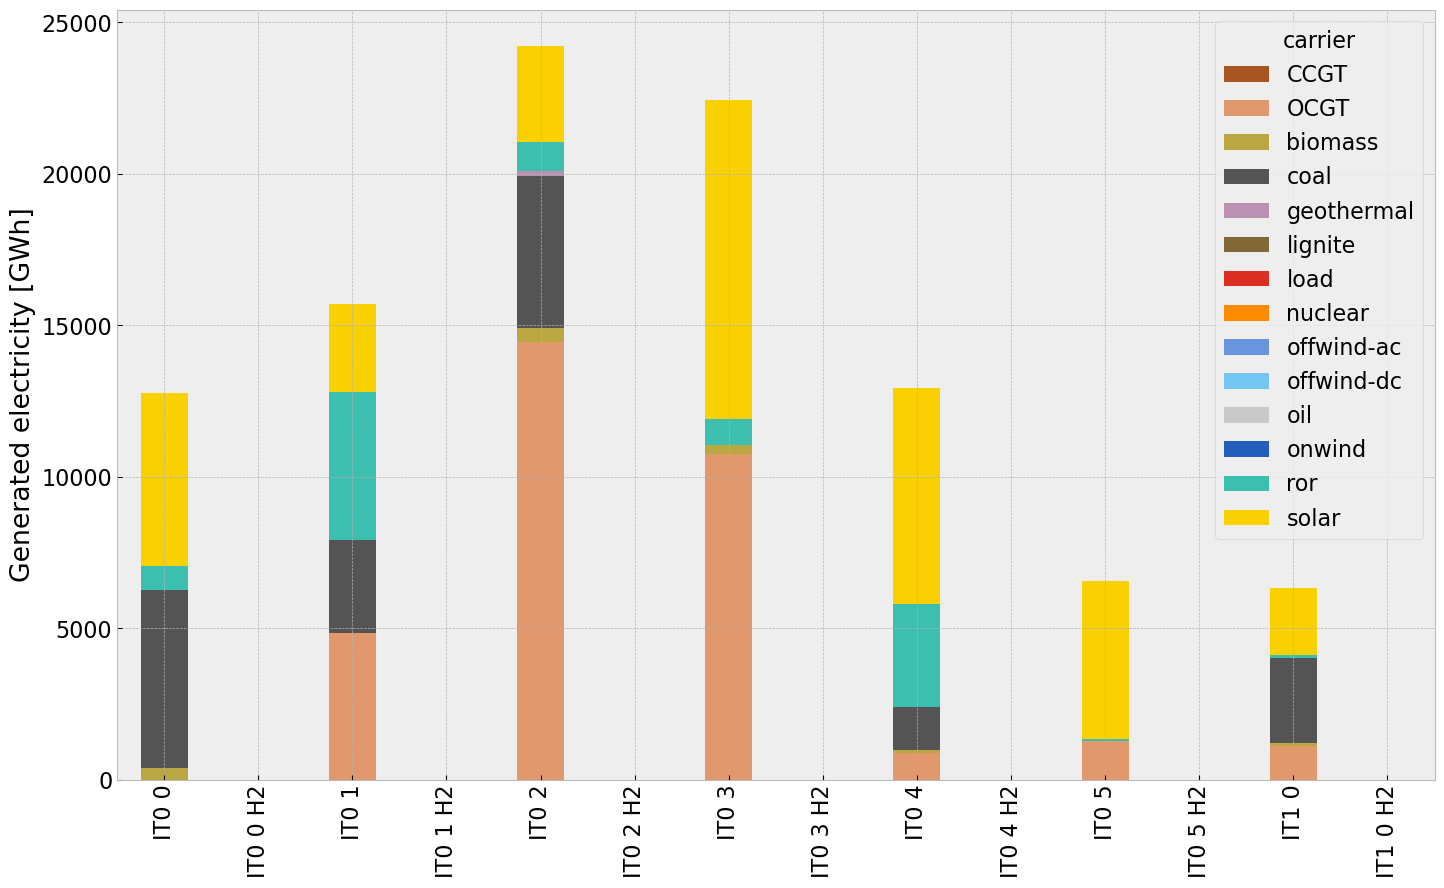

In [15]:
# consolidated generation table
carrier = n.generators.carrier.unique()
df_tot_generation = n.generators_t.p.sum()

generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')

gen_t =(generations.unstack()/1000)#GWh

#colors with load
tech_list_gen_table = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
colors_gen_table = []

for i in range(len(tech_list_gen_table)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen_table[i] == n.carriers.index[j]:
            colors_gen_table.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  


gen_power_table(gen_t,colors_gen_table)

In [16]:
for i,v in n.generators_t.p.sum().items():
    if i.endswith('load'):
        print(i,v)

IT0 0 H2 load 0.0
IT0 0 load 0.0
IT0 1 H2 load 0.0
IT0 1 load 0.0
IT0 2 H2 load 0.0
IT0 2 load 0.0
IT0 3 H2 load 0.0
IT0 3 load 0.0
IT0 4 H2 load 0.0
IT0 4 load 0.0
IT0 5 H2 load 0.0
IT0 5 load 0.0
IT1 0 H2 load 0.0
IT1 0 load 0.0


## Snapshot

In [147]:
def gen_curve_month_summer(p_by_carrier,sto, colors):

    plt.rcParams.update({'font.size': 16})

    time="2013-06"

    #p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
    #    sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
       p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(20, 10))
        
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta"],
            grid=True,
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k',grid=True)

    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-15,60)

In [148]:
sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
tech_list_gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
tech_list_gen = pd.concat([tech_list_gen, sto], axis=1)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\610698638.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\610698638.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  tech_list_gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1011866056.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen.append(n.carriers.color[j])
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1011866056.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1011866056.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


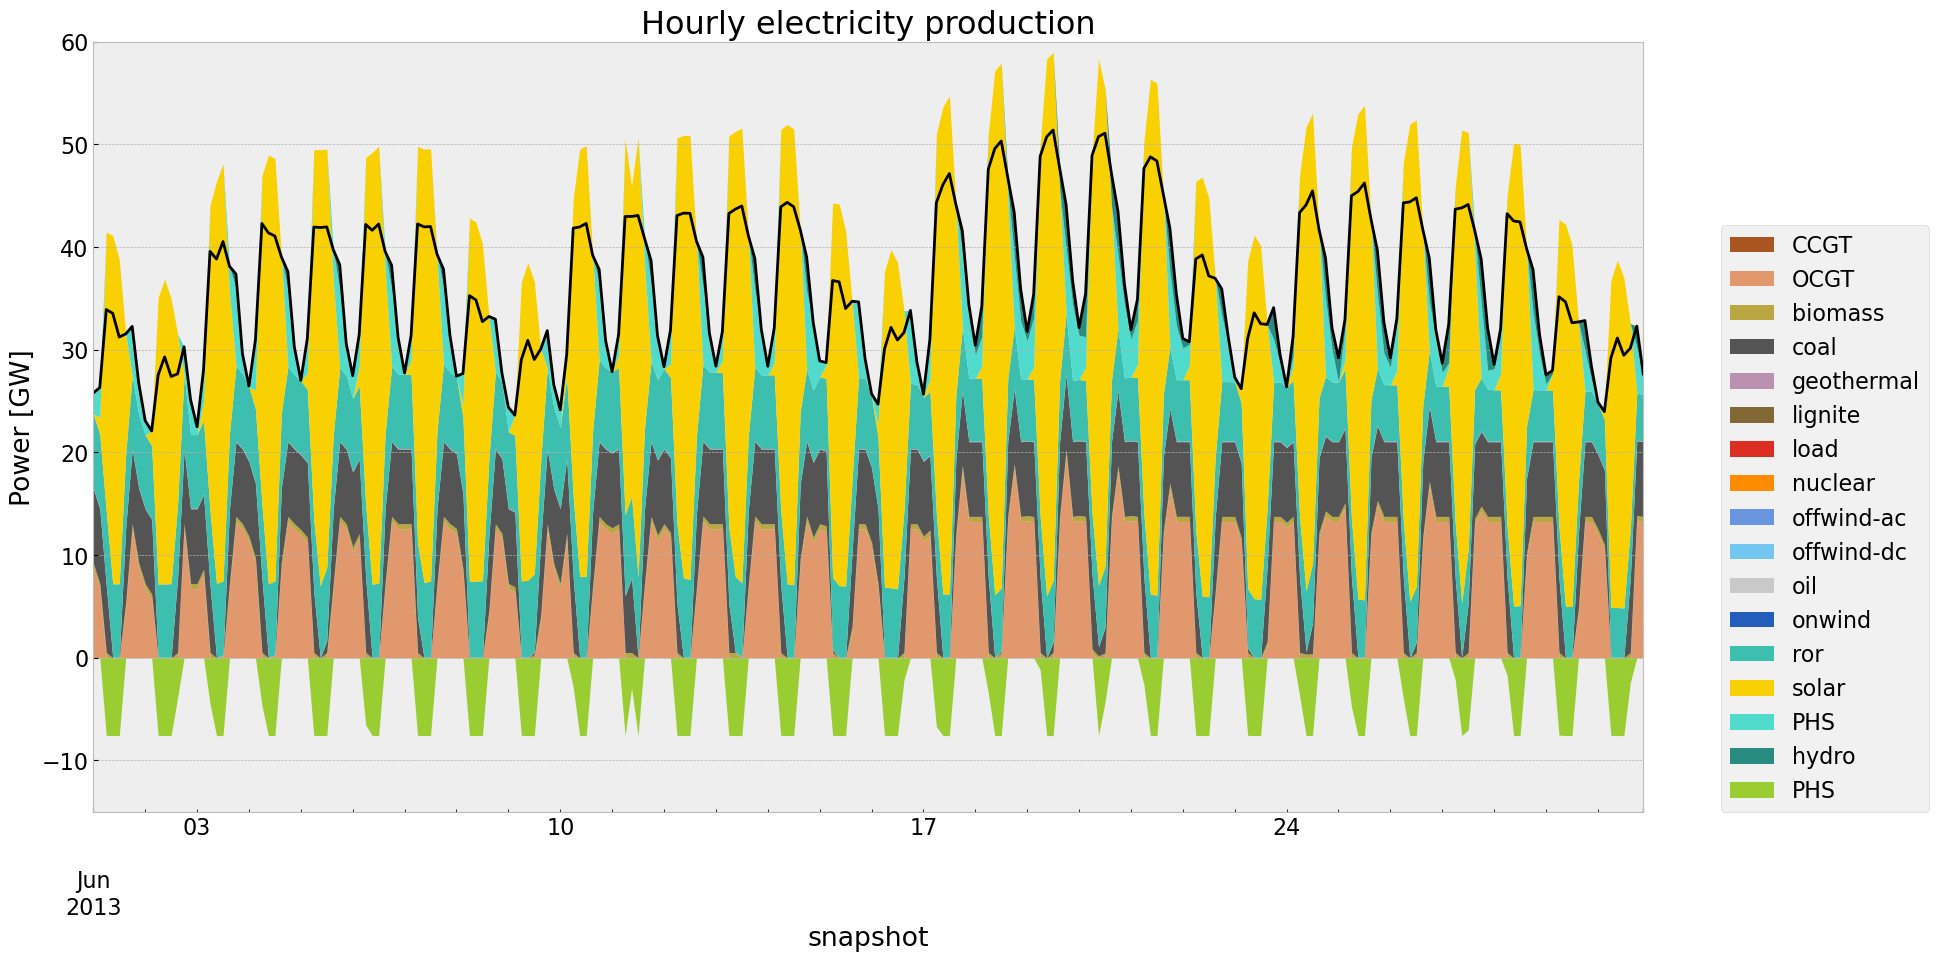

In [149]:

tech_list_gen = tech_list_gen.columns.tolist()
colors_gen = []

for i in range(len(tech_list_gen)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen[i] == n.carriers.index[j]:
            colors_gen.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  

p = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)

sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


gen_curve_month_summer(p, sto, colors_gen)

In [150]:
def gen_curve_month_winter(p_by_carrier, sto, colors):

    plt.rcParams.update({'font.size': 16})

    start_date = '2013-12-01'
    end_date = '2013-12-31'
    
    # Create a date range for the specified time range
    time = pd.date_range(start=start_date, end=end_date,freq='3H')

    #p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        #sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(20, 10))
        
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta"],
            grid=True,
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k',grid=True)

    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-15,60)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1492059698.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(start=start_date, end=end_date,freq='3H')
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


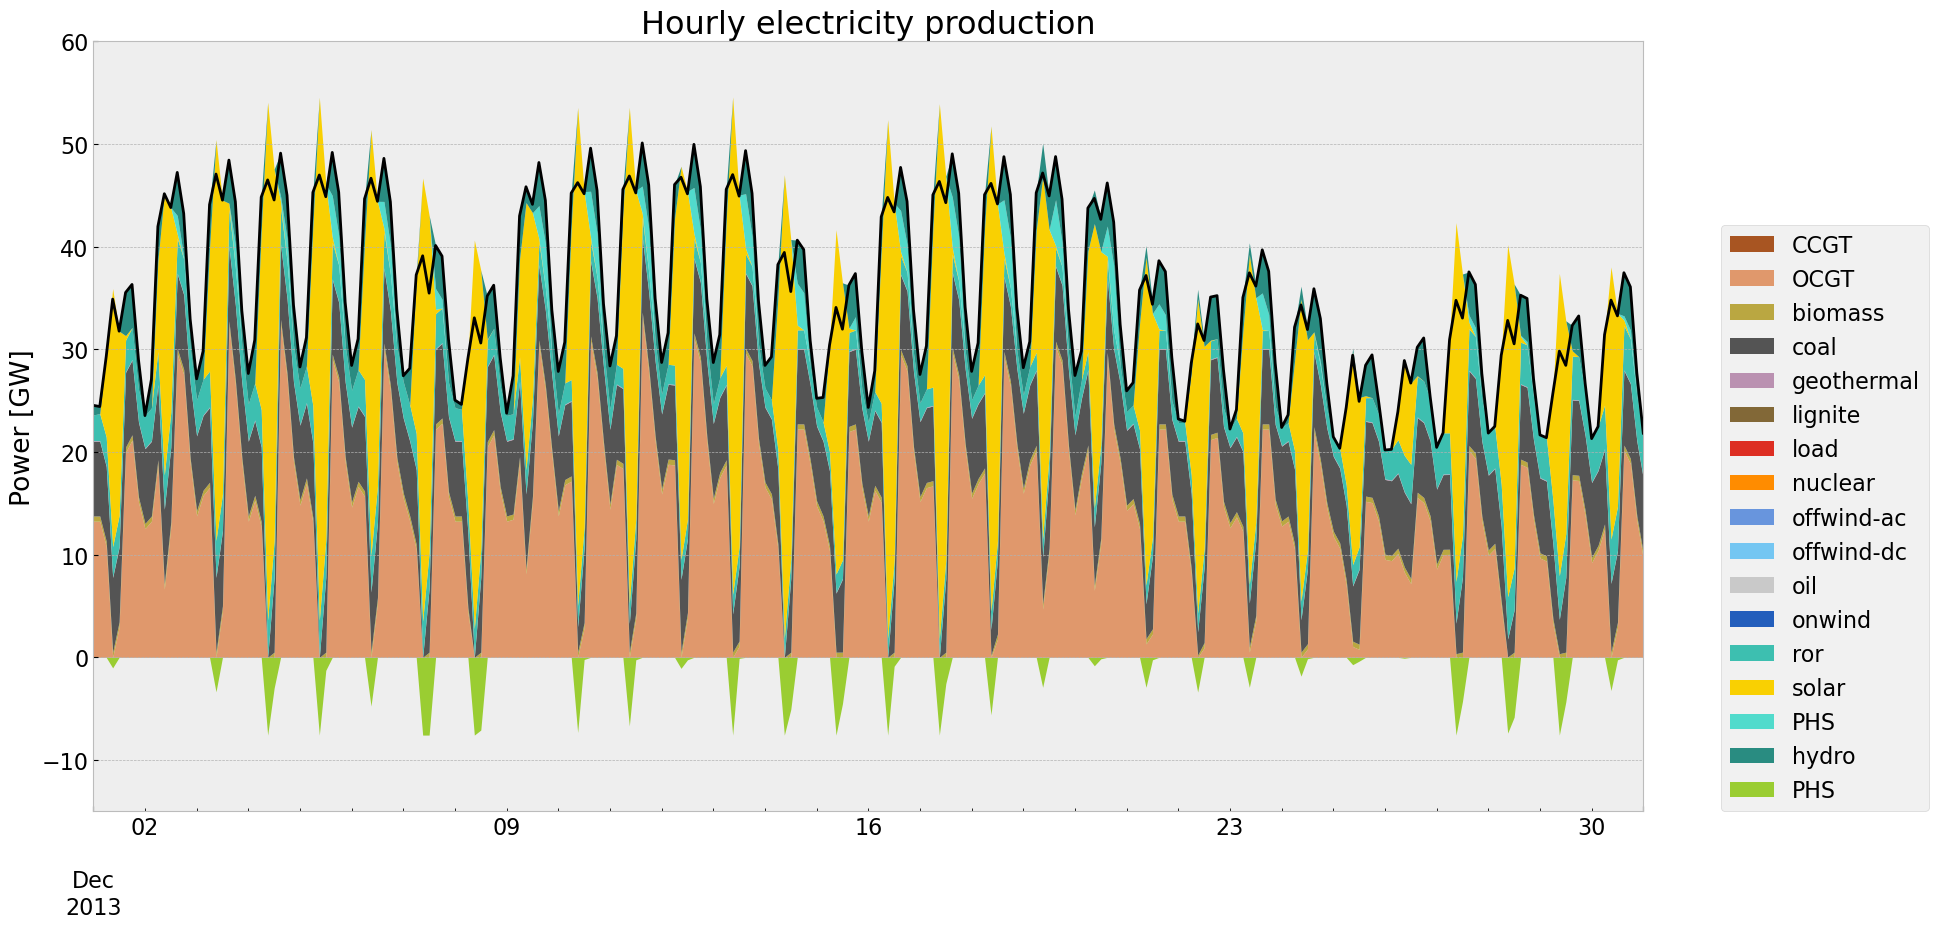

In [151]:
gen_curve_month_winter(p,sto, colors_gen)

## Storage

In [25]:
def inst_store_table(n):
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta","red","blue"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                ylim=[0,20]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

carrier     PHS   hydro
bus                    
IT0 0       NaN  0.5030
IT0 1    2.4219  2.1556
IT0 2    0.2810  0.2280
IT0 3    1.8160  0.0790
IT0 4    2.2330  1.1272
IT0 5    0.5800  0.0240
IT1 0    0.2400  0.0780

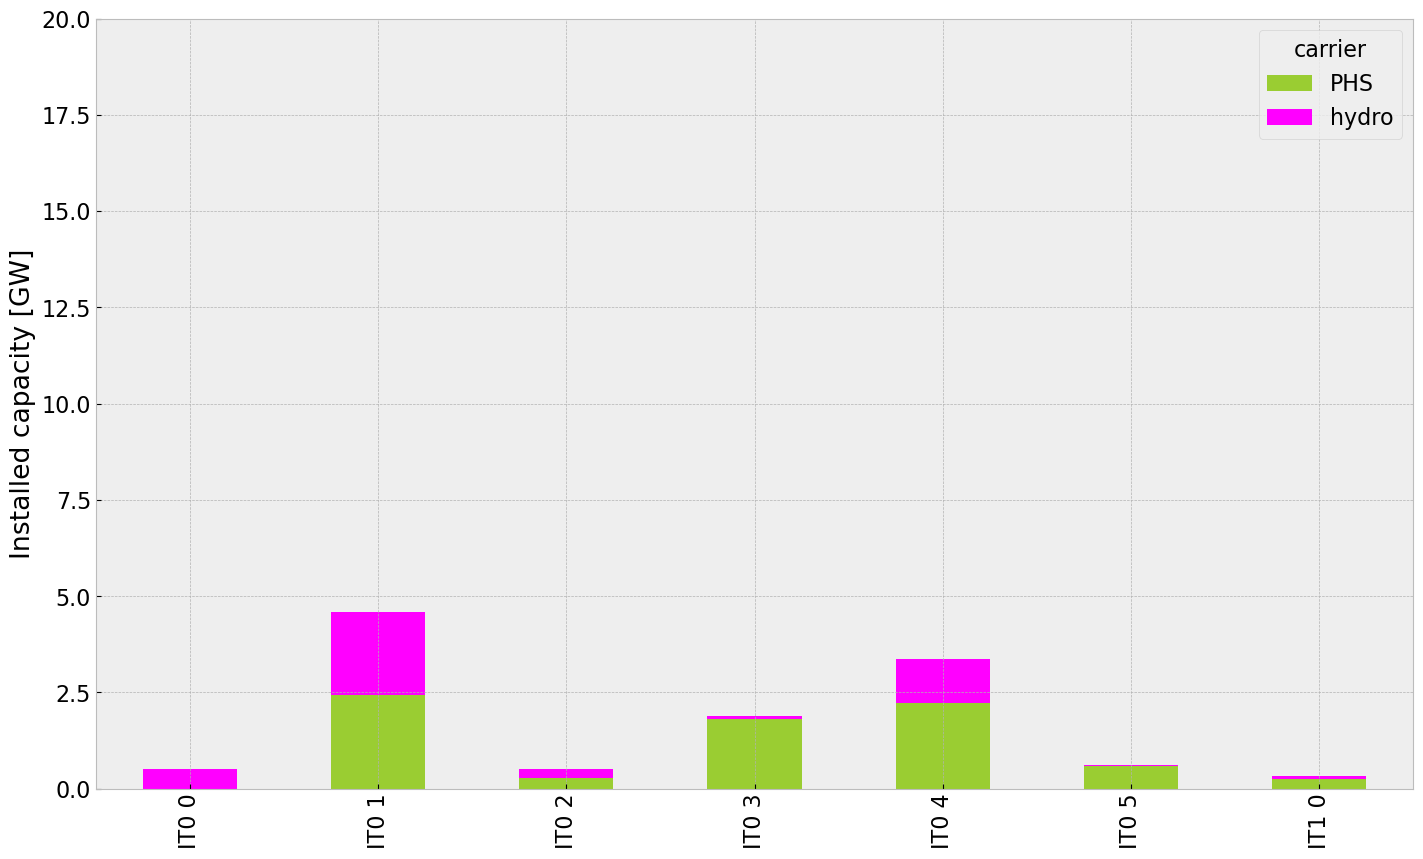

In [26]:
inst_store_table(n)

In [27]:
def state_of_charge_plot(n):
    
    soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    soc.plot(ax=ax,
        grid=True,
        ylabel="State of charge [GWh]",
        xlabel="Time",
        #title=f"State of charge of aggregated storage systems in Italy in {year}",
        linewidth=1.5,
)

plt.show(n)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\2765649672.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


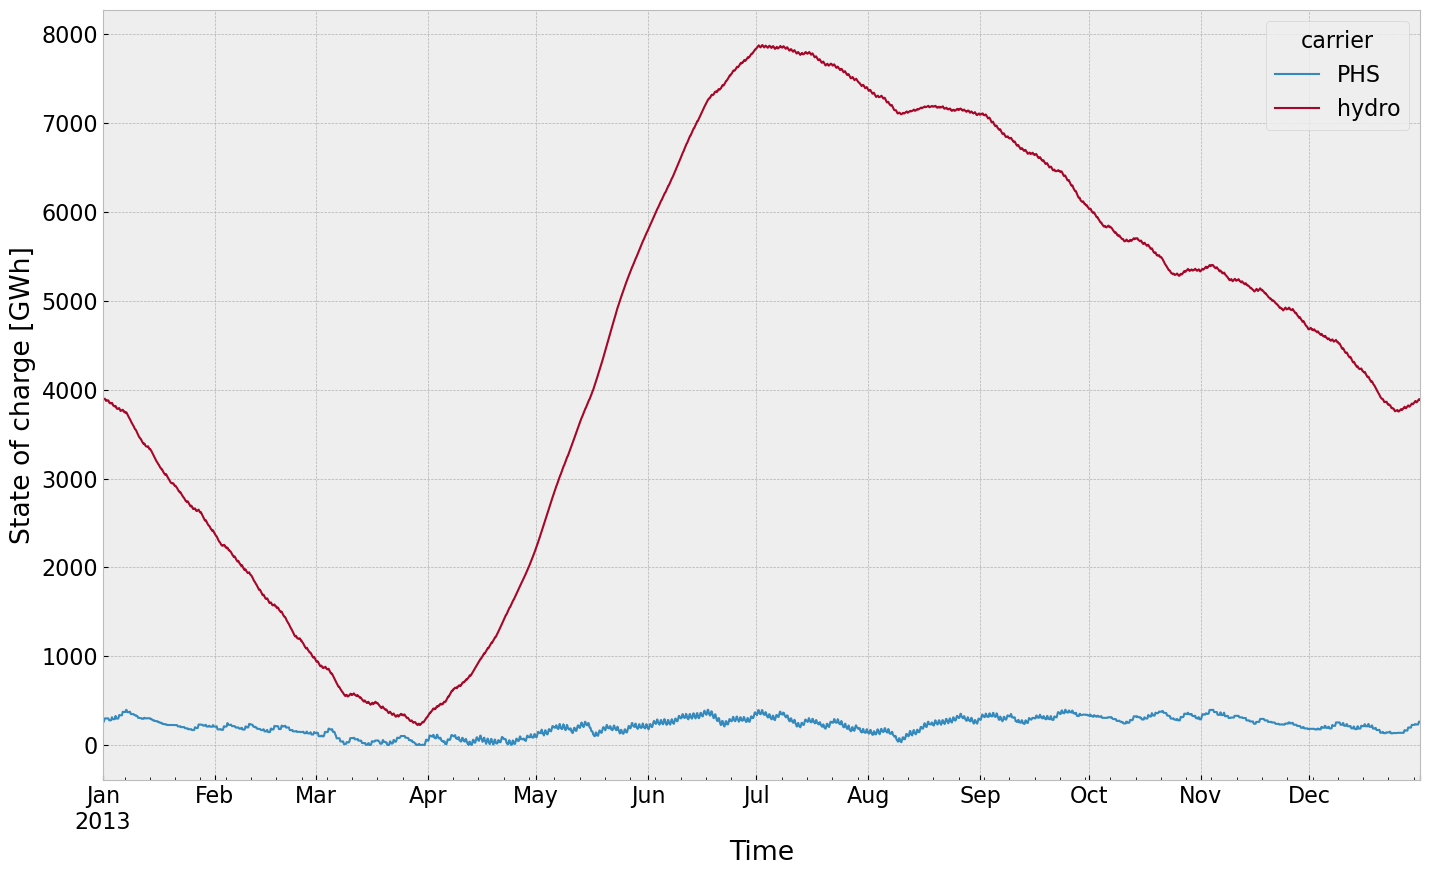

In [28]:
state_of_charge_plot(n)

## Electricity Price

In [29]:
def price_dur_curve_plot(n):

    #buses without store
    columns_to_keep =[]

    for i in n.buses_t.marginal_price.columns.tolist():
        if not i.endswith('H2'):
            columns_to_keep.append(i)
    
    price_dur_curve = pd.DataFrame()
    for region in columns_to_keep:
        price_dur_curve[region] = n.buses_t.marginal_price[region].sort_values(ascending=False).reset_index(drop=True)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    price_dur_curve.plot(ax=ax,
                    grid=True,
                    ylabel="Marginal price [€/MWh]",
                    xlabel="Time steps",
                    #title=f"Duration curves of the marginal price in the Italian regions in {year}",
                    linewidth=3,
)

plt.show()

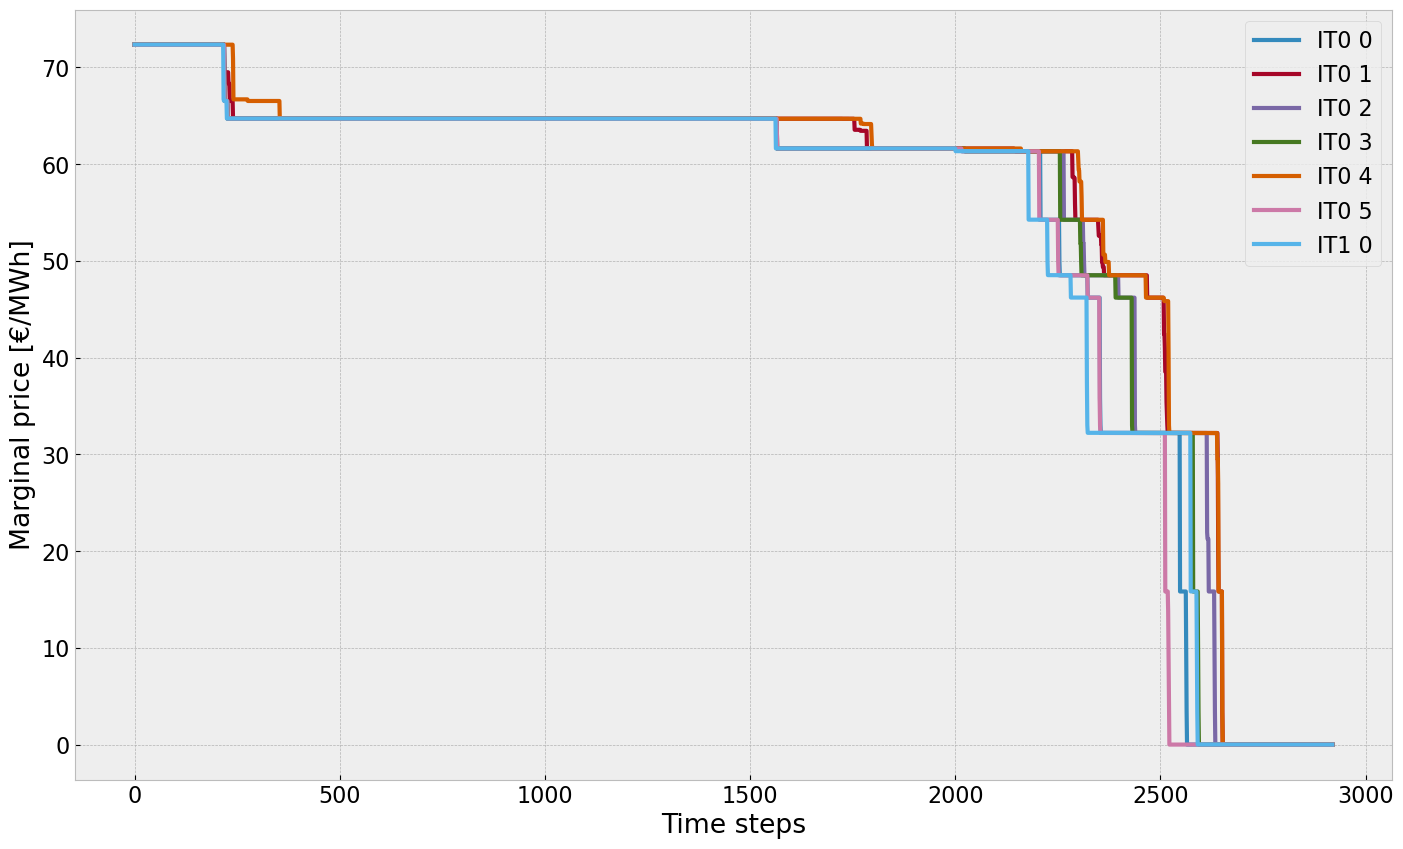

In [30]:
price_dur_curve_plot(n)

In [31]:
def price_regions_table(n):

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    
    region = n.buses_t.marginal_price.mean()
    for index, value in region.items():
        if index.endswith('H2'):
            region = region.drop(index)
    
    region.plot.bar(ax=ax,
                    grid=True,
                    ylabel="Marginal price [€/MWh]",
                    xlabel="Region",
                    title=f"Average marginal price",
                    linewidth=3,
    
    )

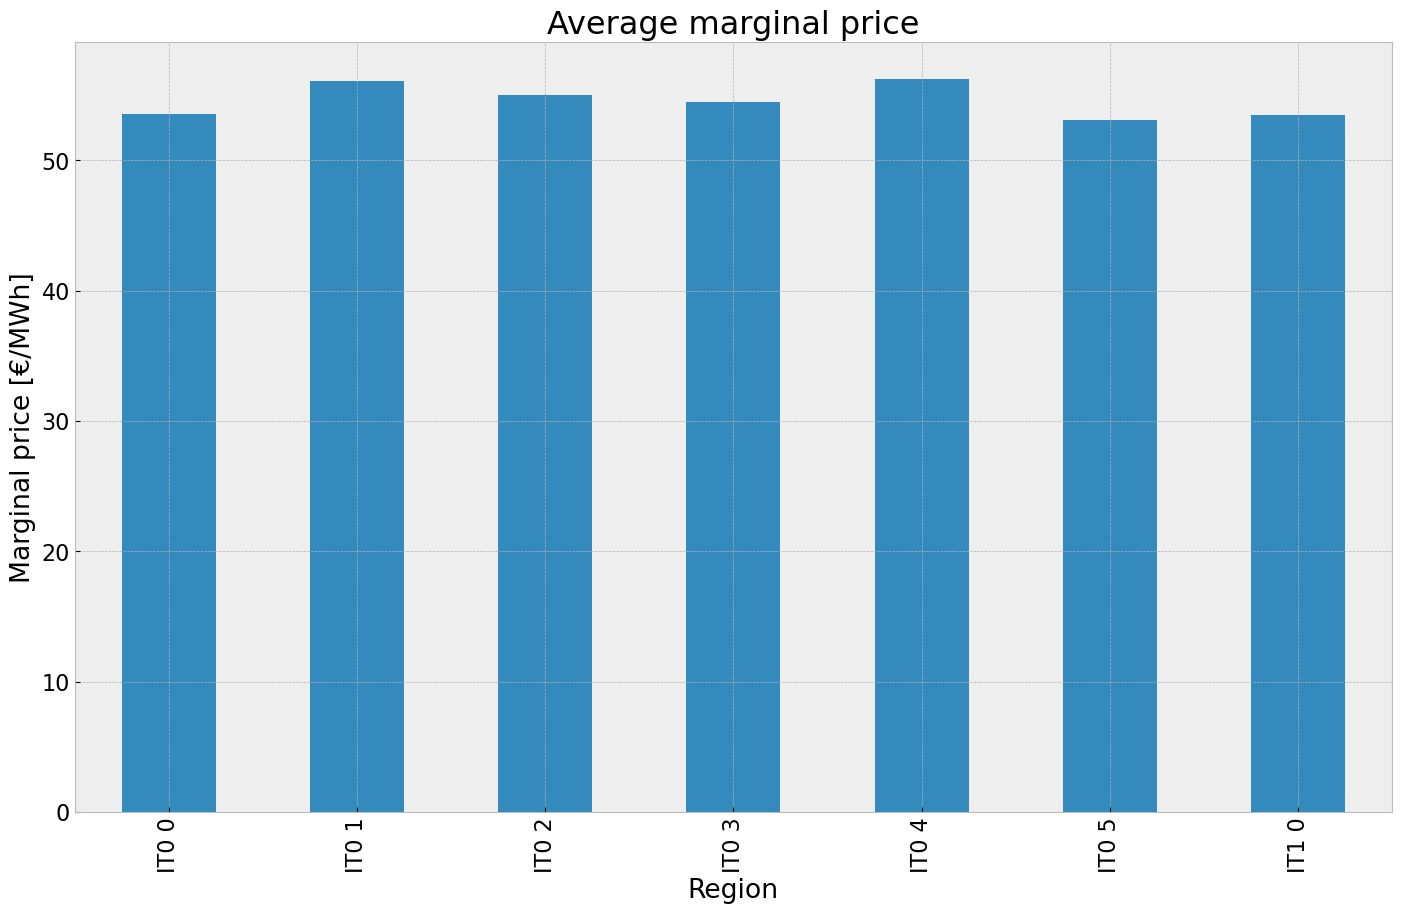

In [32]:
price_regions_table(n)

# Volcano Erruption Scenario
eruption start: 01.06.2013
reduction on radiation: 10%, source:
duration : until year end

In [33]:
n.generators

carrier       bus    p_nom_min         p_nom  \
Generator                                                           
IT0 0 CCGT              CCGT     IT0 0     0.000000  0.000000e+00   
IT0 0 OCGT              OCGT     IT0 0  5657.000000  5.657000e+03   
IT0 0 biomass        biomass     IT0 0   150.000000  1.500000e+02   
IT0 0 coal              coal     IT0 0  2415.474826  2.415475e+03   
IT0 0 geothermal  geothermal     IT0 0     0.000000  0.000000e+00   
...                      ...       ...          ...           ...   
IT0 2 H2 load           load  IT0 2 H2     0.000000  1.000000e+09   
IT0 3 H2 load           load  IT0 3 H2     0.000000  1.000000e+09   
IT0 4 H2 load           load  IT0 4 H2     0.000000  1.000000e+09   
IT0 5 H2 load           load  IT0 5 H2     0.000000  1.000000e+09   
IT1 0 H2 load           load  IT1 0 H2     0.000000  1.000000e+09   

                  p_nom_extendable  efficiency  marginal_cost   capital_cost  \
Generator                                                                      
IT0 0 CCGT                   False    0.580000      46.813570  104788.020783   
IT0 0 OCGT                    True    0.379841      74.314393   47718.670564   
IT0 0 biomass                False    0.468000      15.838650  294201.051170   
IT0 0 coal                   False    0.330000      32.222967  337208.027448   
IT0 0 geothermal             False    1.000000       0.009724       0.000000   
...                            ...         ...            ...            ...   
IT0 2 H2 load                False    1.000000       1.010977       0.000000   
IT0 3 H2 load                False    1.000000       1.010811       0.000000   
IT0 4 H2 load                False    1.000000       1.009415       0.000000   
IT0 5 H2 load                False    1.000000       1.009585       0.000000   
IT1 0 H2 load                False    1.000000       1.010040       0.000000   

                  p_nom_max  weight control  p_max_pu   sign  build_year  \
Generator                                                                  
IT0 0 CCGT              inf    20.0   Slack       1.0  1.000           0   
IT0 0 OCGT              inf    28.0               1.0  1.000           0   
IT0 0 biomass           inf    21.0               1.0  1.000           0   
IT0 0 coal              inf    22.0               1.0  1.000           0   
IT0 0 geothermal        inf    20.0               1.0  1.000           0   
...                     ...     ...     ...       ...    ...         ...   
IT0 2 H2 load           inf     1.0   Slack       1.0  0.001           0   
IT0 3 H2 load           inf     1.0   Slack       1.0  0.001           0   
IT0 4 H2 load           inf     1.0   Slack       1.0  0.001           0   
IT0 5 H2 load           inf     1.0   Slack       1.0  0.001           0   
IT1 0 H2 load           inf     1.0   Slack       1.0  0.001           0   

                  min_up_time  min_down_time  up_time_before  \
Generator                                                      
IT0 0 CCGT                  0              0               1   
IT0 0 OCGT                  0              0               1   
IT0 0 biomass               0              0               1   
IT0 0 coal                  0              0               1   
IT0 0 geothermal            0              0               1   
...                       ...            ...             ...   
IT0 2 H2 load               0              0               1   
IT0 3 H2 load               0              0               1   
IT0 4 H2 load               0              0               1   
IT0 5 H2 load               0              0               1   
IT1 0 H2 load               0              0               1   

                  down_time_before     p_nom_opt type  p_nom_mod  p_min_pu  \
Generator                                                                    
IT0 0 CCGT                       0  0.000000e+00             0.0       0.0   
IT0 0 OCGT                

In [126]:
#copy network
n1=n.copy()

#p_max_pu of solar generators across all regions are subtracted by 10% from 01.06.2013 to 31.12.13
eruption_start=pd.to_datetime('2013-06-01 00:00:00')
for column in n1.generators_t.p_max_pu.columns:
        if column.endswith('solar'):
                for index,row in n1.generators_t.p_max_pu[column].items():
                        if index >= eruption_start:
                                new_p_max_pu = n1.generators_t.p_max_pu.at[index, column] * 0.5 #0.1
                                n1.generators_t.p_max_pu.at[index, column] = new_p_max_pu
                                if new_p_max_pu<0:
                                    n1.generators_t.p_max_pu.at[index, column] = 0


#set the optimal capacity of generators from the base scenario as the new minimum capacity 
for index, value in n1.generators.p_nom_extendable.items():
    if value:  
        n1.generators.at[index, 'p_nom_min'] = n.generators.at[index, 'p_nom_opt']


#set the optimal capacity of storage units from the base scenario as the new minimum capacity 
for index, value in n1.storage_units.p_nom_extendable.items():
    if value:  
        n1.storage_units.at[index, 'p_nom_min'] = n.storage_units.at[index, 'p_nom_opt']

#set the optimal capacity of lines from the base scenario as the new minimum capacity 
for index, value in n1.lines.s_nom_extendable.items():
    if value:  
        n1.lines.at[index, 's_nom_min'] = n.lines.at[index, 's_nom_opt']

                        

In [127]:
n1.generators_t.p_max_pu.sum()

Generator
IT0 0 offwind-ac     592.140808
IT0 0 onwind         426.462599
IT0 0 ror           1398.010907
IT0 0 solar          331.137231
IT0 1 offwind-ac     485.673662
IT0 1 offwind-dc     587.916862
IT0 1 onwind         122.401552
IT0 1 ror           1398.010907
IT0 1 solar          274.603269
IT0 2 offwind-ac     577.173398
IT0 2 offwind-dc     610.835270
IT0 2 onwind         264.123367
IT0 2 ror           1398.010907
IT0 2 solar          293.073965
IT0 3 offwind-ac     461.347475
IT0 3 offwind-dc     803.217696
IT0 3 onwind         196.444587
IT0 3 ror           1398.010907
IT0 3 solar          308.686722
IT0 4 offwind-ac     383.161814
IT0 4 onwind         103.927025
IT0 4 ror           1398.010907
IT0 4 solar          275.804940
IT0 5 offwind-ac     551.677994
IT0 5 offwind-dc     876.675033
IT0 5 onwind         358.098267
IT0 5 ror           1398.010907
IT0 5 solar          343.188310
IT1 0 offwind-ac     811.941052
IT1 0 onwind         565.816181
IT1 0 ror           1398.01090

## 1. Scenario: allow additional investment of extendable generators and storage

In [128]:
#solve network
n1.lopf(solver_name='gurobi')

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\3467403284.py:2: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  n1.lopf(solver_name='gurobi')
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 7.08s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\pypsa-problem-rw1tswse.lp
Reading time = 4.25 seconds
obj: 1089162 rows, 534421 columns, 2023377 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1089162 rows, 534421 columns and 2023377 nonzeros
Model fingerprint: 0x7706af0d
Coefficient statistics:
  Matrix range     [1e-03, 6e+02]
  Objective range  [3e-02, 2e+05]
  Bounds range     [1e+00, 3e+09]
  RHS range        [2e+00, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 835390 rows and 172733 columns
Presolve time: 1.81s
Presolved: 253772 rows, 361688 columns, 936451 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Order

INFO:pypsa.linopf:Optimization successful. Objective value: 1.34e+10


('ok', 'optimal')

In [177]:
n1.objective/1e9 #billion

13.352604677519192

## Installed Capacity

<Figure size 640x480 with 0 Axes>

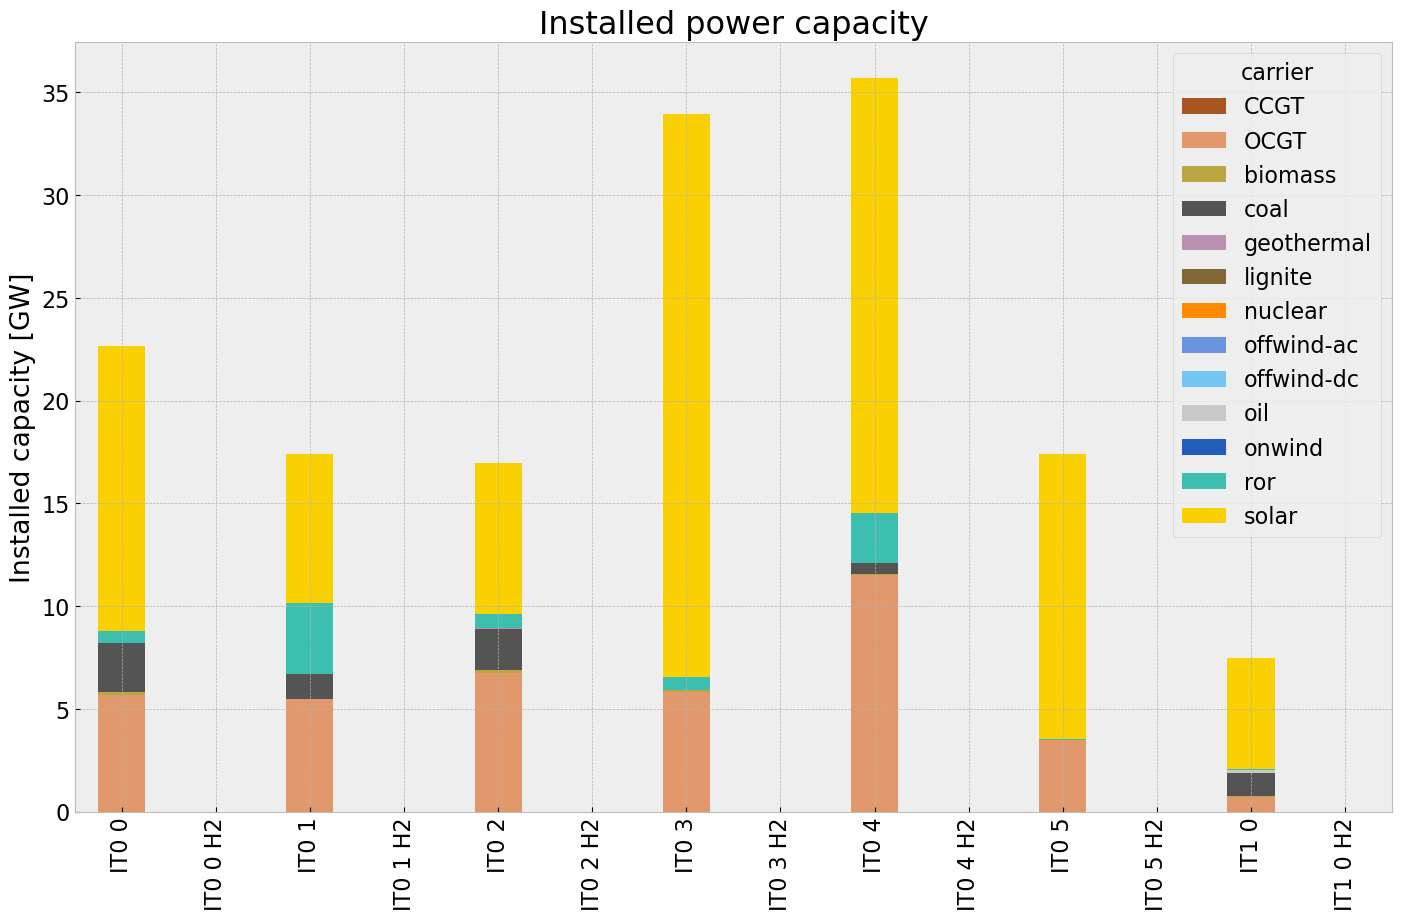

In [152]:
# consolidated istalled cap without load_shedding

capacities = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities.fillna(0, inplace=True)
gen_1 = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)


inst_cap_table(colors,gen_1)

## Generation

<Figure size 640x480 with 0 Axes>

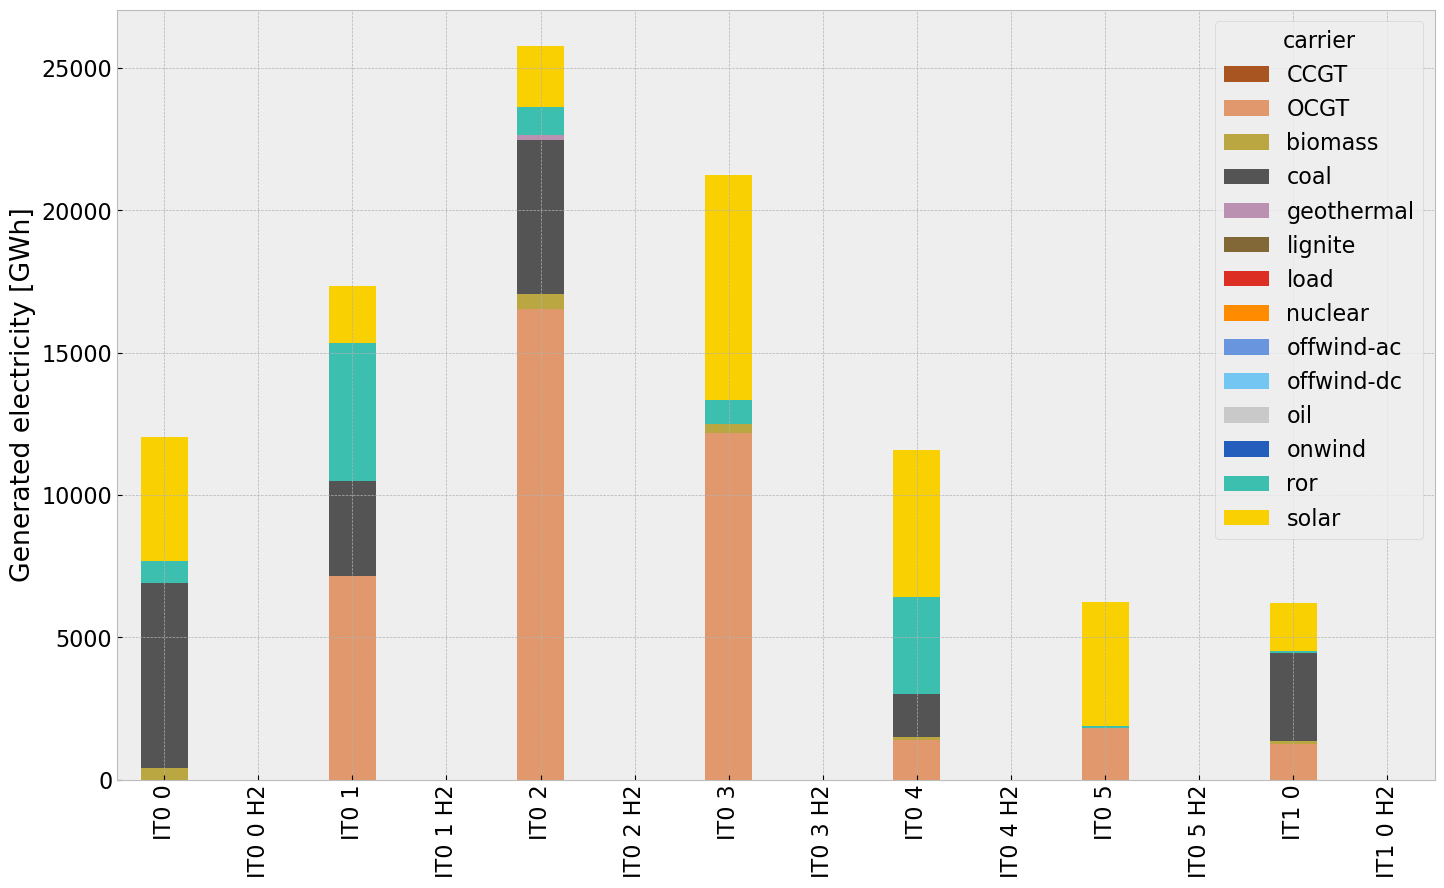

In [154]:
# consolidated generation table
carrier = n1.generators.carrier.unique()
df_tot_generation = n1.generators_t.p.sum()

generations = pd.Series(index = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')

gen_t1 =(generations.unstack()/1000)#GWh

gen_power_table(gen_t1,colors_gen_table)

## Snapshot

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1955705853.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n1.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1955705853.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n1.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


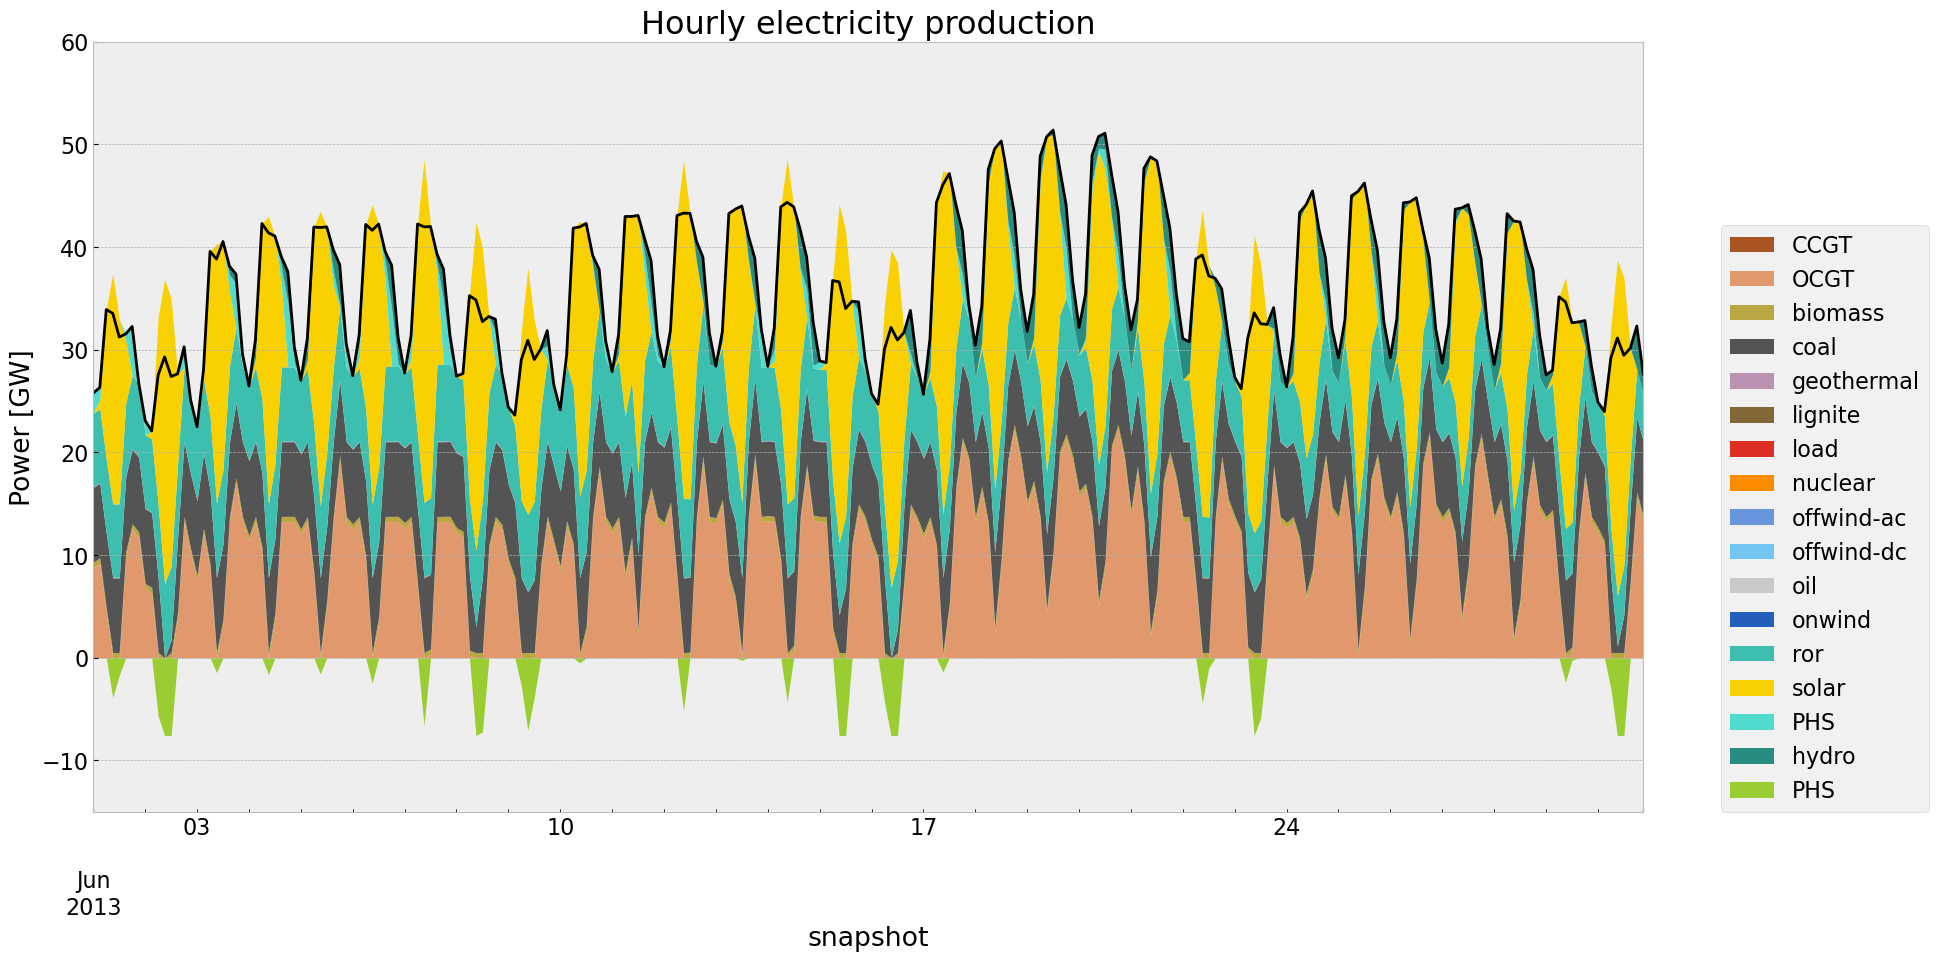

In [156]:
p = n1.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)        
sto = n1.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
gen_curve_month_summer(p,sto,colors_gen)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1492059698.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(start=start_date, end=end_date,freq='3H')
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


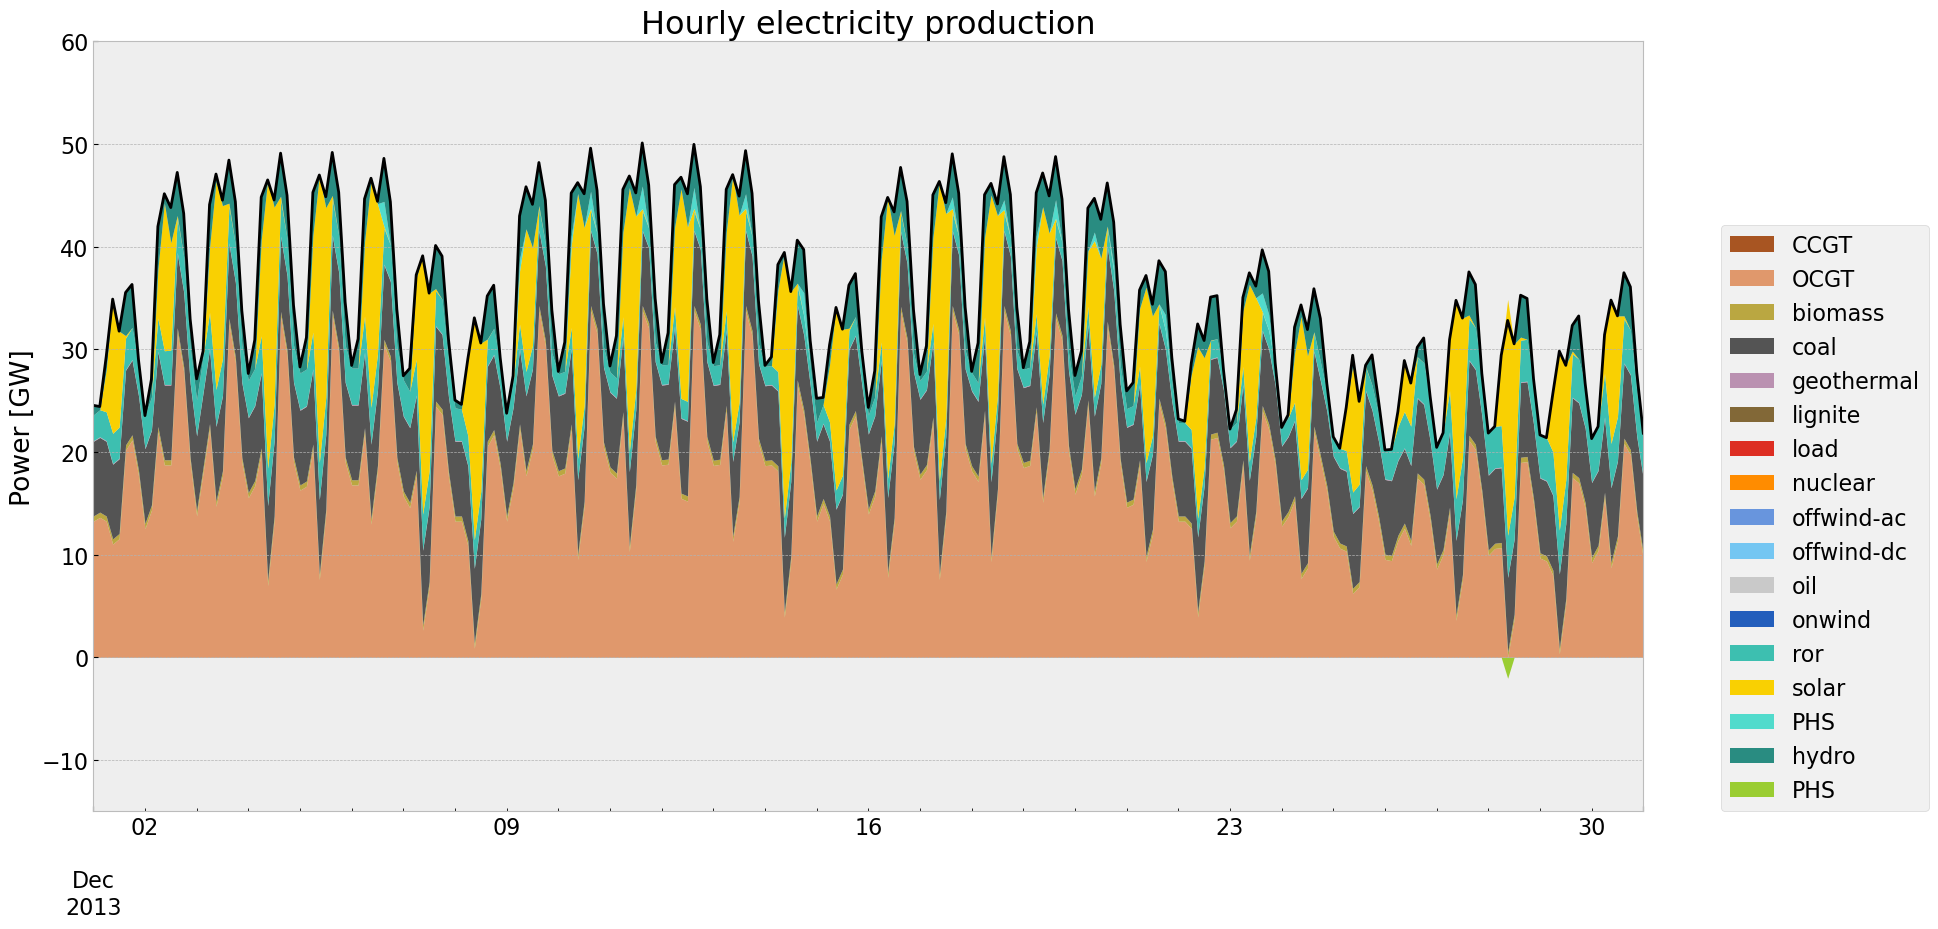

In [157]:
gen_curve_month_winter(p,sto,colors_gen)

## Storage

carrier     PHS   hydro
bus                    
IT0 0       NaN  0.5030
IT0 1    2.4219  2.1556
IT0 2    0.2810  0.2280
IT0 3    1.8160  0.0790
IT0 4    2.2330  1.1272
IT0 5    0.5800  0.0240
IT1 0    0.2400  0.0780

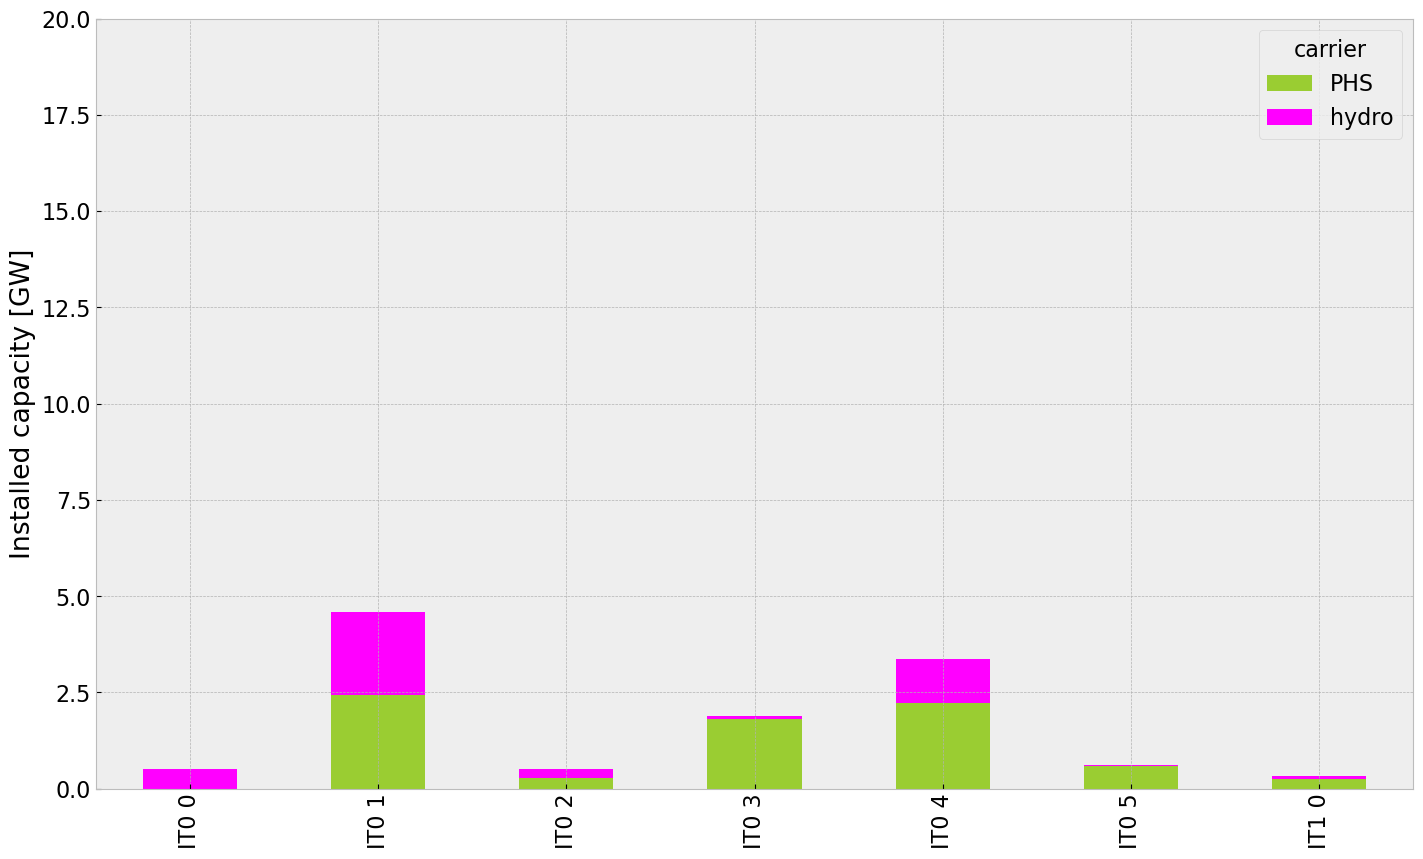

In [158]:
inst_store_table(n1)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\2765649672.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


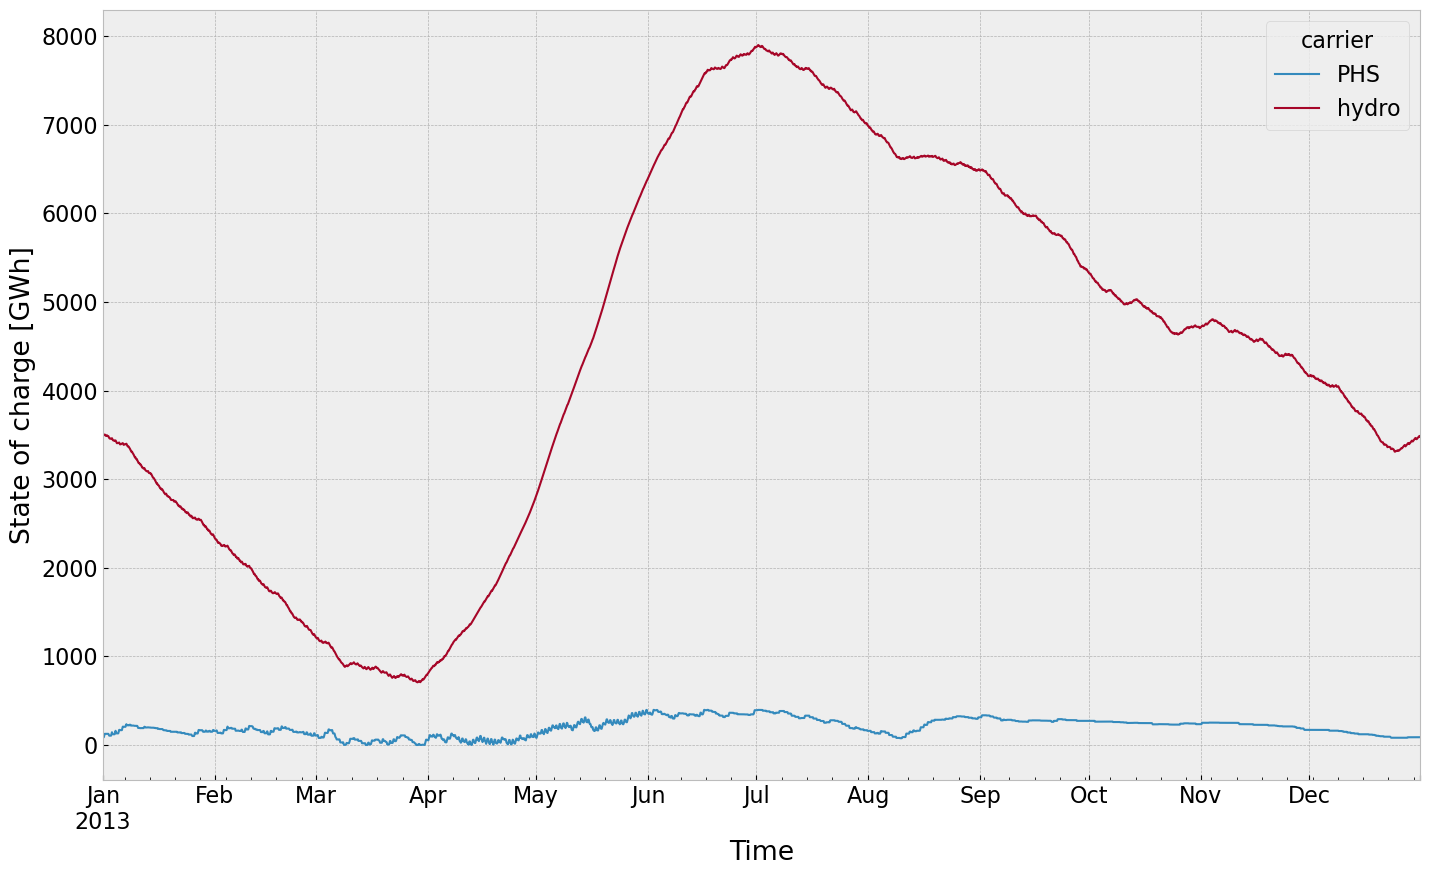

In [159]:
state_of_charge_plot(n1)


## Electricity Price


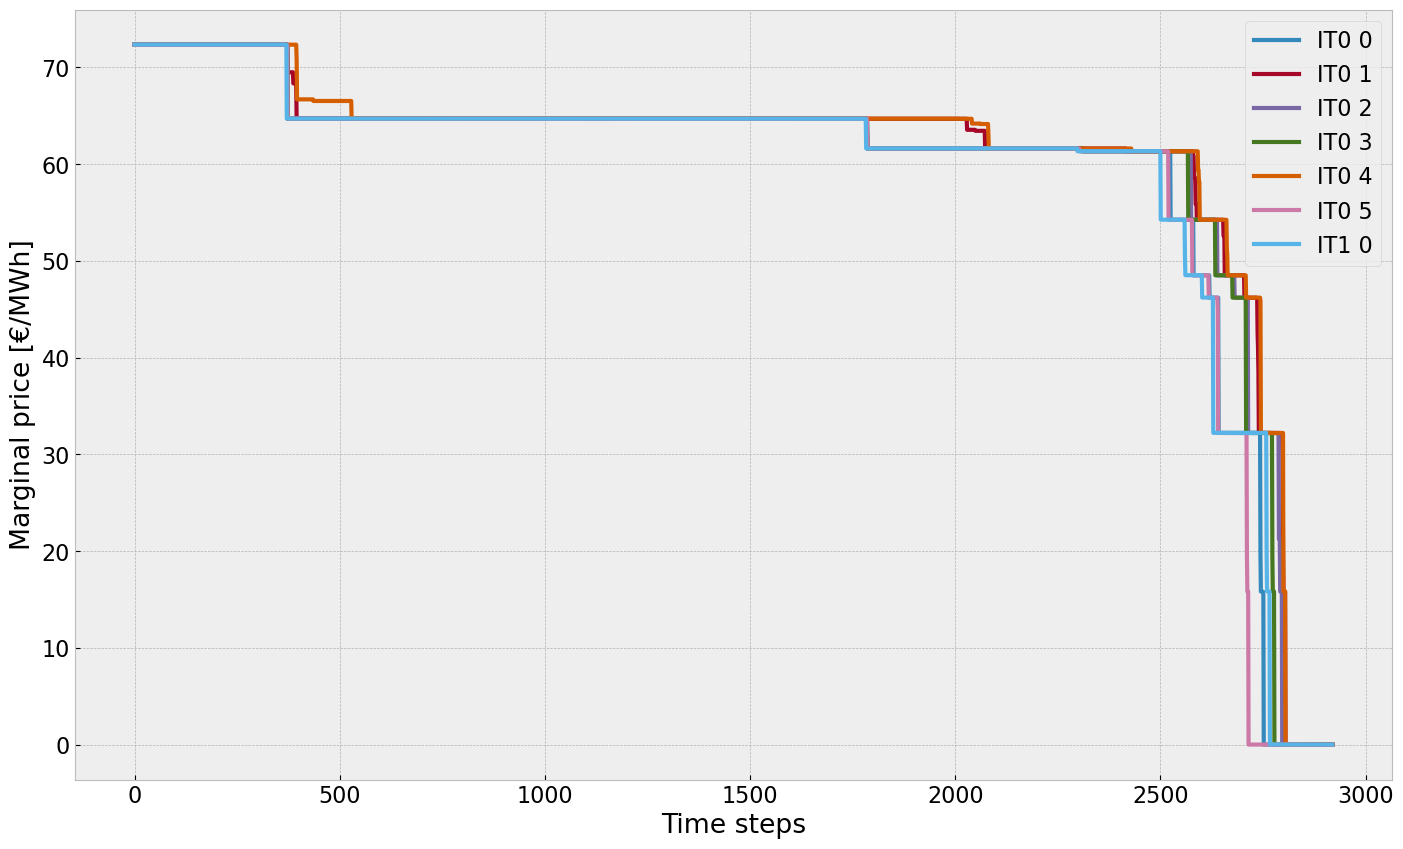

In [160]:
price_dur_curve_plot(n1)



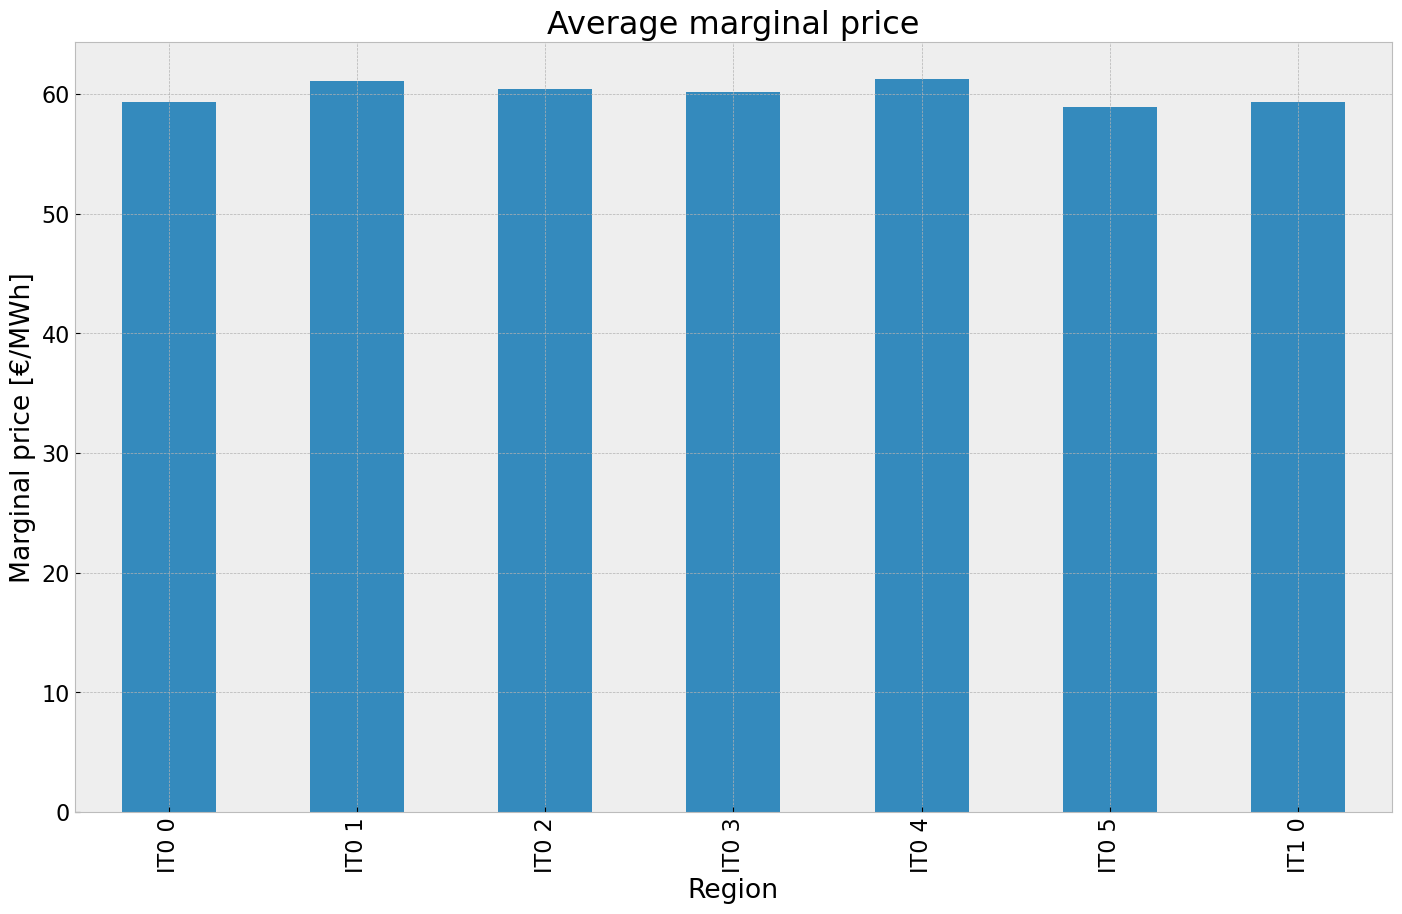

In [161]:
price_regions_table(n1)

## 2. Scenario: perfect foresight with no additional investment

In [163]:
#copy network
n2=n1.copy()

#set the optimal capacity of generators from the base scenario as the new minimum capacity 
for index, value in n2.generators.p_nom_extendable.items():
    if value:  
        n2.generators.at[index, 'p_nom'] = n.generators.at[index, 'p_nom_opt']
        n2.generators.at[index, 'p_nom_extendable'] = False

#set the optimal capacity of storage units from the base scenario as the new minimum capacity 
for index, value in n2.storage_units.p_nom_extendable.items():
    if value:  
        n2.storage_units.at[index, 'p_nom'] = n.storage_units.at[index, 'p_nom_opt']
        n2.storage_units.at[index, 'p_nom_extendable'] = False

#set the optimal capacity of lines from the base scenario as the new minimum capacity 
for index, value in n2.lines.s_nom_extendable.items():
    if value:  
        n2.lines.at[index, 's_nom'] = n.lines.at[index, 's_nom_opt']
        n2.lines.at[index, 's_nom_extendable'] = False

In [167]:
n2.generators[n2.generators['carrier']=='solar']

carrier    bus     p_nom_min         p_nom  p_nom_extendable  \
Generator                                                                  
IT0 0 solar   solar  IT0 0  12704.433160  12704.433160             False   
IT0 1 solar   solar  IT0 1   7265.693860   7265.693860             False   
IT0 2 solar   solar  IT0 2   7323.837355   7323.837355             False   
IT0 3 solar   solar  IT0 3  25934.328776  25934.328776             False   
IT0 4 solar   solar  IT0 4  21137.892566  21137.892566             False   
IT0 5 solar   solar  IT0 5  11374.677481  11374.677481             False   
IT1 0 solar   solar  IT1 0   4783.071884   4783.071884             False   

             efficiency  marginal_cost  capital_cost      p_nom_max  \
Generator                                                             
IT0 0 solar         1.0       0.019987  39296.472708  101947.974380   
IT0 1 solar         1.0       0.019966  39296.472708  151603.626020   
IT0 2 solar         1.0       0.020021  39296.472708  124195.901516   
IT0 3 solar         1.0       0.020254  39296.472708  133937.082364   
IT0 4 solar         1.0       0.020850  39296.472708  122065.134333   
IT0 5 solar         1.0       0.019798  39296.472708   90660.062420   
IT1 0 solar         1.0       0.019770  39296.472708   38931.424726   

                   weight control  p_max_pu  sign  build_year  min_up_time  \
Generator                                                                    
IT0 0 solar  16635.653452               1.0   1.0           0            0   
IT0 1 solar  21081.614271               1.0   1.0           0            0   
IT0 2 solar  18300.762261               1.0   1.0           0            0   
IT0 3 solar  20734.931209               1.0   1.0           0            0   
IT0 4 solar  17095.252603               1.0   1.0           0            0   
IT0 5 solar  15455.916505               1.0   1.0           0            0   
IT1 0 solar   6273.290436               1.0   1.0           0            0   

             min_down_time  up_time_before  down_time_before     p_nom_opt  \
Generator                                                                    
IT0 0 solar              0               1                 0  12704.433160   
IT0 1 solar              0               1                 0   7265.693860   
IT0 2 solar              0               1                 0   7323.837355   
IT0 3 solar              0               1                 0  25934.328776   
IT0 4 solar              0               1                 0  21137.892566   
IT0 5 solar              0               1                 0  11374.677481   
IT1 0 solar              0               1                 0   4783.071884   

            type  p_nom_mod  p_min_pu  p_set  q_set  marginal_cost_quadratic  \
Generator                                                                      
IT0 0 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 1 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 2 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 3 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 4 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 5 solar             0.0       0.0    0.0    0.0                      0.0   
IT1 0 solar             0.0       0.0    0.0    0.0                      0.0   

             lifetime  committable  start_up_cost  shut_down_cost  \
Generator                                                           
IT0 0 solar       inf        False            0.0             0.0   
IT0 1 solar       inf        False            0.0             0.0   
IT0 2 solar       inf        False            0.0             0.0   
IT0 3 solar       inf        False            0.0             0.0   
IT0 4 solar       inf        False            0.0             0.0   
IT0 5 solar       inf        False            0.0             0.0   
IT1 0 so

In [165]:
n2.lopf(solver_name='gurobi')

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\3529865891.py:1: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  n2.lopf(solver_name='gurobi')
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 7.07s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\pypsa-problem-6d8ojw1q.lp
Reading time = 4.17 seconds
obj: 1089162 rows, 534383 columns, 1915521 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1089162 rows, 534383 columns and 1915521 nonzeros
Model fingerprint: 0x57157958
Coefficient statistics:
  Matrix range     [1e-03, 6e+02]
  Objective range  [3e-02, 1e+05]
  Bounds range     [1e+00, 6e+07]
  RHS range        [2e+00, 1e+09]
Presolve removed 940318 rows and 211935 columns
Presolve time: 1.44s
Presolved: 148844 rows, 322448 columns, 681509 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.21s

Barrier statistics:
 Dense cols : 22
 AA' NZ     : 3.708e+05
 Factor NZ  : 3.124e+06 (rough

INFO:pypsa.linopf:Optimization successful. Objective value: 9.80e+09


('ok', 'optimal')

In [179]:
n2.objective/1e9 #bill

9.80368186688443

## Installed Capacity

Since expansion is not allowed in this scenario, the installed capacity will equal to that of the base scenario.

In [166]:
n2.generators[n2.generators['carrier']=='solar']

carrier    bus     p_nom_min         p_nom  p_nom_extendable  \
Generator                                                                  
IT0 0 solar   solar  IT0 0  12704.433160  12704.433160             False   
IT0 1 solar   solar  IT0 1   7265.693860   7265.693860             False   
IT0 2 solar   solar  IT0 2   7323.837355   7323.837355             False   
IT0 3 solar   solar  IT0 3  25934.328776  25934.328776             False   
IT0 4 solar   solar  IT0 4  21137.892566  21137.892566             False   
IT0 5 solar   solar  IT0 5  11374.677481  11374.677481             False   
IT1 0 solar   solar  IT1 0   4783.071884   4783.071884             False   

             efficiency  marginal_cost  capital_cost      p_nom_max  \
Generator                                                             
IT0 0 solar         1.0       0.019987  39296.472708  101947.974380   
IT0 1 solar         1.0       0.019966  39296.472708  151603.626020   
IT0 2 solar         1.0       0.020021  39296.472708  124195.901516   
IT0 3 solar         1.0       0.020254  39296.472708  133937.082364   
IT0 4 solar         1.0       0.020850  39296.472708  122065.134333   
IT0 5 solar         1.0       0.019798  39296.472708   90660.062420   
IT1 0 solar         1.0       0.019770  39296.472708   38931.424726   

                   weight control  p_max_pu  sign  build_year  min_up_time  \
Generator                                                                    
IT0 0 solar  16635.653452               1.0   1.0           0            0   
IT0 1 solar  21081.614271               1.0   1.0           0            0   
IT0 2 solar  18300.762261               1.0   1.0           0            0   
IT0 3 solar  20734.931209               1.0   1.0           0            0   
IT0 4 solar  17095.252603               1.0   1.0           0            0   
IT0 5 solar  15455.916505               1.0   1.0           0            0   
IT1 0 solar   6273.290436               1.0   1.0           0            0   

             min_down_time  up_time_before  down_time_before     p_nom_opt  \
Generator                                                                    
IT0 0 solar              0               1                 0  12704.433160   
IT0 1 solar              0               1                 0   7265.693860   
IT0 2 solar              0               1                 0   7323.837355   
IT0 3 solar              0               1                 0  25934.328776   
IT0 4 solar              0               1                 0  21137.892566   
IT0 5 solar              0               1                 0  11374.677481   
IT1 0 solar              0               1                 0   4783.071884   

            type  p_nom_mod  p_min_pu  p_set  q_set  marginal_cost_quadratic  \
Generator                                                                      
IT0 0 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 1 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 2 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 3 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 4 solar             0.0       0.0    0.0    0.0                      0.0   
IT0 5 solar             0.0       0.0    0.0    0.0                      0.0   
IT1 0 solar             0.0       0.0    0.0    0.0                      0.0   

             lifetime  committable  start_up_cost  shut_down_cost  \
Generator                                                           
IT0 0 solar       inf        False            0.0             0.0   
IT0 1 solar       inf        False            0.0             0.0   
IT0 2 solar       inf        False            0.0             0.0   
IT0 3 solar       inf        False            0.0             0.0   
IT0 4 solar       inf        False            0.0             0.0   
IT0 5 solar       inf        False            0.0             0.0   
IT1 0 so

<Figure size 640x480 with 0 Axes>

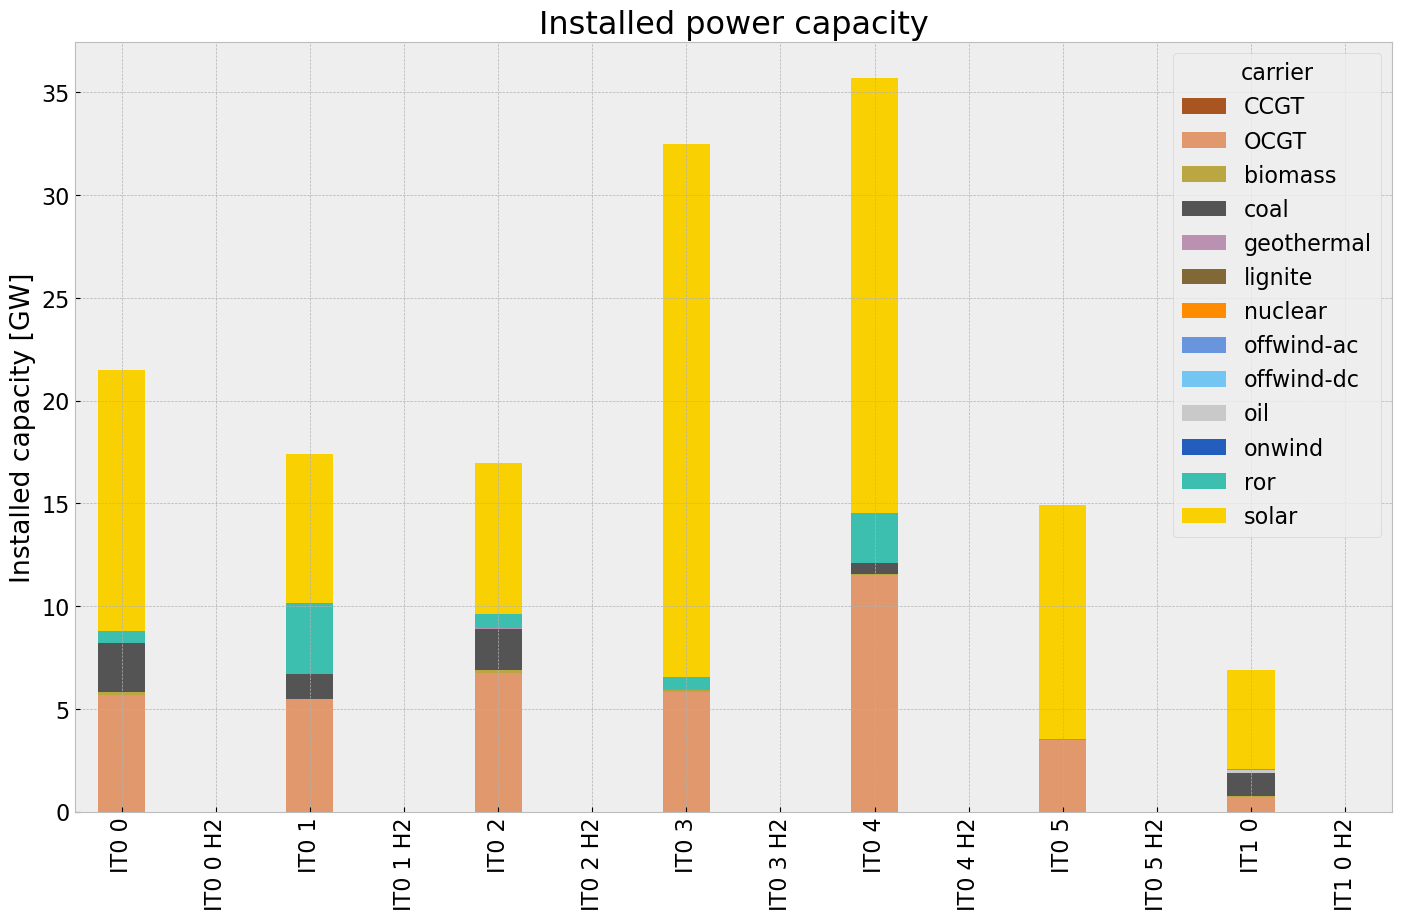

In [168]:
# consolidated istalled cap without load_shedding

capacities = n2.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities.fillna(0, inplace=True)
gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)


inst_cap_table(colors,gen)

## Generation

<Figure size 640x480 with 0 Axes>

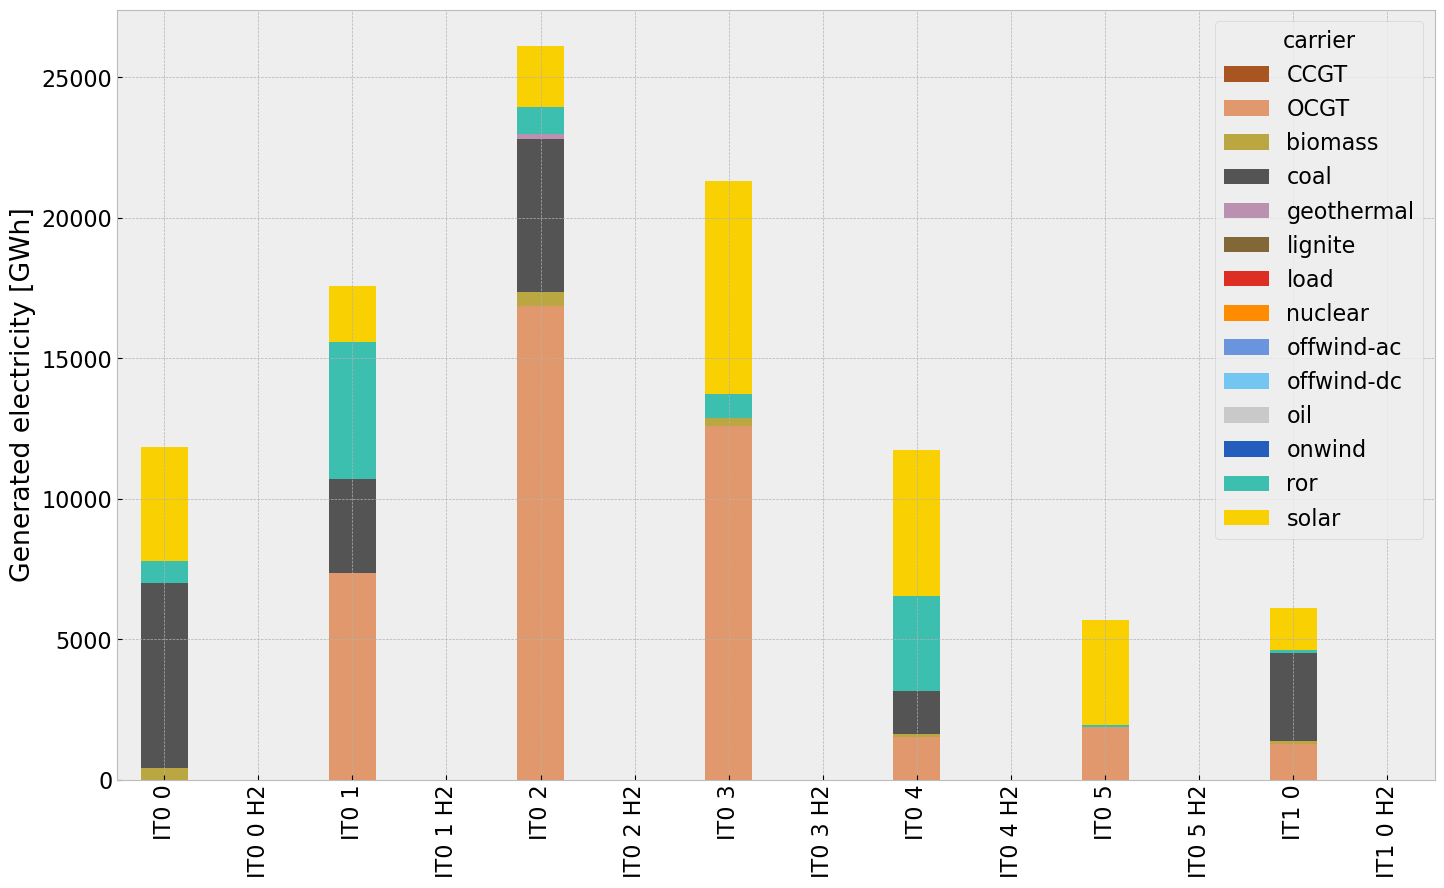

In [169]:
# consolidated generation table
carrier = n2.generators.carrier.unique()
df_tot_generation = n2.generators_t.p.sum()

generations = pd.Series(index = n2.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')

gen_t2 =(generations.unstack()/1000)#GWh

gen_power_table(gen_t2,colors_gen_table)


## Snapshot

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\4199655621.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n2.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\4199655621.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


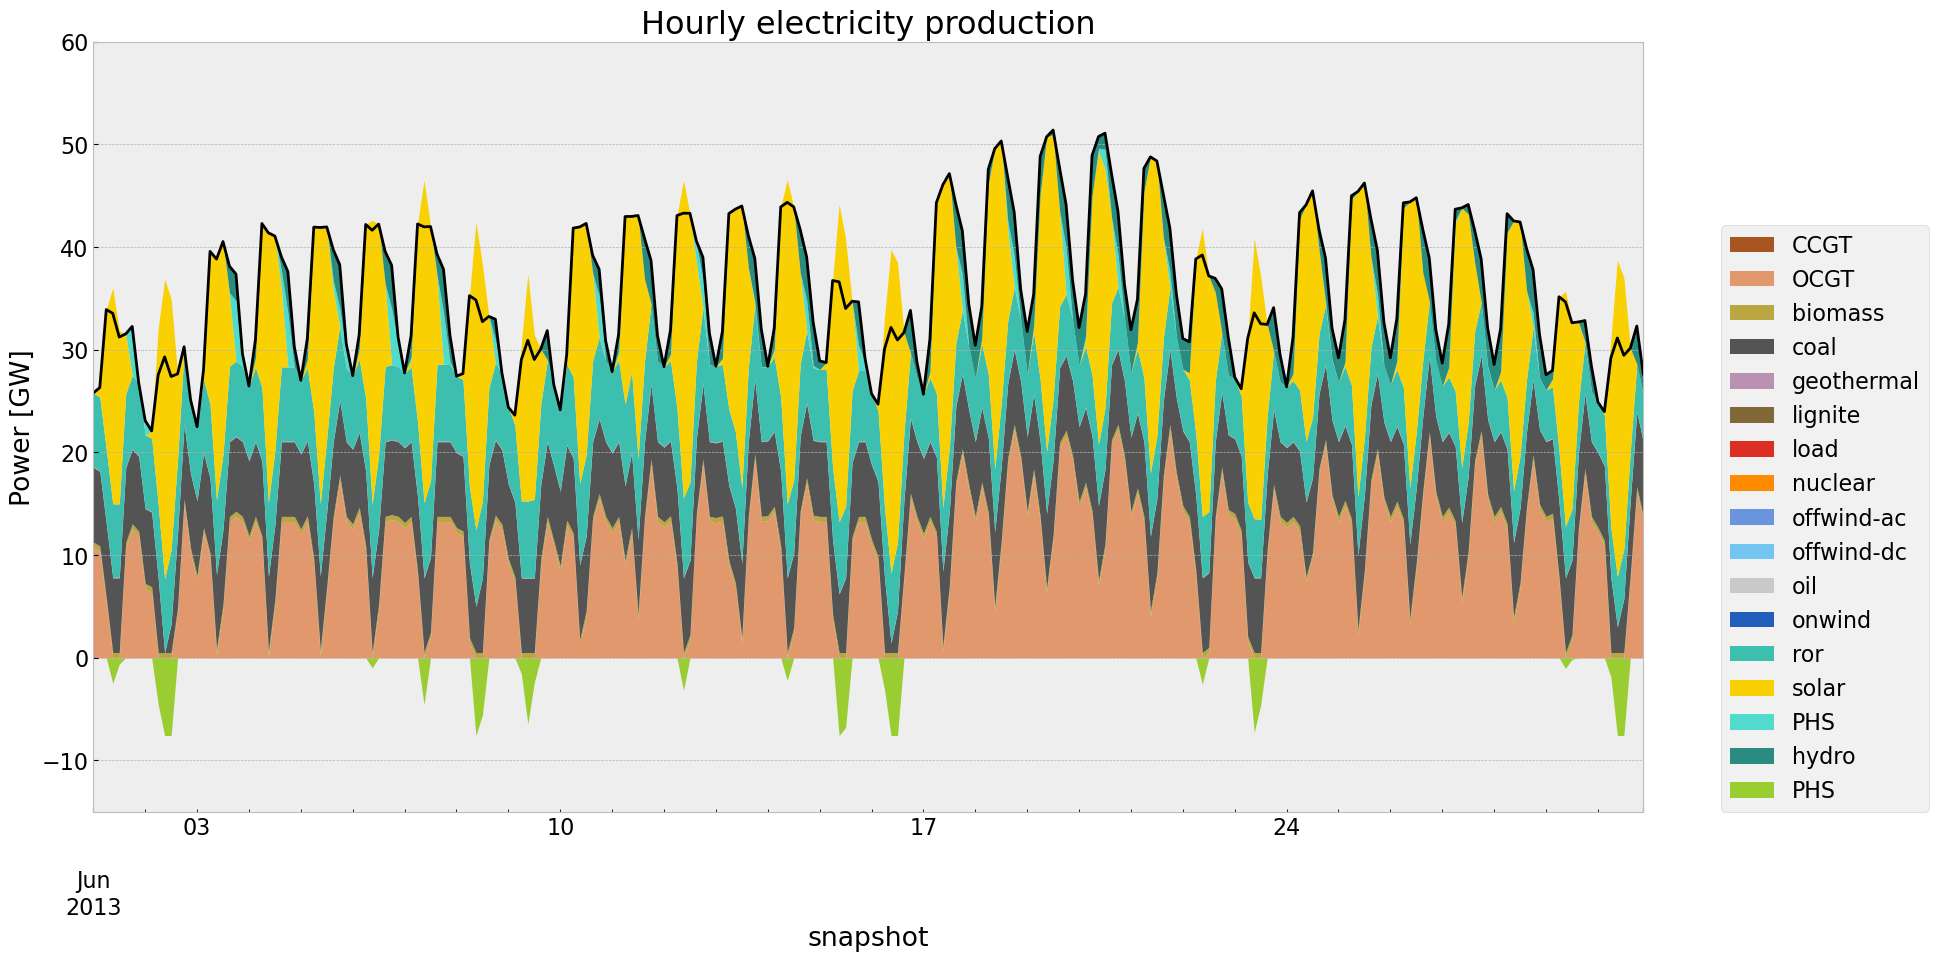

In [172]:
p = n2.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
sto = n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)    

gen_curve_month_summer(p, sto,colors_gen)


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1492059698.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(start=start_date, end=end_date,freq='3H')
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


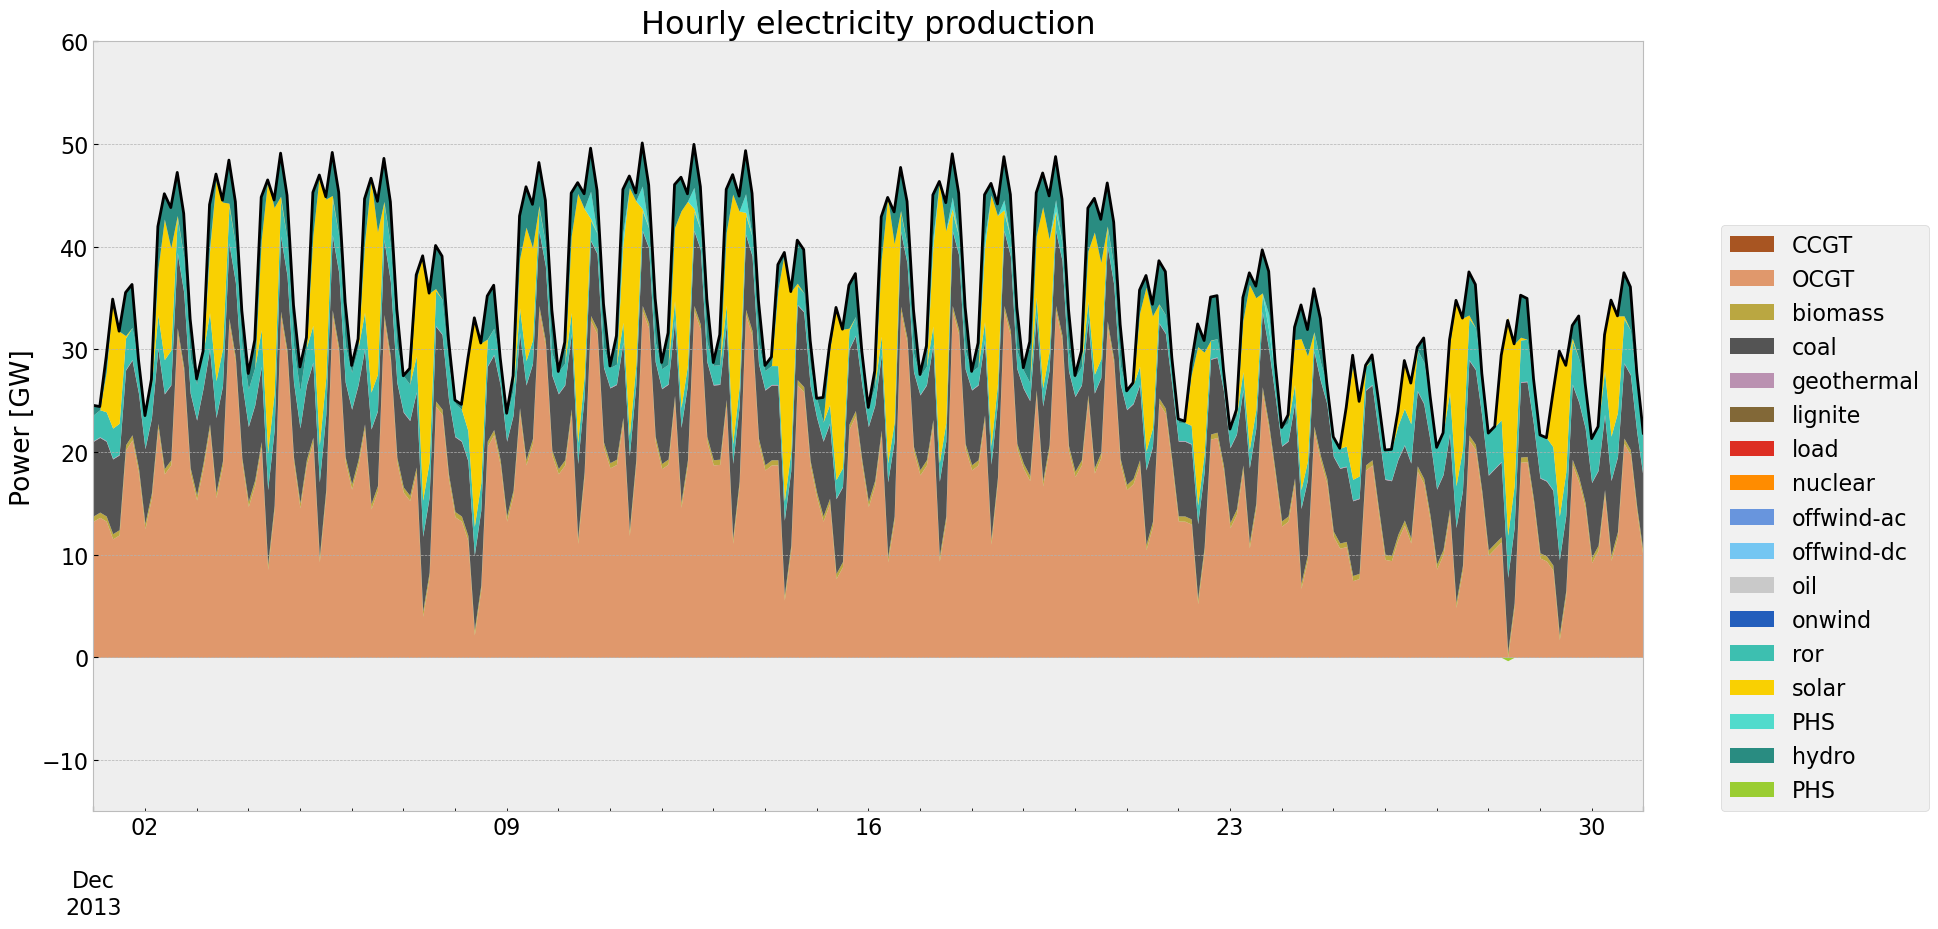

In [173]:
gen_curve_month_winter(p, sto,colors_gen)



C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\2765649672.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


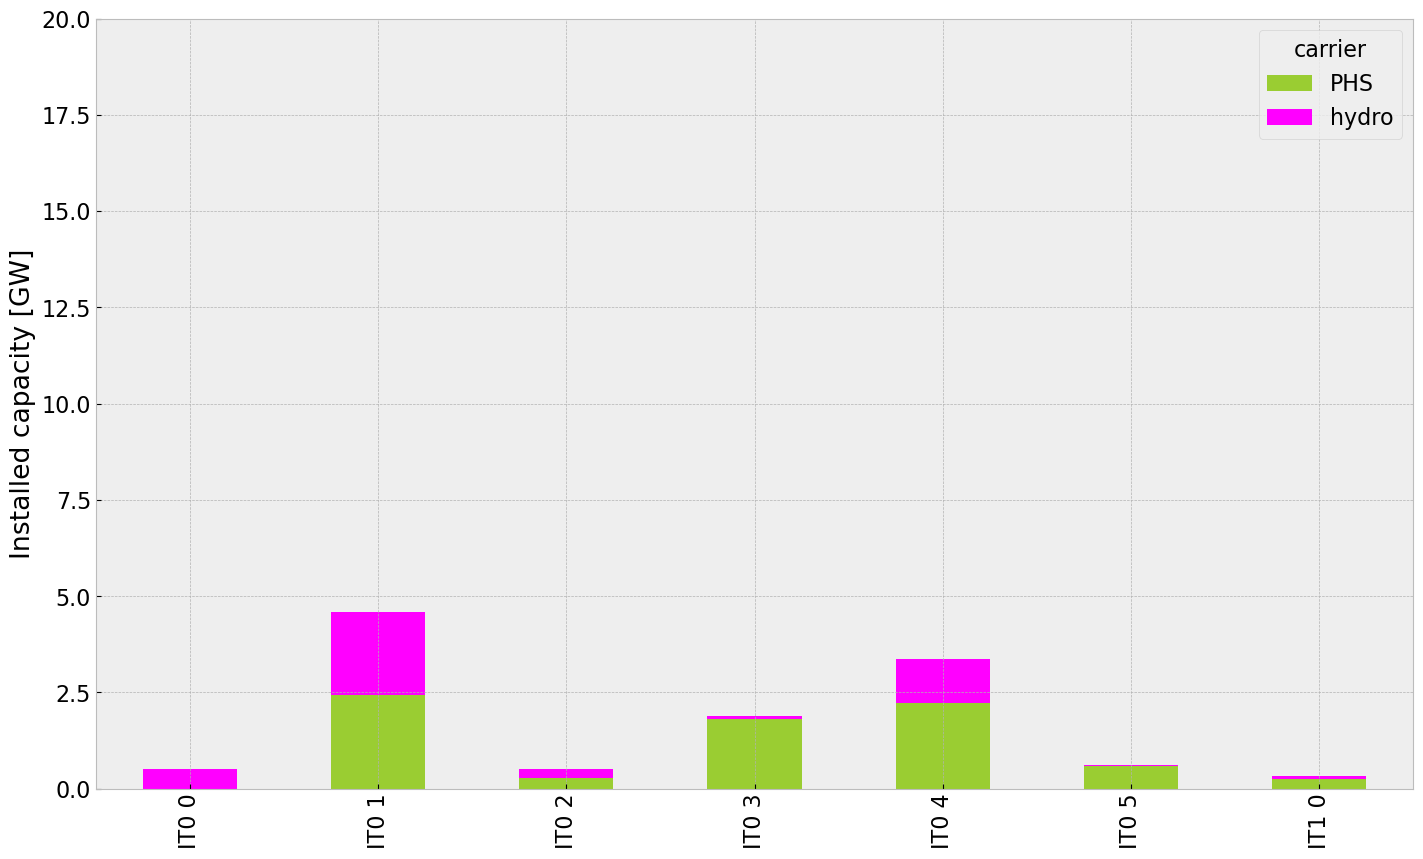

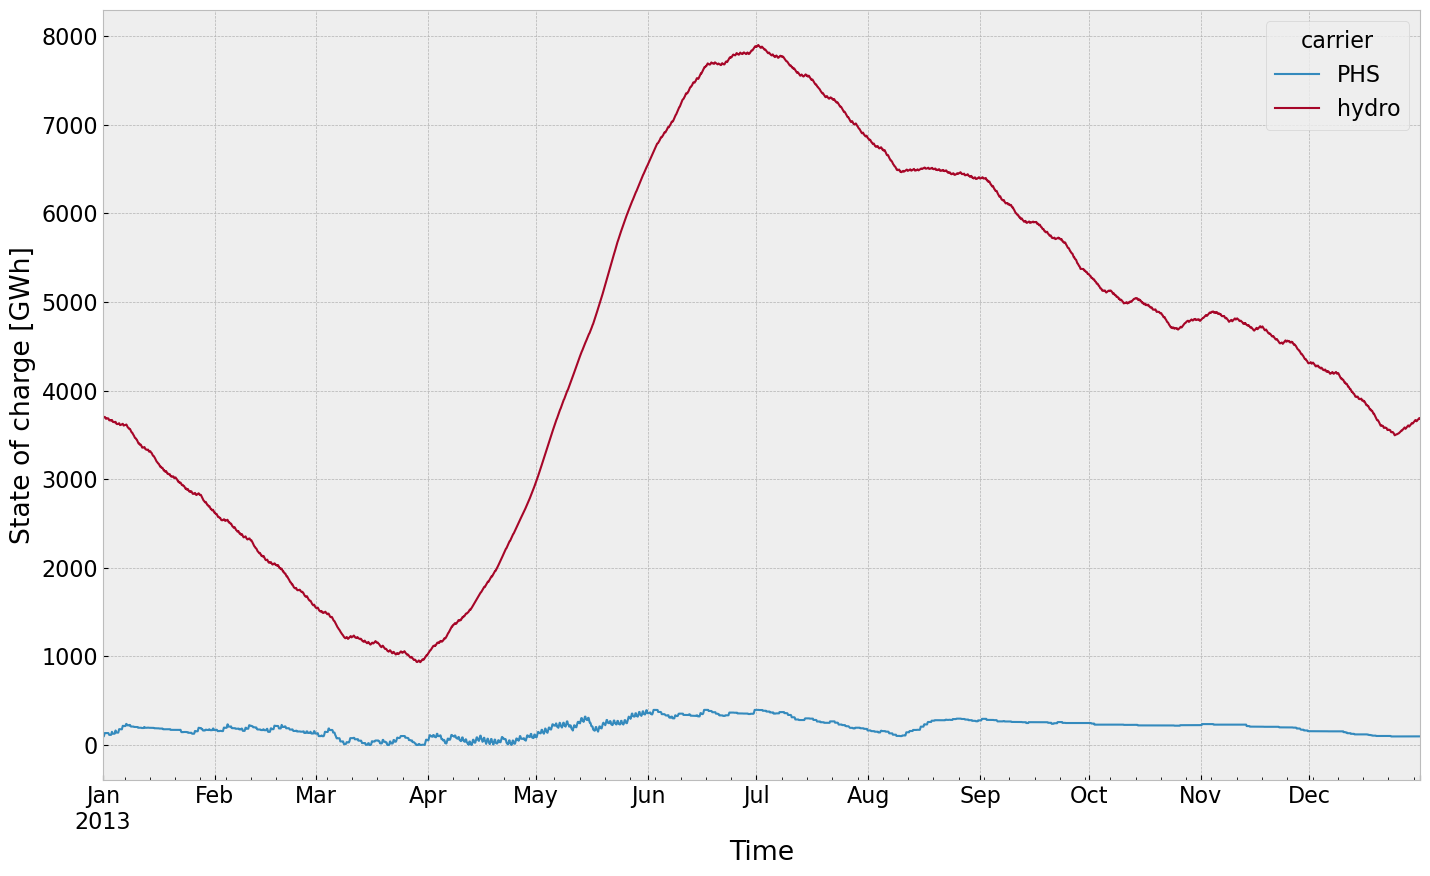

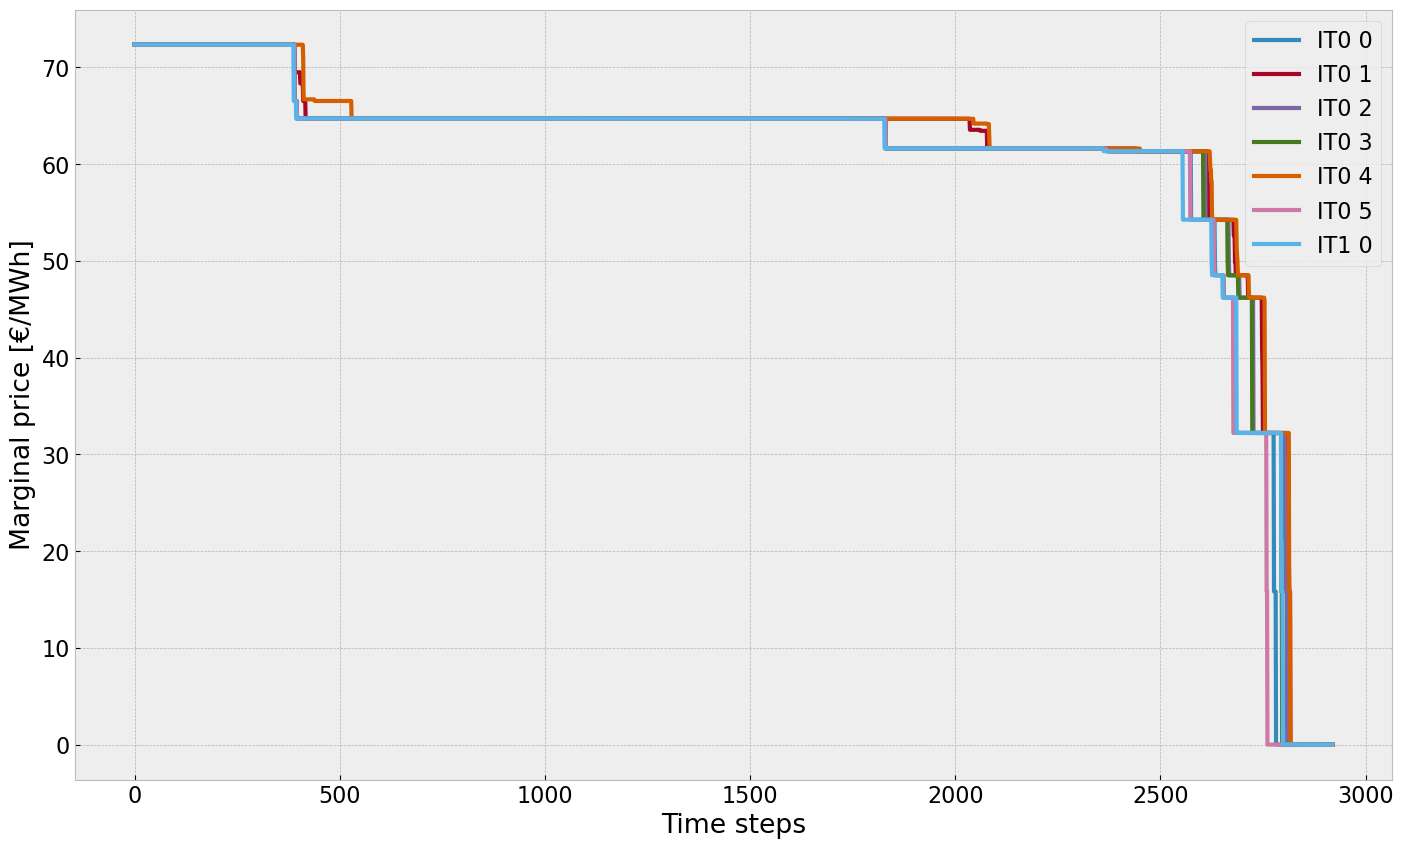

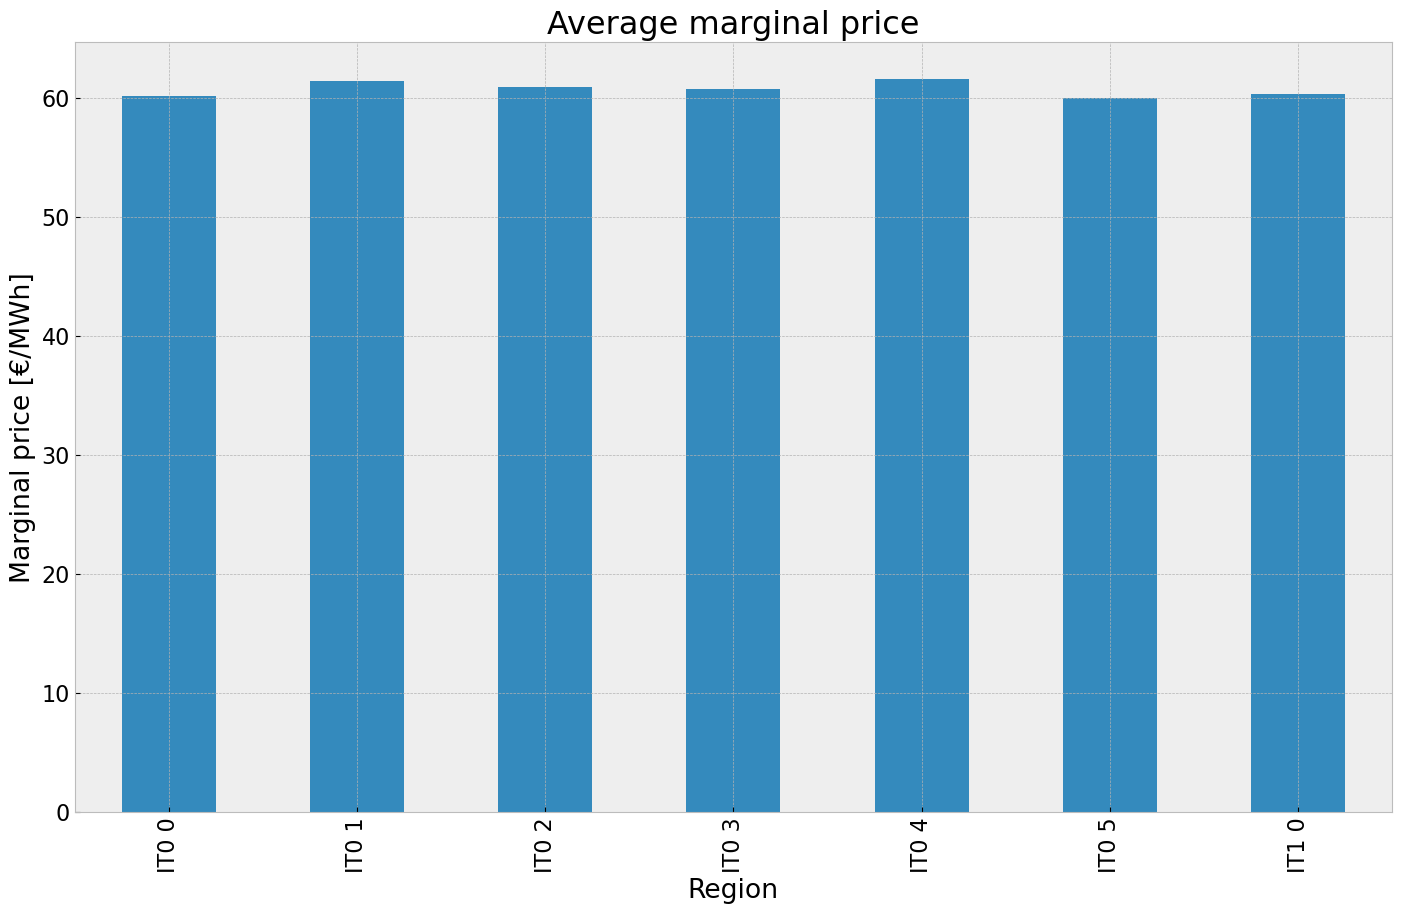

In [188]:
inst_store_table(n2)
state_of_charge_plot(n2)
price_dur_curve_plot(n2)
price_regions_table(n2)


## 3. Scenario: rolling horizon foresight with no additional investment

In [236]:
n3= n2.copy()

In [237]:
from pypsa.optimization import optimize

In [238]:
optimize.optimize_with_rolling_horizon(n3, horizon=56, overlap=0,
                                       solver_name='gurobi')

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2013-01-01 00:00:00:2013-01-07 21:00:00] (1/53).
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 237.02it/s]
INFO:linopy.io: Writing time: 0.43s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bo1lu5_1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bo1lu5_1.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x6569c91b


INFO:gurobipy:Model fingerprint: 0x6569c91b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4085 columns


INFO:gurobipy:Presolve removed 18057 rows and 4085 columns


Presolve time: 0.09s


INFO:gurobipy:Presolve time: 0.09s


Presolved: 2856 rows, 6186 columns, 12268 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6186 columns, 12268 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31902901e+12 -6.92775916e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31902901e+12 -6.92775916e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88118301e+12 -1.69825576e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88118301e+12 -1.69825576e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02187577e+12 -6.12698104e+12  6.53e+04 5.97e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02187577e+12 -6.12698104e+12  6.53e+04 5.97e+02  1.25e+09     0s


   3   6.66794497e+11 -3.09592623e+11  7.24e+02 8.95e+00  8.48e+07     0s


INFO:gurobipy:   3   6.66794497e+11 -3.09592623e+11  7.24e+02 8.95e+00  8.48e+07     0s


   4   2.52044697e+10 -7.01059776e+10  2.54e+01 1.74e+00  7.87e+06     0s


INFO:gurobipy:   4   2.52044697e+10 -7.01059776e+10  2.54e+01 1.74e+00  7.87e+06     0s


   5   1.57819530e+10 -2.77720724e+10  1.59e+01 6.43e-01  3.58e+06     0s


INFO:gurobipy:   5   1.57819530e+10 -2.77720724e+10  1.59e+01 6.43e-01  3.58e+06     0s


   6   1.07457920e+10 -1.38220955e+10  1.06e+01 3.14e-01  2.01e+06     0s


INFO:gurobipy:   6   1.07457920e+10 -1.38220955e+10  1.06e+01 3.14e-01  2.01e+06     0s


   7   3.43890716e+09 -4.92672354e+09  2.30e+00 1.15e-01  6.80e+05     0s


INFO:gurobipy:   7   3.43890716e+09 -4.92672354e+09  2.30e+00 1.15e-01  6.80e+05     0s


   8   1.84064662e+09 -4.86003671e+08  1.16e+00 9.36e-03  1.89e+05     0s


INFO:gurobipy:   8   1.84064662e+09 -4.86003671e+08  1.16e+00 9.36e-03  1.89e+05     0s


   9   5.79711654e+08 -2.68799393e+07  2.50e-01 1.61e-03  4.92e+04     0s


INFO:gurobipy:   9   5.79711654e+08 -2.68799393e+07  2.50e-01 1.61e-03  4.92e+04     0s


  10   3.70231599e+08  9.21123163e+07  1.18e-01 6.02e-04  2.25e+04     0s


INFO:gurobipy:  10   3.70231599e+08  9.21123163e+07  1.18e-01 6.02e-04  2.25e+04     0s


  11   2.76554171e+08  1.37998552e+08  6.10e-02 2.31e-04  1.12e+04     0s


INFO:gurobipy:  11   2.76554171e+08  1.37998552e+08  6.10e-02 2.31e-04  1.12e+04     0s


  12   2.16842073e+08  1.59813177e+08  2.57e-02 6.96e-05  4.62e+03     0s


INFO:gurobipy:  12   2.16842073e+08  1.59813177e+08  2.57e-02 6.96e-05  4.62e+03     0s


  13   1.86801667e+08  1.68944734e+08  8.18e-03 1.45e-05  1.45e+03     0s


INFO:gurobipy:  13   1.86801667e+08  1.68944734e+08  8.18e-03 1.45e-05  1.45e+03     0s


  14   1.75671078e+08  1.71387801e+08  1.86e-03 3.09e-06  3.47e+02     0s


INFO:gurobipy:  14   1.75671078e+08  1.71387801e+08  1.86e-03 3.09e-06  3.47e+02     0s


  15   1.72849383e+08  1.72013573e+08  3.21e-04 5.28e-07  6.77e+01     0s


INFO:gurobipy:  15   1.72849383e+08  1.72013573e+08  3.21e-04 5.28e-07  6.77e+01     0s


  16   1.72235530e+08  1.72172861e+08  1.37e-05 8.47e-08  5.07e+00     0s


INFO:gurobipy:  16   1.72235530e+08  1.72172861e+08  1.37e-05 8.47e-08  5.07e+00     0s


  17   1.72215454e+08  1.72194389e+08  4.46e-06 2.80e-08  1.71e+00     0s


INFO:gurobipy:  17   1.72215454e+08  1.72194389e+08  4.46e-06 2.80e-08  1.71e+00     0s


  18   1.72210385e+08  1.72200307e+08  2.15e-06 1.26e-08  8.16e-01     0s


INFO:gurobipy:  18   1.72210385e+08  1.72200307e+08  2.15e-06 1.26e-08  8.16e-01     0s


  19   1.72208777e+08  1.72202944e+08  1.43e-06 5.80e-09  4.72e-01     1s


INFO:gurobipy:  19   1.72208777e+08  1.72202944e+08  1.43e-06 5.80e-09  4.72e-01     1s


  20   1.72206932e+08  1.72204785e+08  6.30e-07 1.05e-09  1.74e-01     1s


INFO:gurobipy:  20   1.72206932e+08  1.72204785e+08  6.30e-07 1.05e-09  1.74e-01     1s


  21   1.72205696e+08  1.72205316e+08  7.85e-07 9.55e-11  3.07e-02     1s


INFO:gurobipy:  21   1.72205696e+08  1.72205316e+08  7.85e-07 9.55e-11  3.07e-02     1s


  22   1.72205448e+08  1.72205385e+08  1.21e-07 2.47e-11  5.16e-03     1s


INFO:gurobipy:  22   1.72205448e+08  1.72205385e+08  1.21e-07 2.47e-11  5.16e-03     1s


  23   1.72205410e+08  1.72205395e+08  2.00e-08 6.33e-11  1.20e-03     1s


INFO:gurobipy:  23   1.72205410e+08  1.72205395e+08  2.00e-08 6.33e-11  1.20e-03     1s


  24   1.72205402e+08  1.72205400e+08  3.47e-09 1.14e-10  1.99e-04     1s


INFO:gurobipy:  24   1.72205402e+08  1.72205400e+08  3.47e-09 1.14e-10  1.99e-04     1s


  25   1.72205402e+08  1.72205402e+08  2.01e-09 4.80e-11  8.51e-07     1s


INFO:gurobipy:  25   1.72205402e+08  1.72205402e+08  2.01e-09 4.80e-11  8.51e-07     1s


  26   1.72205402e+08  1.72205402e+08  3.86e-10 2.94e-11  8.51e-10     1s


INFO:gurobipy:  26   1.72205402e+08  1.72205402e+08  3.86e-10 2.94e-11  8.51e-10     1s


INFO:gurobipy:


Barrier solved model in 26 iterations and 0.67 seconds (0.08 work units)


INFO:gurobipy:Barrier solved model in 26 iterations and 0.67 seconds (0.08 work units)


Optimal objective 1.72205402e+08


INFO:gurobipy:Optimal objective 1.72205402e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1568 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    1568 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:


     267 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:     267 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.9286570e-12      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.9286570e-12      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1246    1.7220540e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    1246    1.7220540e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 1246 iterations and 0.74 seconds (0.08 work units)


INFO:gurobipy:Solved in 1246 iterations and 0.74 seconds (0.08 work units)


Optimal objective  1.722054015e+08


INFO:gurobipy:Optimal objective  1.722054015e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.72e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 170.06it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4jwax5at.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4jwax5at.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x57d97e79


INFO:gurobipy:Model fingerprint: 0x57d97e79


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4091 columns


INFO:gurobipy:Presolve removed 18057 rows and 4091 columns


Presolve time: 0.10s


INFO:gurobipy:Presolve time: 0.10s


Presolved: 2856 rows, 6180 columns, 12262 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6180 columns, 12262 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31910382e+12 -6.92752026e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31910382e+12 -6.92752026e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88117713e+12 -1.69821024e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88117713e+12 -1.69821024e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02207497e+12 -6.12747646e+12  6.53e+04 5.98e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02207497e+12 -6.12747646e+12  6.53e+04 5.98e+02  1.25e+09     0s


   3   6.65951186e+11 -3.08426528e+11  7.24e+02 8.93e+00  8.47e+07     0s


INFO:gurobipy:   3   6.65951186e+11 -3.08426528e+11  7.24e+02 8.93e+00  8.47e+07     0s


   4   2.84312200e+10 -6.96089207e+10  2.96e+01 1.71e+00  8.11e+06     0s


INFO:gurobipy:   4   2.84312200e+10 -6.96089207e+10  2.96e+01 1.71e+00  8.11e+06     0s


   5   1.78987607e+10 -2.75442563e+10  1.85e+01 6.27e-01  3.74e+06     0s


INFO:gurobipy:   5   1.78987607e+10 -2.75442563e+10  1.85e+01 6.27e-01  3.74e+06     0s


   6   1.15735257e+10 -1.37543802e+10  1.14e+01 3.19e-01  2.08e+06     0s


INFO:gurobipy:   6   1.15735257e+10 -1.37543802e+10  1.14e+01 3.19e-01  2.08e+06     0s


   7   4.22997151e+09 -4.82739647e+09  3.35e+00 1.10e-01  7.38e+05     0s


INFO:gurobipy:   7   4.22997151e+09 -4.82739647e+09  3.35e+00 1.10e-01  7.38e+05     0s


   8   2.21718592e+09 -6.19835644e+08  1.68e+00 1.26e-02  2.31e+05     0s


INFO:gurobipy:   8   2.21718592e+09 -6.19835644e+08  1.68e+00 1.26e-02  2.31e+05     0s


   9   4.96844312e+08  1.42438049e+08  1.58e-01 1.05e-03  2.87e+04     0s


INFO:gurobipy:   9   4.96844312e+08  1.42438049e+08  1.58e-01 1.05e-03  2.87e+04     0s


  10   3.55711231e+08  2.14404544e+08  6.11e-02 3.75e-04  1.15e+04     0s


INFO:gurobipy:  10   3.55711231e+08  2.14404544e+08  6.11e-02 3.75e-04  1.15e+04     0s


INFO:gurobipy:


Barrier performed 10 iterations in 0.41 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 10 iterations in 0.41 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2651    2.6102347e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2651    2.6102347e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2651 iterations and 0.44 seconds (0.07 work units)


INFO:gurobipy:Solved in 2651 iterations and 0.44 seconds (0.07 work units)


Optimal objective  2.610234687e+08


INFO:gurobipy:Optimal objective  2.610234687e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.61e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 171.75it/s]
INFO:linopy.io: Writing time: 0.44s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tg2mzjen.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tg2mzjen.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x18b18cbd


INFO:gurobipy:Model fingerprint: 0x18b18cbd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+00, 6e+07]


INFO:gurobipy:  Bounds range     [7e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4088 columns


INFO:gurobipy:Presolve removed 18057 rows and 4088 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6183 columns, 12265 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6183 columns, 12265 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31904315e+12 -6.92757839e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31904315e+12 -6.92757839e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88121764e+12 -1.69817426e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88121764e+12 -1.69817426e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02254304e+12 -6.12795746e+12  6.58e+04 5.98e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02254304e+12 -6.12795746e+12  6.58e+04 5.98e+02  1.25e+09     0s


   3   6.65334360e+11 -3.09680451e+11  7.31e+02 8.91e+00  8.48e+07     0s


INFO:gurobipy:   3   6.65334360e+11 -3.09680451e+11  7.31e+02 8.91e+00  8.48e+07     0s


   4   2.85556590e+10 -7.09634403e+10  3.01e+01 1.73e+00  8.23e+06     0s


INFO:gurobipy:   4   2.85556590e+10 -7.09634403e+10  3.01e+01 1.73e+00  8.23e+06     0s


   5   1.82165940e+10 -2.87571171e+10  1.90e+01 6.52e-01  3.86e+06     0s


INFO:gurobipy:   5   1.82165940e+10 -2.87571171e+10  1.90e+01 6.52e-01  3.86e+06     0s


   6   1.17060188e+10 -1.42647318e+10  1.17e+01 3.29e-01  2.13e+06     0s


INFO:gurobipy:   6   1.17060188e+10 -1.42647318e+10  1.17e+01 3.29e-01  2.13e+06     0s


   7   4.61030015e+09 -5.00525180e+09  3.80e+00 1.14e-01  7.83e+05     0s


INFO:gurobipy:   7   4.61030015e+09 -5.00525180e+09  3.80e+00 1.14e-01  7.83e+05     0s


   8   2.21823752e+09 -5.08183796e+08  1.65e+00 1.19e-02  2.21e+05     0s


INFO:gurobipy:   8   2.21823752e+09 -5.08183796e+08  1.65e+00 1.19e-02  2.21e+05     0s


   9   6.38695157e+08  1.80244706e+08  2.66e-01 7.08e-04  3.72e+04     0s


INFO:gurobipy:   9   6.38695157e+08  1.80244706e+08  2.66e-01 7.08e-04  3.72e+04     0s


  10   4.11169107e+08  2.39722229e+08  9.70e-02 2.57e-04  1.39e+04     0s


INFO:gurobipy:  10   4.11169107e+08  2.39722229e+08  9.70e-02 2.57e-04  1.39e+04     0s


  11   3.47133314e+08  2.60436936e+08  5.06e-02 9.16e-05  7.02e+03     0s


INFO:gurobipy:  11   3.47133314e+08  2.60436936e+08  5.06e-02 9.16e-05  7.02e+03     0s


  12   3.05701377e+08  2.70645610e+08  2.10e-02 2.30e-05  2.84e+03     0s


INFO:gurobipy:  12   3.05701377e+08  2.70645610e+08  2.10e-02 2.30e-05  2.84e+03     0s


INFO:gurobipy:


Barrier performed 12 iterations in 0.27 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 12 iterations in 0.27 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2206    2.7551618e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2206    2.7551618e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2206 iterations and 0.30 seconds (0.05 work units)


INFO:gurobipy:Solved in 2206 iterations and 0.30 seconds (0.05 work units)


Optimal objective  2.755161752e+08


INFO:gurobipy:Optimal objective  2.755161752e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.76e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 190.69it/s]
INFO:linopy.io: Writing time: 0.49s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kq9wy4xo.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kq9wy4xo.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xd952805d


INFO:gurobipy:Model fingerprint: 0xd952805d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+00, 6e+07]


INFO:gurobipy:  Bounds range     [7e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4067 columns


INFO:gurobipy:Presolve removed 18057 rows and 4067 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6204 columns, 12286 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6204 columns, 12286 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31911682e+12 -6.92760103e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31911682e+12 -6.92760103e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88160172e+12 -1.69764629e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88160172e+12 -1.69764629e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02080789e+12 -6.11957519e+12  6.52e+04 5.92e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02080789e+12 -6.11957519e+12  6.52e+04 5.92e+02  1.24e+09     0s


   3   6.64382358e+11 -3.09806312e+11  7.17e+02 8.83e+00  8.44e+07     0s


INFO:gurobipy:   3   6.64382358e+11 -3.09806312e+11  7.17e+02 8.83e+00  8.44e+07     0s


   4   2.81301697e+10 -6.97103584e+10  2.90e+01 1.68e+00  8.06e+06     0s


INFO:gurobipy:   4   2.81301697e+10 -6.97103584e+10  2.90e+01 1.68e+00  8.06e+06     0s


   5   1.78931001e+10 -2.72743558e+10  1.84e+01 6.07e-01  3.70e+06     0s


INFO:gurobipy:   5   1.78931001e+10 -2.72743558e+10  1.84e+01 6.07e-01  3.70e+06     0s


   6   1.11776363e+10 -1.33309384e+10  1.10e+01 3.02e-01  2.00e+06     0s


INFO:gurobipy:   6   1.11776363e+10 -1.33309384e+10  1.10e+01 3.02e-01  2.00e+06     0s


   7   4.11137060e+09 -4.61427294e+09  3.29e+00 1.02e-01  7.08e+05     0s


INFO:gurobipy:   7   4.11137060e+09 -4.61427294e+09  3.29e+00 1.02e-01  7.08e+05     0s


   8   2.27523883e+09 -5.93690580e+08  1.76e+00 1.14e-02  2.32e+05     0s


INFO:gurobipy:   8   2.27523883e+09 -5.93690580e+08  1.76e+00 1.14e-02  2.32e+05     0s


   9   3.48654200e+08  1.08904293e+08  5.01e-02 5.96e-04  1.94e+04     0s


INFO:gurobipy:   9   3.48654200e+08  1.08904293e+08  5.01e-02 5.96e-04  1.94e+04     0s


  10   2.86276428e+08  1.88253505e+08  1.95e-02 2.25e-04  7.91e+03     0s


INFO:gurobipy:  10   2.86276428e+08  1.88253505e+08  1.95e-02 2.25e-04  7.91e+03     0s


  11   2.61431636e+08  2.23620230e+08  8.70e-03 6.97e-05  3.05e+03     0s


INFO:gurobipy:  11   2.61431636e+08  2.23620230e+08  8.70e-03 6.97e-05  3.05e+03     0s


  12   2.45656716e+08  2.34151066e+08  2.33e-03 2.24e-05  9.29e+02     0s


INFO:gurobipy:  12   2.45656716e+08  2.34151066e+08  2.33e-03 2.24e-05  9.29e+02     0s


  13   2.42179029e+08  2.38163687e+08  9.99e-04 4.67e-06  3.24e+02     0s


INFO:gurobipy:  13   2.42179029e+08  2.38163687e+08  9.99e-04 4.67e-06  3.24e+02     0s


  14   2.39490623e+08  2.39297485e+08  3.60e-06 1.25e-07  1.56e+01     0s


INFO:gurobipy:  14   2.39490623e+08  2.39297485e+08  3.60e-06 1.25e-07  1.56e+01     0s


  15   2.39415607e+08  2.39400203e+08  4.27e-07 1.49e-08  1.24e+00     0s


INFO:gurobipy:  15   2.39415607e+08  2.39400203e+08  4.27e-07 1.49e-08  1.24e+00     0s


  16   2.39415213e+08  2.39410556e+08  1.16e-07 4.07e-09  3.76e-01     0s


INFO:gurobipy:  16   2.39415213e+08  2.39410556e+08  1.16e-07 4.07e-09  3.76e-01     0s


  17   2.39414973e+08  2.39413785e+08  2.71e-08 9.27e-10  9.59e-02     0s


INFO:gurobipy:  17   2.39414973e+08  2.39413785e+08  2.71e-08 9.27e-10  9.59e-02     0s


INFO:gurobipy:


Barrier performed 17 iterations in 0.37 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 17 iterations in 0.37 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2651    2.3941484e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2651    2.3941484e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2651 iterations and 0.44 seconds (0.07 work units)


INFO:gurobipy:Solved in 2651 iterations and 0.44 seconds (0.07 work units)


Optimal objective  2.394148396e+08


INFO:gurobipy:Optimal objective  2.394148396e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.39e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 180.57it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zlrsh2ov.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zlrsh2ov.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x532fda28


INFO:gurobipy:Model fingerprint: 0x532fda28


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4062 columns


INFO:gurobipy:Presolve removed 18057 rows and 4062 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6209 columns, 12291 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6209 columns, 12291 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31910464e+12 -6.92765405e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31910464e+12 -6.92765405e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88174317e+12 -1.69756307e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88174317e+12 -1.69756307e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02011824e+12 -6.11273143e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02011824e+12 -6.11273143e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63280687e+11 -3.09864448e+11  7.15e+02 8.76e+00  8.42e+07     0s


INFO:gurobipy:   3   6.63280687e+11 -3.09864448e+11  7.15e+02 8.76e+00  8.42e+07     0s


   4   2.66824449e+10 -6.92594031e+10  2.75e+01 1.66e+00  7.90e+06     0s


INFO:gurobipy:   4   2.66824449e+10 -6.92594031e+10  2.75e+01 1.66e+00  7.90e+06     0s


   5   1.64947542e+10 -2.65445733e+10  1.67e+01 5.91e-01  3.52e+06     0s


INFO:gurobipy:   5   1.64947542e+10 -2.65445733e+10  1.67e+01 5.91e-01  3.52e+06     0s


   6   1.10682363e+10 -1.34566050e+10  1.07e+01 3.01e-01  2.00e+06     0s


INFO:gurobipy:   6   1.10682363e+10 -1.34566050e+10  1.07e+01 3.01e-01  2.00e+06     0s


   7   2.55238253e+09 -4.56581233e+09  1.34e+00 1.04e-01  5.76e+05     0s


INFO:gurobipy:   7   2.55238253e+09 -4.56581233e+09  1.34e+00 1.04e-01  5.76e+05     0s


   8   8.22293488e+08 -6.81016475e+07  2.73e-01 3.92e-03  7.19e+04     0s


INFO:gurobipy:   8   8.22293488e+08 -6.81016475e+07  2.73e-01 3.92e-03  7.19e+04     0s


   9   3.61402471e+08  1.41798105e+08  5.85e-02 9.42e-04  1.77e+04     0s


INFO:gurobipy:   9   3.61402471e+08  1.41798105e+08  5.85e-02 9.42e-04  1.77e+04     0s


INFO:gurobipy:


Barrier performed 9 iterations in 0.25 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 9 iterations in 0.25 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2792    2.1664584e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2792    2.1664584e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2792 iterations and 0.31 seconds (0.08 work units)


INFO:gurobipy:Solved in 2792 iterations and 0.31 seconds (0.08 work units)


Optimal objective  2.166458424e+08


INFO:gurobipy:Optimal objective  2.166458424e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.17e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 216.69it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9ojjm6_f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9ojjm6_f.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x10d2533d


INFO:gurobipy:Model fingerprint: 0x10d2533d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4062 columns


INFO:gurobipy:Presolve removed 18057 rows and 4062 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6209 columns, 12291 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6209 columns, 12291 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31912394e+12 -6.92759204e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31912394e+12 -6.92759204e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88176675e+12 -1.69750654e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88176675e+12 -1.69750654e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02007752e+12 -6.11185621e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02007752e+12 -6.11185621e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63063043e+11 -3.09400286e+11  7.15e+02 8.75e+00  8.41e+07     0s


INFO:gurobipy:   3   6.63063043e+11 -3.09400286e+11  7.15e+02 8.75e+00  8.41e+07     0s


   4   2.82042531e+10 -6.93791521e+10  2.92e+01 1.66e+00  8.04e+06     0s


INFO:gurobipy:   4   2.82042531e+10 -6.93791521e+10  2.92e+01 1.66e+00  8.04e+06     0s


   5   1.79224724e+10 -2.69552510e+10  1.84e+01 5.96e-01  3.67e+06     0s


INFO:gurobipy:   5   1.79224724e+10 -2.69552510e+10  1.84e+01 5.96e-01  3.67e+06     0s


   6   1.12668831e+10 -1.33406805e+10  1.10e+01 3.00e-01  2.01e+06     0s


INFO:gurobipy:   6   1.12668831e+10 -1.33406805e+10  1.10e+01 3.00e-01  2.01e+06     0s


   7   3.98196355e+09 -4.62825137e+09  3.15e+00 1.02e-01  6.98e+05     0s


INFO:gurobipy:   7   3.98196355e+09 -4.62825137e+09  3.15e+00 1.02e-01  6.98e+05     0s


   8   2.20009946e+09 -5.36968814e+08  1.71e+00 1.17e-02  2.21e+05     0s


INFO:gurobipy:   8   2.20009946e+09 -5.36968814e+08  1.71e+00 1.17e-02  2.21e+05     0s


   9   4.06640655e+08  9.37429901e+07  1.11e-01 8.48e-04  2.53e+04     0s


INFO:gurobipy:   9   4.06640655e+08  9.37429901e+07  1.11e-01 8.48e-04  2.53e+04     0s


  10   3.01507401e+08  1.86520679e+08  4.07e-02 2.84e-04  9.28e+03     0s


INFO:gurobipy:  10   3.01507401e+08  1.86520679e+08  4.07e-02 2.84e-04  9.28e+03     0s


  11   2.58133099e+08  2.16400315e+08  1.41e-02 1.03e-04  3.37e+03     0s


INFO:gurobipy:  11   2.58133099e+08  2.16400315e+08  1.41e-02 1.03e-04  3.37e+03     0s


  12   2.42422750e+08  2.27759247e+08  4.88e-03 3.26e-05  1.18e+03     0s


INFO:gurobipy:  12   2.42422750e+08  2.27759247e+08  4.88e-03 3.26e-05  1.18e+03     0s


  13   2.34932936e+08  2.32444611e+08  7.06e-04 4.18e-06  2.01e+02     0s


INFO:gurobipy:  13   2.34932936e+08  2.32444611e+08  7.06e-04 4.18e-06  2.01e+02     0s


INFO:gurobipy:


Barrier performed 13 iterations in 0.27 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 13 iterations in 0.27 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2714    2.3342713e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2714    2.3342713e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2714 iterations and 0.29 seconds (0.07 work units)


INFO:gurobipy:Solved in 2714 iterations and 0.29 seconds (0.07 work units)


Optimal objective  2.334271316e+08


INFO:gurobipy:Optimal objective  2.334271316e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.33e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 187.57it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9fi3vnb9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9fi3vnb9.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xc82a5a94


INFO:gurobipy:Model fingerprint: 0xc82a5a94


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31912538e+12 -6.92761784e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31912538e+12 -6.92761784e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88177397e+12 -1.69753967e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88177397e+12 -1.69753967e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02008526e+12 -6.11260239e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02008526e+12 -6.11260239e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63228154e+11 -3.09740667e+11  7.15e+02 8.76e+00  8.42e+07     0s


INFO:gurobipy:   3   6.63228154e+11 -3.09740667e+11  7.15e+02 8.76e+00  8.42e+07     0s


   4   2.65747899e+10 -6.93179834e+10  2.73e+01 1.66e+00  7.89e+06     0s


INFO:gurobipy:   4   2.65747899e+10 -6.93179834e+10  2.73e+01 1.66e+00  7.89e+06     0s


   5   1.64008952e+10 -2.65248182e+10  1.66e+01 5.90e-01  3.51e+06     0s


INFO:gurobipy:   5   1.64008952e+10 -2.65248182e+10  1.66e+01 5.90e-01  3.51e+06     0s


   6   1.10408626e+10 -1.33931931e+10  1.06e+01 3.00e-01  1.99e+06     0s


INFO:gurobipy:   6   1.10408626e+10 -1.33931931e+10  1.06e+01 3.00e-01  1.99e+06     0s


   7   3.64191079e+09 -4.62975740e+09  2.56e+00 1.05e-01  6.70e+05     0s


INFO:gurobipy:   7   3.64191079e+09 -4.62975740e+09  2.56e+00 1.05e-01  6.70e+05     0s


   8   2.06239826e+09 -6.09557199e+08  1.42e+00 1.27e-02  2.16e+05     0s


INFO:gurobipy:   8   2.06239826e+09 -6.09557199e+08  1.42e+00 1.27e-02  2.16e+05     0s


   9   3.92271233e+08  4.70670735e+07  9.35e-02 1.48e-03  2.79e+04     0s


INFO:gurobipy:   9   3.92271233e+08  4.70670735e+07  9.35e-02 1.48e-03  2.79e+04     0s


  10   3.14913919e+08  1.51064327e+08  4.83e-02 6.09e-04  1.32e+04     0s


INFO:gurobipy:  10   3.14913919e+08  1.51064327e+08  4.83e-02 6.09e-04  1.32e+04     0s


  11   2.66283789e+08  1.95244201e+08  2.20e-02 2.16e-04  5.73e+03     0s


INFO:gurobipy:  11   2.66283789e+08  1.95244201e+08  2.20e-02 2.16e-04  5.73e+03     0s


  12   2.37754387e+08  2.11286447e+08  7.20e-03 8.77e-05  2.13e+03     0s


INFO:gurobipy:  12   2.37754387e+08  2.11286447e+08  7.20e-03 8.77e-05  2.13e+03     0s


  13   2.25710056e+08  2.20025983e+08  1.30e-03 1.96e-05  4.58e+02     0s


INFO:gurobipy:  13   2.25710056e+08  2.20025983e+08  1.30e-03 1.96e-05  4.58e+02     0s


INFO:gurobipy:


Barrier performed 13 iterations in 0.27 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 13 iterations in 0.27 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2915    2.2277806e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2915    2.2277806e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2915 iterations and 0.29 seconds (0.09 work units)


INFO:gurobipy:Solved in 2915 iterations and 0.29 seconds (0.09 work units)


Optimal objective  2.227780553e+08


INFO:gurobipy:Optimal objective  2.227780553e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.23e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 241.18it/s]
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xsysw687.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xsysw687.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x34d3c76b


INFO:gurobipy:Model fingerprint: 0x34d3c76b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31913313e+12 -6.92754173e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31913313e+12 -6.92754173e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88178403e+12 -1.69746400e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88178403e+12 -1.69746400e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02006893e+12 -6.11184970e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02006893e+12 -6.11184970e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63172773e+11 -3.09019624e+11  7.15e+02 8.75e+00  8.41e+07     0s


INFO:gurobipy:   3   6.63172773e+11 -3.09019624e+11  7.15e+02 8.75e+00  8.41e+07     0s


   4   2.66626465e+10 -6.91692201e+10  2.75e+01 1.66e+00  7.89e+06     0s


INFO:gurobipy:   4   2.66626465e+10 -6.91692201e+10  2.75e+01 1.66e+00  7.89e+06     0s


   5   1.65065163e+10 -2.64475403e+10  1.67e+01 5.89e-01  3.51e+06     0s


INFO:gurobipy:   5   1.65065163e+10 -2.64475403e+10  1.67e+01 5.89e-01  3.51e+06     0s


   6   1.11010707e+10 -1.33672833e+10  1.07e+01 3.01e-01  1.99e+06     0s


INFO:gurobipy:   6   1.11010707e+10 -1.33672833e+10  1.07e+01 3.01e-01  1.99e+06     0s


   7   4.21839067e+09 -4.53515911e+09  3.08e+00 1.03e-01  7.10e+05     0s


INFO:gurobipy:   7   4.21839067e+09 -4.53515911e+09  3.08e+00 1.03e-01  7.10e+05     0s


   8   2.11283610e+09 -3.83010177e+08  1.42e+00 8.37e-03  2.02e+05     0s


INFO:gurobipy:   8   2.11283610e+09 -3.83010177e+08  1.42e+00 8.37e-03  2.02e+05     0s


   9   1.06834714e+09  4.48944454e+07  5.95e-01 1.99e-03  8.26e+04     0s


INFO:gurobipy:   9   1.06834714e+09  4.48944454e+07  5.95e-01 1.99e-03  8.26e+04     0s


  10   5.61305333e+08  1.52427256e+08  2.28e-01 8.53e-04  3.30e+04     0s


INFO:gurobipy:  10   5.61305333e+08  1.52427256e+08  2.28e-01 8.53e-04  3.30e+04     0s


  11   4.13093907e+08  2.00239490e+08  1.21e-01 3.13e-04  1.72e+04     0s


INFO:gurobipy:  11   4.13093907e+08  2.00239490e+08  1.21e-01 3.13e-04  1.72e+04     0s


  12   3.43065657e+08  2.18244082e+08  7.21e-02 1.43e-04  1.01e+04     0s


INFO:gurobipy:  12   3.43065657e+08  2.18244082e+08  7.21e-02 1.43e-04  1.01e+04     0s


  13   2.56081408e+08  2.30812168e+08  1.13e-02 4.56e-05  2.04e+03     0s


INFO:gurobipy:  13   2.56081408e+08  2.30812168e+08  1.13e-02 4.56e-05  2.04e+03     0s


INFO:gurobipy:


Barrier performed 13 iterations in 0.23 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 13 iterations in 0.23 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2571    2.3877127e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2571    2.3877127e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2571 iterations and 0.25 seconds (0.07 work units)


INFO:gurobipy:Solved in 2571 iterations and 0.25 seconds (0.07 work units)


Optimal objective  2.387712716e+08


INFO:gurobipy:Optimal objective  2.387712716e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.39e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 181.84it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nnk_ks2a.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nnk_ks2a.lp


Reading time = 0.09 seconds


INFO:gurobipy:Reading time = 0.09 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xfdb19702


INFO:gurobipy:Model fingerprint: 0xfdb19702


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31909922e+12 -6.92780998e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31909922e+12 -6.92780998e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88173857e+12 -1.69771619e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88173857e+12 -1.69771619e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02013313e+12 -6.11458214e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02013313e+12 -6.11458214e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63467575e+11 -3.11272241e+11  7.15e+02 8.77e+00  8.43e+07     0s


INFO:gurobipy:   3   6.63467575e+11 -3.11272241e+11  7.15e+02 8.77e+00  8.43e+07     0s


   4   2.63939125e+10 -6.95883997e+10  2.70e+01 1.66e+00  7.90e+06     0s


INFO:gurobipy:   4   2.63939125e+10 -6.95883997e+10  2.70e+01 1.66e+00  7.90e+06     0s


   5   1.65397144e+10 -2.67082103e+10  1.68e+01 5.92e-01  3.54e+06     0s


INFO:gurobipy:   5   1.65397144e+10 -2.67082103e+10  1.68e+01 5.92e-01  3.54e+06     0s


   6   1.09465022e+10 -1.34945621e+10  1.06e+01 2.99e-01  1.99e+06     0s


INFO:gurobipy:   6   1.09465022e+10 -1.34945621e+10  1.06e+01 2.99e-01  1.99e+06     0s


   7   4.26259085e+09 -4.37582714e+09  3.19e+00 9.09e-02  7.00e+05     0s


INFO:gurobipy:   7   4.26259085e+09 -4.37582714e+09  3.19e+00 9.09e-02  7.00e+05     0s


   8   2.06529543e+09 -5.00205446e+08  1.39e+00 7.47e-03  2.07e+05     0s


INFO:gurobipy:   8   2.06529543e+09 -5.00205446e+08  1.39e+00 7.47e-03  2.07e+05     0s


   9   6.51228311e+08  5.03381270e+07  3.07e-01 1.06e-03  4.85e+04     0s


INFO:gurobipy:   9   6.51228311e+08  5.03381270e+07  3.07e-01 1.06e-03  4.85e+04     0s


  10   4.19188004e+08  1.28000745e+08  1.49e-01 4.38e-04  2.35e+04     0s


INFO:gurobipy:  10   4.19188004e+08  1.28000745e+08  1.49e-01 4.38e-04  2.35e+04     0s


  11   3.29658536e+08  1.63725898e+08  8.92e-02 1.65e-04  1.34e+04     0s


INFO:gurobipy:  11   3.29658536e+08  1.63725898e+08  8.92e-02 1.65e-04  1.34e+04     0s


  12   2.47530917e+08  1.81688888e+08  3.51e-02 5.49e-05  5.31e+03     0s


INFO:gurobipy:  12   2.47530917e+08  1.81688888e+08  3.51e-02 5.49e-05  5.31e+03     0s


  13   2.18062986e+08  1.88154873e+08  1.60e-02 1.46e-05  2.41e+03     0s


INFO:gurobipy:  13   2.18062986e+08  1.88154873e+08  1.60e-02 1.46e-05  2.41e+03     0s


  14   1.97484526e+08  1.91232471e+08  3.07e-03 2.26e-06  5.04e+02     0s


INFO:gurobipy:  14   1.97484526e+08  1.91232471e+08  3.07e-03 2.26e-06  5.04e+02     0s


  15   1.93550890e+08  1.91896993e+08  7.23e-04 7.71e-07  1.33e+02     0s


INFO:gurobipy:  15   1.93550890e+08  1.91896993e+08  7.23e-04 7.71e-07  1.33e+02     0s


  16   1.92677327e+08  1.92061505e+08  2.12e-04 4.48e-07  4.97e+01     0s


INFO:gurobipy:  16   1.92677327e+08  1.92061505e+08  2.12e-04 4.48e-07  4.97e+01     0s


  17   1.92442805e+08  1.92184741e+08  7.82e-05 2.11e-07  2.08e+01     0s


INFO:gurobipy:  17   1.92442805e+08  1.92184741e+08  7.82e-05 2.11e-07  2.08e+01     0s


  18   1.92325718e+08  1.92272039e+08  1.40e-05 2.51e-08  4.33e+00     0s


INFO:gurobipy:  18   1.92325718e+08  1.92272039e+08  1.40e-05 2.51e-08  4.33e+00     0s


  19   1.92297623e+08  1.92288074e+08  4.47e-06 5.55e-09  7.70e-01     0s


INFO:gurobipy:  19   1.92297623e+08  1.92288074e+08  4.47e-06 5.55e-09  7.70e-01     0s


  20   1.92293422e+08  1.92291812e+08  6.57e-07 1.24e-09  1.30e-01     0s


INFO:gurobipy:  20   1.92293422e+08  1.92291812e+08  6.57e-07 1.24e-09  1.30e-01     0s


  21   1.92293034e+08  1.92292933e+08  5.49e-08 5.06e-11  8.15e-03     0s


INFO:gurobipy:  21   1.92293034e+08  1.92292933e+08  5.49e-08 5.06e-11  8.15e-03     0s


INFO:gurobipy:


Barrier performed 21 iterations in 0.30 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 21 iterations in 0.30 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    3181    1.9229300e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    3181    1.9229300e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 3181 iterations and 0.32 seconds (0.10 work units)


INFO:gurobipy:Solved in 3181 iterations and 0.32 seconds (0.10 work units)


Optimal objective  1.922929975e+08


INFO:gurobipy:Optimal objective  1.922929975e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.92e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 185.69it/s]
INFO:linopy.io: Writing time: 0.44s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-303arljm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-303arljm.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x5977dae3


INFO:gurobipy:Model fingerprint: 0x5977dae3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31910574e+12 -6.92759171e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31910574e+12 -6.92759171e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88175149e+12 -1.69750687e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88175149e+12 -1.69750687e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02006930e+12 -6.11227032e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02006930e+12 -6.11227032e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63487206e+11 -3.09339147e+11  7.14e+02 8.76e+00  8.42e+07     0s


INFO:gurobipy:   3   6.63487206e+11 -3.09339147e+11  7.14e+02 8.76e+00  8.42e+07     0s


   4   2.55218361e+10 -6.92772353e+10  2.60e+01 1.66e+00  7.79e+06     0s


INFO:gurobipy:   4   2.55218361e+10 -6.92772353e+10  2.60e+01 1.66e+00  7.79e+06     0s


   5   1.58872986e+10 -2.64059727e+10  1.60e+01 5.89e-01  3.46e+06     0s


INFO:gurobipy:   5   1.58872986e+10 -2.64059727e+10  1.60e+01 5.89e-01  3.46e+06     0s


   6   1.05935613e+10 -1.32653293e+10  1.02e+01 2.96e-01  1.94e+06     0s


INFO:gurobipy:   6   1.05935613e+10 -1.32653293e+10  1.02e+01 2.96e-01  1.94e+06     0s


   7   3.19451991e+09 -4.26062422e+09  2.10e+00 8.94e-02  6.03e+05     0s


INFO:gurobipy:   7   3.19451991e+09 -4.26062422e+09  2.10e+00 8.94e-02  6.03e+05     0s


   8   1.67797432e+09 -5.56508346e+08  1.07e+00 1.08e-02  1.81e+05     0s


INFO:gurobipy:   8   1.67797432e+09 -5.56508346e+08  1.07e+00 1.08e-02  1.81e+05     0s


   9   4.37956905e+08  6.57353215e+07  1.32e-01 1.28e-03  3.00e+04     0s


INFO:gurobipy:   9   4.37956905e+08  6.57353215e+07  1.32e-01 1.28e-03  3.00e+04     0s


  10   3.22415126e+08  1.53888600e+08  6.01e-02 5.36e-04  1.36e+04     0s


INFO:gurobipy:  10   3.22415126e+08  1.53888600e+08  6.01e-02 5.36e-04  1.36e+04     0s


  11   2.67427425e+08  1.89014426e+08  2.79e-02 2.33e-04  6.33e+03     0s


INFO:gurobipy:  11   2.67427425e+08  1.89014426e+08  2.79e-02 2.33e-04  6.33e+03     0s


  12   2.43953434e+08  2.05891686e+08  1.45e-02 7.86e-05  3.07e+03     0s


INFO:gurobipy:  12   2.43953434e+08  2.05891686e+08  1.45e-02 7.86e-05  3.07e+03     0s


INFO:gurobipy:


Barrier performed 12 iterations in 0.26 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 12 iterations in 0.26 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2577    2.1694621e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2577    2.1694621e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2577 iterations and 0.28 seconds (0.07 work units)


INFO:gurobipy:Solved in 2577 iterations and 0.28 seconds (0.07 work units)


Optimal objective  2.169462093e+08


INFO:gurobipy:Optimal objective  2.169462093e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.17e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 185.52it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7p9vos25.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7p9vos25.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x27f26064


INFO:gurobipy:Model fingerprint: 0x27f26064


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31909970e+12 -6.92779536e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31909970e+12 -6.92779536e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88174164e+12 -1.69770591e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88174164e+12 -1.69770591e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02007699e+12 -6.11421165e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02007699e+12 -6.11421165e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63350501e+11 -3.11275397e+11  7.10e+02 8.76e+00  8.43e+07     0s


INFO:gurobipy:   3   6.63350501e+11 -3.11275397e+11  7.10e+02 8.76e+00  8.43e+07     0s


   4   2.48984723e+10 -6.98198652e+10  2.52e+01 1.66e+00  7.78e+06     0s


INFO:gurobipy:   4   2.48984723e+10 -6.98198652e+10  2.52e+01 1.66e+00  7.78e+06     0s


   5   1.54285874e+10 -2.64954326e+10  1.54e+01 5.87e-01  3.42e+06     0s


INFO:gurobipy:   5   1.54285874e+10 -2.64954326e+10  1.54e+01 5.87e-01  3.42e+06     0s


   6   1.03338153e+10 -1.29255608e+10  9.86e+00 2.87e-01  1.89e+06     0s


INFO:gurobipy:   6   1.03338153e+10 -1.29255608e+10  9.86e+00 2.87e-01  1.89e+06     0s


   7   2.77530771e+09 -3.94461591e+09  1.75e+00 8.08e-02  5.43e+05     0s


INFO:gurobipy:   7   2.77530771e+09 -3.94461591e+09  1.75e+00 8.08e-02  5.43e+05     0s


   8   5.27985985e+08 -3.85248422e+08  2.75e-01 6.44e-03  7.37e+04     0s


INFO:gurobipy:   8   5.27985985e+08 -3.85248422e+08  2.75e-01 6.44e-03  7.37e+04     0s


   9   2.77650359e+08  4.30534149e+07  5.49e-02 1.50e-03  1.89e+04     0s


INFO:gurobipy:   9   2.77650359e+08  4.30534149e+07  5.49e-02 1.50e-03  1.89e+04     0s


  10   2.23979608e+08  1.36964801e+08  1.96e-02 5.41e-04  7.02e+03     0s


INFO:gurobipy:  10   2.23979608e+08  1.36964801e+08  1.96e-02 5.41e-04  7.02e+03     0s


  11   2.05472258e+08  1.63687970e+08  8.87e-03 2.51e-04  3.37e+03     0s


INFO:gurobipy:  11   2.05472258e+08  1.63687970e+08  8.87e-03 2.51e-04  3.37e+03     0s


INFO:gurobipy:


Barrier performed 11 iterations in 0.23 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 11 iterations in 0.23 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2900    1.8853209e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2900    1.8853209e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2900 iterations and 0.25 seconds (0.09 work units)


INFO:gurobipy:Solved in 2900 iterations and 0.25 seconds (0.09 work units)


Optimal objective  1.885320890e+08


INFO:gurobipy:Optimal objective  1.885320890e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.89e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 187.90it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o5jjdpl1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o5jjdpl1.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xc51bd5a9


INFO:gurobipy:Model fingerprint: 0xc51bd5a9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31906705e+12 -6.92801215e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31906705e+12 -6.92801215e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88169691e+12 -1.69790913e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88169691e+12 -1.69790913e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02015332e+12 -6.11670113e+12  6.50e+04 5.90e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02015332e+12 -6.11670113e+12  6.50e+04 5.90e+02  1.24e+09     0s


   3   6.63723204e+11 -3.12962060e+11  7.11e+02 8.78e+00  8.44e+07     0s


INFO:gurobipy:   3   6.63723204e+11 -3.12962060e+11  7.11e+02 8.78e+00  8.44e+07     0s


   4   2.48616376e+10 -7.00302207e+10  2.51e+01 1.66e+00  7.80e+06     0s


INFO:gurobipy:   4   2.48616376e+10 -7.00302207e+10  2.51e+01 1.66e+00  7.80e+06     0s


   5   1.55582881e+10 -2.66484231e+10  1.56e+01 5.90e-01  3.45e+06     0s


INFO:gurobipy:   5   1.55582881e+10 -2.66484231e+10  1.56e+01 5.90e-01  3.45e+06     0s


   6   1.02751414e+10 -1.31221214e+10  9.89e+00 2.89e-01  1.90e+06     0s


INFO:gurobipy:   6   1.02751414e+10 -1.31221214e+10  9.89e+00 2.89e-01  1.90e+06     0s


   7   2.35697463e+09 -4.06061511e+09  1.27e+00 8.36e-02  5.19e+05     0s


INFO:gurobipy:   7   2.35697463e+09 -4.06061511e+09  1.27e+00 8.36e-02  5.19e+05     0s


   8   3.49364816e+08 -9.10812085e+07  2.85e-02 2.73e-03  3.55e+04     0s


INFO:gurobipy:   8   3.49364816e+08 -9.10812085e+07  2.85e-02 2.73e-03  3.55e+04     0s


   9   2.32030212e+08  7.01473115e+07  1.01e-02 9.30e-04  1.31e+04     0s


INFO:gurobipy:   9   2.32030212e+08  7.01473115e+07  1.01e-02 9.30e-04  1.31e+04     0s


  10   2.04193650e+08  1.11002868e+08  6.22e-03 4.81e-04  7.52e+03     0s


INFO:gurobipy:  10   2.04193650e+08  1.11002868e+08  6.22e-03 4.81e-04  7.52e+03     0s


  11   1.83372243e+08  1.33334702e+08  3.41e-03 2.39e-04  4.04e+03     0s


INFO:gurobipy:  11   1.83372243e+08  1.33334702e+08  3.41e-03 2.39e-04  4.04e+03     0s


  12   1.73768223e+08  1.46175509e+08  2.17e-03 9.65e-05  2.23e+03     0s


INFO:gurobipy:  12   1.73768223e+08  1.46175509e+08  2.17e-03 9.65e-05  2.23e+03     0s


  13   1.66401948e+08  1.52359196e+08  1.22e-03 3.72e-05  1.13e+03     0s


INFO:gurobipy:  13   1.66401948e+08  1.52359196e+08  1.22e-03 3.72e-05  1.13e+03     0s


  14   1.58823039e+08  1.55329001e+08  2.02e-04 1.14e-05  2.82e+02     0s


INFO:gurobipy:  14   1.58823039e+08  1.55329001e+08  2.02e-04 1.14e-05  2.82e+02     0s


  15   1.57805826e+08  1.56111495e+08  8.62e-05 5.61e-06  1.37e+02     0s


INFO:gurobipy:  15   1.57805826e+08  1.56111495e+08  8.62e-05 5.61e-06  1.37e+02     0s


  16   1.57312985e+08  1.56783154e+08  3.47e-05 1.01e-06  4.27e+01     0s


INFO:gurobipy:  16   1.57312985e+08  1.56783154e+08  3.47e-05 1.01e-06  4.27e+01     0s


  17   1.57075183e+08  1.56924752e+08  1.15e-05 1.01e-07  1.21e+01     0s


INFO:gurobipy:  17   1.57075183e+08  1.56924752e+08  1.15e-05 1.01e-07  1.21e+01     0s


  18   1.56973465e+08  1.56942578e+08  1.92e-06 3.17e-08  2.49e+00     0s


INFO:gurobipy:  18   1.56973465e+08  1.56942578e+08  1.92e-06 3.17e-08  2.49e+00     0s


  19   1.56959458e+08  1.56947287e+08  6.28e-07 1.49e-08  9.82e-01     0s


INFO:gurobipy:  19   1.56959458e+08  1.56947287e+08  6.28e-07 1.49e-08  9.82e-01     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.29 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.29 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2797    1.5695219e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2797    1.5695219e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2797 iterations and 0.31 seconds (0.08 work units)


INFO:gurobipy:Solved in 2797 iterations and 0.31 seconds (0.08 work units)


Optimal objective  1.569521947e+08


INFO:gurobipy:Optimal objective  1.569521947e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.57e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 178.41it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1rdzo5um.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1rdzo5um.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xdad908cb


INFO:gurobipy:Model fingerprint: 0xdad908cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31903786e+12 -6.92785555e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31903786e+12 -6.92785555e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88166832e+12 -1.69774717e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88166832e+12 -1.69774717e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02015008e+12 -6.11492371e+12  6.50e+04 5.90e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02015008e+12 -6.11492371e+12  6.50e+04 5.90e+02  1.24e+09     0s


   3   6.64121596e+11 -3.11521714e+11  7.10e+02 8.79e+00  8.44e+07     0s


INFO:gurobipy:   3   6.64121596e+11 -3.11521714e+11  7.10e+02 8.79e+00  8.44e+07     0s


   4   2.39288322e+10 -6.96839110e+10  2.37e+01 1.67e+00  7.69e+06     0s


INFO:gurobipy:   4   2.39288322e+10 -6.96839110e+10  2.37e+01 1.67e+00  7.69e+06     0s


   5   1.48938873e+10 -2.64951762e+10  1.47e+01 5.92e-01  3.38e+06     0s


INFO:gurobipy:   5   1.48938873e+10 -2.64951762e+10  1.47e+01 5.92e-01  3.38e+06     0s


   6   9.90629125e+09 -1.29612641e+10  9.50e+00 2.86e-01  1.86e+06     0s


INFO:gurobipy:   6   9.90629125e+09 -1.29612641e+10  9.50e+00 2.86e-01  1.86e+06     0s


   7   2.59841113e+09 -4.27440390e+09  1.54e+00 9.08e-02  5.56e+05     0s


INFO:gurobipy:   7   2.59841113e+09 -4.27440390e+09  1.54e+00 9.08e-02  5.56e+05     0s


   8   7.20385731e+08 -6.95927062e+08  3.97e-01 1.34e-02  1.14e+05     0s


INFO:gurobipy:   8   7.20385731e+08 -6.95927062e+08  3.97e-01 1.34e-02  1.14e+05     0s


   9   2.81918262e+08  1.01203979e+07  7.37e-02 1.89e-03  2.19e+04     0s


INFO:gurobipy:   9   2.81918262e+08  1.01203979e+07  7.37e-02 1.89e-03  2.19e+04     0s


  10   2.01769367e+08  9.89641096e+07  2.76e-02 6.87e-04  8.29e+03     0s


INFO:gurobipy:  10   2.01769367e+08  9.89641096e+07  2.76e-02 6.87e-04  8.29e+03     0s


  11   1.73283773e+08  1.23046423e+08  1.23e-02 3.43e-04  4.05e+03     0s


INFO:gurobipy:  11   1.73283773e+08  1.23046423e+08  1.23e-02 3.43e-04  4.05e+03     0s


  12   1.62316989e+08  1.36912639e+08  6.62e-03 1.47e-04  2.05e+03     0s


INFO:gurobipy:  12   1.62316989e+08  1.36912639e+08  6.62e-03 1.47e-04  2.05e+03     0s


INFO:gurobipy:


Barrier performed 12 iterations in 0.22 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 12 iterations in 0.22 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2736    1.4889770e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2736    1.4889770e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2736 iterations and 0.25 seconds (0.08 work units)


INFO:gurobipy:Solved in 2736 iterations and 0.25 seconds (0.08 work units)


Optimal objective  1.488977020e+08


INFO:gurobipy:Optimal objective  1.488977020e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.49e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 180.08it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-92sshzzo.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-92sshzzo.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xff5a29d0


INFO:gurobipy:Model fingerprint: 0xff5a29d0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31903010e+12 -6.92821905e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31903010e+12 -6.92821905e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88165530e+12 -1.69809633e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88165530e+12 -1.69809633e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02009366e+12 -6.11861843e+12  6.49e+04 5.90e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02009366e+12 -6.11861843e+12  6.49e+04 5.90e+02  1.24e+09     0s


   3   6.63810926e+11 -3.14728870e+11  7.06e+02 8.77e+00  8.46e+07     0s


INFO:gurobipy:   3   6.63810926e+11 -3.14728870e+11  7.06e+02 8.77e+00  8.46e+07     0s


   4   2.22719960e+10 -7.04005244e+10  2.19e+01 1.66e+00  7.60e+06     0s


INFO:gurobipy:   4   2.22719960e+10 -7.04005244e+10  2.19e+01 1.66e+00  7.60e+06     0s


   5   1.32993480e+10 -2.61928431e+10  1.29e+01 5.80e-01  3.22e+06     0s


INFO:gurobipy:   5   1.32993480e+10 -2.61928431e+10  1.29e+01 5.80e-01  3.22e+06     0s


   6   9.32368136e+09 -1.16266061e+10  8.33e+00 2.59e-01  1.70e+06     0s


INFO:gurobipy:   6   9.32368136e+09 -1.16266061e+10  8.33e+00 2.59e-01  1.70e+06     0s


   7   2.44550625e+09 -3.07630196e+09  1.61e+00 6.34e-02  4.46e+05     0s


INFO:gurobipy:   7   2.44550625e+09 -3.07630196e+09  1.61e+00 6.34e-02  4.46e+05     0s


   8   6.88525640e+08 -2.62521531e+08  3.71e-01 4.53e-03  7.68e+04     0s


INFO:gurobipy:   8   6.88525640e+08 -2.62521531e+08  3.71e-01 4.53e-03  7.68e+04     0s


   9   2.82751571e+08  1.12525999e+07  1.03e-01 1.09e-03  2.19e+04     0s


INFO:gurobipy:   9   2.82751571e+08  1.12525999e+07  1.03e-01 1.09e-03  2.19e+04     0s


  10   1.95165382e+08  6.29489517e+07  4.92e-02 4.88e-04  1.07e+04     0s


INFO:gurobipy:  10   1.95165382e+08  6.29489517e+07  4.92e-02 4.88e-04  1.07e+04     0s


  11   1.57843076e+08  8.66227430e+07  2.69e-02 2.28e-04  5.74e+03     0s


INFO:gurobipy:  11   1.57843076e+08  8.66227430e+07  2.69e-02 2.28e-04  5.74e+03     0s


  12   1.31456571e+08  9.79226158e+07  1.15e-02 1.18e-04  2.70e+03     0s


INFO:gurobipy:  12   1.31456571e+08  9.79226158e+07  1.15e-02 1.18e-04  2.70e+03     0s


  13   1.16532350e+08  1.05904136e+08  3.00e-03 4.16e-05  8.57e+02     0s


INFO:gurobipy:  13   1.16532350e+08  1.05904136e+08  3.00e-03 4.16e-05  8.57e+02     0s


  14   1.11144139e+08  1.09860660e+08  1.77e-04 5.56e-06  1.04e+02     0s


INFO:gurobipy:  14   1.11144139e+08  1.09860660e+08  1.77e-04 5.56e-06  1.04e+02     0s


  15   1.10855193e+08  1.10542678e+08  5.63e-05 9.43e-07  2.52e+01     0s


INFO:gurobipy:  15   1.10855193e+08  1.10542678e+08  5.63e-05 9.43e-07  2.52e+01     0s


  16   1.10760674e+08  1.10667018e+08  1.91e-05 2.26e-07  7.55e+00     0s


INFO:gurobipy:  16   1.10760674e+08  1.10667018e+08  1.91e-05 2.26e-07  7.55e+00     0s


  17   1.10716372e+08  1.10693945e+08  2.23e-06 7.93e-08  1.81e+00     0s


INFO:gurobipy:  17   1.10716372e+08  1.10693945e+08  2.23e-06 7.93e-08  1.81e+00     0s


  18   1.10710615e+08  1.10706864e+08  3.05e-07 1.07e-08  3.03e-01     0s


INFO:gurobipy:  18   1.10710615e+08  1.10706864e+08  3.05e-07 1.07e-08  3.03e-01     0s


  19   1.10709810e+08  1.10708683e+08  1.09e-07 2.79e-09  9.08e-02     0s


INFO:gurobipy:  19   1.10709810e+08  1.10708683e+08  1.09e-07 2.79e-09  9.08e-02     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.31 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.31 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2804    1.1070936e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2804    1.1070936e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2804 iterations and 0.33 seconds (0.09 work units)


INFO:gurobipy:Solved in 2804 iterations and 0.33 seconds (0.09 work units)


Optimal objective  1.107093619e+08


INFO:gurobipy:Optimal objective  1.107093619e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.11e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 243.33it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vi7o0tfw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vi7o0tfw.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x4e43fca8


INFO:gurobipy:Model fingerprint: 0x4e43fca8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31899351e+12 -6.92848288e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31899351e+12 -6.92848288e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88161061e+12 -1.69834829e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88161061e+12 -1.69834829e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02015397e+12 -6.12145155e+12  6.49e+04 5.90e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02015397e+12 -6.12145155e+12  6.49e+04 5.90e+02  1.24e+09     0s


   3   6.64041041e+11 -3.16776005e+11  7.07e+02 8.78e+00  8.47e+07     0s


INFO:gurobipy:   3   6.64041041e+11 -3.16776005e+11  7.07e+02 8.78e+00  8.47e+07     0s


   4   2.22673744e+10 -7.06839705e+10  2.19e+01 1.66e+00  7.62e+06     0s


INFO:gurobipy:   4   2.22673744e+10 -7.06839705e+10  2.19e+01 1.66e+00  7.62e+06     0s


   5   1.33292570e+10 -2.63417313e+10  1.30e+01 5.81e-01  3.23e+06     0s


INFO:gurobipy:   5   1.33292570e+10 -2.63417313e+10  1.30e+01 5.81e-01  3.23e+06     0s


   6   9.13906381e+09 -1.17296968e+10  8.18e+00 2.59e-01  1.70e+06     0s


INFO:gurobipy:   6   9.13906381e+09 -1.17296968e+10  8.18e+00 2.59e-01  1.70e+06     0s


   7   2.95396515e+09 -2.23265906e+09  2.00e+00 3.81e-02  4.19e+05     0s


INFO:gurobipy:   7   2.95396515e+09 -2.23265906e+09  2.00e+00 3.81e-02  4.19e+05     0s


   8   1.24062366e+09 -4.35227024e+08  8.25e-01 5.92e-03  1.35e+05     0s


INFO:gurobipy:   8   1.24062366e+09 -4.35227024e+08  8.25e-01 5.92e-03  1.35e+05     0s


   9   3.13183333e+08 -1.92425367e+07  1.40e-01 8.37e-04  2.68e+04     0s


INFO:gurobipy:   9   3.13183333e+08 -1.92425367e+07  1.40e-01 8.37e-04  2.68e+04     0s


  10   2.00921405e+08  4.46489646e+07  6.69e-02 3.54e-04  1.26e+04     0s


INFO:gurobipy:  10   2.00921405e+08  4.46489646e+07  6.69e-02 3.54e-04  1.26e+04     0s


  11   1.39125645e+08  7.25815253e+07  2.76e-02 1.34e-04  5.37e+03     0s


INFO:gurobipy:  11   1.39125645e+08  7.25815253e+07  2.76e-02 1.34e-04  5.37e+03     0s


  12   1.15101048e+08  8.34251163e+07  1.29e-02 6.02e-05  2.56e+03     0s


INFO:gurobipy:  12   1.15101048e+08  8.34251163e+07  1.29e-02 6.02e-05  2.56e+03     0s


  13   9.92880158e+07  9.05294783e+07  3.53e-03 1.23e-05  7.06e+02     0s


INFO:gurobipy:  13   9.92880158e+07  9.05294783e+07  3.53e-03 1.23e-05  7.06e+02     0s


  14   9.39288155e+07  9.27867173e+07  4.32e-04 1.29e-06  9.21e+01     0s


INFO:gurobipy:  14   9.39288155e+07  9.27867173e+07  4.32e-04 1.29e-06  9.21e+01     0s


  15   9.33589468e+07  9.30708991e+07  1.05e-04 1.40e-07  2.32e+01     0s


INFO:gurobipy:  15   9.33589468e+07  9.30708991e+07  1.05e-04 1.40e-07  2.32e+01     0s


  16   9.31890655e+07  9.31181899e+07  2.56e-05 2.32e-08  5.72e+00     0s


INFO:gurobipy:  16   9.31890655e+07  9.31181899e+07  2.56e-05 2.32e-08  5.72e+00     0s


  17   9.31522372e+07  9.31272761e+07  9.06e-06 6.57e-09  2.01e+00     0s


INFO:gurobipy:  17   9.31522372e+07  9.31272761e+07  9.06e-06 6.57e-09  2.01e+00     0s


  18   9.31339977e+07  9.31303528e+07  4.54e-06 1.03e-09  2.94e-01     0s


INFO:gurobipy:  18   9.31339977e+07  9.31303528e+07  4.54e-06 1.03e-09  2.94e-01     0s


INFO:gurobipy:


Barrier performed 18 iterations in 0.31 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 18 iterations in 0.31 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2592    9.3131408e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2592    9.3131408e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2592 iterations and 0.33 seconds (0.07 work units)


INFO:gurobipy:Solved in 2592 iterations and 0.33 seconds (0.07 work units)


Optimal objective  9.313140784e+07


INFO:gurobipy:Optimal objective  9.313140784e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 9.31e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 240.16it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d7psgg77.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d7psgg77.lp


Reading time = 0.09 seconds


INFO:gurobipy:Reading time = 0.09 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x11d2da9a


INFO:gurobipy:Model fingerprint: 0x11d2da9a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4059 columns


INFO:gurobipy:Presolve removed 18057 rows and 4059 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6212 columns, 12294 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6212 columns, 12294 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31900668e+12 -6.92843913e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31900668e+12 -6.92843913e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88165449e+12 -1.69826243e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88165449e+12 -1.69826243e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02030953e+12 -6.12076171e+12  6.51e+04 5.90e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02030953e+12 -6.12076171e+12  6.51e+04 5.90e+02  1.24e+09     0s


   3   6.63922060e+11 -3.16988519e+11  7.11e+02 8.78e+00  8.48e+07     0s


INFO:gurobipy:   3   6.63922060e+11 -3.16988519e+11  7.11e+02 8.78e+00  8.48e+07     0s


   4   2.17348291e+10 -7.11666228e+10  2.14e+01 1.68e+00  7.62e+06     0s


INFO:gurobipy:   4   2.17348291e+10 -7.11666228e+10  2.14e+01 1.68e+00  7.62e+06     0s


   5   1.31697428e+10 -2.67895472e+10  1.29e+01 5.92e-01  3.26e+06     0s


INFO:gurobipy:   5   1.31697428e+10 -2.67895472e+10  1.29e+01 5.92e-01  3.26e+06     0s


   6   8.71999972e+09 -1.17505001e+10  8.22e+00 2.59e-01  1.66e+06     0s


INFO:gurobipy:   6   8.71999972e+09 -1.17505001e+10  8.22e+00 2.59e-01  1.66e+06     0s


   7   1.99111235e+09 -2.94389309e+09  1.24e+00 5.76e-02  3.99e+05     0s


INFO:gurobipy:   7   1.99111235e+09 -2.94389309e+09  1.24e+00 5.76e-02  3.99e+05     0s


   8   1.44198021e+09 -4.14889479e+08  8.45e-01 9.44e-03  1.50e+05     0s


INFO:gurobipy:   8   1.44198021e+09 -4.14889479e+08  8.45e-01 9.44e-03  1.50e+05     0s


   9   2.36122809e+08 -5.72253362e+07  7.77e-02 2.33e-03  2.37e+04     0s


INFO:gurobipy:   9   2.36122809e+08 -5.72253362e+07  7.77e-02 2.33e-03  2.37e+04     0s


  10   1.52621220e+08  2.75137200e+07  3.35e-02 9.35e-04  1.01e+04     0s


INFO:gurobipy:  10   1.52621220e+08  2.75137200e+07  3.35e-02 9.35e-04  1.01e+04     0s


  11   1.15765592e+08  5.82095293e+07  1.43e-02 4.14e-04  4.64e+03     0s


INFO:gurobipy:  11   1.15765592e+08  5.82095293e+07  1.43e-02 4.14e-04  4.64e+03     0s


  12   1.00646497e+08  7.31967993e+07  6.81e-03 1.88e-04  2.21e+03     0s


INFO:gurobipy:  12   1.00646497e+08  7.31967993e+07  6.81e-03 1.88e-04  2.21e+03     0s


  13   9.28245737e+07  8.30559764e+07  3.02e-03 3.85e-05  7.88e+02     0s


INFO:gurobipy:  13   9.28245737e+07  8.30559764e+07  3.02e-03 3.85e-05  7.88e+02     0s


  14   8.67733077e+07  8.59224294e+07  1.57e-04 2.45e-06  6.86e+01     0s


INFO:gurobipy:  14   8.67733077e+07  8.59224294e+07  1.57e-04 2.45e-06  6.86e+01     0s


  15   8.63841098e+07  8.62059831e+07  4.02e-05 1.81e-07  1.44e+01     0s


INFO:gurobipy:  15   8.63841098e+07  8.62059831e+07  4.02e-05 1.81e-07  1.44e+01     0s


  16   8.62821718e+07  8.62286756e+07  1.15e-05 4.49e-08  4.31e+00     0s


INFO:gurobipy:  16   8.62821718e+07  8.62286756e+07  1.15e-05 4.49e-08  4.31e+00     0s


  17   8.62528812e+07  8.62355304e+07  3.62e-06 1.18e-08  1.40e+00     0s


INFO:gurobipy:  17   8.62528812e+07  8.62355304e+07  3.62e-06 1.18e-08  1.40e+00     0s


  18   8.62402045e+07  8.62379650e+07  4.71e-07 1.76e-09  1.81e-01     0s


INFO:gurobipy:  18   8.62402045e+07  8.62379650e+07  4.71e-07 1.76e-09  1.81e-01     0s


  19   8.62393905e+07  8.62384600e+07  1.70e-07 7.93e-10  7.50e-02     0s


INFO:gurobipy:  19   8.62393905e+07  8.62384600e+07  1.70e-07 7.93e-10  7.50e-02     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.28 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.28 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2754    8.6238897e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2754    8.6238897e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2754 iterations and 0.30 seconds (0.09 work units)


INFO:gurobipy:Solved in 2754 iterations and 0.30 seconds (0.09 work units)


Optimal objective  8.623889683e+07


INFO:gurobipy:Optimal objective  8.623889683e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 8.62e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 262.96it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7b_bbkr2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7b_bbkr2.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xc444c1a9


INFO:gurobipy:Model fingerprint: 0xc444c1a9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4049 columns


INFO:gurobipy:Presolve removed 18057 rows and 4049 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6222 columns, 12304 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6222 columns, 12304 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31909724e+12 -6.92844065e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31909724e+12 -6.92844065e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88199658e+12 -1.69805731e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88199658e+12 -1.69805731e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.02021241e+12 -6.10833067e+12  6.58e+04 5.84e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02021241e+12 -6.10833067e+12  6.58e+04 5.84e+02  1.24e+09     0s


   3   6.62681927e+11 -3.18618426e+11  7.36e+02 8.78e+00  8.48e+07     0s


INFO:gurobipy:   3   6.62681927e+11 -3.18618426e+11  7.36e+02 8.78e+00  8.48e+07     0s


   4   2.07635729e+10 -7.59747500e+10  2.06e+01 1.81e+00  7.91e+06     0s


INFO:gurobipy:   4   2.07635729e+10 -7.59747500e+10  2.06e+01 1.81e+00  7.91e+06     0s


   5   1.29408487e+10 -3.10724430e+10  1.28e+01 7.01e-01  3.58e+06     0s


INFO:gurobipy:   5   1.29408487e+10 -3.10724430e+10  1.28e+01 7.01e-01  3.58e+06     0s


   6   8.25505546e+09 -1.26622846e+10  8.02e+00 2.79e-01  1.70e+06     0s


INFO:gurobipy:   6   8.25505546e+09 -1.26622846e+10  8.02e+00 2.79e-01  1.70e+06     0s


   7   1.80207900e+09 -3.32312994e+09  1.03e+00 6.77e-02  4.13e+05     0s


INFO:gurobipy:   7   1.80207900e+09 -3.32312994e+09  1.03e+00 6.77e-02  4.13e+05     0s


   8   2.24838224e+08 -3.93988415e+08  1.56e-02 7.95e-03  4.98e+04     0s


INFO:gurobipy:   8   2.24838224e+08 -3.93988415e+08  1.56e-02 7.95e-03  4.98e+04     0s


   9   1.05319393e+08 -3.13082479e+07  3.05e-03 1.51e-03  1.10e+04     0s


INFO:gurobipy:   9   1.05319393e+08 -3.13082479e+07  3.05e-03 1.51e-03  1.10e+04     0s


  10   8.39478424e+07  1.84209875e+07  1.38e-03 7.20e-04  5.27e+03     0s


INFO:gurobipy:  10   8.39478424e+07  1.84209875e+07  1.38e-03 7.20e-04  5.27e+03     0s


  11   7.53920740e+07  4.12805326e+07  7.67e-04 3.61e-04  2.75e+03     0s


INFO:gurobipy:  11   7.53920740e+07  4.12805326e+07  7.67e-04 3.61e-04  2.75e+03     0s


INFO:gurobipy:


Barrier performed 11 iterations in 0.17 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 11 iterations in 0.17 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2500    6.4110924e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2500    6.4110924e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2500 iterations and 0.19 seconds (0.07 work units)


INFO:gurobipy:Solved in 2500 iterations and 0.19 seconds (0.07 work units)


Optimal objective  6.411092441e+07


INFO:gurobipy:Optimal objective  6.411092441e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 6.41e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 190.63it/s]
INFO:linopy.io: Writing time: 0.41s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-89g4arw8.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-89g4arw8.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x6bf9bff5


INFO:gurobipy:Model fingerprint: 0x6bf9bff5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4042 columns


INFO:gurobipy:Presolve removed 18057 rows and 4042 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6229 columns, 12311 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6229 columns, 12311 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31914775e+12 -6.92875759e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31914775e+12 -6.92875759e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88215760e+12 -1.69819440e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88215760e+12 -1.69819440e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.02058952e+12 -6.10751420e+12  6.64e+04 5.83e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02058952e+12 -6.10751420e+12  6.64e+04 5.83e+02  1.25e+09     0s


   3   6.61606620e+11 -3.21510040e+11  7.47e+02 8.72e+00  8.50e+07     0s


INFO:gurobipy:   3   6.61606620e+11 -3.21510040e+11  7.47e+02 8.72e+00  8.50e+07     0s


   4   1.95102746e+10 -7.43273012e+10  2.01e+01 1.72e+00  7.67e+06     0s


INFO:gurobipy:   4   1.95102746e+10 -7.43273012e+10  2.01e+01 1.72e+00  7.67e+06     0s


   5   1.19477057e+10 -2.77646723e+10  1.22e+01 6.10e-01  3.23e+06     0s


INFO:gurobipy:   5   1.19477057e+10 -2.77646723e+10  1.22e+01 6.10e-01  3.23e+06     0s


   6   7.28588116e+09 -1.10973364e+10  6.84e+00 2.41e-01  1.49e+06     0s


INFO:gurobipy:   6   7.28588116e+09 -1.10973364e+10  6.84e+00 2.41e-01  1.49e+06     0s


   7   1.86801918e+09 -2.36814935e+09  1.31e+00 4.60e-02  3.41e+05     0s


INFO:gurobipy:   7   1.86801918e+09 -2.36814935e+09  1.31e+00 4.60e-02  3.41e+05     0s


   8   1.36700788e+09 -3.73838437e+08  8.79e-01 7.57e-03  1.40e+05     0s


INFO:gurobipy:   8   1.36700788e+09 -3.73838437e+08  8.79e-01 7.57e-03  1.40e+05     0s


   9   2.32791589e+08 -1.34881938e+08  1.05e-01 3.08e-03  2.96e+04     0s


INFO:gurobipy:   9   2.32791589e+08 -1.34881938e+08  1.05e-01 3.08e-03  2.96e+04     0s


  10   1.55647206e+08 -2.77020338e+07  5.74e-02 1.32e-03  1.47e+04     0s


INFO:gurobipy:  10   1.55647206e+08 -2.77020338e+07  5.74e-02 1.32e-03  1.47e+04     0s


  11   1.16475503e+08  2.66899349e+07  3.43e-02 4.22e-04  7.22e+03     0s


INFO:gurobipy:  11   1.16475503e+08  2.66899349e+07  3.43e-02 4.22e-04  7.22e+03     0s


  12   9.45781221e+07  4.61077856e+07  2.12e-02 1.34e-04  3.90e+03     0s


INFO:gurobipy:  12   9.45781221e+07  4.61077856e+07  2.12e-02 1.34e-04  3.90e+03     0s


  13   6.89954795e+07  5.50039849e+07  6.41e-03 2.20e-05  1.13e+03     0s


INFO:gurobipy:  13   6.89954795e+07  5.50039849e+07  6.41e-03 2.20e-05  1.13e+03     0s


  14   5.90584091e+07  5.72024025e+07  7.29e-04 2.51e-06  1.49e+02     0s


INFO:gurobipy:  14   5.90584091e+07  5.72024025e+07  7.29e-04 2.51e-06  1.49e+02     0s


  15   5.77431910e+07  5.76120696e+07  6.64e-06 2.02e-07  1.05e+01     0s


INFO:gurobipy:  15   5.77431910e+07  5.76120696e+07  6.64e-06 2.02e-07  1.05e+01     0s


  16   5.77185404e+07  5.76764401e+07  2.09e-06 5.91e-08  3.39e+00     0s


INFO:gurobipy:  16   5.77185404e+07  5.76764401e+07  2.09e-06 5.91e-08  3.39e+00     0s


  17   5.77101329e+07  5.76987325e+07  7.07e-07 1.24e-08  9.17e-01     0s


INFO:gurobipy:  17   5.77101329e+07  5.76987325e+07  7.07e-07 1.24e-08  9.17e-01     0s


  18   5.77059246e+07  5.77035325e+07  1.27e-07 2.90e-09  1.92e-01     0s


INFO:gurobipy:  18   5.77059246e+07  5.77035325e+07  1.27e-07 2.90e-09  1.92e-01     0s


  19   5.77056004e+07  5.77045774e+07  6.14e-08 1.07e-09  8.23e-02     0s


INFO:gurobipy:  19   5.77056004e+07  5.77045774e+07  6.14e-08 1.07e-09  8.23e-02     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.31 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.31 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2231    5.7705267e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2231    5.7705267e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2231 iterations and 0.33 seconds (0.08 work units)


INFO:gurobipy:Solved in 2231 iterations and 0.33 seconds (0.08 work units)


Optimal objective  5.770526740e+07


INFO:gurobipy:Optimal objective  5.770526740e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 5.77e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 249.73it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bob7vsar.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bob7vsar.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xa70fbfc1


INFO:gurobipy:Model fingerprint: 0xa70fbfc1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4039 columns


INFO:gurobipy:Presolve removed 18057 rows and 4039 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6232 columns, 12314 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6232 columns, 12314 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31912220e+12 -6.92883123e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31912220e+12 -6.92883123e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88228242e+12 -1.69814228e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88228242e+12 -1.69814228e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.02012307e+12 -6.09954545e+12  6.63e+04 5.79e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02012307e+12 -6.09954545e+12  6.63e+04 5.79e+02  1.25e+09     0s


   3   6.59354563e+11 -3.22140470e+11  7.47e+02 8.61e+00  8.48e+07     0s


INFO:gurobipy:   3   6.59354563e+11 -3.22140470e+11  7.47e+02 8.61e+00  8.48e+07     0s


   4   2.06968000e+10 -7.75506446e+10  2.11e+01 1.79e+00  8.02e+06     0s


INFO:gurobipy:   4   2.06968000e+10 -7.75506446e+10  2.11e+01 1.79e+00  8.02e+06     0s


   5   1.26450648e+10 -3.19208366e+10  1.28e+01 7.00e-01  3.62e+06     0s


INFO:gurobipy:   5   1.26450648e+10 -3.19208366e+10  1.28e+01 7.00e-01  3.62e+06     0s


   6   8.28857720e+09 -1.27120990e+10  8.11e+00 2.77e-01  1.70e+06     0s


INFO:gurobipy:   6   8.28857720e+09 -1.27120990e+10  8.11e+00 2.77e-01  1.70e+06     0s


   7   2.34600320e+09 -2.08675666e+09  1.79e+00 3.20e-02  3.57e+05     0s


INFO:gurobipy:   7   2.34600320e+09 -2.08675666e+09  1.79e+00 3.20e-02  3.57e+05     0s


   8   3.90331584e+08 -2.43199179e+08  2.31e-01 3.01e-03  5.09e+04     0s


INFO:gurobipy:   8   3.90331584e+08 -2.43199179e+08  2.31e-01 3.01e-03  5.09e+04     0s


   9   1.53659441e+08 -1.07879337e+07  5.75e-02 6.73e-04  1.32e+04     0s


INFO:gurobipy:   9   1.53659441e+08 -1.07879337e+07  5.75e-02 6.73e-04  1.32e+04     0s


  10   1.08464177e+08  3.08649330e+07  2.74e-02 2.84e-04  6.24e+03     0s


INFO:gurobipy:  10   1.08464177e+08  3.08649330e+07  2.74e-02 2.84e-04  6.24e+03     0s


  11   7.87877593e+07  5.36966437e+07  8.36e-03 9.09e-05  2.02e+03     0s


INFO:gurobipy:  11   7.87877593e+07  5.36966437e+07  8.36e-03 9.09e-05  2.02e+03     0s


  12   7.06263319e+07  6.03072396e+07  3.33e-03 3.66e-05  8.29e+02     0s


INFO:gurobipy:  12   7.06263319e+07  6.03072396e+07  3.33e-03 3.66e-05  8.29e+02     0s


  13   6.80527909e+07  6.40450876e+07  1.76e-03 6.42e-06  3.22e+02     0s


INFO:gurobipy:  13   6.80527909e+07  6.40450876e+07  1.76e-03 6.42e-06  3.22e+02     0s


  14   6.58566824e+07  6.48583962e+07  4.70e-04 8.35e-07  8.02e+01     0s


INFO:gurobipy:  14   6.58566824e+07  6.48583962e+07  4.70e-04 8.35e-07  8.02e+01     0s


  15   6.53233880e+07  6.49816388e+07  1.63e-04 7.48e-08  2.75e+01     0s


INFO:gurobipy:  15   6.53233880e+07  6.49816388e+07  1.63e-04 7.48e-08  2.75e+01     0s


INFO:gurobipy:


Barrier performed 15 iterations in 0.26 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 15 iterations in 0.26 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2296    6.5026259e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2296    6.5026259e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2296 iterations and 0.32 seconds (0.07 work units)


INFO:gurobipy:Solved in 2296 iterations and 0.32 seconds (0.07 work units)


Optimal objective  6.502625931e+07


INFO:gurobipy:Optimal objective  6.502625931e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 6.50e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 245.56it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4srf62ga.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4srf62ga.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x7636adc5


INFO:gurobipy:Model fingerprint: 0x7636adc5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4033 columns


INFO:gurobipy:Presolve removed 18057 rows and 4033 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6238 columns, 12320 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6238 columns, 12320 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31926811e+12 -6.92872007e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31926811e+12 -6.92872007e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88242277e+12 -1.69815432e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88242277e+12 -1.69815432e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.02018376e+12 -6.10471926e+12  6.64e+04 5.81e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02018376e+12 -6.10471926e+12  6.64e+04 5.81e+02  1.25e+09     0s


   3   6.60459105e+11 -3.21843049e+11  7.48e+02 8.64e+00  8.48e+07     0s


INFO:gurobipy:   3   6.60459105e+11 -3.21843049e+11  7.48e+02 8.64e+00  8.48e+07     0s


   4   2.04884157e+10 -7.78625431e+10  2.09e+01 1.80e+00  8.02e+06     0s


INFO:gurobipy:   4   2.04884157e+10 -7.78625431e+10  2.09e+01 1.80e+00  8.02e+06     0s


   5   1.22337671e+10 -3.21660382e+10  1.23e+01 7.09e-01  3.60e+06     0s


INFO:gurobipy:   5   1.22337671e+10 -3.21660382e+10  1.23e+01 7.09e-01  3.60e+06     0s


   6   8.11563067e+09 -1.27662378e+10  7.85e+00 2.81e-01  1.69e+06     0s


INFO:gurobipy:   6   8.11563067e+09 -1.27662378e+10  7.85e+00 2.81e-01  1.69e+06     0s


   7   1.83942513e+09 -2.99068931e+09  1.25e+00 5.79e-02  3.88e+05     0s


INFO:gurobipy:   7   1.83942513e+09 -2.99068931e+09  1.25e+00 5.79e-02  3.88e+05     0s


   8   1.34811689e+09 -5.90408523e+08  8.52e-01 1.18e-02  1.56e+05     0s


INFO:gurobipy:   8   1.34811689e+09 -5.90408523e+08  8.52e-01 1.18e-02  1.56e+05     0s


   9   1.69095930e+08 -6.29120348e+07  4.40e-02 2.03e-03  1.86e+04     0s


INFO:gurobipy:   9   1.69095930e+08 -6.29120348e+07  4.40e-02 2.03e-03  1.86e+04     0s


  10   1.28059398e+08  4.84723066e+06  2.49e-02 9.62e-04  9.89e+03     0s


INFO:gurobipy:  10   1.28059398e+08  4.84723066e+06  2.49e-02 9.62e-04  9.89e+03     0s


  11   1.00669945e+08  4.49283397e+07  1.23e-02 3.67e-04  4.48e+03     0s


INFO:gurobipy:  11   1.00669945e+08  4.49283397e+07  1.23e-02 3.67e-04  4.48e+03     0s


  12   8.63717639e+07  6.14684479e+07  5.93e-03 1.39e-04  2.00e+03     0s


INFO:gurobipy:  12   8.63717639e+07  6.14684479e+07  5.93e-03 1.39e-04  2.00e+03     0s


  13   7.61112844e+07  6.99417560e+07  1.32e-03 3.01e-05  4.95e+02     0s


INFO:gurobipy:  13   7.61112844e+07  6.99417560e+07  1.32e-03 3.01e-05  4.95e+02     0s


INFO:gurobipy:


Barrier performed 13 iterations in 0.17 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 13 iterations in 0.17 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2447    7.2878085e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2447    7.2878085e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2447 iterations and 0.22 seconds (0.08 work units)


INFO:gurobipy:Solved in 2447 iterations and 0.22 seconds (0.08 work units)


Optimal objective  7.287808473e+07


INFO:gurobipy:Optimal objective  7.287808473e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 7.29e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 178.33it/s]
INFO:linopy.io: Writing time: 0.43s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kh11glog.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kh11glog.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xdbd2a9d2


INFO:gurobipy:Model fingerprint: 0xdbd2a9d2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4024 columns


INFO:gurobipy:Presolve removed 18057 rows and 4024 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6247 columns, 12329 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6247 columns, 12329 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31941024e+12 -6.92869181e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31941024e+12 -6.92869181e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88259531e+12 -1.69796107e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88259531e+12 -1.69796107e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.01960203e+12 -6.09609521e+12  6.62e+04 5.77e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01960203e+12 -6.09609521e+12  6.62e+04 5.77e+02  1.24e+09     0s


   3   6.59482136e+11 -3.21909746e+11  7.45e+02 8.61e+00  8.46e+07     0s


INFO:gurobipy:   3   6.59482136e+11 -3.21909746e+11  7.45e+02 8.61e+00  8.46e+07     0s


   4   1.98127557e+10 -7.62648133e+10  2.07e+01 1.75e+00  7.83e+06     0s


INFO:gurobipy:   4   1.98127557e+10 -7.62648133e+10  2.07e+01 1.75e+00  7.83e+06     0s


   5   1.19546425e+10 -2.89976306e+10  1.23e+01 6.31e-01  3.32e+06     0s


INFO:gurobipy:   5   1.19546425e+10 -2.89976306e+10  1.23e+01 6.31e-01  3.32e+06     0s


   6   7.14929492e+09 -1.14710877e+10  6.49e+00 2.50e-01  1.50e+06     0s


INFO:gurobipy:   6   7.14929492e+09 -1.14710877e+10  6.49e+00 2.50e-01  1.50e+06     0s


   7   1.86234130e+09 -2.31114889e+09  1.28e+00 4.40e-02  3.35e+05     0s


INFO:gurobipy:   7   1.86234130e+09 -2.31114889e+09  1.28e+00 4.40e-02  3.35e+05     0s


   8   1.43529035e+09 -5.14341867e+08  9.60e-01 1.00e-02  1.56e+05     0s


INFO:gurobipy:   8   1.43529035e+09 -5.14341867e+08  9.60e-01 1.00e-02  1.56e+05     0s


   9   2.32539491e+08 -9.17534135e+07  9.88e-02 2.38e-03  2.60e+04     0s


INFO:gurobipy:   9   2.32539491e+08 -9.17534135e+07  9.88e-02 2.38e-03  2.60e+04     0s


  10   1.73746105e+08 -6.92624746e+06  6.33e-02 1.05e-03  1.45e+04     0s


INFO:gurobipy:  10   1.73746105e+08 -6.92624746e+06  6.33e-02 1.05e-03  1.45e+04     0s


  11   1.03706276e+08  3.60454313e+07  2.21e-02 4.05e-04  5.43e+03     0s


INFO:gurobipy:  11   1.03706276e+08  3.60454313e+07  2.21e-02 4.05e-04  5.43e+03     0s


  12   8.80473044e+07  5.40162260e+07  1.30e-02 1.41e-04  2.73e+03     0s


INFO:gurobipy:  12   8.80473044e+07  5.40162260e+07  1.30e-02 1.41e-04  2.73e+03     0s


  13   7.05670921e+07  6.10381277e+07  3.12e-03 4.46e-05  7.64e+02     0s


INFO:gurobipy:  13   7.05670921e+07  6.10381277e+07  3.12e-03 4.46e-05  7.64e+02     0s


  14   6.55445568e+07  6.43963302e+07  3.61e-04 2.91e-06  9.21e+01     0s


INFO:gurobipy:  14   6.55445568e+07  6.43963302e+07  3.61e-04 2.91e-06  9.21e+01     0s


  15   6.47848514e+07  6.46932587e+07  8.23e-06 4.20e-07  7.34e+00     0s


INFO:gurobipy:  15   6.47848514e+07  6.46932587e+07  8.23e-06 4.20e-07  7.34e+00     0s


  16   6.47726999e+07  6.47382000e+07  3.70e-06 1.36e-07  2.77e+00     0s


INFO:gurobipy:  16   6.47726999e+07  6.47382000e+07  3.70e-06 1.36e-07  2.77e+00     0s


  17   6.47658344e+07  6.47552141e+07  1.22e-06 3.61e-08  8.51e-01     0s


INFO:gurobipy:  17   6.47658344e+07  6.47552141e+07  1.22e-06 3.61e-08  8.51e-01     0s


  18   6.47627017e+07  6.47599139e+07  1.82e-07 1.04e-08  2.24e-01     0s


INFO:gurobipy:  18   6.47627017e+07  6.47599139e+07  1.82e-07 1.04e-08  2.24e-01     0s


  19   6.47622417e+07  6.47613097e+07  5.48e-08 3.42e-09  7.47e-02     0s


INFO:gurobipy:  19   6.47622417e+07  6.47613097e+07  5.48e-08 3.42e-09  7.47e-02     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.27 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.27 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2356    6.4762016e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2356    6.4762016e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2356 iterations and 0.29 seconds (0.09 work units)


INFO:gurobipy:Solved in 2356 iterations and 0.29 seconds (0.09 work units)


Optimal objective  6.476201605e+07


INFO:gurobipy:Optimal objective  6.476201605e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 6.48e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 217.59it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0sfcg78b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0sfcg78b.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xffe1094e


INFO:gurobipy:Model fingerprint: 0xffe1094e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4016 columns


INFO:gurobipy:Presolve removed 18057 rows and 4016 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6255 columns, 12337 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6255 columns, 12337 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31957614e+12 -6.92824478e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31957614e+12 -6.92824478e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88273699e+12 -1.69754173e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88273699e+12 -1.69754173e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.01947890e+12 -6.09283493e+12  6.62e+04 5.77e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01947890e+12 -6.09283493e+12  6.62e+04 5.77e+02  1.24e+09     0s


   3   6.59985599e+11 -3.18603997e+11  7.45e+02 8.62e+00  8.43e+07     0s


INFO:gurobipy:   3   6.59985599e+11 -3.18603997e+11  7.45e+02 8.62e+00  8.43e+07     0s


   4   2.02463172e+10 -7.73252488e+10  2.11e+01 1.80e+00  7.94e+06     0s


INFO:gurobipy:   4   2.02463172e+10 -7.73252488e+10  2.11e+01 1.80e+00  7.94e+06     0s


   5   1.22039328e+10 -3.06257462e+10  1.25e+01 6.79e-01  3.47e+06     0s


INFO:gurobipy:   5   1.22039328e+10 -3.06257462e+10  1.25e+01 6.79e-01  3.47e+06     0s


   6   7.59117084e+09 -1.21088076e+10  7.00e+00 2.69e-01  1.59e+06     0s


INFO:gurobipy:   6   7.59117084e+09 -1.21088076e+10  7.00e+00 2.69e-01  1.59e+06     0s


   7   1.92311946e+09 -2.61549223e+09  1.33e+00 5.14e-02  3.64e+05     0s


INFO:gurobipy:   7   1.92311946e+09 -2.61549223e+09  1.33e+00 5.14e-02  3.64e+05     0s


   8   1.41071016e+09 -3.66499525e+08  8.97e-01 8.51e-03  1.42e+05     0s


INFO:gurobipy:   8   1.41071016e+09 -3.66499525e+08  8.97e-01 8.51e-03  1.42e+05     0s


   9   2.87000796e+08 -3.19214175e+07  1.27e-01 1.70e-03  2.55e+04     0s


INFO:gurobipy:   9   2.87000796e+08 -3.19214175e+07  1.27e-01 1.70e-03  2.55e+04     0s


  10   1.89322627e+08  3.88575966e+07  6.63e-02 5.55e-04  1.20e+04     0s


INFO:gurobipy:  10   1.89322627e+08  3.88575966e+07  6.63e-02 5.55e-04  1.20e+04     0s


  11   1.36590854e+08  6.33344626e+07  3.47e-02 1.70e-04  5.87e+03     0s


INFO:gurobipy:  11   1.36590854e+08  6.33344626e+07  3.47e-02 1.70e-04  5.87e+03     0s


  12   1.10351790e+08  7.24246473e+07  1.91e-02 3.93e-05  3.04e+03     0s


INFO:gurobipy:  12   1.10351790e+08  7.24246473e+07  1.91e-02 3.93e-05  3.04e+03     0s


  13   8.15671762e+07  7.63070020e+07  2.37e-03 4.49e-06  4.21e+02     0s


INFO:gurobipy:  13   8.15671762e+07  7.63070020e+07  2.37e-03 4.49e-06  4.21e+02     0s


  14   7.80300730e+07  7.71311936e+07  3.94e-04 4.91e-07  7.20e+01     0s


INFO:gurobipy:  14   7.80300730e+07  7.71311936e+07  3.94e-04 4.91e-07  7.20e+01     0s


  15   7.73653010e+07  7.72659179e+07  3.17e-05 2.59e-08  7.96e+00     0s


INFO:gurobipy:  15   7.73653010e+07  7.72659179e+07  3.17e-05 2.59e-08  7.96e+00     0s


  16   7.73030672e+07  7.72879842e+07  3.30e-06 6.50e-09  1.21e+00     0s


INFO:gurobipy:  16   7.73030672e+07  7.72879842e+07  3.30e-06 6.50e-09  1.21e+00     0s


  17   7.72978927e+07  7.72929862e+07  9.44e-07 2.13e-09  3.93e-01     0s


INFO:gurobipy:  17   7.72978927e+07  7.72929862e+07  9.44e-07 2.13e-09  3.93e-01     0s


  18   7.72958316e+07  7.72946983e+07  5.55e-08 7.24e-10  9.07e-02     0s


INFO:gurobipy:  18   7.72958316e+07  7.72946983e+07  5.55e-08 7.24e-10  9.07e-02     0s


  19   7.72957424e+07  7.72952815e+07  2.50e-08 2.79e-10  3.69e-02     0s


INFO:gurobipy:  19   7.72957424e+07  7.72952815e+07  2.50e-08 2.79e-10  3.69e-02     0s


  20   7.72956664e+07  7.72956153e+07  3.55e-09 2.70e-11  4.09e-03     0s


INFO:gurobipy:  20   7.72956664e+07  7.72956153e+07  3.55e-09 2.70e-11  4.09e-03     0s


  21   7.72956585e+07  7.72956538e+07  2.35e-10 1.07e-10  3.75e-04     0s


INFO:gurobipy:  21   7.72956585e+07  7.72956538e+07  2.35e-10 1.07e-10  3.75e-04     0s


  22   7.72956577e+07  7.72956576e+07  2.17e-11 5.24e-11  6.16e-06     0s


INFO:gurobipy:  22   7.72956577e+07  7.72956576e+07  2.17e-11 5.24e-11  6.16e-06     0s


  23   7.72956576e+07  7.72956576e+07  1.53e-09 6.73e-11  1.32e-11     0s


INFO:gurobipy:  23   7.72956576e+07  7.72956576e+07  1.53e-09 6.73e-11  1.32e-11     0s


INFO:gurobipy:


Barrier solved model in 23 iterations and 0.31 seconds (0.07 work units)


INFO:gurobipy:Barrier solved model in 23 iterations and 0.31 seconds (0.07 work units)


Optimal objective 7.72956576e+07


INFO:gurobipy:Optimal objective 7.72956576e+07


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1568 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:    1568 DPushes remaining with DInf 0.0000000e+00                 0s


       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:


     226 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:     226 PPushes remaining with PInf 0.0000000e+00                 0s


       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 7.7190199e-12      0s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 7.7190199e-12      0s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1208    7.7295658e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1208    7.7295658e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1208 iterations and 0.45 seconds (0.08 work units)


INFO:gurobipy:Solved in 1208 iterations and 0.45 seconds (0.08 work units)


Optimal objective  7.729565764e+07


INFO:gurobipy:Optimal objective  7.729565764e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 7.73e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 173.06it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5v_jpq09.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5v_jpq09.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x918ca4f2


INFO:gurobipy:Model fingerprint: 0x918ca4f2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4021 columns


INFO:gurobipy:Presolve removed 18057 rows and 4021 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6250 columns, 12332 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6250 columns, 12332 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31943390e+12 -6.92808466e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31943390e+12 -6.92808466e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88271014e+12 -1.69739858e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88271014e+12 -1.69739858e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.01945565e+12 -6.09157650e+12  6.62e+04 5.77e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01945565e+12 -6.09157650e+12  6.62e+04 5.77e+02  1.24e+09     0s


   3   6.37196849e+11 -3.16759317e+11  7.49e+02 8.57e+00  8.24e+07     0s


INFO:gurobipy:   3   6.37196849e+11 -3.16759317e+11  7.49e+02 8.57e+00  8.24e+07     0s


   4   2.08281403e+10 -7.56359986e+10  2.23e+01 1.75e+00  7.86e+06     0s


INFO:gurobipy:   4   2.08281403e+10 -7.56359986e+10  2.23e+01 1.75e+00  7.86e+06     0s


   5   1.21860572e+10 -3.08445664e+10  1.29e+01 6.79e-01  3.49e+06     0s


INFO:gurobipy:   5   1.21860572e+10 -3.08445664e+10  1.29e+01 6.79e-01  3.49e+06     0s


   6   7.67679488e+09 -1.22217103e+10  7.14e+00 2.72e-01  1.61e+06     0s


INFO:gurobipy:   6   7.67679488e+09 -1.22217103e+10  7.14e+00 2.72e-01  1.61e+06     0s


   7   1.93718066e+09 -2.62096215e+09  1.37e+00 5.17e-02  3.66e+05     0s


INFO:gurobipy:   7   1.93718066e+09 -2.62096215e+09  1.37e+00 5.17e-02  3.66e+05     0s


   8   1.49937363e+09 -4.63366189e+08  1.01e+00 1.02e-02  1.57e+05     0s


INFO:gurobipy:   8   1.49937363e+09 -4.63366189e+08  1.01e+00 1.02e-02  1.57e+05     0s


   9   2.07160317e+08 -4.70210909e+07  5.11e-02 2.58e-03  2.04e+04     0s


INFO:gurobipy:   9   2.07160317e+08 -4.70210909e+07  5.11e-02 2.58e-03  2.04e+04     0s


  10   1.58887198e+08  4.67601116e+07  2.42e-02 1.01e-03  8.99e+03     0s


INFO:gurobipy:  10   1.58887198e+08  4.67601116e+07  2.42e-02 1.01e-03  8.99e+03     0s


  11   1.33990049e+08  9.02526546e+07  1.11e-02 3.09e-04  3.51e+03     0s


INFO:gurobipy:  11   1.33990049e+08  9.02526546e+07  1.11e-02 3.09e-04  3.51e+03     0s


  12   1.21610122e+08  1.00280042e+08  5.00e-03 1.46e-04  1.71e+03     0s


INFO:gurobipy:  12   1.21610122e+08  1.00280042e+08  5.00e-03 1.46e-04  1.71e+03     0s


  13   1.14998539e+08  1.07785429e+08  1.95e-03 3.16e-05  5.78e+02     0s


INFO:gurobipy:  13   1.14998539e+08  1.07785429e+08  1.95e-03 3.16e-05  5.78e+02     0s


  14   1.10583304e+08  1.10061772e+08  3.04e-05 2.77e-06  4.18e+01     0s


INFO:gurobipy:  14   1.10583304e+08  1.10061772e+08  3.04e-05 2.77e-06  4.18e+01     0s


  15   1.10451672e+08  1.10424559e+08  1.57e-06 5.72e-08  2.17e+00     0s


INFO:gurobipy:  15   1.10451672e+08  1.10424559e+08  1.57e-06 5.72e-08  2.17e+00     0s


  16   1.10440744e+08  1.10435298e+08  2.61e-07 1.19e-08  4.36e-01     0s


INFO:gurobipy:  16   1.10440744e+08  1.10435298e+08  2.61e-07 1.19e-08  4.36e-01     0s


  17   1.10439330e+08  1.10437440e+08  9.36e-08 3.86e-09  1.52e-01     0s


INFO:gurobipy:  17   1.10439330e+08  1.10437440e+08  9.36e-08 3.86e-09  1.52e-01     0s


  18   1.10438663e+08  1.10438405e+08  2.28e-08 4.49e-10  2.06e-02     0s


INFO:gurobipy:  18   1.10438663e+08  1.10438405e+08  2.28e-08 4.49e-10  2.06e-02     0s


INFO:gurobipy:


Barrier performed 18 iterations in 0.21 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 18 iterations in 0.21 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2536    1.1043856e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2536    1.1043856e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2536 iterations and 0.23 seconds (0.09 work units)


INFO:gurobipy:Solved in 2536 iterations and 0.23 seconds (0.09 work units)


Optimal objective  1.104385620e+08


INFO:gurobipy:Optimal objective  1.104385620e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.10e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 239.27it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t8y3e1jv.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t8y3e1jv.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x3b0bbd91


INFO:gurobipy:Model fingerprint: 0x3b0bbd91


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4029 columns


INFO:gurobipy:Presolve removed 18057 rows and 4029 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6242 columns, 12324 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6242 columns, 12324 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31921555e+12 -6.92817505e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31921555e+12 -6.92817505e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88253239e+12 -1.69745423e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88253239e+12 -1.69745423e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.01965409e+12 -6.09112542e+12  6.62e+04 5.77e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01965409e+12 -6.09112542e+12  6.62e+04 5.77e+02  1.24e+09     0s


   3   6.36554728e+11 -3.17172823e+11  7.49e+02 8.56e+00  8.25e+07     0s


INFO:gurobipy:   3   6.36554728e+11 -3.17172823e+11  7.49e+02 8.56e+00  8.25e+07     0s


   4   2.24869306e+10 -7.42748094e+10  2.46e+01 1.71e+00  7.90e+06     0s


INFO:gurobipy:   4   2.24869306e+10 -7.42748094e+10  2.46e+01 1.71e+00  7.90e+06     0s


   5   1.37867444e+10 -2.98387470e+10  1.49e+01 6.47e-01  3.54e+06     0s


INFO:gurobipy:   5   1.37867444e+10 -2.98387470e+10  1.49e+01 6.47e-01  3.54e+06     0s


   6   8.94455803e+09 -1.28511510e+10  8.79e+00 2.78e-01  1.76e+06     0s


INFO:gurobipy:   6   8.94455803e+09 -1.28511510e+10  8.79e+00 2.78e-01  1.76e+06     0s


   7   2.10027870e+09 -3.12860164e+09  1.38e+00 6.17e-02  4.20e+05     0s


INFO:gurobipy:   7   2.10027870e+09 -3.12860164e+09  1.38e+00 6.17e-02  4.20e+05     0s


   8   1.63135746e+09 -5.63165770e+08  1.04e+00 1.29e-02  1.76e+05     0s


INFO:gurobipy:   8   1.63135746e+09 -5.63165770e+08  1.04e+00 1.29e-02  1.76e+05     0s


   9   3.35515922e+08 -2.80228651e+06  1.26e-01 2.00e-03  2.72e+04     0s


INFO:gurobipy:   9   3.35515922e+08 -2.80228651e+06  1.26e-01 2.00e-03  2.72e+04     0s


  10   2.14768801e+08  6.37766823e+07  5.33e-02 8.86e-04  1.21e+04     0s


INFO:gurobipy:  10   2.14768801e+08  6.37766823e+07  5.33e-02 8.86e-04  1.21e+04     0s


  11   1.72863426e+08  9.68371715e+07  2.87e-02 3.60e-04  6.10e+03     0s


INFO:gurobipy:  11   1.72863426e+08  9.68371715e+07  2.87e-02 3.60e-04  6.10e+03     0s


  12   1.47340832e+08  1.12290785e+08  1.39e-02 1.14e-04  2.81e+03     0s


INFO:gurobipy:  12   1.47340832e+08  1.12290785e+08  1.39e-02 1.14e-04  2.81e+03     0s


  13   1.32631021e+08  1.16619550e+08  5.72e-03 5.97e-05  1.28e+03     0s


INFO:gurobipy:  13   1.32631021e+08  1.16619550e+08  5.72e-03 5.97e-05  1.28e+03     0s


  14   1.24368231e+08  1.21141626e+08  1.20e-03 7.22e-06  2.59e+02     0s


INFO:gurobipy:  14   1.24368231e+08  1.21141626e+08  1.20e-03 7.22e-06  2.59e+02     0s


  15   1.22288903e+08  1.21931630e+08  8.53e-05 1.03e-06  2.87e+01     0s


INFO:gurobipy:  15   1.22288903e+08  1.21931630e+08  8.53e-05 1.03e-06  2.87e+01     0s


  16   1.22160036e+08  1.21998729e+08  2.57e-05 6.13e-07  1.29e+01     0s


INFO:gurobipy:  16   1.22160036e+08  1.21998729e+08  2.57e-05 6.13e-07  1.29e+01     0s


  17   1.22102670e+08  1.22083562e+08  5.74e-07 9.95e-08  1.53e+00     0s


INFO:gurobipy:  17   1.22102670e+08  1.22083562e+08  5.74e-07 9.95e-08  1.53e+00     0s


  18   1.22100867e+08  1.22095722e+08  1.60e-07 2.61e-08  4.13e-01     0s


INFO:gurobipy:  18   1.22100867e+08  1.22095722e+08  1.60e-07 2.61e-08  4.13e-01     0s


INFO:gurobipy:


Barrier performed 18 iterations in 0.25 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 18 iterations in 0.25 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2503    1.2210046e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2503    1.2210046e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2503 iterations and 0.27 seconds (0.08 work units)


INFO:gurobipy:Solved in 2503 iterations and 0.27 seconds (0.08 work units)


Optimal objective  1.221004610e+08


INFO:gurobipy:Optimal objective  1.221004610e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.22e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 237.72it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-10g5zqhm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-10g5zqhm.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x69b241c8


INFO:gurobipy:Model fingerprint: 0x69b241c8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+01, 6e+07]


INFO:gurobipy:  Bounds range     [2e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4026 columns


INFO:gurobipy:Presolve removed 18057 rows and 4026 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6245 columns, 12327 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6245 columns, 12327 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31931456e+12 -6.92800130e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31931456e+12 -6.92800130e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88265663e+12 -1.69731202e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88265663e+12 -1.69731202e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.01964641e+12 -6.08959001e+12  6.63e+04 5.76e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01964641e+12 -6.08959001e+12  6.63e+04 5.76e+02  1.24e+09     0s


   3   6.35993099e+11 -3.16172445e+11  7.49e+02 8.54e+00  8.23e+07     0s


INFO:gurobipy:   3   6.35993099e+11 -3.16172445e+11  7.49e+02 8.54e+00  8.23e+07     0s


   4   2.41042769e+10 -7.41275455e+10  2.68e+01 1.70e+00  8.03e+06     0s


INFO:gurobipy:   4   2.41042769e+10 -7.41275455e+10  2.68e+01 1.70e+00  8.03e+06     0s


   5   1.43149606e+10 -2.96942029e+10  1.56e+01 6.41e-01  3.57e+06     0s


INFO:gurobipy:   5   1.43149606e+10 -2.96942029e+10  1.56e+01 6.41e-01  3.57e+06     0s


   6   9.21044948e+09 -1.33283899e+10  8.74e+00 2.93e-01  1.82e+06     0s


INFO:gurobipy:   6   9.21044948e+09 -1.33283899e+10  8.74e+00 2.93e-01  1.82e+06     0s


   7   2.35144538e+09 -3.31166708e+09  1.60e+00 6.53e-02  4.55e+05     0s


INFO:gurobipy:   7   2.35144538e+09 -3.31166708e+09  1.60e+00 6.53e-02  4.55e+05     0s


   8   1.92009234e+09 -1.04782276e+09  1.28e+00 2.31e-02  2.38e+05     0s


INFO:gurobipy:   8   1.92009234e+09 -1.04782276e+09  1.28e+00 2.31e-02  2.38e+05     0s


   9   5.19674386e+08 -1.24839816e+07  2.31e-01 3.06e-03  4.27e+04     0s


INFO:gurobipy:   9   5.19674386e+08 -1.24839816e+07  2.31e-01 3.06e-03  4.27e+04     0s


  10   3.12451839e+08  9.56014718e+07  8.96e-02 1.21e-03  1.74e+04     0s


INFO:gurobipy:  10   3.12451839e+08  9.56014718e+07  8.96e-02 1.21e-03  1.74e+04     0s


  11   2.45237986e+08  1.47387282e+08  4.54e-02 3.87e-04  7.85e+03     0s


INFO:gurobipy:  11   2.45237986e+08  1.47387282e+08  4.54e-02 3.87e-04  7.85e+03     0s


INFO:gurobipy:


Barrier performed 11 iterations in 0.22 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 11 iterations in 0.22 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2681    1.7326563e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2681    1.7326563e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2681 iterations and 0.25 seconds (0.08 work units)


INFO:gurobipy:Solved in 2681 iterations and 0.25 seconds (0.08 work units)


Optimal objective  1.732656269e+08


INFO:gurobipy:Optimal objective  1.732656269e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.73e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 189.11it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-otzrgbgq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-otzrgbgq.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xfc10abe1


INFO:gurobipy:Model fingerprint: 0xfc10abe1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4030 columns


INFO:gurobipy:Presolve removed 18057 rows and 4030 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 2856 rows, 6241 columns, 12323 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6241 columns, 12323 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31925225e+12 -6.92791011e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31925225e+12 -6.92791011e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88251653e+12 -1.69727233e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88251653e+12 -1.69727233e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.01990293e+12 -6.09262333e+12  6.63e+04 5.79e+02  1.25e+09     0s


INFO:gurobipy:   2   2.01990293e+12 -6.09262333e+12  6.63e+04 5.79e+02  1.25e+09     0s


   3   6.37150072e+11 -3.14765740e+11  7.51e+02 8.58e+00  8.24e+07     0s


INFO:gurobipy:   3   6.37150072e+11 -3.14765740e+11  7.51e+02 8.58e+00  8.24e+07     0s


   4   2.20850932e+10 -7.36975484e+10  2.42e+01 1.71e+00  7.83e+06     0s


INFO:gurobipy:   4   2.20850932e+10 -7.36975484e+10  2.42e+01 1.71e+00  7.83e+06     0s


   5   1.27284404e+10 -2.94897488e+10  1.36e+01 6.48e-01  3.43e+06     0s


INFO:gurobipy:   5   1.27284404e+10 -2.94897488e+10  1.36e+01 6.48e-01  3.43e+06     0s


   6   8.02449924e+09 -1.27939815e+10  7.41e+00 2.86e-01  1.68e+06     0s


INFO:gurobipy:   6   8.02449924e+09 -1.27939815e+10  7.41e+00 2.86e-01  1.68e+06     0s


   7   2.08187708e+09 -2.86319893e+09  1.43e+00 5.68e-02  3.98e+05     0s


INFO:gurobipy:   7   2.08187708e+09 -2.86319893e+09  1.43e+00 5.68e-02  3.98e+05     0s


   8   1.61808434e+09 -3.88599096e+08  1.07e+00 1.01e-02  1.61e+05     0s


INFO:gurobipy:   8   1.61808434e+09 -3.88599096e+08  1.07e+00 1.01e-02  1.61e+05     0s


   9   3.51594317e+08  3.32793464e+07  1.29e-01 1.89e-03  2.56e+04     0s


INFO:gurobipy:   9   3.51594317e+08  3.32793464e+07  1.29e-01 1.89e-03  2.56e+04     0s


  10   2.38629286e+08  1.02850876e+08  5.32e-02 7.98e-04  1.09e+04     0s


INFO:gurobipy:  10   2.38629286e+08  1.02850876e+08  5.32e-02 7.98e-04  1.09e+04     0s


  11   1.95963897e+08  1.33304818e+08  2.50e-02 3.04e-04  5.03e+03     0s


INFO:gurobipy:  11   1.95963897e+08  1.33304818e+08  2.50e-02 3.04e-04  5.03e+03     0s


  12   1.77888862e+08  1.44993517e+08  1.38e-02 1.25e-04  2.64e+03     0s


INFO:gurobipy:  12   1.77888862e+08  1.44993517e+08  1.38e-02 1.25e-04  2.64e+03     0s


  13   1.66176307e+08  1.52256963e+08  6.55e-03 3.00e-05  1.12e+03     0s


INFO:gurobipy:  13   1.66176307e+08  1.52256963e+08  6.55e-03 3.00e-05  1.12e+03     0s


  14   1.55945905e+08  1.54767959e+08  3.44e-04 2.46e-06  9.45e+01     0s


INFO:gurobipy:  14   1.55945905e+08  1.54767959e+08  3.44e-04 2.46e-06  9.45e+01     0s


  15   1.55135537e+08  1.55063992e+08  7.72e-06 2.55e-07  5.74e+00     0s


INFO:gurobipy:  15   1.55135537e+08  1.55063992e+08  7.72e-06 2.55e-07  5.74e+00     0s


  16   1.55116622e+08  1.55094593e+08  2.45e-06 7.22e-08  1.77e+00     0s


INFO:gurobipy:  16   1.55116622e+08  1.55094593e+08  2.45e-06 7.22e-08  1.77e+00     0s


  17   1.55111119e+08  1.55099947e+08  9.23e-07 4.09e-08  8.97e-01     0s


INFO:gurobipy:  17   1.55111119e+08  1.55099947e+08  9.23e-07 4.09e-08  8.97e-01     0s


  18   1.55107449e+08  1.55106071e+08  3.69e-07 6.31e-09  1.11e-01     0s


INFO:gurobipy:  18   1.55107449e+08  1.55106071e+08  3.69e-07 6.31e-09  1.11e-01     0s


  19   1.55107423e+08  1.55106549e+08  1.62e-07 3.98e-09  7.01e-02     0s


INFO:gurobipy:  19   1.55107423e+08  1.55106549e+08  1.62e-07 3.98e-09  7.01e-02     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.29 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.29 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2706    1.5510738e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2706    1.5510738e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2706 iterations and 0.32 seconds (0.08 work units)


INFO:gurobipy:Solved in 2706 iterations and 0.32 seconds (0.08 work units)


Optimal objective  1.551073784e+08


INFO:gurobipy:Optimal objective  1.551073784e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.55e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 239.81it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ow0ktl85.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ow0ktl85.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xae018cb4


INFO:gurobipy:Model fingerprint: 0xae018cb4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4033 columns


INFO:gurobipy:Presolve removed 18057 rows and 4033 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6238 columns, 12320 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6238 columns, 12320 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31927828e+12 -6.92779655e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31927828e+12 -6.92779655e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88237702e+12 -1.69736027e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88237702e+12 -1.69736027e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.02079689e+12 -6.10351796e+12  6.66e+04 5.83e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02079689e+12 -6.10351796e+12  6.66e+04 5.83e+02  1.25e+09     0s


   3   6.61556909e+11 -3.14993063e+11  7.54e+02 8.74e+00  8.44e+07     0s


INFO:gurobipy:   3   6.61556909e+11 -3.14993063e+11  7.54e+02 8.74e+00  8.44e+07     0s


   4   2.39793010e+10 -7.77944869e+10  2.56e+01 1.85e+00  8.32e+06     0s


INFO:gurobipy:   4   2.39793010e+10 -7.77944869e+10  2.56e+01 1.85e+00  8.32e+06     0s


   5   1.41140762e+10 -3.35252885e+10  1.46e+01 7.61e-01  3.87e+06     0s


INFO:gurobipy:   5   1.41140762e+10 -3.35252885e+10  1.46e+01 7.61e-01  3.87e+06     0s


   6   9.96575767e+09 -1.50363391e+10  9.15e+00 3.49e-01  2.02e+06     0s


INFO:gurobipy:   6   9.96575767e+09 -1.50363391e+10  9.15e+00 3.49e-01  2.02e+06     0s


   7   3.48224190e+09 -2.76551030e+09  2.52e+00 4.79e-02  5.03e+05     0s


INFO:gurobipy:   7   3.48224190e+09 -2.76551030e+09  2.52e+00 4.79e-02  5.03e+05     0s


   8   1.60044836e+09 -4.06336266e+08  1.07e+00 6.91e-03  1.61e+05     0s


INFO:gurobipy:   8   1.60044836e+09 -4.06336266e+08  1.07e+00 6.91e-03  1.61e+05     0s


INFO:gurobipy:


Barrier performed 8 iterations in 0.17 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 8 iterations in 0.17 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2331    2.0068512e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2331    2.0068512e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2331 iterations and 0.19 seconds (0.07 work units)


INFO:gurobipy:Solved in 2331 iterations and 0.19 seconds (0.07 work units)


Optimal objective  2.006851244e+08


INFO:gurobipy:Optimal objective  2.006851244e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.01e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 270.59it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0kza50gb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0kza50gb.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x655c6d09


INFO:gurobipy:Model fingerprint: 0x655c6d09


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4032 columns


INFO:gurobipy:Presolve removed 18057 rows and 4032 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6239 columns, 12321 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6239 columns, 12321 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31921601e+12 -6.92776206e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31921601e+12 -6.92776206e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88238782e+12 -1.69723765e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88238782e+12 -1.69723765e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.02058944e+12 -6.09861775e+12  6.65e+04 5.81e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02058944e+12 -6.09861775e+12  6.65e+04 5.81e+02  1.25e+09     0s


   3   6.60543288e+11 -3.14677905e+11  7.53e+02 8.70e+00  8.43e+07     0s


INFO:gurobipy:   3   6.60543288e+11 -3.14677905e+11  7.53e+02 8.70e+00  8.43e+07     0s


   4   2.49105808e+10 -7.75008616e+10  2.68e+01 1.84e+00  8.38e+06     0s


INFO:gurobipy:   4   2.49105808e+10 -7.75008616e+10  2.68e+01 1.84e+00  8.38e+06     0s


   5   1.48741050e+10 -3.37279963e+10  1.55e+01 7.62e-01  3.95e+06     0s


INFO:gurobipy:   5   1.48741050e+10 -3.37279963e+10  1.55e+01 7.62e-01  3.95e+06     0s


   6   1.04633100e+10 -1.54944632e+10  9.64e+00 3.58e-01  2.10e+06     0s


INFO:gurobipy:   6   1.04633100e+10 -1.54944632e+10  9.64e+00 3.58e-01  2.10e+06     0s


   7   3.69555664e+09 -3.17891125e+09  2.65e+00 5.65e-02  5.54e+05     0s


INFO:gurobipy:   7   3.69555664e+09 -3.17891125e+09  2.65e+00 5.65e-02  5.54e+05     0s


   8   1.75756153e+09 -4.23487397e+08  1.16e+00 7.61e-03  1.75e+05     0s


INFO:gurobipy:   8   1.75756153e+09 -4.23487397e+08  1.16e+00 7.61e-03  1.75e+05     0s


   9   4.46688777e+08  7.13919790e+07  1.42e-01 1.08e-03  3.01e+04     0s


INFO:gurobipy:   9   4.46688777e+08  7.13919790e+07  1.42e-01 1.08e-03  3.01e+04     0s


  10   3.38042836e+08  1.71651168e+08  7.16e-02 3.52e-04  1.34e+04     0s


INFO:gurobipy:  10   3.38042836e+08  1.71651168e+08  7.16e-02 3.52e-04  1.34e+04     0s


  11   2.74267046e+08  2.01350382e+08  3.22e-02 1.31e-04  5.85e+03     0s


INFO:gurobipy:  11   2.74267046e+08  2.01350382e+08  3.22e-02 1.31e-04  5.85e+03     0s


  12   2.44446273e+08  2.11650027e+08  1.42e-02 5.29e-05  2.63e+03     0s


INFO:gurobipy:  12   2.44446273e+08  2.11650027e+08  1.42e-02 5.29e-05  2.63e+03     0s


  13   2.26245997e+08  2.17168985e+08  3.44e-03 1.67e-05  7.29e+02     0s


INFO:gurobipy:  13   2.26245997e+08  2.17168985e+08  3.44e-03 1.67e-05  7.29e+02     0s


  14   2.20745063e+08  2.19911623e+08  3.33e-04 4.64e-07  6.69e+01     0s


INFO:gurobipy:  14   2.20745063e+08  2.19911623e+08  3.33e-04 4.64e-07  6.69e+01     0s


  15   2.20151607e+08  2.20044735e+08  3.87e-05 3.78e-08  8.58e+00     0s


INFO:gurobipy:  15   2.20151607e+08  2.20044735e+08  3.87e-05 3.78e-08  8.58e+00     0s


  16   2.20101872e+08  2.20055622e+08  1.62e-05 1.66e-08  3.71e+00     0s


INFO:gurobipy:  16   2.20101872e+08  2.20055622e+08  1.62e-05 1.66e-08  3.71e+00     0s


  17   2.20080615e+08  2.20063649e+08  6.63e-06 2.59e-09  1.36e+00     0s


INFO:gurobipy:  17   2.20080615e+08  2.20063649e+08  6.63e-06 2.59e-09  1.36e+00     0s


  18   2.20065999e+08  2.20065132e+08  3.95e-08 4.78e-10  6.96e-02     0s


INFO:gurobipy:  18   2.20065999e+08  2.20065132e+08  3.95e-08 4.78e-10  6.96e-02     0s


  19   2.20065867e+08  2.20065568e+08  7.63e-09 1.71e-10  2.40e-02     0s


INFO:gurobipy:  19   2.20065867e+08  2.20065568e+08  7.63e-09 1.71e-10  2.40e-02     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.29 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.29 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2652    2.2006582e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2652    2.2006582e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2652 iterations and 0.34 seconds (0.09 work units)


INFO:gurobipy:Solved in 2652 iterations and 0.34 seconds (0.09 work units)


Optimal objective  2.200658179e+08


INFO:gurobipy:Optimal objective  2.200658179e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.20e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 208.51it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-aloem2d5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-aloem2d5.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x9b38e4d6


INFO:gurobipy:Model fingerprint: 0x9b38e4d6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [9e+00, 6e+07]


INFO:gurobipy:  Bounds range     [9e+00, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4040 columns


INFO:gurobipy:Presolve removed 18057 rows and 4040 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6231 columns, 12313 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6231 columns, 12313 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31923019e+12 -6.92777248e+13  3.41e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31923019e+12 -6.92777248e+13  3.41e+06 7.90e+04  4.44e+10     0s


   1   3.88222325e+12 -1.69738218e+13  1.65e+06 5.18e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88222325e+12 -1.69738218e+13  1.65e+06 5.18e+03  1.60e+10     0s


   2   2.02126485e+12 -6.10571926e+12  6.67e+04 5.85e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02126485e+12 -6.10571926e+12  6.67e+04 5.85e+02  1.25e+09     0s


   3   6.61790826e+11 -3.14721693e+11  7.59e+02 8.77e+00  8.45e+07     0s


INFO:gurobipy:   3   6.61790826e+11 -3.14721693e+11  7.59e+02 8.77e+00  8.45e+07     0s


   4   2.52684830e+10 -7.81297709e+10  2.74e+01 1.87e+00  8.47e+06     0s


INFO:gurobipy:   4   2.52684830e+10 -7.81297709e+10  2.74e+01 1.87e+00  8.47e+06     0s


   5   1.50549098e+10 -3.45551805e+10  1.58e+01 7.90e-01  4.04e+06     0s


INFO:gurobipy:   5   1.50549098e+10 -3.45551805e+10  1.58e+01 7.90e-01  4.04e+06     0s


   6   1.06632940e+10 -1.59370460e+10  9.85e+00 3.74e-01  2.16e+06     0s


INFO:gurobipy:   6   1.06632940e+10 -1.59370460e+10  9.85e+00 3.74e-01  2.16e+06     0s


   7   3.99182179e+09 -3.25849263e+09  2.93e+00 5.84e-02  5.85e+05     0s


INFO:gurobipy:   7   3.99182179e+09 -3.25849263e+09  2.93e+00 5.84e-02  5.85e+05     0s


   8   2.02072922e+09 -2.75877846e+08  1.35e+00 4.92e-03  1.85e+05     0s


INFO:gurobipy:   8   2.02072922e+09 -2.75877846e+08  1.35e+00 4.92e-03  1.85e+05     0s


   9   5.93355275e+08  7.41460241e+07  2.44e-01 7.93e-04  4.18e+04     0s


INFO:gurobipy:   9   5.93355275e+08  7.41460241e+07  2.44e-01 7.93e-04  4.18e+04     0s


  10   3.59943278e+08  1.73293759e+08  8.46e-02 2.61e-04  1.50e+04     0s


INFO:gurobipy:  10   3.59943278e+08  1.73293759e+08  8.46e-02 2.61e-04  1.50e+04     0s


  11   2.72061416e+08  2.08460676e+08  2.66e-02 7.99e-05  5.11e+03     0s


INFO:gurobipy:  11   2.72061416e+08  2.08460676e+08  2.66e-02 7.99e-05  5.11e+03     0s


  12   2.42832221e+08  2.22461799e+08  8.47e-03 2.26e-05  1.64e+03     0s


INFO:gurobipy:  12   2.42832221e+08  2.22461799e+08  8.47e-03 2.26e-05  1.64e+03     0s


  13   2.31063765e+08  2.26237222e+08  1.41e-03 7.07e-06  3.88e+02     0s


INFO:gurobipy:  13   2.31063765e+08  2.26237222e+08  1.41e-03 7.07e-06  3.88e+02     0s


  14   2.29073685e+08  2.27676693e+08  3.66e-04 2.19e-06  1.12e+02     0s


INFO:gurobipy:  14   2.29073685e+08  2.27676693e+08  3.66e-04 2.19e-06  1.12e+02     0s


  15   2.28782306e+08  2.28068852e+08  2.06e-04 8.97e-07  5.74e+01     0s


INFO:gurobipy:  15   2.28782306e+08  2.28068852e+08  2.06e-04 8.97e-07  5.74e+01     0s


  16   2.28446316e+08  2.28358398e+08  2.57e-05 7.30e-08  7.07e+00     0s


INFO:gurobipy:  16   2.28446316e+08  2.28358398e+08  2.57e-05 7.30e-08  7.07e+00     0s


  17   2.28402308e+08  2.28385895e+08  4.42e-06 1.34e-08  1.32e+00     0s


INFO:gurobipy:  17   2.28402308e+08  2.28385895e+08  4.42e-06 1.34e-08  1.32e+00     0s


  18   2.28394402e+08  2.28390583e+08  7.41e-07 4.06e-09  3.07e-01     0s


INFO:gurobipy:  18   2.28394402e+08  2.28390583e+08  7.41e-07 4.06e-09  3.07e-01     0s


  19   2.28392909e+08  2.28392162e+08  5.51e-08 1.05e-09  6.00e-02     0s


INFO:gurobipy:  19   2.28392909e+08  2.28392162e+08  5.51e-08 1.05e-09  6.00e-02     0s


  20   2.28392784e+08  2.28392692e+08  1.01e-08 9.30e-11  7.40e-03     0s


INFO:gurobipy:  20   2.28392784e+08  2.28392692e+08  1.01e-08 9.30e-11  7.40e-03     0s


  21   2.28392761e+08  2.28392758e+08  1.07e-09 9.46e-11  2.14e-04     0s


INFO:gurobipy:  21   2.28392761e+08  2.28392758e+08  1.07e-09 9.46e-11  2.14e-04     0s


INFO:gurobipy:


Barrier performed 21 iterations in 0.37 seconds (0.07 work units)


INFO:gurobipy:Barrier performed 21 iterations in 0.37 seconds (0.07 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    3116    2.2839276e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    3116    2.2839276e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 3116 iterations and 0.39 seconds (0.09 work units)


INFO:gurobipy:Solved in 3116 iterations and 0.39 seconds (0.09 work units)


Optimal objective  2.283927603e+08


INFO:gurobipy:Optimal objective  2.283927603e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.28e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 242.79it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cu743ulq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cu743ulq.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x61f79e36


INFO:gurobipy:Model fingerprint: 0x61f79e36


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+00, 6e+07]


INFO:gurobipy:  Bounds range     [7e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4055 columns


INFO:gurobipy:Presolve removed 18057 rows and 4055 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6216 columns, 12298 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6216 columns, 12298 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31925040e+12 -6.92760329e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31925040e+12 -6.92760329e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88195519e+12 -1.69755300e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88195519e+12 -1.69755300e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01994781e+12 -6.11410233e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01994781e+12 -6.11410233e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.62826724e+11 -3.10596223e+11  7.13e+02 8.74e+00  8.41e+07     0s


INFO:gurobipy:   3   6.62826724e+11 -3.10596223e+11  7.13e+02 8.74e+00  8.41e+07     0s


   4   2.66322445e+10 -6.99256238e+10  2.77e+01 1.65e+00  7.93e+06     0s


INFO:gurobipy:   4   2.66322445e+10 -6.99256238e+10  2.77e+01 1.65e+00  7.93e+06     0s


   5   1.63607529e+10 -2.68370170e+10  1.64e+01 5.94e-01  3.53e+06     0s


INFO:gurobipy:   5   1.63607529e+10 -2.68370170e+10  1.64e+01 5.94e-01  3.53e+06     0s


   6   1.10993673e+10 -1.29349264e+10  9.80e+00 3.00e-01  1.96e+06     0s


INFO:gurobipy:   6   1.10993673e+10 -1.29349264e+10  9.80e+00 3.00e-01  1.96e+06     0s


   7   3.00104212e+09 -3.22743683e+09  2.18e+00 6.30e-02  5.04e+05     0s


INFO:gurobipy:   7   3.00104212e+09 -3.22743683e+09  2.18e+00 6.30e-02  5.04e+05     0s


   8   2.12426404e+09 -3.68406570e+08  1.41e+00 9.99e-03  2.01e+05     0s


INFO:gurobipy:   8   2.12426404e+09 -3.68406570e+08  1.41e+00 9.99e-03  2.01e+05     0s


   9   4.87000474e+08  1.37427567e+08  1.65e-01 1.79e-03  2.82e+04     0s


INFO:gurobipy:   9   4.87000474e+08  1.37427567e+08  1.65e-01 1.79e-03  2.82e+04     0s


  10   3.51944919e+08  2.10753981e+08  6.62e-02 5.55e-04  1.14e+04     0s


INFO:gurobipy:  10   3.51944919e+08  2.10753981e+08  6.62e-02 5.55e-04  1.14e+04     0s


  11   3.03123309e+08  2.39815662e+08  3.25e-02 1.71e-04  5.10e+03     0s


INFO:gurobipy:  11   3.03123309e+08  2.39815662e+08  3.25e-02 1.71e-04  5.10e+03     0s


  12   2.72810839e+08  2.47857848e+08  1.22e-02 6.55e-05  2.01e+03     0s


INFO:gurobipy:  12   2.72810839e+08  2.47857848e+08  1.22e-02 6.55e-05  2.01e+03     0s


  13   2.56293125e+08  2.52504051e+08  1.20e-03 1.16e-05  3.05e+02     0s


INFO:gurobipy:  13   2.56293125e+08  2.52504051e+08  1.20e-03 1.16e-05  3.05e+02     0s


  14   2.54250987e+08  2.54068086e+08  3.37e-05 1.84e-07  1.47e+01     0s


INFO:gurobipy:  14   2.54250987e+08  2.54068086e+08  3.37e-05 1.84e-07  1.47e+01     0s


  15   2.54143410e+08  2.54136740e+08  1.10e-07 1.02e-08  5.37e-01     0s


INFO:gurobipy:  15   2.54143410e+08  2.54136740e+08  1.10e-07 1.02e-08  5.37e-01     0s


  16   2.54142121e+08  2.54141780e+08  4.24e-10 5.34e-10  2.75e-02     0s


INFO:gurobipy:  16   2.54142121e+08  2.54141780e+08  4.24e-10 5.34e-10  2.75e-02     0s


  17   2.54142098e+08  2.54141912e+08  1.08e-09 3.00e-10  1.50e-02     0s


INFO:gurobipy:  17   2.54142098e+08  2.54141912e+08  1.08e-09 3.00e-10  1.50e-02     0s


  18   2.54142091e+08  2.54142035e+08  2.04e-09 8.27e-11  4.47e-03     0s


INFO:gurobipy:  18   2.54142091e+08  2.54142035e+08  2.04e-09 8.27e-11  4.47e-03     0s


  19   2.54142090e+08  2.54142052e+08  1.79e-09 5.52e-11  3.13e-03     0s


INFO:gurobipy:  19   2.54142090e+08  2.54142052e+08  1.79e-09 5.52e-11  3.13e-03     0s


  20   2.54142085e+08  2.54142083e+08  2.47e-09 4.38e-11  1.73e-04     0s


INFO:gurobipy:  20   2.54142085e+08  2.54142083e+08  2.47e-09 4.38e-11  1.73e-04     0s


  21   2.54142084e+08  2.54142084e+08  3.14e-10 3.43e-11  7.24e-07     0s


INFO:gurobipy:  21   2.54142084e+08  2.54142084e+08  3.14e-10 3.43e-11  7.24e-07     0s


  22   2.54142084e+08  2.54142084e+08  1.14e-09 4.15e-11  7.97e-12     0s


INFO:gurobipy:  22   2.54142084e+08  2.54142084e+08  1.14e-09 4.15e-11  7.97e-12     0s


INFO:gurobipy:


Barrier solved model in 22 iterations and 0.29 seconds (0.07 work units)


INFO:gurobipy:Barrier solved model in 22 iterations and 0.29 seconds (0.07 work units)


Optimal objective 2.54142084e+08


INFO:gurobipy:Optimal objective 2.54142084e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1572 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:    1572 DPushes remaining with DInf 0.0000000e+00                 0s


       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:


     270 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:     270 PPushes remaining with PInf 0.0000000e+00                 0s


       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 7.4340534e-12      0s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 7.4340534e-12      0s


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    3031    2.5414208e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    3031    2.5414208e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 3031 iterations and 0.39 seconds (0.10 work units)


INFO:gurobipy:Solved in 3031 iterations and 0.39 seconds (0.10 work units)


Optimal objective  2.541420841e+08


INFO:gurobipy:Optimal objective  2.541420841e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.54e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 239.51it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4flouxco.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4flouxco.lp


Reading time = 0.09 seconds


INFO:gurobipy:Reading time = 0.09 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x0086722c


INFO:gurobipy:Model fingerprint: 0x0086722c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [9e+00, 1e+09]


INFO:gurobipy:  RHS range        [9e+00, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31913854e+12 -6.92765156e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31913854e+12 -6.92765156e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88179257e+12 -1.69757182e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88179257e+12 -1.69757182e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02001566e+12 -6.11286924e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02001566e+12 -6.11286924e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.62930867e+11 -3.10168356e+11  7.15e+02 8.74e+00  8.42e+07     0s


INFO:gurobipy:   3   6.62930867e+11 -3.10168356e+11  7.15e+02 8.74e+00  8.42e+07     0s


   4   2.57693854e+10 -6.95730331e+10  2.66e+01 1.65e+00  7.84e+06     0s


INFO:gurobipy:   4   2.57693854e+10 -6.95730331e+10  2.66e+01 1.65e+00  7.84e+06     0s


   5   1.54930387e+10 -2.66351611e+10  1.56e+01 5.93e-01  3.44e+06     0s


INFO:gurobipy:   5   1.54930387e+10 -2.66351611e+10  1.56e+01 5.93e-01  3.44e+06     0s


   6   1.04822360e+10 -1.26195815e+10  9.29e+00 2.93e-01  1.88e+06     0s


INFO:gurobipy:   6   1.04822360e+10 -1.26195815e+10  9.29e+00 2.93e-01  1.88e+06     0s


   7   2.83895386e+09 -3.14993183e+09  2.08e+00 6.18e-02  4.85e+05     0s


INFO:gurobipy:   7   2.83895386e+09 -3.14993183e+09  2.08e+00 6.18e-02  4.85e+05     0s


   8   1.99333542e+09 -3.83413162e+08  1.31e+00 1.00e-02  1.92e+05     0s


INFO:gurobipy:   8   1.99333542e+09 -3.83413162e+08  1.31e+00 1.00e-02  1.92e+05     0s


   9   5.10060500e+08  9.98028361e+07  1.99e-01 1.95e-03  3.31e+04     0s


INFO:gurobipy:   9   5.10060500e+08  9.98028361e+07  1.99e-01 1.95e-03  3.31e+04     0s


  10   3.55357495e+08  1.83583825e+08  8.69e-02 5.91e-04  1.39e+04     0s


INFO:gurobipy:  10   3.55357495e+08  1.83583825e+08  8.69e-02 5.91e-04  1.39e+04     0s


  11   2.89714803e+08  2.10137011e+08  4.15e-02 2.24e-04  6.42e+03     0s


INFO:gurobipy:  11   2.89714803e+08  2.10137011e+08  4.15e-02 2.24e-04  6.42e+03     0s


  12   2.51765936e+08  2.20825762e+08  1.58e-02 7.88e-05  2.50e+03     0s


INFO:gurobipy:  12   2.51765936e+08  2.20825762e+08  1.58e-02 7.88e-05  2.50e+03     0s


  13   2.31731608e+08  2.25500278e+08  2.42e-03 1.77e-05  5.03e+02     0s


INFO:gurobipy:  13   2.31731608e+08  2.25500278e+08  2.42e-03 1.77e-05  5.03e+02     0s


  14   2.27860344e+08  2.27586136e+08  2.18e-05 1.03e-08  2.21e+01     0s


INFO:gurobipy:  14   2.27860344e+08  2.27586136e+08  2.18e-05 1.03e-08  2.21e+01     0s


  15   2.27669347e+08  2.27659986e+08  2.94e-06 5.17e-10  7.55e-01     0s


INFO:gurobipy:  15   2.27669347e+08  2.27659986e+08  2.94e-06 5.17e-10  7.55e-01     0s


  16   2.27666723e+08  2.27665727e+08  2.34e-08 7.07e-11  8.03e-02     0s


INFO:gurobipy:  16   2.27666723e+08  2.27665727e+08  2.34e-08 7.07e-11  8.03e-02     0s


  17   2.27666681e+08  2.27666254e+08  4.44e-09 6.72e-11  3.44e-02     0s


INFO:gurobipy:  17   2.27666681e+08  2.27666254e+08  4.44e-09 6.72e-11  3.44e-02     0s


  18   2.27666674e+08  2.27666564e+08  1.53e-09 3.13e-11  8.89e-03     0s


INFO:gurobipy:  18   2.27666674e+08  2.27666564e+08  1.53e-09 3.13e-11  8.89e-03     0s


  19   2.27666671e+08  2.27666629e+08  1.02e-09 1.71e-11  3.32e-03     0s


INFO:gurobipy:  19   2.27666671e+08  2.27666629e+08  1.02e-09 1.71e-11  3.32e-03     0s


INFO:gurobipy:


Barrier performed 19 iterations in 0.30 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 19 iterations in 0.30 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2943    2.2766666e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2943    2.2766666e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2943 iterations and 0.32 seconds (0.10 work units)


INFO:gurobipy:Solved in 2943 iterations and 0.32 seconds (0.10 work units)


Optimal objective  2.276666631e+08


INFO:gurobipy:Optimal objective  2.276666631e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.28e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 239.77it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-czera3yr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-czera3yr.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x3d9fd978


INFO:gurobipy:Model fingerprint: 0x3d9fd978


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [9e+00, 1e+09]


INFO:gurobipy:  RHS range        [9e+00, 1e+09]


Presolve removed 18057 rows and 4060 columns


INFO:gurobipy:Presolve removed 18057 rows and 4060 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6211 columns, 12293 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6211 columns, 12293 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31908746e+12 -6.92756346e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31908746e+12 -6.92756346e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88174748e+12 -1.69746380e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88174748e+12 -1.69746380e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02013818e+12 -6.11192379e+12  6.50e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02013818e+12 -6.11192379e+12  6.50e+04 5.89e+02  1.24e+09     0s


   3   6.63816309e+11 -3.09204464e+11  7.17e+02 8.79e+00  8.42e+07     0s


INFO:gurobipy:   3   6.63816309e+11 -3.09204464e+11  7.17e+02 8.79e+00  8.42e+07     0s


   4   2.54168677e+10 -6.93191415e+10  2.59e+01 1.67e+00  7.79e+06     0s


INFO:gurobipy:   4   2.54168677e+10 -6.93191415e+10  2.59e+01 1.67e+00  7.79e+06     0s


   5   1.59238321e+10 -2.67059225e+10  1.61e+01 6.00e-01  3.49e+06     0s


INFO:gurobipy:   5   1.59238321e+10 -2.67059225e+10  1.61e+01 6.00e-01  3.49e+06     0s


   6   1.03896585e+10 -1.29662321e+10  1.01e+01 2.95e-01  1.90e+06     0s


INFO:gurobipy:   6   1.03896585e+10 -1.29662321e+10  1.01e+01 2.95e-01  1.90e+06     0s


   7   2.67499936e+09 -4.27557226e+09  1.87e+00 9.39e-02  5.63e+05     0s


INFO:gurobipy:   7   2.67499936e+09 -4.27557226e+09  1.87e+00 9.39e-02  5.63e+05     0s


   8   6.34257417e+08 -6.47113778e+07  2.33e-01 2.95e-03  5.64e+04     0s


INFO:gurobipy:   8   6.34257417e+08 -6.47113778e+07  2.33e-01 2.95e-03  5.64e+04     0s


   9   2.98190705e+08  1.13063040e+08  4.40e-02 9.25e-04  1.49e+04     0s


INFO:gurobipy:   9   2.98190705e+08  1.13063040e+08  4.40e-02 9.25e-04  1.49e+04     0s


  10   2.62189069e+08  1.68966710e+08  2.72e-02 2.97e-04  7.52e+03     0s


INFO:gurobipy:  10   2.62189069e+08  1.68966710e+08  2.72e-02 2.97e-04  7.52e+03     0s


  11   2.25747063e+08  1.89019955e+08  1.10e-02 8.83e-05  2.96e+03     0s


INFO:gurobipy:  11   2.25747063e+08  1.89019955e+08  1.10e-02 8.83e-05  2.96e+03     0s


  12   2.13036636e+08  1.94218014e+08  5.51e-03 4.42e-05  1.52e+03     0s


INFO:gurobipy:  12   2.13036636e+08  1.94218014e+08  5.51e-03 4.42e-05  1.52e+03     0s


  13   2.05773924e+08  1.97048202e+08  2.41e-03 2.10e-05  7.04e+02     0s


INFO:gurobipy:  13   2.05773924e+08  1.97048202e+08  2.41e-03 2.10e-05  7.04e+02     0s


  14   2.01833180e+08  1.98577346e+08  7.58e-04 9.08e-06  2.63e+02     0s


INFO:gurobipy:  14   2.01833180e+08  1.98577346e+08  7.58e-04 9.08e-06  2.63e+02     0s


  15   2.00705985e+08  1.99164113e+08  3.14e-04 4.92e-06  1.24e+02     0s


INFO:gurobipy:  15   2.00705985e+08  1.99164113e+08  3.14e-04 4.92e-06  1.24e+02     0s


  16   2.00495522e+08  1.99407389e+08  2.31e-04 3.19e-06  8.78e+01     0s


INFO:gurobipy:  16   2.00495522e+08  1.99407389e+08  2.31e-04 3.19e-06  8.78e+01     0s


  17   2.00233435e+08  1.99623377e+08  1.28e-04 1.71e-06  4.92e+01     0s


INFO:gurobipy:  17   2.00233435e+08  1.99623377e+08  1.28e-04 1.71e-06  4.92e+01     0s


  18   1.99953309e+08  1.99851744e+08  2.13e-05 1.98e-07  8.19e+00     0s


INFO:gurobipy:  18   1.99953309e+08  1.99851744e+08  2.13e-05 1.98e-07  8.19e+00     0s


INFO:gurobipy:


Barrier performed 18 iterations in 0.26 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 18 iterations in 0.26 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    3111    1.9989125e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    3111    1.9989125e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 3111 iterations and 0.31 seconds (0.10 work units)


INFO:gurobipy:Solved in 3111 iterations and 0.31 seconds (0.10 work units)


Optimal objective  1.998912541e+08


INFO:gurobipy:Optimal objective  1.998912541e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.00e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 238.40it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ymrhrkh5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ymrhrkh5.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x876f074b


INFO:gurobipy:Model fingerprint: 0x876f074b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4060 columns


INFO:gurobipy:Presolve removed 18057 rows and 4060 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6211 columns, 12293 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6211 columns, 12293 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31899008e+12 -6.92753796e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31899008e+12 -6.92753796e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88163802e+12 -1.69737230e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88163802e+12 -1.69737230e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02012301e+12 -6.11177970e+12  6.50e+04 5.90e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02012301e+12 -6.11177970e+12  6.50e+04 5.90e+02  1.24e+09     0s


   3   6.64633533e+11 -3.07991155e+11  7.15e+02 8.79e+00  8.41e+07     0s


INFO:gurobipy:   3   6.64633533e+11 -3.07991155e+11  7.15e+02 8.79e+00  8.41e+07     0s


   4   2.20057470e+10 -6.83126993e+10  2.17e+01 1.67e+00  7.42e+06     0s


INFO:gurobipy:   4   2.20057470e+10 -6.83126993e+10  2.17e+01 1.67e+00  7.42e+06     0s


   5   1.37281698e+10 -2.58631401e+10  1.36e+01 5.91e-01  3.23e+06     0s


INFO:gurobipy:   5   1.37281698e+10 -2.58631401e+10  1.36e+01 5.91e-01  3.23e+06     0s


   6   8.91843382e+09 -1.19364614e+10  8.29e+00 2.67e-01  1.70e+06     0s


INFO:gurobipy:   6   8.91843382e+09 -1.19364614e+10  8.29e+00 2.67e-01  1.70e+06     0s


   7   2.00149665e+09 -3.41557325e+09  9.81e-01 7.36e-02  4.38e+05     0s


INFO:gurobipy:   7   2.00149665e+09 -3.41557325e+09  9.81e-01 7.36e-02  4.38e+05     0s


   8   5.10465156e+08 -8.28256288e+07  1.42e-01 2.76e-03  4.79e+04     0s


INFO:gurobipy:   8   5.10465156e+08 -8.28256288e+07  1.42e-01 2.76e-03  4.79e+04     0s


   9   2.88157232e+08  4.90580274e+07  5.25e-02 1.09e-03  1.93e+04     0s


INFO:gurobipy:   9   2.88157232e+08  4.90580274e+07  5.25e-02 1.09e-03  1.93e+04     0s


  10   2.43883122e+08  9.58743828e+07  3.58e-02 5.07e-04  1.19e+04     0s


INFO:gurobipy:  10   2.43883122e+08  9.58743828e+07  3.58e-02 5.07e-04  1.19e+04     0s


  11   1.98358324e+08  1.23177039e+08  1.89e-02 2.15e-04  6.06e+03     0s


INFO:gurobipy:  11   1.98358324e+08  1.23177039e+08  1.89e-02 2.15e-04  6.06e+03     0s


  12   1.66934172e+08  1.34322345e+08  7.46e-03 9.11e-05  2.63e+03     0s


INFO:gurobipy:  12   1.66934172e+08  1.34322345e+08  7.46e-03 9.11e-05  2.63e+03     0s


  13   1.53614620e+08  1.42249168e+08  2.77e-03 2.17e-05  9.17e+02     0s


INFO:gurobipy:  13   1.53614620e+08  1.42249168e+08  2.77e-03 2.17e-05  9.17e+02     0s


  14   1.46657065e+08  1.44852175e+08  4.57e-04 1.83e-06  1.46e+02     0s


INFO:gurobipy:  14   1.46657065e+08  1.44852175e+08  4.57e-04 1.83e-06  1.46e+02     0s


  15   1.45359507e+08  1.45158893e+08  3.68e-05 2.20e-08  1.62e+01     0s


INFO:gurobipy:  15   1.45359507e+08  1.45158893e+08  3.68e-05 2.20e-08  1.62e+01     0s


  16   1.45225369e+08  1.45181679e+08  6.62e-06 8.04e-09  3.52e+00     0s


INFO:gurobipy:  16   1.45225369e+08  1.45181679e+08  6.62e-06 8.04e-09  3.52e+00     0s


  17   1.45210845e+08  1.45189790e+08  3.31e-06 2.85e-09  1.70e+00     0s


INFO:gurobipy:  17   1.45210845e+08  1.45189790e+08  3.31e-06 2.85e-09  1.70e+00     0s


  18   1.45199182e+08  1.45194065e+08  7.36e-07 6.10e-10  4.13e-01     0s


INFO:gurobipy:  18   1.45199182e+08  1.45194065e+08  7.36e-07 6.10e-10  4.13e-01     0s


  19   1.45196923e+08  1.45194854e+08  2.63e-07 2.70e-10  1.67e-01     0s


INFO:gurobipy:  19   1.45196923e+08  1.45194854e+08  2.63e-07 2.70e-10  1.67e-01     0s


  20   1.45195708e+08  1.45195502e+08  6.99e-08 1.15e-10  1.66e-02     0s


INFO:gurobipy:  20   1.45195708e+08  1.45195502e+08  6.99e-08 1.15e-10  1.66e-02     0s


  21   1.45195666e+08  1.45195643e+08  8.29e-09 1.91e-11  1.79e-03     0s


INFO:gurobipy:  21   1.45195666e+08  1.45195643e+08  8.29e-09 1.91e-11  1.79e-03     0s


  22   1.45195662e+08  1.45195659e+08  1.88e-09 5.72e-11  2.06e-04     0s


INFO:gurobipy:  22   1.45195662e+08  1.45195659e+08  1.88e-09 5.72e-11  2.06e-04     0s


  23   1.45195661e+08  1.45195661e+08  2.44e-09 5.14e-11  2.29e-05     0s


INFO:gurobipy:  23   1.45195661e+08  1.45195661e+08  2.44e-09 5.14e-11  2.29e-05     0s


  24   1.45195661e+08  1.45195661e+08  5.20e-09 6.74e-11  6.13e-08     0s


INFO:gurobipy:  24   1.45195661e+08  1.45195661e+08  5.20e-09 6.74e-11  6.13e-08     0s


  25   1.45195661e+08  1.45195661e+08  6.17e-10 4.66e-10  6.13e-11     0s


INFO:gurobipy:  25   1.45195661e+08  1.45195661e+08  6.17e-10 4.66e-10  6.13e-11     0s


INFO:gurobipy:


Barrier solved model in 25 iterations and 0.38 seconds (0.07 work units)


INFO:gurobipy:Barrier solved model in 25 iterations and 0.38 seconds (0.07 work units)


Optimal objective 1.45195661e+08


INFO:gurobipy:Optimal objective 1.45195661e+08


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    3175    1.4519566e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    3175    1.4519566e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 3175 iterations and 0.41 seconds (0.14 work units)


INFO:gurobipy:Solved in 3175 iterations and 0.41 seconds (0.14 work units)


Optimal objective  1.451956610e+08


INFO:gurobipy:Optimal objective  1.451956610e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.45e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 167.65it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q9y266o1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q9y266o1.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x5babb9e9


INFO:gurobipy:Model fingerprint: 0x5babb9e9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31903409e+12 -6.92752988e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31903409e+12 -6.92752988e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88167350e+12 -1.69739460e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88167350e+12 -1.69739460e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01998441e+12 -6.11172279e+12  6.49e+04 5.90e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01998441e+12 -6.11172279e+12  6.49e+04 5.90e+02  1.24e+09     0s


   3   6.64098094e+11 -3.07975063e+11  7.13e+02 8.77e+00  8.41e+07     0s


INFO:gurobipy:   3   6.64098094e+11 -3.07975063e+11  7.13e+02 8.77e+00  8.41e+07     0s


   4   2.29251324e+10 -6.83532186e+10  2.29e+01 1.66e+00  7.50e+06     0s


INFO:gurobipy:   4   2.29251324e+10 -6.83532186e+10  2.29e+01 1.66e+00  7.50e+06     0s


   5   1.41088000e+10 -2.57031566e+10  1.40e+01 5.81e-01  3.25e+06     0s


INFO:gurobipy:   5   1.41088000e+10 -2.57031566e+10  1.40e+01 5.81e-01  3.25e+06     0s


   6   9.42233218e+09 -1.20821888e+10  8.65e+00 2.72e-01  1.75e+06     0s


INFO:gurobipy:   6   9.42233218e+09 -1.20821888e+10  8.65e+00 2.72e-01  1.75e+06     0s


   7   2.48973541e+09 -3.34998889e+09  1.49e+00 7.10e-02  4.72e+05     0s


INFO:gurobipy:   7   2.48973541e+09 -3.34998889e+09  1.49e+00 7.10e-02  4.72e+05     0s


   8   6.27007526e+08 -4.75521215e+08  2.95e-01 1.09e-02  8.90e+04     0s


INFO:gurobipy:   8   6.27007526e+08 -4.75521215e+08  2.95e-01 1.09e-02  8.90e+04     0s


   9   2.96368091e+08 -2.13460267e+06  6.80e-02 2.87e-03  2.41e+04     0s


INFO:gurobipy:   9   2.96368091e+08 -2.13460267e+06  6.80e-02 2.87e-03  2.41e+04     0s


  10   2.28639907e+08  1.12633804e+08  2.86e-02 1.00e-03  9.36e+03     0s


INFO:gurobipy:  10   2.28639907e+08  1.12633804e+08  2.86e-02 1.00e-03  9.36e+03     0s


  11   1.97781115e+08  1.51740104e+08  1.21e-02 3.36e-04  3.71e+03     0s


INFO:gurobipy:  11   1.97781115e+08  1.51740104e+08  1.21e-02 3.36e-04  3.71e+03     0s


  12   1.83864107e+08  1.65320345e+08  4.96e-03 1.17e-04  1.50e+03     0s


INFO:gurobipy:  12   1.83864107e+08  1.65320345e+08  4.96e-03 1.17e-04  1.50e+03     0s


  13   1.75978897e+08  1.70911493e+08  1.08e-03 3.50e-05  4.09e+02     0s


INFO:gurobipy:  13   1.75978897e+08  1.70911493e+08  1.08e-03 3.50e-05  4.09e+02     0s


  14   1.73929262e+08  1.73616898e+08  7.34e-05 4.68e-07  2.52e+01     0s


INFO:gurobipy:  14   1.73929262e+08  1.73616898e+08  7.34e-05 4.68e-07  2.52e+01     0s


  15   1.73730420e+08  1.73693394e+08  7.22e-06 6.18e-08  2.99e+00     0s


INFO:gurobipy:  15   1.73730420e+08  1.73693394e+08  7.22e-06 6.18e-08  2.99e+00     0s


  16   1.73718142e+08  1.73702880e+08  3.44e-06 1.59e-08  1.23e+00     0s


INFO:gurobipy:  16   1.73718142e+08  1.73702880e+08  3.44e-06 1.59e-08  1.23e+00     0s


  17   1.73708207e+08  1.73705943e+08  3.40e-07 2.88e-09  1.83e-01     0s


INFO:gurobipy:  17   1.73708207e+08  1.73705943e+08  3.40e-07 2.88e-09  1.83e-01     0s


  18   1.73707040e+08  1.73706782e+08  4.06e-08 2.48e-10  2.09e-02     0s


INFO:gurobipy:  18   1.73707040e+08  1.73706782e+08  4.06e-08 2.48e-10  2.09e-02     0s


  19   1.73706937e+08  1.73706851e+08  1.45e-08 6.35e-11  7.00e-03     0s


INFO:gurobipy:  19   1.73706937e+08  1.73706851e+08  1.45e-08 6.35e-11  7.00e-03     0s


  20   1.73706888e+08  1.73706868e+08  1.92e-09 2.39e-11  1.66e-03     0s


INFO:gurobipy:  20   1.73706888e+08  1.73706868e+08  1.92e-09 2.39e-11  1.66e-03     0s


  21   1.73706884e+08  1.73706876e+08  1.34e-09 3.01e-11  5.84e-04     0s


INFO:gurobipy:  21   1.73706884e+08  1.73706876e+08  1.34e-09 3.01e-11  5.84e-04     0s


  22   1.73706879e+08  1.73706879e+08  2.99e-09 5.07e-11  1.45e-05     0s


INFO:gurobipy:  22   1.73706879e+08  1.73706879e+08  2.99e-09 5.07e-11  1.45e-05     0s


  23   1.73706879e+08  1.73706879e+08  3.40e-10 6.09e-11  2.31e-08     0s


INFO:gurobipy:  23   1.73706879e+08  1.73706879e+08  3.40e-10 6.09e-11  2.31e-08     0s


  24   1.73706879e+08  1.73706879e+08  1.94e-11 5.82e-10  4.89e-13     0s


INFO:gurobipy:  24   1.73706879e+08  1.73706879e+08  1.94e-11 5.82e-10  4.89e-13     0s


INFO:gurobipy:


Barrier solved model in 24 iterations and 0.27 seconds (0.07 work units)


INFO:gurobipy:Barrier solved model in 24 iterations and 0.27 seconds (0.07 work units)


Optimal objective 1.73706879e+08


INFO:gurobipy:Optimal objective 1.73706879e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1571 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:    1571 DPushes remaining with DInf 0.0000000e+00                 0s


       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:


     218 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:     218 PPushes remaining with PInf 0.0000000e+00                 0s


       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4479975e-12      0s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4479975e-12      0s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1210    1.7370688e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1210    1.7370688e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1210 iterations and 0.39 seconds (0.08 work units)


INFO:gurobipy:Solved in 1210 iterations and 0.39 seconds (0.08 work units)


Optimal objective  1.737068789e+08


INFO:gurobipy:Optimal objective  1.737068789e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.74e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 239.15it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f8b1gsnb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f8b1gsnb.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x3856bc19


INFO:gurobipy:Model fingerprint: 0x3856bc19


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31907564e+12 -6.92756805e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31907564e+12 -6.92756805e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88172171e+12 -1.69746108e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88172171e+12 -1.69746108e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01997736e+12 -6.11206661e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01997736e+12 -6.11206661e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63621557e+11 -3.08746559e+11  7.13e+02 8.75e+00  8.41e+07     0s


INFO:gurobipy:   3   6.63621557e+11 -3.08746559e+11  7.13e+02 8.75e+00  8.41e+07     0s


   4   2.37809117e+10 -6.89116879e+10  2.40e+01 1.65e+00  7.62e+06     0s


INFO:gurobipy:   4   2.37809117e+10 -6.89116879e+10  2.40e+01 1.65e+00  7.62e+06     0s


   5   1.43834389e+10 -2.59010974e+10  1.43e+01 5.81e-01  3.29e+06     0s


INFO:gurobipy:   5   1.43834389e+10 -2.59010974e+10  1.43e+01 5.81e-01  3.29e+06     0s


   6   9.68083454e+09 -1.21495715e+10  8.69e+00 2.81e-01  1.78e+06     0s


INFO:gurobipy:   6   9.68083454e+09 -1.21495715e+10  8.69e+00 2.81e-01  1.78e+06     0s


   7   2.56106449e+09 -2.91512623e+09  1.84e+00 5.71e-02  4.43e+05     0s


INFO:gurobipy:   7   2.56106449e+09 -2.91512623e+09  1.84e+00 5.71e-02  4.43e+05     0s


   8   1.84687615e+09 -2.60267003e+08  1.19e+00 7.44e-03  1.70e+05     0s


INFO:gurobipy:   8   1.84687615e+09 -2.60267003e+08  1.19e+00 7.44e-03  1.70e+05     0s


   9   3.12410168e+08  8.01985439e+07  6.41e-02 1.66e-03  1.87e+04     0s


INFO:gurobipy:   9   3.12410168e+08  8.01985439e+07  6.41e-02 1.66e-03  1.87e+04     0s


  10   2.49061196e+08  1.54775128e+08  2.73e-02 5.65e-04  7.61e+03     0s


INFO:gurobipy:  10   2.49061196e+08  1.54775128e+08  2.73e-02 5.65e-04  7.61e+03     0s


  11   2.23614950e+08  1.84450462e+08  1.33e-02 1.71e-04  3.16e+03     0s


INFO:gurobipy:  11   2.23614950e+08  1.84450462e+08  1.33e-02 1.71e-04  3.16e+03     0s


  12   2.10035022e+08  1.92435604e+08  6.08e-03 6.33e-05  1.42e+03     0s


INFO:gurobipy:  12   2.10035022e+08  1.92435604e+08  6.08e-03 6.33e-05  1.42e+03     0s


  13   2.01194831e+08  1.96493619e+08  1.49e-03 1.53e-05  3.79e+02     0s


INFO:gurobipy:  13   2.01194831e+08  1.96493619e+08  1.49e-03 1.53e-05  3.79e+02     0s


  14   1.98454702e+08  1.97953318e+08  1.37e-04 1.42e-06  4.04e+01     0s


INFO:gurobipy:  14   1.98454702e+08  1.97953318e+08  1.37e-04 1.42e-06  4.04e+01     0s


  15   1.98186955e+08  1.98135574e+08  1.35e-05 6.38e-08  4.14e+00     0s


INFO:gurobipy:  15   1.98186955e+08  1.98135574e+08  1.35e-05 6.38e-08  4.14e+00     0s


  16   1.98164215e+08  1.98146113e+08  4.90e-06 1.89e-08  1.46e+00     0s


INFO:gurobipy:  16   1.98164215e+08  1.98146113e+08  4.90e-06 1.89e-08  1.46e+00     0s


  17   1.98157009e+08  1.98149967e+08  2.19e-06 3.45e-09  5.68e-01     0s


INFO:gurobipy:  17   1.98157009e+08  1.98149967e+08  2.19e-06 3.45e-09  5.68e-01     0s


  18   1.98151591e+08  1.98150865e+08  1.41e-07 4.77e-10  5.86e-02     0s


INFO:gurobipy:  18   1.98151591e+08  1.98150865e+08  1.41e-07 4.77e-10  5.86e-02     0s


  19   1.98151260e+08  1.98151091e+08  3.60e-08 8.78e-11  1.37e-02     0s


INFO:gurobipy:  19   1.98151260e+08  1.98151091e+08  3.60e-08 8.78e-11  1.37e-02     0s


  20   1.98151166e+08  1.98151143e+08  5.05e-09 4.16e-11  1.79e-03     0s


INFO:gurobipy:  20   1.98151166e+08  1.98151143e+08  5.05e-09 4.16e-11  1.79e-03     0s


  21   1.98151149e+08  1.98151148e+08  3.51e-11 1.09e-11  3.92e-05     0s


INFO:gurobipy:  21   1.98151149e+08  1.98151148e+08  3.51e-11 1.09e-11  3.92e-05     0s


  22   1.98151149e+08  1.98151149e+08  3.75e-10 9.00e-11  5.97e-08     0s


INFO:gurobipy:  22   1.98151149e+08  1.98151149e+08  3.75e-10 9.00e-11  5.97e-08     0s


  23   1.98151149e+08  1.98151149e+08  1.40e-10 1.16e-10  1.14e-12     0s


INFO:gurobipy:  23   1.98151149e+08  1.98151149e+08  1.40e-10 1.16e-10  1.14e-12     0s


INFO:gurobipy:


Barrier solved model in 23 iterations and 0.30 seconds (0.07 work units)


INFO:gurobipy:Barrier solved model in 23 iterations and 0.30 seconds (0.07 work units)


Optimal objective 1.98151149e+08


INFO:gurobipy:Optimal objective 1.98151149e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1568 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:    1568 DPushes remaining with DInf 0.0000000e+00                 0s


       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:


     220 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:     220 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    3105    1.9815115e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    3105    1.9815115e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 3105 iterations and 0.38 seconds (0.10 work units)


INFO:gurobipy:Solved in 3105 iterations and 0.38 seconds (0.10 work units)


Optimal objective  1.981511487e+08


INFO:gurobipy:Optimal objective  1.981511487e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.98e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 238.37it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y_p0qd83.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y_p0qd83.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x51be3910


INFO:gurobipy:Model fingerprint: 0x51be3910


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+00, 6e+07]


INFO:gurobipy:  Bounds range     [4e+00, 6e+07]


  RHS range        [8e+00, 1e+09]


INFO:gurobipy:  RHS range        [8e+00, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31912558e+12 -6.92746666e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31912558e+12 -6.92746666e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88177779e+12 -1.69737568e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88177779e+12 -1.69737568e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01999674e+12 -6.11107477e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01999674e+12 -6.11107477e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63203945e+11 -3.08130649e+11  7.15e+02 8.75e+00  8.41e+07     0s


INFO:gurobipy:   3   6.63203945e+11 -3.08130649e+11  7.15e+02 8.75e+00  8.41e+07     0s


   4   2.58812042e+10 -7.06353536e+10  2.65e+01 1.70e+00  7.94e+06     0s


INFO:gurobipy:   4   2.58812042e+10 -7.06353536e+10  2.65e+01 1.70e+00  7.94e+06     0s


   5   1.55260132e+10 -2.69483562e+10  1.56e+01 6.06e-01  3.47e+06     0s


INFO:gurobipy:   5   1.55260132e+10 -2.69483562e+10  1.56e+01 6.06e-01  3.47e+06     0s


   6   1.06102716e+10 -1.29250682e+10  9.50e+00 3.02e-01  1.92e+06     0s


INFO:gurobipy:   6   1.06102716e+10 -1.29250682e+10  9.50e+00 3.02e-01  1.92e+06     0s


   7   2.81475216e+09 -3.35758711e+09  2.00e+00 6.74e-02  5.00e+05     0s


INFO:gurobipy:   7   2.81475216e+09 -3.35758711e+09  2.00e+00 6.74e-02  5.00e+05     0s


   8   2.02325139e+09 -1.32101081e+08  1.31e+00 5.53e-03  1.74e+05     0s


INFO:gurobipy:   8   2.02325139e+09 -1.32101081e+08  1.31e+00 5.53e-03  1.74e+05     0s


   9   1.11964099e+09  1.13761649e+08  6.42e-01 1.66e-03  8.12e+04     0s


INFO:gurobipy:   9   1.11964099e+09  1.13761649e+08  6.42e-01 1.66e-03  8.12e+04     0s


  10   6.03222625e+08  1.90300184e+08  2.62e-01 3.61e-04  3.33e+04     0s


INFO:gurobipy:  10   6.03222625e+08  1.90300184e+08  2.62e-01 3.61e-04  3.33e+04     0s


INFO:gurobipy:


Barrier performed 10 iterations in 0.22 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 10 iterations in 0.22 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2900    2.3837858e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2900    2.3837858e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2900 iterations and 0.29 seconds (0.08 work units)


INFO:gurobipy:Solved in 2900 iterations and 0.29 seconds (0.08 work units)


Optimal objective  2.383785759e+08


INFO:gurobipy:Optimal objective  2.383785759e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.38e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 225.93it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9pa3ysfg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9pa3ysfg.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x721020e2


INFO:gurobipy:Model fingerprint: 0x721020e2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31910142e+12 -6.92746055e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31910142e+12 -6.92746055e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88175077e+12 -1.69736467e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88175077e+12 -1.69736467e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01997981e+12 -6.11097002e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01997981e+12 -6.11097002e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63431877e+11 -3.07895591e+11  7.13e+02 8.75e+00  8.40e+07     0s


INFO:gurobipy:   3   6.63431877e+11 -3.07895591e+11  7.13e+02 8.75e+00  8.40e+07     0s


   4   2.43735084e+10 -6.87485865e+10  2.48e+01 1.65e+00  7.66e+06     0s


INFO:gurobipy:   4   2.43735084e+10 -6.87485865e+10  2.48e+01 1.65e+00  7.66e+06     0s


   5   1.47797055e+10 -2.62755836e+10  1.47e+01 5.92e-01  3.35e+06     0s


INFO:gurobipy:   5   1.47797055e+10 -2.62755836e+10  1.47e+01 5.92e-01  3.35e+06     0s


   6   1.02411226e+10 -1.23974181e+10  9.20e+00 2.89e-01  1.84e+06     0s


INFO:gurobipy:   6   1.02411226e+10 -1.23974181e+10  9.20e+00 2.89e-01  1.84e+06     0s


   7   2.64995671e+09 -3.22055241e+09  1.89e+00 6.51e-02  4.75e+05     0s


INFO:gurobipy:   7   2.64995671e+09 -3.22055241e+09  1.89e+00 6.51e-02  4.75e+05     0s


   8   1.80682422e+09 -3.08894262e+08  1.13e+00 9.00e-03  1.71e+05     0s


INFO:gurobipy:   8   1.80682422e+09 -3.08894262e+08  1.13e+00 9.00e-03  1.71e+05     0s


   9   6.45990989e+08  7.14622701e+07  2.85e-01 2.43e-03  4.64e+04     0s


INFO:gurobipy:   9   6.45990989e+08  7.14622701e+07  2.85e-01 2.43e-03  4.64e+04     0s


  10   3.94787706e+08  1.77551931e+08  1.12e-01 7.03e-04  1.75e+04     0s


INFO:gurobipy:  10   3.94787706e+08  1.77551931e+08  1.12e-01 7.03e-04  1.75e+04     0s


  11   3.03906536e+08  2.05620488e+08  5.15e-02 2.42e-04  7.93e+03     0s


INFO:gurobipy:  11   3.03906536e+08  2.05620488e+08  5.15e-02 2.42e-04  7.93e+03     0s


  12   2.57641698e+08  2.16446632e+08  2.10e-02 8.92e-05  3.32e+03     0s


INFO:gurobipy:  12   2.57641698e+08  2.16446632e+08  2.10e-02 8.92e-05  3.32e+03     0s


  13   2.30438823e+08  2.21976158e+08  3.28e-03 2.36e-05  6.83e+02     0s


INFO:gurobipy:  13   2.30438823e+08  2.21976158e+08  3.28e-03 2.36e-05  6.83e+02     0s


  14   2.26021713e+08  2.23506175e+08  6.13e-04 1.11e-05  2.03e+02     0s


INFO:gurobipy:  14   2.26021713e+08  2.23506175e+08  6.13e-04 1.11e-05  2.03e+02     0s


INFO:gurobipy:


Barrier performed 14 iterations in 0.19 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 14 iterations in 0.19 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2520    2.2488125e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2520    2.2488125e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2520 iterations and 0.23 seconds (0.07 work units)


INFO:gurobipy:Solved in 2520 iterations and 0.23 seconds (0.07 work units)


Optimal objective  2.248812518e+08


INFO:gurobipy:Optimal objective  2.248812518e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.25e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 236.27it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-95uflv7x.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-95uflv7x.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xaf456d52


INFO:gurobipy:Model fingerprint: 0xaf456d52


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+00, 6e+07]


INFO:gurobipy:  Bounds range     [4e+00, 6e+07]


  RHS range        [8e+00, 1e+09]


INFO:gurobipy:  RHS range        [8e+00, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.03s


INFO:gurobipy:Ordering time: 0.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31908899e+12 -6.92745609e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31908899e+12 -6.92745609e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88173788e+12 -1.69735696e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88173788e+12 -1.69735696e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01997256e+12 -6.11096201e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01997256e+12 -6.11096201e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63543675e+11 -3.07706321e+11  7.14e+02 8.75e+00  8.40e+07     0s


INFO:gurobipy:   3   6.63543675e+11 -3.07706321e+11  7.14e+02 8.75e+00  8.40e+07     0s


   4   2.42960146e+10 -6.92182690e+10  2.46e+01 1.67e+00  7.69e+06     0s


INFO:gurobipy:   4   2.42960146e+10 -6.92182690e+10  2.46e+01 1.67e+00  7.69e+06     0s


   5   1.43098707e+10 -2.60657785e+10  1.42e+01 5.88e-01  3.30e+06     0s


INFO:gurobipy:   5   1.43098707e+10 -2.60657785e+10  1.42e+01 5.88e-01  3.30e+06     0s


   6   9.72402437e+09 -1.23545059e+10  8.63e+00 2.89e-01  1.80e+06     0s


INFO:gurobipy:   6   9.72402437e+09 -1.23545059e+10  8.63e+00 2.89e-01  1.80e+06     0s


   7   2.61271808e+09 -3.06940434e+09  1.88e+00 6.14e-02  4.60e+05     0s


INFO:gurobipy:   7   2.61271808e+09 -3.06940434e+09  1.88e+00 6.14e-02  4.60e+05     0s


   8   9.91269199e+08 -4.41110804e+08  5.03e-01 1.16e-02  1.16e+05     0s


INFO:gurobipy:   8   9.91269199e+08 -4.41110804e+08  5.03e-01 1.16e-02  1.16e+05     0s


   9   4.74453082e+08  7.36657283e+07  1.58e-01 2.35e-03  3.23e+04     0s


INFO:gurobipy:   9   4.74453082e+08  7.36657283e+07  1.58e-01 2.35e-03  3.23e+04     0s


  10   3.69048593e+08  1.66794107e+08  9.09e-02 8.18e-04  1.63e+04     0s


INFO:gurobipy:  10   3.69048593e+08  1.66794107e+08  9.09e-02 8.18e-04  1.63e+04     0s


  11   3.04612706e+08  1.95813236e+08  5.14e-02 2.95e-04  8.78e+03     0s


INFO:gurobipy:  11   3.04612706e+08  1.95813236e+08  5.14e-02 2.95e-04  8.78e+03     0s


  12   2.66957193e+08  2.09918070e+08  2.86e-02 9.55e-05  4.60e+03     0s


INFO:gurobipy:  12   2.66957193e+08  2.09918070e+08  2.86e-02 9.55e-05  4.60e+03     0s


  13   2.36643438e+08  2.15526951e+08  1.05e-02 2.29e-05  1.70e+03     0s


INFO:gurobipy:  13   2.36643438e+08  2.15526951e+08  1.05e-02 2.29e-05  1.70e+03     0s


  14   2.22102788e+08  2.17696553e+08  2.06e-03 1.68e-06  3.55e+02     0s


INFO:gurobipy:  14   2.22102788e+08  2.17696553e+08  2.06e-03 1.68e-06  3.55e+02     0s


  15   2.18999954e+08  2.18132393e+08  3.68e-04 1.96e-07  7.00e+01     0s


INFO:gurobipy:  15   2.18999954e+08  2.18132393e+08  3.68e-04 1.96e-07  7.00e+01     0s


  16   2.18549247e+08  2.18255363e+08  1.31e-04 4.74e-08  2.37e+01     0s


INFO:gurobipy:  16   2.18549247e+08  2.18255363e+08  1.31e-04 4.74e-08  2.37e+01     0s


  17   2.18339036e+08  2.18273062e+08  2.08e-05 2.56e-08  5.32e+00     0s


INFO:gurobipy:  17   2.18339036e+08  2.18273062e+08  2.08e-05 2.56e-08  5.32e+00     0s


  18   2.18302839e+08  2.18292585e+08  6.02e-06 3.44e-09  8.27e-01     0s


INFO:gurobipy:  18   2.18302839e+08  2.18292585e+08  6.02e-06 3.44e-09  8.27e-01     0s


  19   2.18298207e+08  2.18295199e+08  1.35e-06 1.24e-09  2.43e-01     0s


INFO:gurobipy:  19   2.18298207e+08  2.18295199e+08  1.35e-06 1.24e-09  2.43e-01     0s


  20   2.18296835e+08  2.18296590e+08  2.25e-08 1.51e-10  1.98e-02     0s


INFO:gurobipy:  20   2.18296835e+08  2.18296590e+08  2.25e-08 1.51e-10  1.98e-02     0s


INFO:gurobipy:


Barrier performed 20 iterations in 0.26 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 20 iterations in 0.26 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    3075    2.1829682e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    3075    2.1829682e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 3075 iterations and 0.29 seconds (0.10 work units)


INFO:gurobipy:Solved in 3075 iterations and 0.29 seconds (0.10 work units)


Optimal objective  2.182968236e+08


INFO:gurobipy:Optimal objective  2.182968236e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.18e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 230.51it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vjywl5so.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vjywl5so.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10180 columns, 36669 nonzeros


INFO:gurobipy:obj: 20913 rows, 10180 columns, 36669 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10180 columns and 36669 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10180 columns and 36669 nonzeros


Model fingerprint: 0xf02d1c8c


INFO:gurobipy:Model fingerprint: 0xf02d1c8c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+00, 6e+07]


INFO:gurobipy:  Bounds range     [1e+00, 6e+07]


  RHS range        [2e+00, 1e+09]


INFO:gurobipy:  RHS range        [2e+00, 1e+09]


Presolve removed 18134 rows and 4229 columns


INFO:gurobipy:Presolve removed 18134 rows and 4229 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 2779 rows, 5951 columns, 11956 nonzeros


INFO:gurobipy:Presolved: 2779 rows, 5951 columns, 11956 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.643e+03


INFO:gurobipy: AA' NZ     : 6.643e+03


 Factor NZ  : 5.174e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.174e+04 (roughly 4 MB of memory)


 Factor Ops : 1.599e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.599e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.32197305e+12 -6.88582402e+13  4.52e+06 7.90e+04  4.47e+10     0s


INFO:gurobipy:   0   5.32197305e+12 -6.88582402e+13  4.52e+06 7.90e+04  4.47e+10     0s


   1   3.88184570e+12 -1.68375430e+13  2.18e+06 5.44e+03  1.59e+10     0s


INFO:gurobipy:   1   3.88184570e+12 -1.68375430e+13  2.18e+06 5.44e+03  1.59e+10     0s


   2   2.04335512e+12 -5.92808735e+12  9.74e+04 6.04e+02  1.32e+09     0s


INFO:gurobipy:   2   2.04335512e+12 -5.92808735e+12  9.74e+04 6.04e+02  1.32e+09     0s


   3   7.52705158e+11 -3.12528763e+11  1.91e+03 1.16e+01  1.01e+08     0s


INFO:gurobipy:   3   7.52705158e+11 -3.12528763e+11  1.91e+03 1.16e+01  1.01e+08     0s


   4   3.20815023e+10 -9.39056085e+10  7.61e+01 2.62e+00  1.10e+07     0s


INFO:gurobipy:   4   3.20815023e+10 -9.39056085e+10  7.61e+01 2.62e+00  1.10e+07     0s


   5   2.16075805e+10 -2.56234852e+10  5.08e+01 6.35e-01  4.10e+06     0s


INFO:gurobipy:   5   2.16075805e+10 -2.56234852e+10  5.08e+01 6.35e-01  4.10e+06     0s


   6   1.02719894e+10 -1.32100330e+10  2.37e+01 3.18e-01  2.02e+06     0s


INFO:gurobipy:   6   1.02719894e+10 -1.32100330e+10  2.37e+01 3.18e-01  2.02e+06     0s


   7   2.99988134e+09 -3.81472748e+09  4.34e+00 8.26e-02  5.78e+05     0s


INFO:gurobipy:   7   2.99988134e+09 -3.81472748e+09  4.34e+00 8.26e-02  5.78e+05     0s


   8   1.69249701e+09 -2.41189880e+08  2.31e+00 5.72e-03  1.63e+05     0s


INFO:gurobipy:   8   1.69249701e+09 -2.41189880e+08  2.31e+00 5.72e-03  1.63e+05     0s


   9   3.89250347e+08  1.33719857e+08  1.67e-01 7.28e-04  2.15e+04     0s


INFO:gurobipy:   9   3.89250347e+08  1.33719857e+08  1.67e-01 7.28e-04  2.15e+04     0s


  10   2.86538463e+08  2.14206887e+08  4.10e-02 2.00e-04  6.09e+03     0s


INFO:gurobipy:  10   2.86538463e+08  2.14206887e+08  4.10e-02 2.00e-04  6.09e+03     0s


INFO:gurobipy:


Barrier performed 10 iterations in 0.24 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 10 iterations in 0.24 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2399    2.4756608e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2399    2.4756608e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2399 iterations and 0.33 seconds (0.06 work units)


INFO:gurobipy:Solved in 2399 iterations and 0.33 seconds (0.06 work units)


Optimal objective  2.475660849e+08


INFO:gurobipy:Optimal objective  2.475660849e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10180 primals, 20913 duals
Objective: 2.48e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 169.71it/s]
INFO:linopy.io: Writing time: 0.44s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dr3brb72.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dr3brb72.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x3801be07


INFO:gurobipy:Model fingerprint: 0x3801be07


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31909699e+12 -6.92733291e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31909699e+12 -6.92733291e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88174828e+12 -1.69724162e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88174828e+12 -1.69724162e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01994447e+12 -6.10975812e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01994447e+12 -6.10975812e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63515333e+11 -3.06538853e+11  7.12e+02 8.75e+00  8.39e+07     0s


INFO:gurobipy:   3   6.63515333e+11 -3.06538853e+11  7.12e+02 8.75e+00  8.39e+07     0s


   4   2.37296866e+10 -6.83537281e+10  2.40e+01 1.65e+00  7.57e+06     0s


INFO:gurobipy:   4   2.37296866e+10 -6.83537281e+10  2.40e+01 1.65e+00  7.57e+06     0s


   5   1.44401656e+10 -2.59429305e+10  1.43e+01 5.89e-01  3.30e+06     0s


INFO:gurobipy:   5   1.44401656e+10 -2.59429305e+10  1.43e+01 5.89e-01  3.30e+06     0s


   6   9.89682186e+09 -1.19820205e+10  8.79e+00 2.82e-01  1.78e+06     0s


INFO:gurobipy:   6   9.89682186e+09 -1.19820205e+10  8.79e+00 2.82e-01  1.78e+06     0s


   7   2.59412328e+09 -2.97951027e+09  1.86e+00 6.05e-02  4.51e+05     0s


INFO:gurobipy:   7   2.59412328e+09 -2.97951027e+09  1.86e+00 6.05e-02  4.51e+05     0s


   8   1.46861986e+09 -1.94736622e+08  8.55e-01 7.09e-03  1.34e+05     0s


INFO:gurobipy:   8   1.46861986e+09 -1.94736622e+08  8.55e-01 7.09e-03  1.34e+05     0s


   9   4.11520995e+08  1.69637029e+08  1.07e-01 8.32e-04  1.95e+04     0s


INFO:gurobipy:   9   4.11520995e+08  1.69637029e+08  1.07e-01 8.32e-04  1.95e+04     0s


  10   3.10183854e+08  2.16390151e+08  4.24e-02 2.38e-04  7.57e+03     0s


INFO:gurobipy:  10   3.10183854e+08  2.16390151e+08  4.24e-02 2.38e-04  7.57e+03     0s


  11   2.73235760e+08  2.30683558e+08  1.97e-02 7.84e-05  3.43e+03     0s


INFO:gurobipy:  11   2.73235760e+08  2.30683558e+08  1.97e-02 7.84e-05  3.43e+03     0s


  12   2.56713617e+08  2.36602365e+08  9.77e-03 2.32e-05  1.62e+03     0s


INFO:gurobipy:  12   2.56713617e+08  2.36602365e+08  9.77e-03 2.32e-05  1.62e+03     0s


  13   2.43349212e+08  2.38985265e+08  1.85e-03 5.64e-06  3.52e+02     0s


INFO:gurobipy:  13   2.43349212e+08  2.38985265e+08  1.85e-03 5.64e-06  3.52e+02     0s


  14   2.40300077e+08  2.39890872e+08  1.22e-04 8.04e-07  3.30e+01     0s


INFO:gurobipy:  14   2.40300077e+08  2.39890872e+08  1.22e-04 8.04e-07  3.30e+01     0s


  15   2.40074230e+08  2.40048591e+08  3.36e-06 2.47e-08  2.07e+00     0s


INFO:gurobipy:  15   2.40074230e+08  2.40048591e+08  3.36e-06 2.47e-08  2.07e+00     0s


  16   2.40064031e+08  2.40059221e+08  7.90e-07 2.85e-09  3.88e-01     0s


INFO:gurobipy:  16   2.40064031e+08  2.40059221e+08  7.90e-07 2.85e-09  3.88e-01     0s


  17   2.40061106e+08  2.40060706e+08  1.78e-07 2.11e-10  3.23e-02     0s


INFO:gurobipy:  17   2.40061106e+08  2.40060706e+08  1.78e-07 2.11e-10  3.23e-02     0s


  18   2.40060864e+08  2.40060843e+08  1.57e-08 7.21e-11  1.66e-03     0s


INFO:gurobipy:  18   2.40060864e+08  2.40060843e+08  1.57e-08 7.21e-11  1.66e-03     0s


  19   2.40060846e+08  2.40060846e+08  1.27e-06 6.80e-11  2.34e-05     0s


INFO:gurobipy:  19   2.40060846e+08  2.40060846e+08  1.27e-06 6.80e-11  2.34e-05     0s


  20   2.40060846e+08  2.40060846e+08  3.68e-09 1.04e-10  2.34e-08     0s


INFO:gurobipy:  20   2.40060846e+08  2.40060846e+08  3.68e-09 1.04e-10  2.34e-08     0s


  21   2.40060846e+08  2.40060846e+08  2.44e-11 5.82e-11  2.34e-11     0s


INFO:gurobipy:  21   2.40060846e+08  2.40060846e+08  2.44e-11 5.82e-11  2.34e-11     0s


INFO:gurobipy:


Barrier solved model in 21 iterations and 0.33 seconds (0.06 work units)


INFO:gurobipy:Barrier solved model in 21 iterations and 0.33 seconds (0.06 work units)


Optimal objective 2.40060846e+08


INFO:gurobipy:Optimal objective 2.40060846e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1573 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:    1573 DPushes remaining with DInf 0.0000000e+00                 0s


       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:


      73 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:      73 PPushes remaining with PInf 0.0000000e+00                 0s


       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4799719e-12      0s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4799719e-12      0s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1059    2.4006085e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1059    2.4006085e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1059 iterations and 0.43 seconds (0.07 work units)


INFO:gurobipy:Solved in 1059 iterations and 0.43 seconds (0.07 work units)


Optimal objective  2.400608462e+08


INFO:gurobipy:Optimal objective  2.400608462e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.40e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 255.60it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6snjzx5a.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6snjzx5a.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x744bb016


INFO:gurobipy:Model fingerprint: 0x744bb016


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+00, 6e+07]


INFO:gurobipy:  Bounds range     [8e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4061 columns


INFO:gurobipy:Presolve removed 18057 rows and 4061 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6210 columns, 12292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31908523e+12 -6.92744265e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31908523e+12 -6.92744265e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88173327e+12 -1.69734956e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88173327e+12 -1.69734956e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01995145e+12 -6.11074333e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01995145e+12 -6.11074333e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63581308e+11 -3.07561290e+11  7.11e+02 8.75e+00  8.40e+07     0s


INFO:gurobipy:   3   6.63581308e+11 -3.07561290e+11  7.11e+02 8.75e+00  8.40e+07     0s


   4   2.30234299e+10 -6.87031041e+10  2.31e+01 1.65e+00  7.53e+06     0s


INFO:gurobipy:   4   2.30234299e+10 -6.87031041e+10  2.31e+01 1.65e+00  7.53e+06     0s


   5   1.40918668e+10 -2.60221444e+10  1.38e+01 5.88e-01  3.28e+06     0s


INFO:gurobipy:   5   1.40918668e+10 -2.60221444e+10  1.38e+01 5.88e-01  3.28e+06     0s


   6   9.40384212e+09 -1.20846318e+10  8.76e+00 2.81e-01  1.75e+06     0s


INFO:gurobipy:   6   9.40384212e+09 -1.20846318e+10  8.76e+00 2.81e-01  1.75e+06     0s


   7   2.87951715e+09 -3.75415602e+09  2.25e+00 8.25e-02  5.37e+05     0s


INFO:gurobipy:   7   2.87951715e+09 -3.75415602e+09  2.25e+00 8.25e-02  5.37e+05     0s


   8   8.44045991e+08 -2.12710599e+08  4.53e-01 5.55e-03  8.53e+04     0s


INFO:gurobipy:   8   8.44045991e+08 -2.12710599e+08  4.53e-01 5.55e-03  8.53e+04     0s


   9   3.90701658e+08  1.63106957e+08  1.11e-01 4.92e-04  1.84e+04     0s


INFO:gurobipy:   9   3.90701658e+08  1.63106957e+08  1.11e-01 4.92e-04  1.84e+04     0s


  10   2.76550500e+08  1.99916361e+08  3.59e-02 1.66e-04  6.18e+03     0s


INFO:gurobipy:  10   2.76550500e+08  1.99916361e+08  3.59e-02 1.66e-04  6.18e+03     0s


  11   2.45031951e+08  2.12629747e+08  1.57e-02 5.31e-05  2.61e+03     0s


INFO:gurobipy:  11   2.45031951e+08  2.12629747e+08  1.57e-02 5.31e-05  2.61e+03     0s


  12   2.32129450e+08  2.16738544e+08  7.65e-03 1.93e-05  1.24e+03     0s


INFO:gurobipy:  12   2.32129450e+08  2.16738544e+08  7.65e-03 1.93e-05  1.24e+03     0s


  13   2.26200916e+08  2.18465937e+08  4.06e-03 5.99e-06  6.24e+02     0s


INFO:gurobipy:  13   2.26200916e+08  2.18465937e+08  4.06e-03 5.99e-06  6.24e+02     0s


  14   2.20401667e+08  2.19290170e+08  4.91e-04 6.15e-07  8.97e+01     0s


INFO:gurobipy:  14   2.20401667e+08  2.19290170e+08  4.91e-04 6.15e-07  8.97e+01     0s


  15   2.19770349e+08  2.19434793e+08  1.50e-04 5.21e-08  2.71e+01     0s


INFO:gurobipy:  15   2.19770349e+08  2.19434793e+08  1.50e-04 5.21e-08  2.71e+01     0s


  16   2.19542945e+08  2.19458230e+08  3.54e-05 1.59e-08  6.83e+00     0s


INFO:gurobipy:  16   2.19542945e+08  2.19458230e+08  3.54e-05 1.59e-08  6.83e+00     0s


  17   2.19501270e+08  2.19466293e+08  1.48e-05 5.18e-09  2.82e+00     0s


INFO:gurobipy:  17   2.19501270e+08  2.19466293e+08  1.48e-05 5.18e-09  2.82e+00     0s


  18   2.19472119e+08  2.19470608e+08  2.40e-07 4.61e-10  1.22e-01     0s


INFO:gurobipy:  18   2.19472119e+08  2.19470608e+08  2.40e-07 4.61e-10  1.22e-01     0s


  19   2.19471228e+08  2.19471063e+08  5.00e-08 1.08e-10  1.33e-02     0s


INFO:gurobipy:  19   2.19471228e+08  2.19471063e+08  5.00e-08 1.08e-10  1.33e-02     0s


  20   2.19471208e+08  2.19471188e+08  7.23e-09 3.89e-11  1.56e-03     0s


INFO:gurobipy:  20   2.19471208e+08  2.19471188e+08  7.23e-09 3.89e-11  1.56e-03     0s


  21   2.19471201e+08  2.19471200e+08  6.30e-07 3.34e-11  8.32e-05     0s


INFO:gurobipy:  21   2.19471201e+08  2.19471200e+08  6.30e-07 3.34e-11  8.32e-05     0s


  22   2.19471201e+08  2.19471201e+08  1.58e-08 3.63e-11  3.22e-07     0s


INFO:gurobipy:  22   2.19471201e+08  2.19471201e+08  1.58e-08 3.63e-11  3.22e-07     0s


  23   2.19471201e+08  2.19471201e+08  6.43e-10 8.00e-11  1.82e-12     0s


INFO:gurobipy:  23   2.19471201e+08  2.19471201e+08  6.43e-10 8.00e-11  1.82e-12     0s


INFO:gurobipy:


Barrier solved model in 23 iterations and 0.31 seconds (0.07 work units)


INFO:gurobipy:Barrier solved model in 23 iterations and 0.31 seconds (0.07 work units)


Optimal objective 2.19471201e+08


INFO:gurobipy:Optimal objective 2.19471201e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1573 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:    1573 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2965    2.1947120e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2965    2.1947120e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2965 iterations and 0.37 seconds (0.10 work units)


INFO:gurobipy:Solved in 2965 iterations and 0.37 seconds (0.10 work units)


Optimal objective  2.194712008e+08


INFO:gurobipy:Optimal objective  2.194712008e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.19e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 190.69it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y81t3h51.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y81t3h51.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xee345110


INFO:gurobipy:Model fingerprint: 0xee345110


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [9e+00, 1e+09]


INFO:gurobipy:  RHS range        [9e+00, 1e+09]


Presolve removed 18057 rows and 4063 columns


INFO:gurobipy:Presolve removed 18057 rows and 4063 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6208 columns, 12290 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6208 columns, 12290 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31908752e+12 -6.92740852e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31908752e+12 -6.92740852e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88171812e+12 -1.69730454e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88171812e+12 -1.69730454e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.01997188e+12 -6.10995871e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.01997188e+12 -6.10995871e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63480571e+11 -3.07039016e+11  7.13e+02 8.75e+00  8.40e+07     0s


INFO:gurobipy:   3   6.63480571e+11 -3.07039016e+11  7.13e+02 8.75e+00  8.40e+07     0s


   4   2.38097055e+10 -6.84274386e+10  2.41e+01 1.65e+00  7.58e+06     0s


INFO:gurobipy:   4   2.38097055e+10 -6.84274386e+10  2.41e+01 1.65e+00  7.58e+06     0s


   5   1.46092366e+10 -2.60335951e+10  1.45e+01 5.90e-01  3.32e+06     0s


INFO:gurobipy:   5   1.46092366e+10 -2.60335951e+10  1.45e+01 5.90e-01  3.32e+06     0s


   6   9.68354840e+09 -1.22956823e+10  9.09e+00 2.87e-01  1.79e+06     0s


INFO:gurobipy:   6   9.68354840e+09 -1.22956823e+10  9.09e+00 2.87e-01  1.79e+06     0s


   7   2.72118429e+09 -3.88581847e+09  2.07e+00 8.58e-02  5.35e+05     0s


INFO:gurobipy:   7   2.72118429e+09 -3.88581847e+09  2.07e+00 8.58e-02  5.35e+05     0s


   8   4.24972502e+08  4.81711806e+05  5.71e-02 2.08e-03  3.43e+04     0s


INFO:gurobipy:   8   4.24972502e+08  4.81711806e+05  5.71e-02 2.08e-03  3.43e+04     0s


   9   2.84776307e+08  1.63030351e+08  1.29e-02 5.56e-04  9.82e+03     0s


INFO:gurobipy:   9   2.84776307e+08  1.63030351e+08  1.29e-02 5.56e-04  9.82e+03     0s


  10   2.52390589e+08  2.04810500e+08  5.24e-03 1.97e-04  3.84e+03     0s


INFO:gurobipy:  10   2.52390589e+08  2.04810500e+08  5.24e-03 1.97e-04  3.84e+03     0s


INFO:gurobipy:


Barrier performed 10 iterations in 0.17 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 10 iterations in 0.17 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2666    2.2764309e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2666    2.2764309e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2666 iterations and 0.23 seconds (0.07 work units)


INFO:gurobipy:Solved in 2666 iterations and 0.23 seconds (0.07 work units)


Optimal objective  2.276430866e+08


INFO:gurobipy:Optimal objective  2.276430866e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.28e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 239.70it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ni9wh5lk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ni9wh5lk.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xada0b397


INFO:gurobipy:Model fingerprint: 0xada0b397


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4063 columns


INFO:gurobipy:Presolve removed 18057 rows and 4063 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 2856 rows, 6208 columns, 12290 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6208 columns, 12290 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31908720e+12 -6.92755048e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31908720e+12 -6.92755048e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88171498e+12 -1.69745976e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88171498e+12 -1.69745976e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02001559e+12 -6.11136897e+12  6.49e+04 5.89e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02001559e+12 -6.11136897e+12  6.49e+04 5.89e+02  1.24e+09     0s


   3   6.63509619e+11 -3.08562975e+11  7.13e+02 8.76e+00  8.41e+07     0s


INFO:gurobipy:   3   6.63509619e+11 -3.08562975e+11  7.13e+02 8.76e+00  8.41e+07     0s


   4   2.51822636e+10 -6.90807249e+10  2.55e+01 1.66e+00  7.75e+06     0s


INFO:gurobipy:   4   2.51822636e+10 -6.90807249e+10  2.55e+01 1.66e+00  7.75e+06     0s


   5   1.60890233e+10 -2.63837375e+10  1.62e+01 5.88e-01  3.47e+06     0s


INFO:gurobipy:   5   1.60890233e+10 -2.63837375e+10  1.62e+01 5.88e-01  3.47e+06     0s


INFO:gurobipy:


Barrier performed 5 iterations in 0.22 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 5 iterations in 0.22 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2424    2.1247881e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2424    2.1247881e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2424 iterations and 0.24 seconds (0.07 work units)


INFO:gurobipy:Solved in 2424 iterations and 0.24 seconds (0.07 work units)


Optimal objective  2.124788137e+08


INFO:gurobipy:Optimal objective  2.124788137e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.12e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 192.15it/s]
INFO:linopy.io: Writing time: 0.45s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dgl194ek.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dgl194ek.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x692a68ee


INFO:gurobipy:Model fingerprint: 0x692a68ee


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4068 columns


INFO:gurobipy:Presolve removed 18057 rows and 4068 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 2856 rows, 6203 columns, 12285 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6203 columns, 12285 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31907930e+12 -6.92759999e+13  3.42e+06 7.90e+04  4.44e+10     0s


INFO:gurobipy:   0   5.31907930e+12 -6.92759999e+13  3.42e+06 7.90e+04  4.44e+10     0s


   1   3.88158881e+12 -1.69757523e+13  1.65e+06 5.19e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88158881e+12 -1.69757523e+13  1.65e+06 5.19e+03  1.60e+10     0s


   2   2.02048472e+12 -6.11540396e+12  6.50e+04 5.91e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02048472e+12 -6.11540396e+12  6.50e+04 5.91e+02  1.24e+09     0s


   3   6.64543745e+11 -3.08916033e+11  7.12e+02 8.82e+00  8.43e+07     0s


INFO:gurobipy:   3   6.64543745e+11 -3.08916033e+11  7.12e+02 8.82e+00  8.43e+07     0s


   4   2.43315425e+10 -6.92403211e+10  2.43e+01 1.68e+00  7.70e+06     0s


INFO:gurobipy:   4   2.43315425e+10 -6.92403211e+10  2.43e+01 1.68e+00  7.70e+06     0s


   5   1.54174762e+10 -2.65610034e+10  1.53e+01 5.99e-01  3.43e+06     0s


INFO:gurobipy:   5   1.54174762e+10 -2.65610034e+10  1.53e+01 5.99e-01  3.43e+06     0s


   6   9.75358997e+09 -1.31190280e+10  9.39e+00 2.91e-01  1.86e+06     0s


INFO:gurobipy:   6   9.75358997e+09 -1.31190280e+10  9.39e+00 2.91e-01  1.86e+06     0s


   7   2.55533477e+09 -4.27078495e+09  1.41e+00 9.12e-02  5.52e+05     0s


INFO:gurobipy:   7   2.55533477e+09 -4.27078495e+09  1.41e+00 9.12e-02  5.52e+05     0s


   8   5.82654684e+08 -5.78915284e+08  2.30e-01 1.13e-02  9.39e+04     0s


INFO:gurobipy:   8   5.82654684e+08 -5.78915284e+08  2.30e-01 1.13e-02  9.39e+04     0s


   9   2.91613445e+08  3.14625051e+07  4.63e-02 2.21e-03  2.10e+04     0s


INFO:gurobipy:   9   2.91613445e+08  3.14625051e+07  4.63e-02 2.21e-03  2.10e+04     0s


  10   2.39318957e+08  1.35049804e+08  2.04e-02 7.35e-04  8.42e+03     0s


INFO:gurobipy:  10   2.39318957e+08  1.35049804e+08  2.04e-02 7.35e-04  8.42e+03     0s


  11   2.08255562e+08  1.74449802e+08  6.89e-03 2.10e-04  2.73e+03     0s


INFO:gurobipy:  11   2.08255562e+08  1.74449802e+08  6.89e-03 2.10e-04  2.73e+03     0s


  12   1.96931600e+08  1.83542934e+08  2.40e-03 8.61e-05  1.08e+03     0s


INFO:gurobipy:  12   1.96931600e+08  1.83542934e+08  2.40e-03 8.61e-05  1.08e+03     0s


  13   1.91774714e+08  1.89404024e+08  4.35e-04 1.14e-05  1.91e+02     0s


INFO:gurobipy:  13   1.91774714e+08  1.89404024e+08  4.35e-04 1.14e-05  1.91e+02     0s


  14   1.90543557e+08  1.90401849e+08  1.31e-05 4.01e-07  1.14e+01     0s


INFO:gurobipy:  14   1.90543557e+08  1.90401849e+08  1.31e-05 4.01e-07  1.14e+01     0s


  15   1.90475405e+08  1.90458240e+08  2.56e-07 8.06e-08  1.39e+00     0s


INFO:gurobipy:  15   1.90475405e+08  1.90458240e+08  2.56e-07 8.06e-08  1.39e+00     0s


  16   1.90474068e+08  1.90467763e+08  1.00e-07 2.70e-08  5.09e-01     0s


INFO:gurobipy:  16   1.90474068e+08  1.90467763e+08  1.00e-07 2.70e-08  5.09e-01     0s


  17   1.90473546e+08  1.90471036e+08  3.76e-08 1.05e-08  2.03e-01     0s


INFO:gurobipy:  17   1.90473546e+08  1.90471036e+08  3.76e-08 1.05e-08  2.03e-01     0s


  18   1.90473230e+08  1.90472740e+08  8.25e-10 2.05e-09  3.95e-02     0s


INFO:gurobipy:  18   1.90473230e+08  1.90472740e+08  8.25e-10 2.05e-09  3.95e-02     0s


INFO:gurobipy:


Barrier performed 18 iterations in 0.30 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 18 iterations in 0.30 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2384    1.9047318e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2384    1.9047318e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2384 iterations and 0.33 seconds (0.06 work units)


INFO:gurobipy:Solved in 2384 iterations and 0.33 seconds (0.06 work units)


Optimal objective  1.904731824e+08


INFO:gurobipy:Optimal objective  1.904731824e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.90e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 208.09it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-907cy_n0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-907cy_n0.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x451d8338


INFO:gurobipy:Model fingerprint: 0x451d8338


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [9e+00, 6e+07]


INFO:gurobipy:  Bounds range     [9e+00, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4076 columns


INFO:gurobipy:Presolve removed 18057 rows and 4076 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6195 columns, 12277 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6195 columns, 12277 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31905394e+12 -6.92756829e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31905394e+12 -6.92756829e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88139557e+12 -1.69801214e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88139557e+12 -1.69801214e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02134553e+12 -6.12112458e+12  6.52e+04 5.94e+02  1.24e+09     0s


INFO:gurobipy:   2   2.02134553e+12 -6.12112458e+12  6.52e+04 5.94e+02  1.24e+09     0s


   3   6.65329152e+11 -3.10026419e+11  7.32e+02 8.98e+00  8.47e+07     0s


INFO:gurobipy:   3   6.65329152e+11 -3.10026419e+11  7.32e+02 8.98e+00  8.47e+07     0s


   4   2.63967079e+10 -7.02037879e+10  2.76e+01 1.72e+00  7.97e+06     0s


INFO:gurobipy:   4   2.63967079e+10 -7.02037879e+10  2.76e+01 1.72e+00  7.97e+06     0s


   5   1.68768989e+10 -2.73351245e+10  1.75e+01 6.21e-01  3.62e+06     0s


INFO:gurobipy:   5   1.68768989e+10 -2.73351245e+10  1.75e+01 6.21e-01  3.62e+06     0s


   6   1.08291658e+10 -1.31765508e+10  1.08e+01 3.03e-01  1.96e+06     0s


INFO:gurobipy:   6   1.08291658e+10 -1.31765508e+10  1.08e+01 3.03e-01  1.96e+06     0s


   7   3.71638940e+09 -4.43029885e+09  2.96e+00 9.92e-02  6.62e+05     0s


INFO:gurobipy:   7   3.71638940e+09 -4.43029885e+09  2.96e+00 9.92e-02  6.62e+05     0s


   8   1.86973644e+09 -6.21980013e+08  1.43e+00 1.28e-02  2.02e+05     0s


INFO:gurobipy:   8   1.86973644e+09 -6.21980013e+08  1.43e+00 1.28e-02  2.02e+05     0s


   9   3.43910352e+08  1.41544641e+08  5.13e-02 7.54e-04  1.64e+04     0s


INFO:gurobipy:   9   3.43910352e+08  1.41544641e+08  5.13e-02 7.54e-04  1.64e+04     0s


  10   2.73994467e+08  2.10366949e+08  1.47e-02 2.23e-04  5.14e+03     0s


INFO:gurobipy:  10   2.73994467e+08  2.10366949e+08  1.47e-02 2.23e-04  5.14e+03     0s


  11   2.54483543e+08  2.30525872e+08  5.46e-03 7.63e-05  1.94e+03     0s


INFO:gurobipy:  11   2.54483543e+08  2.30525872e+08  5.46e-03 7.63e-05  1.94e+03     0s


  12   2.48125089e+08  2.38445607e+08  2.62e-03 2.30e-05  7.83e+02     0s


INFO:gurobipy:  12   2.48125089e+08  2.38445607e+08  2.62e-03 2.30e-05  7.83e+02     0s


  13   2.43695380e+08  2.40757176e+08  6.83e-04 7.06e-06  2.38e+02     0s


INFO:gurobipy:  13   2.43695380e+08  2.40757176e+08  6.83e-04 7.06e-06  2.38e+02     0s


  14   2.42146121e+08  2.41917187e+08  3.86e-05 3.27e-07  1.85e+01     0s


INFO:gurobipy:  14   2.42146121e+08  2.41917187e+08  3.86e-05 3.27e-07  1.85e+01     0s


INFO:gurobipy:


Barrier performed 14 iterations in 0.18 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 14 iterations in 0.18 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2580    2.4201329e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2580    2.4201329e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2580 iterations and 0.20 seconds (0.07 work units)


INFO:gurobipy:Solved in 2580 iterations and 0.20 seconds (0.07 work units)


Optimal objective  2.420132860e+08


INFO:gurobipy:Optimal objective  2.420132860e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.42e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 197.76it/s]
INFO:linopy.io: Writing time: 0.41s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k86v1eco.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k86v1eco.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xfd8e6214


INFO:gurobipy:Model fingerprint: 0xfd8e6214


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4095 columns


INFO:gurobipy:Presolve removed 18057 rows and 4095 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6176 columns, 12258 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6176 columns, 12258 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31893385e+12 -6.92763775e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31893385e+12 -6.92763775e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88092660e+12 -1.69843542e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88092660e+12 -1.69843542e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02302871e+12 -6.13600775e+12  6.57e+04 6.01e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02302871e+12 -6.13600775e+12  6.57e+04 6.01e+02  1.25e+09     0s


   3   6.67495086e+11 -3.11395793e+11  7.38e+02 9.13e+00  8.53e+07     0s


INFO:gurobipy:   3   6.67495086e+11 -3.11395793e+11  7.38e+02 9.13e+00  8.53e+07     0s


   4   2.64570521e+10 -7.12758455e+10  2.77e+01 1.77e+00  8.08e+06     0s


INFO:gurobipy:   4   2.64570521e+10 -7.12758455e+10  2.77e+01 1.77e+00  8.08e+06     0s


   5   1.68031341e+10 -2.83639264e+10  1.75e+01 6.55e-01  3.71e+06     0s


INFO:gurobipy:   5   1.68031341e+10 -2.83639264e+10  1.75e+01 6.55e-01  3.71e+06     0s


   6   1.09117247e+10 -1.36456167e+10  1.09e+01 3.20e-01  2.01e+06     0s


INFO:gurobipy:   6   1.09117247e+10 -1.36456167e+10  1.09e+01 3.20e-01  2.01e+06     0s


   7   3.45640067e+09 -4.62753466e+09  2.66e+00 1.06e-01  6.58e+05     0s


INFO:gurobipy:   7   3.45640067e+09 -4.62753466e+09  2.66e+00 1.06e-01  6.58e+05     0s


   8   1.10237401e+09 -7.18845030e+08  7.77e-01 1.55e-02  1.48e+05     0s


INFO:gurobipy:   8   1.10237401e+09 -7.18845030e+08  7.77e-01 1.55e-02  1.48e+05     0s


   9   3.20809441e+08  1.43952688e+08  3.36e-02 1.36e-03  1.43e+04     0s


INFO:gurobipy:   9   3.20809441e+08  1.43952688e+08  3.36e-02 1.36e-03  1.43e+04     0s


INFO:gurobipy:


Barrier performed 9 iterations in 0.15 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 9 iterations in 0.15 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2377    2.4799668e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2377    2.4799668e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2377 iterations and 0.19 seconds (0.06 work units)


INFO:gurobipy:Solved in 2377 iterations and 0.19 seconds (0.06 work units)


Optimal objective  2.479966826e+08


INFO:gurobipy:Optimal objective  2.479966826e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.48e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 180.51it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m5q47j2w.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m5q47j2w.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x2934ec80


INFO:gurobipy:Model fingerprint: 0x2934ec80


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 18057 rows and 4100 columns


INFO:gurobipy:Presolve removed 18057 rows and 4100 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6171 columns, 12253 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6171 columns, 12253 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.03s


INFO:gurobipy:Ordering time: 0.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31887234e+12 -6.92748319e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31887234e+12 -6.92748319e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88081645e+12 -1.69847856e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88081645e+12 -1.69847856e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02316269e+12 -6.13464672e+12  6.56e+04 6.01e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02316269e+12 -6.13464672e+12  6.56e+04 6.01e+02  1.25e+09     0s


   3   6.66759595e+11 -3.09982970e+11  7.24e+02 9.00e+00  8.51e+07     0s


INFO:gurobipy:   3   6.66759595e+11 -3.09982970e+11  7.24e+02 9.00e+00  8.51e+07     0s


   4   2.68837548e+10 -7.06379566e+10  2.78e+01 1.73e+00  8.07e+06     0s


INFO:gurobipy:   4   2.68837548e+10 -7.06379566e+10  2.78e+01 1.73e+00  8.07e+06     0s


   5   1.70774471e+10 -2.80127700e+10  1.75e+01 6.39e-01  3.71e+06     0s


INFO:gurobipy:   5   1.70774471e+10 -2.80127700e+10  1.75e+01 6.39e-01  3.71e+06     0s


   6   1.12499544e+10 -1.40545701e+10  1.10e+01 3.20e-01  2.07e+06     0s


INFO:gurobipy:   6   1.12499544e+10 -1.40545701e+10  1.10e+01 3.20e-01  2.07e+06     0s


   7   3.28948633e+09 -4.78393849e+09  2.03e+00 1.04e-01  6.57e+05     0s


INFO:gurobipy:   7   3.28948633e+09 -4.78393849e+09  2.03e+00 1.04e-01  6.57e+05     0s


   8   1.82570242e+09 -5.09737717e+08  1.09e+00 1.03e-02  1.90e+05     0s


INFO:gurobipy:   8   1.82570242e+09 -5.09737717e+08  1.09e+00 1.03e-02  1.90e+05     0s


   9   4.06291567e+08  1.28743693e+08  7.19e-02 9.53e-04  2.25e+04     0s


INFO:gurobipy:   9   4.06291567e+08  1.28743693e+08  7.19e-02 9.53e-04  2.25e+04     0s


  10   2.97637144e+08  2.30196048e+08  1.61e-02 2.22e-04  5.47e+03     0s


INFO:gurobipy:  10   2.97637144e+08  2.30196048e+08  1.61e-02 2.22e-04  5.47e+03     0s


  11   2.70533848e+08  2.49988976e+08  4.68e-03 6.37e-05  1.67e+03     0s


INFO:gurobipy:  11   2.70533848e+08  2.49988976e+08  4.68e-03 6.37e-05  1.67e+03     0s


  12   2.63953425e+08  2.56578847e+08  2.00e-03 1.52e-05  5.99e+02     0s


INFO:gurobipy:  12   2.63953425e+08  2.56578847e+08  2.00e-03 1.52e-05  5.99e+02     0s


  13   2.59997942e+08  2.57582195e+08  4.16e-04 8.49e-06  1.96e+02     0s


INFO:gurobipy:  13   2.59997942e+08  2.57582195e+08  4.16e-04 8.49e-06  1.96e+02     0s


  14   2.59702223e+08  2.57892417e+08  3.02e-04 6.45e-06  1.47e+02     0s


INFO:gurobipy:  14   2.59702223e+08  2.57892417e+08  3.02e-04 6.45e-06  1.47e+02     0s


  15   2.58933691e+08  2.58771315e+08  4.59e-07 5.37e-07  1.32e+01     0s


INFO:gurobipy:  15   2.58933691e+08  2.58771315e+08  4.59e-07 5.37e-07  1.32e+01     0s


INFO:gurobipy:


Barrier performed 15 iterations in 0.21 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 15 iterations in 0.21 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2544    2.5887921e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2544    2.5887921e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2544 iterations and 0.27 seconds (0.07 work units)


INFO:gurobipy:Solved in 2544 iterations and 0.27 seconds (0.07 work units)


Optimal objective  2.588792088e+08


INFO:gurobipy:Optimal objective  2.588792088e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.59e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 234.54it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4_8hlq7j.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4_8hlq7j.lp


Reading time = 0.09 seconds


INFO:gurobipy:Reading time = 0.09 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xe2665856


INFO:gurobipy:Model fingerprint: 0xe2665856


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+00, 6e+07]


INFO:gurobipy:  Bounds range     [7e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4097 columns


INFO:gurobipy:Presolve removed 18057 rows and 4097 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6174 columns, 12256 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6174 columns, 12256 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31887851e+12 -6.92738295e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31887851e+12 -6.92738295e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88085892e+12 -1.69833300e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88085892e+12 -1.69833300e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02285312e+12 -6.13439040e+12  6.54e+04 6.01e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02285312e+12 -6.13439040e+12  6.54e+04 6.01e+02  1.25e+09     0s


   3   6.66349536e+11 -3.08747963e+11  7.23e+02 8.96e+00  8.49e+07     0s


INFO:gurobipy:   3   6.66349536e+11 -3.08747963e+11  7.23e+02 8.96e+00  8.49e+07     0s


   4   2.87423707e+10 -6.88373400e+10  3.00e+01 1.68e+00  8.08e+06     0s


INFO:gurobipy:   4   2.87423707e+10 -6.88373400e+10  3.00e+01 1.68e+00  8.08e+06     0s


   5   1.83053907e+10 -2.67369561e+10  1.90e+01 6.00e-01  3.71e+06     0s


INFO:gurobipy:   5   1.83053907e+10 -2.67369561e+10  1.90e+01 6.00e-01  3.71e+06     0s


   6   1.23055521e+10 -1.33180547e+10  1.17e+01 3.05e-01  2.10e+06     0s


INFO:gurobipy:   6   1.23055521e+10 -1.33180547e+10  1.17e+01 3.05e-01  2.10e+06     0s


   7   4.75080311e+09 -4.41009450e+09  3.73e+00 9.42e-02  7.47e+05     0s


INFO:gurobipy:   7   4.75080311e+09 -4.41009450e+09  3.73e+00 9.42e-02  7.47e+05     0s


   8   2.21770698e+09 -5.68556644e+08  1.58e+00 1.10e-02  2.27e+05     0s


INFO:gurobipy:   8   2.21770698e+09 -5.68556644e+08  1.58e+00 1.10e-02  2.27e+05     0s


   9   4.19941725e+08  1.58589059e+08  6.54e-02 4.47e-04  2.12e+04     0s


INFO:gurobipy:   9   4.19941725e+08  1.58589059e+08  6.54e-02 4.47e-04  2.12e+04     0s


  10   3.21932546e+08  2.55000249e+08  1.53e-02 1.04e-04  5.43e+03     0s


INFO:gurobipy:  10   3.21932546e+08  2.55000249e+08  1.53e-02 1.04e-04  5.43e+03     0s


  11   2.97865350e+08  2.75246215e+08  4.92e-03 3.47e-05  1.84e+03     0s


INFO:gurobipy:  11   2.97865350e+08  2.75246215e+08  4.92e-03 3.47e-05  1.84e+03     0s


INFO:gurobipy:


Barrier performed 11 iterations in 0.16 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 11 iterations in 0.16 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2144    2.8519775e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2144    2.8519775e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2144 iterations and 0.19 seconds (0.06 work units)


INFO:gurobipy:Solved in 2144 iterations and 0.19 seconds (0.06 work units)


Optimal objective  2.851977467e+08


INFO:gurobipy:Optimal objective  2.851977467e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.85e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 172.26it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f3iw4k9_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f3iw4k9_.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xc439567d


INFO:gurobipy:Model fingerprint: 0xc439567d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+00, 6e+07]


INFO:gurobipy:  Bounds range     [6e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4095 columns


INFO:gurobipy:Presolve removed 18057 rows and 4095 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6176 columns, 12258 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6176 columns, 12258 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31882777e+12 -6.92765880e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31882777e+12 -6.92765880e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88082886e+12 -1.69851956e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88082886e+12 -1.69851956e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02324122e+12 -6.13580803e+12  6.57e+04 6.01e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02324122e+12 -6.13580803e+12  6.57e+04 6.01e+02  1.25e+09     0s


   3   6.67388665e+11 -3.11747091e+11  7.39e+02 9.14e+00  8.53e+07     0s


INFO:gurobipy:   3   6.67388665e+11 -3.11747091e+11  7.39e+02 9.14e+00  8.53e+07     0s


   4   2.77775746e+10 -7.15994108e+10  2.93e+01 1.78e+00  8.23e+06     0s


INFO:gurobipy:   4   2.77775746e+10 -7.15994108e+10  2.93e+01 1.78e+00  8.23e+06     0s


   5   1.74813688e+10 -2.88353204e+10  1.83e+01 6.66e-01  3.81e+06     0s


INFO:gurobipy:   5   1.74813688e+10 -2.88353204e+10  1.83e+01 6.66e-01  3.81e+06     0s


   6   1.15470443e+10 -1.42978141e+10  1.16e+01 3.30e-01  2.12e+06     0s


INFO:gurobipy:   6   1.15470443e+10 -1.42978141e+10  1.16e+01 3.30e-01  2.12e+06     0s


   7   3.47148057e+09 -5.08259397e+09  2.24e+00 1.13e-01  6.96e+05     0s


INFO:gurobipy:   7   3.47148057e+09 -5.08259397e+09  2.24e+00 1.13e-01  6.96e+05     0s


   8   2.02296766e+09 -5.73848216e+08  1.28e+00 1.12e-02  2.11e+05     0s


INFO:gurobipy:   8   2.02296766e+09 -5.73848216e+08  1.28e+00 1.12e-02  2.11e+05     0s


   9   4.67212556e+08  9.13767678e+07  1.21e-01 1.16e-03  3.05e+04     0s


INFO:gurobipy:   9   4.67212556e+08  9.13767678e+07  1.21e-01 1.16e-03  3.05e+04     0s


  10   3.12627025e+08  2.09900480e+08  3.03e-02 3.09e-04  8.33e+03     0s


INFO:gurobipy:  10   3.12627025e+08  2.09900480e+08  3.03e-02 3.09e-04  8.33e+03     0s


  11   2.76224214e+08  2.35261956e+08  1.16e-02 1.16e-04  3.32e+03     0s


INFO:gurobipy:  11   2.76224214e+08  2.35261956e+08  1.16e-02 1.16e-04  3.32e+03     0s


INFO:gurobipy:


Barrier performed 11 iterations in 0.21 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 11 iterations in 0.21 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2233    2.5189688e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2233    2.5189688e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2233 iterations and 0.28 seconds (0.05 work units)


INFO:gurobipy:Solved in 2233 iterations and 0.28 seconds (0.05 work units)


Optimal objective  2.518968784e+08


INFO:gurobipy:Optimal objective  2.518968784e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.52e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 266.60it/s]
INFO:linopy.io: Writing time: 0.43s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r4_q8t2s.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r4_q8t2s.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0x3871f5bc


INFO:gurobipy:Model fingerprint: 0x3871f5bc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4093 columns


INFO:gurobipy:Presolve removed 18057 rows and 4093 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 2856 rows, 6178 columns, 12260 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6178 columns, 12260 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31895158e+12 -6.92731940e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31895158e+12 -6.92731940e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88091018e+12 -1.69831957e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88091018e+12 -1.69831957e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02281595e+12 -6.13450744e+12  6.54e+04 6.01e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02281595e+12 -6.13450744e+12  6.54e+04 6.01e+02  1.25e+09     0s


   3   6.66814670e+11 -3.08296386e+11  7.26e+02 8.97e+00  8.48e+07     0s


INFO:gurobipy:   3   6.66814670e+11 -3.08296386e+11  7.26e+02 8.97e+00  8.48e+07     0s


   4   2.91255534e+10 -6.92318411e+10  3.04e+01 1.70e+00  8.15e+06     0s


INFO:gurobipy:   4   2.91255534e+10 -6.92318411e+10  3.04e+01 1.70e+00  8.15e+06     0s


   5   1.84215516e+10 -2.73263001e+10  1.91e+01 6.21e-01  3.77e+06     0s


INFO:gurobipy:   5   1.84215516e+10 -2.73263001e+10  1.91e+01 6.21e-01  3.77e+06     0s


   6   1.20464207e+10 -1.40165350e+10  1.20e+01 3.19e-01  2.14e+06     0s


INFO:gurobipy:   6   1.20464207e+10 -1.40165350e+10  1.20e+01 3.19e-01  2.14e+06     0s


   7   4.24271092e+09 -5.06882262e+09  2.96e+00 1.19e-01  7.59e+05     0s


INFO:gurobipy:   7   4.24271092e+09 -5.06882262e+09  2.96e+00 1.19e-01  7.59e+05     0s


   8   2.29034395e+09 -5.25791109e+08  1.52e+00 1.13e-02  2.29e+05     0s


INFO:gurobipy:   8   2.29034395e+09 -5.25791109e+08  1.52e+00 1.13e-02  2.29e+05     0s


   9   7.70563875e+08  1.47921229e+08  3.40e-01 1.20e-03  5.05e+04     0s


INFO:gurobipy:   9   7.70563875e+08  1.47921229e+08  3.40e-01 1.20e-03  5.05e+04     0s


  10   4.57624391e+08  2.31413620e+08  1.21e-01 3.60e-04  1.83e+04     0s


INFO:gurobipy:  10   4.57624391e+08  2.31413620e+08  1.21e-01 3.60e-04  1.83e+04     0s


  11   3.60072368e+08  2.57546575e+08  5.42e-02 1.54e-04  8.31e+03     0s


INFO:gurobipy:  11   3.60072368e+08  2.57546575e+08  5.42e-02 1.54e-04  8.31e+03     0s


INFO:gurobipy:


Barrier performed 11 iterations in 0.15 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 11 iterations in 0.15 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2241    2.7804419e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2241    2.7804419e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2241 iterations and 0.20 seconds (0.05 work units)


INFO:gurobipy:Solved in 2241 iterations and 0.20 seconds (0.05 work units)


Optimal objective  2.780441900e+08


INFO:gurobipy:Optimal objective  2.780441900e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.78e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 179.27it/s]
INFO:linopy.io: Writing time: 0.43s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-88gmoq47.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-88gmoq47.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xe5deb965


INFO:gurobipy:Model fingerprint: 0xe5deb965


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [9e+00, 1e+09]


INFO:gurobipy:  RHS range        [9e+00, 1e+09]


Presolve removed 18057 rows and 4096 columns


INFO:gurobipy:Presolve removed 18057 rows and 4096 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6175 columns, 12257 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6175 columns, 12257 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31898563e+12 -6.92744836e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31898563e+12 -6.92744836e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88091587e+12 -1.69832931e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88091587e+12 -1.69832931e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02276692e+12 -6.13354253e+12  6.54e+04 6.01e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02276692e+12 -6.13354253e+12  6.54e+04 6.01e+02  1.25e+09     0s


   3   6.67060496e+11 -3.07303872e+11  7.26e+02 8.97e+00  8.48e+07     0s


INFO:gurobipy:   3   6.67060496e+11 -3.07303872e+11  7.26e+02 8.97e+00  8.48e+07     0s


   4   2.86361871e+10 -6.88418416e+10  2.98e+01 1.70e+00  8.08e+06     0s


INFO:gurobipy:   4   2.86361871e+10 -6.88418416e+10  2.98e+01 1.70e+00  8.08e+06     0s


   5   1.83984860e+10 -2.72404140e+10  1.91e+01 6.24e-01  3.76e+06     0s


INFO:gurobipy:   5   1.83984860e+10 -2.72404140e+10  1.91e+01 6.24e-01  3.76e+06     0s


   6   1.12545585e+10 -1.40450068e+10  1.12e+01 3.19e-01  2.08e+06     0s


INFO:gurobipy:   6   1.12545585e+10 -1.40450068e+10  1.12e+01 3.19e-01  2.08e+06     0s


   7   5.93046559e+09 -4.94196334e+09  4.91e+00 1.08e-01  8.88e+05     0s


INFO:gurobipy:   7   5.93046559e+09 -4.94196334e+09  4.91e+00 1.08e-01  8.88e+05     0s


   8   2.29703938e+09 -6.67920093e+08  1.62e+00 9.97e-03  2.41e+05     0s


INFO:gurobipy:   8   2.29703938e+09 -6.67920093e+08  1.62e+00 9.97e-03  2.41e+05     0s


   9   1.24958037e+09  4.81415435e+07  7.45e-01 2.37e-03  9.76e+04     0s


INFO:gurobipy:   9   1.24958037e+09  4.81415435e+07  7.45e-01 2.37e-03  9.76e+04     0s


  10   6.62712896e+08  1.76465130e+08  2.94e-01 9.41e-04  3.95e+04     0s


INFO:gurobipy:  10   6.62712896e+08  1.76465130e+08  2.94e-01 9.41e-04  3.95e+04     0s


  11   4.62990877e+08  2.34985380e+08  1.42e-01 2.96e-04  1.85e+04     0s


INFO:gurobipy:  11   4.62990877e+08  2.34985380e+08  1.42e-01 2.96e-04  1.85e+04     0s


INFO:gurobipy:


Barrier performed 11 iterations in 0.25 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 11 iterations in 0.25 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2482    2.6968090e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2482    2.6968090e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2482 iterations and 0.27 seconds (0.07 work units)


INFO:gurobipy:Solved in 2482 iterations and 0.27 seconds (0.07 work units)


Optimal objective  2.696809031e+08


INFO:gurobipy:Optimal objective  2.696809031e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 2.70e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 203.27it/s]
INFO:linopy.io: Writing time: 0.43s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n_pzrocn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n_pzrocn.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 20913 rows, 10271 columns, 36760 nonzeros


INFO:gurobipy:obj: 20913 rows, 10271 columns, 36760 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


INFO:gurobipy:Optimize a model with 20913 rows, 10271 columns and 36760 nonzeros


Model fingerprint: 0xc2f5c717


INFO:gurobipy:Model fingerprint: 0xc2f5c717


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+00, 6e+07]


INFO:gurobipy:  Bounds range     [5e+00, 6e+07]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


Presolve removed 18057 rows and 4095 columns


INFO:gurobipy:Presolve removed 18057 rows and 4095 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 2856 rows, 6176 columns, 12258 nonzeros


INFO:gurobipy:Presolved: 2856 rows, 6176 columns, 12258 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 22


INFO:gurobipy: Dense cols : 22


 AA' NZ     : 6.720e+03


INFO:gurobipy: AA' NZ     : 6.720e+03


 Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 5.236e+04 (roughly 4 MB of memory)


 Factor Ops : 1.607e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.607e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.31886070e+12 -6.92747033e+13  3.42e+06 7.90e+04  4.45e+10     0s


INFO:gurobipy:   0   5.31886070e+12 -6.92747033e+13  3.42e+06 7.90e+04  4.45e+10     0s


   1   3.88082012e+12 -1.69831504e+13  1.65e+06 5.20e+03  1.60e+10     0s


INFO:gurobipy:   1   3.88082012e+12 -1.69831504e+13  1.65e+06 5.20e+03  1.60e+10     0s


   2   2.02252752e+12 -6.13108833e+12  6.53e+04 6.01e+02  1.25e+09     0s


INFO:gurobipy:   2   2.02252752e+12 -6.13108833e+12  6.53e+04 6.01e+02  1.25e+09     0s


   3   6.68066142e+11 -3.07552915e+11  7.23e+02 9.00e+00  8.49e+07     0s


INFO:gurobipy:   3   6.68066142e+11 -3.07552915e+11  7.23e+02 9.00e+00  8.49e+07     0s


   4   2.19950072e+10 -6.90654421e+10  2.16e+01 1.73e+00  7.52e+06     0s


INFO:gurobipy:   4   2.19950072e+10 -6.90654421e+10  2.16e+01 1.73e+00  7.52e+06     0s


   5   1.37524217e+10 -2.67547861e+10  1.36e+01 6.27e-01  3.33e+06     0s


INFO:gurobipy:   5   1.37524217e+10 -2.67547861e+10  1.36e+01 6.27e-01  3.33e+06     0s


   6   8.67877378e+09 -1.16383317e+10  8.12e+00 2.65e-01  1.66e+06     0s


INFO:gurobipy:   6   8.67877378e+09 -1.16383317e+10  8.12e+00 2.65e-01  1.66e+06     0s


   7   2.16112758e+09 -3.34990522e+09  1.13e+00 7.44e-02  4.48e+05     0s


INFO:gurobipy:   7   2.16112758e+09 -3.34990522e+09  1.13e+00 7.44e-02  4.48e+05     0s


   8   6.87812563e+08 -2.44986106e+08  2.51e-01 6.05e-03  7.57e+04     0s


INFO:gurobipy:   8   6.87812563e+08 -2.44986106e+08  2.51e-01 6.05e-03  7.57e+04     0s


   9   2.68755350e+08  2.31541347e+07  4.20e-02 2.03e-03  1.99e+04     0s


INFO:gurobipy:   9   2.68755350e+08  2.31541347e+07  4.20e-02 2.03e-03  1.99e+04     0s


  10   2.06456595e+08  1.19339258e+08  1.53e-02 6.09e-04  7.07e+03     0s


INFO:gurobipy:  10   2.06456595e+08  1.19339258e+08  1.53e-02 6.09e-04  7.07e+03     0s


  11   1.81570431e+08  1.44036901e+08  5.75e-03 2.73e-04  3.04e+03     0s


INFO:gurobipy:  11   1.81570431e+08  1.44036901e+08  5.75e-03 2.73e-04  3.04e+03     0s


  12   1.69243353e+08  1.59515070e+08  1.25e-03 6.50e-05  7.89e+02     0s


INFO:gurobipy:  12   1.69243353e+08  1.59515070e+08  1.25e-03 6.50e-05  7.89e+02     0s


  13   1.66083559e+08  1.63955016e+08  2.56e-04 1.32e-05  1.73e+02     0s


INFO:gurobipy:  13   1.66083559e+08  1.63955016e+08  2.56e-04 1.32e-05  1.73e+02     0s


  14   1.65248783e+08  1.65123371e+08  1.62e-05 3.27e-07  1.02e+01     0s


INFO:gurobipy:  14   1.65248783e+08  1.65123371e+08  1.62e-05 3.27e-07  1.02e+01     0s


  15   1.65188228e+08  1.65158180e+08  4.85e-06 9.79e-08  2.44e+00     0s


INFO:gurobipy:  15   1.65188228e+08  1.65158180e+08  4.85e-06 9.79e-08  2.44e+00     0s


  16   1.65182811e+08  1.65158618e+08  3.10e-06 9.20e-08  1.96e+00     0s


INFO:gurobipy:  16   1.65182811e+08  1.65158618e+08  3.10e-06 9.20e-08  1.96e+00     0s


  17   1.65177037e+08  1.65169532e+08  1.24e-06 1.72e-08  6.09e-01     0s


INFO:gurobipy:  17   1.65177037e+08  1.65169532e+08  1.24e-06 1.72e-08  6.09e-01     0s


  18   1.65172957e+08  1.65171919e+08  1.95e-07 2.95e-09  8.42e-02     0s


INFO:gurobipy:  18   1.65172957e+08  1.65171919e+08  1.95e-07 2.95e-09  8.42e-02     0s


  19   1.65172672e+08  1.65172465e+08  2.48e-08 5.52e-10  1.67e-02     0s


INFO:gurobipy:  19   1.65172672e+08  1.65172465e+08  2.48e-08 5.52e-10  1.67e-02     0s


  20   1.65172619e+08  1.65172609e+08  1.07e-09 5.24e-11  7.91e-04     0s


INFO:gurobipy:  20   1.65172619e+08  1.65172609e+08  1.07e-09 5.24e-11  7.91e-04     0s


  21   1.65172614e+08  1.65172614e+08  1.92e-09 2.84e-11  3.80e-06     0s


INFO:gurobipy:  21   1.65172614e+08  1.65172614e+08  1.92e-09 2.84e-11  3.80e-06     0s


  22   1.65172614e+08  1.65172614e+08  5.27e-10 5.90e-11  3.84e-09     0s


INFO:gurobipy:  22   1.65172614e+08  1.65172614e+08  5.27e-10 5.90e-11  3.84e-09     0s


INFO:gurobipy:


Barrier solved model in 22 iterations and 0.32 seconds (0.07 work units)


INFO:gurobipy:Barrier solved model in 22 iterations and 0.32 seconds (0.07 work units)


Optimal objective 1.65172614e+08


INFO:gurobipy:Optimal objective 1.65172614e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    1573 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:    1573 DPushes remaining with DInf 0.0000000e+00                 0s


       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 0s


INFO:gurobipy:


     105 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:     105 PPushes remaining with PInf 0.0000000e+00                 0s


       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 0s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.6914473e-12      0s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.6914473e-12      0s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1079    1.6517261e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1079    1.6517261e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1079 iterations and 0.39 seconds (0.07 work units)


INFO:gurobipy:Solved in 1079 iterations and 0.39 seconds (0.07 work units)


Optimal objective  1.651726137e+08


INFO:gurobipy:Optimal objective  1.651726137e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 10271 primals, 20913 duals
Objective: 1.65e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, L

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.2s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-su4s8vv2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-su4s8vv2.lp


Reading time = 0.01 seconds


INFO:gurobipy:Reading time = 0.01 seconds


obj: 3009 rows, 1487 columns, 5272 nonzeros


INFO:gurobipy:obj: 3009 rows, 1487 columns, 5272 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 3009 rows, 1487 columns and 5272 nonzeros


INFO:gurobipy:Optimize a model with 3009 rows, 1487 columns and 5272 nonzeros


Model fingerprint: 0x56569e0e


INFO:gurobipy:Model fingerprint: 0x56569e0e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+02]


INFO:gurobipy:  Matrix range     [1e-03, 6e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 6e+07]


INFO:gurobipy:  Bounds range     [1e+01, 6e+07]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 2601 rows and 586 columns


INFO:gurobipy:Presolve removed 2601 rows and 586 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 408 rows, 901 columns, 1751 nonzeros


INFO:gurobipy:Presolved: 408 rows, 901 columns, 1751 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     320    2.1797452e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     320    2.1797452e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 320 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 320 iterations and 0.04 seconds (0.00 work units)


Optimal objective  2.179745205e+07


INFO:gurobipy:Optimal objective  2.179745205e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1487 primals, 3009 duals
Objective: 2.18e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

PyPSA Network
Components:
 - Bus: 14
 - Carrier: 22
 - Generator: 102
 - GlobalConstraint: 2
 - Line: 6
 - Link: 15
 - Load: 7
 - StorageUnit: 13
 - Store: 7
 - SubNetwork: 1
Snapshots: 2920

In [242]:
n3.objective/1e9

0.021797452045861712

<Figure size 640x480 with 0 Axes>

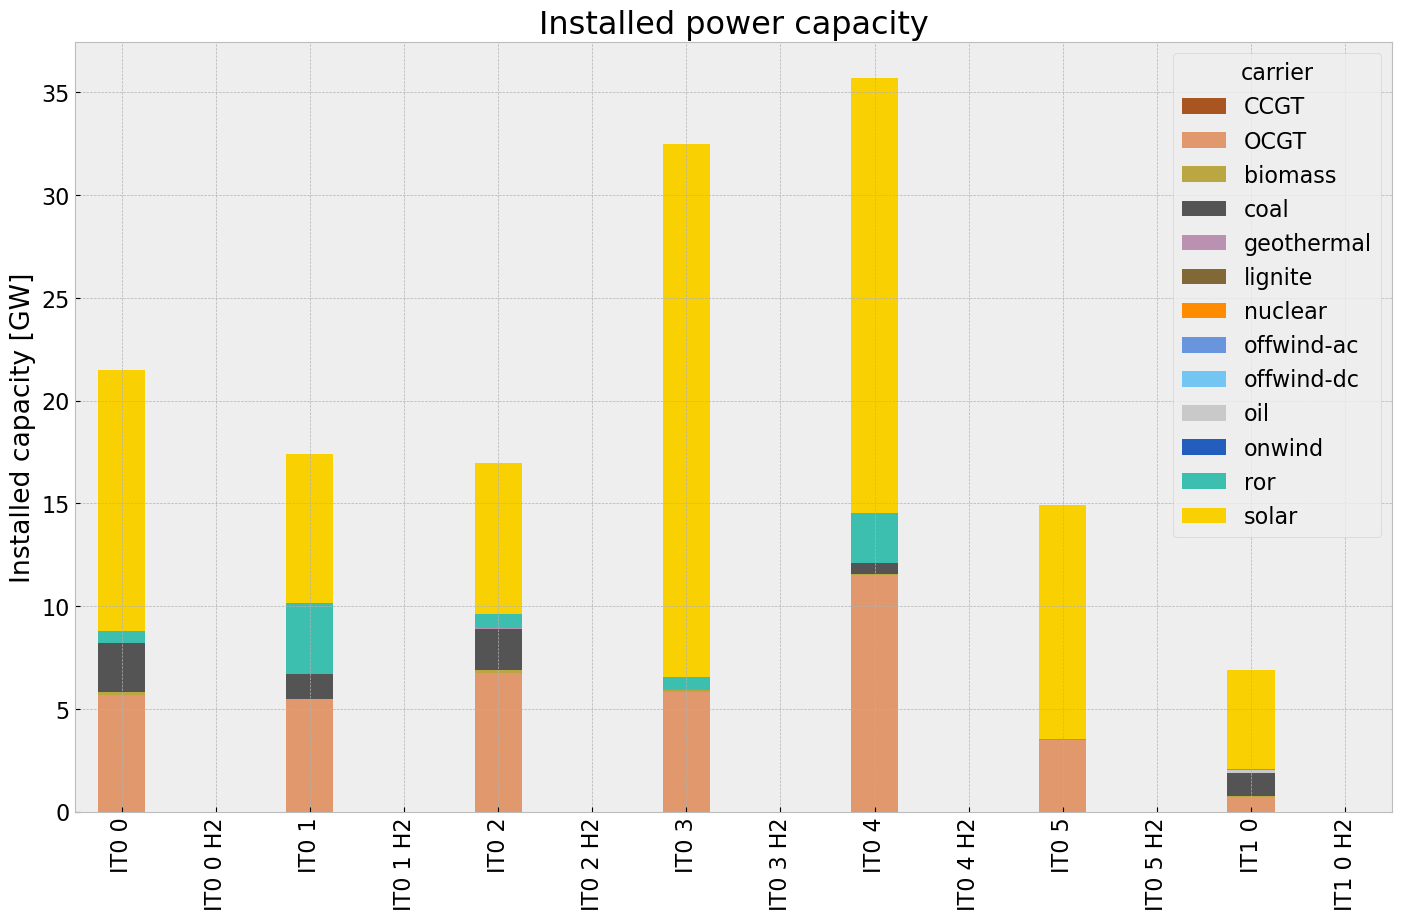

<Figure size 640x480 with 0 Axes>

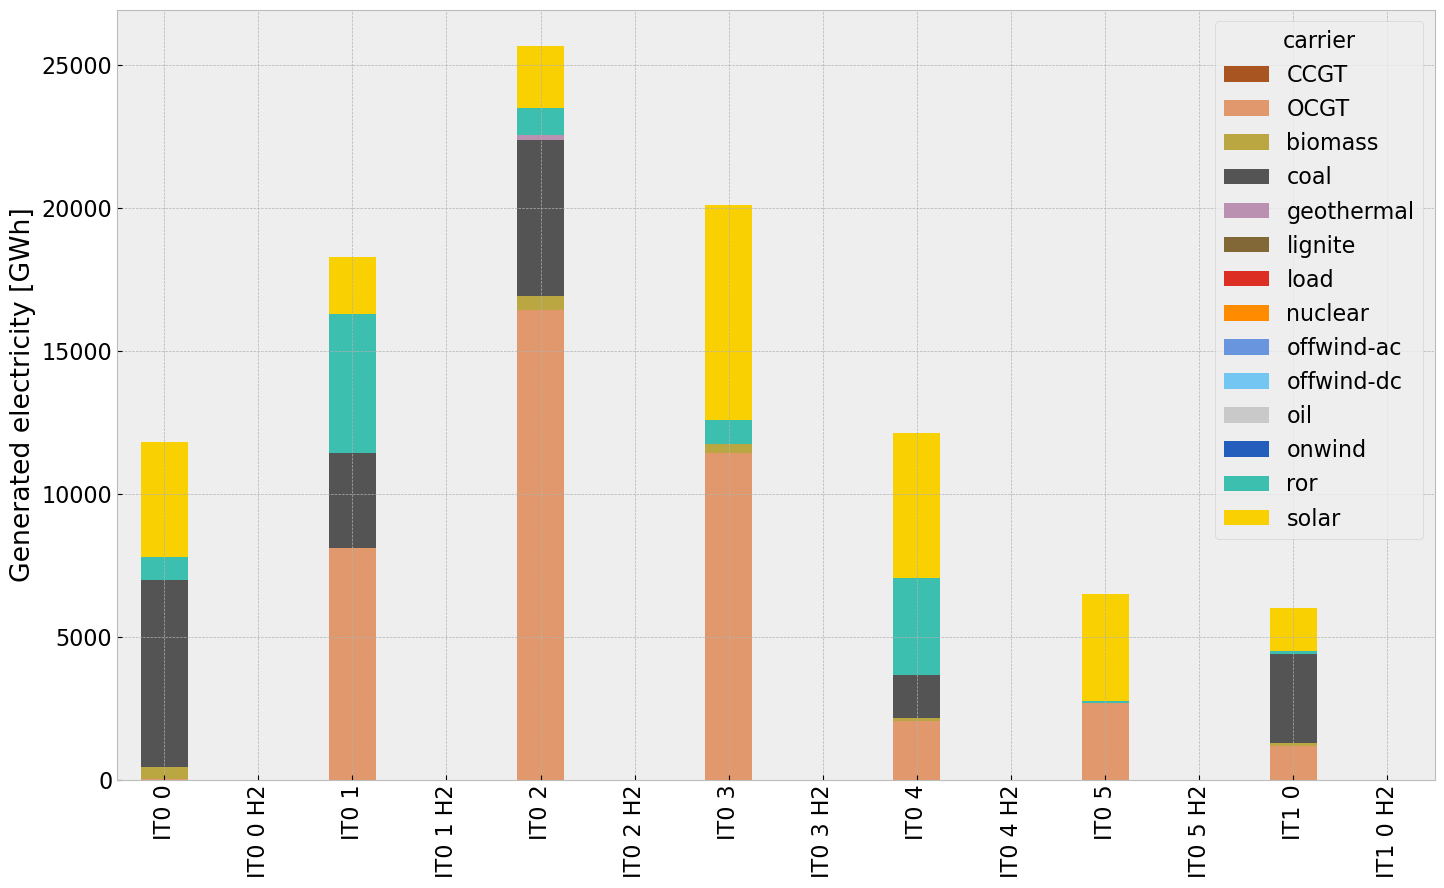

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1076928908.py:32: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n3.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1076928908.py:33: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_9760\1492059698.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(start=start_date, end=end_date,freq='3H')
c:\Users\Jeremy\

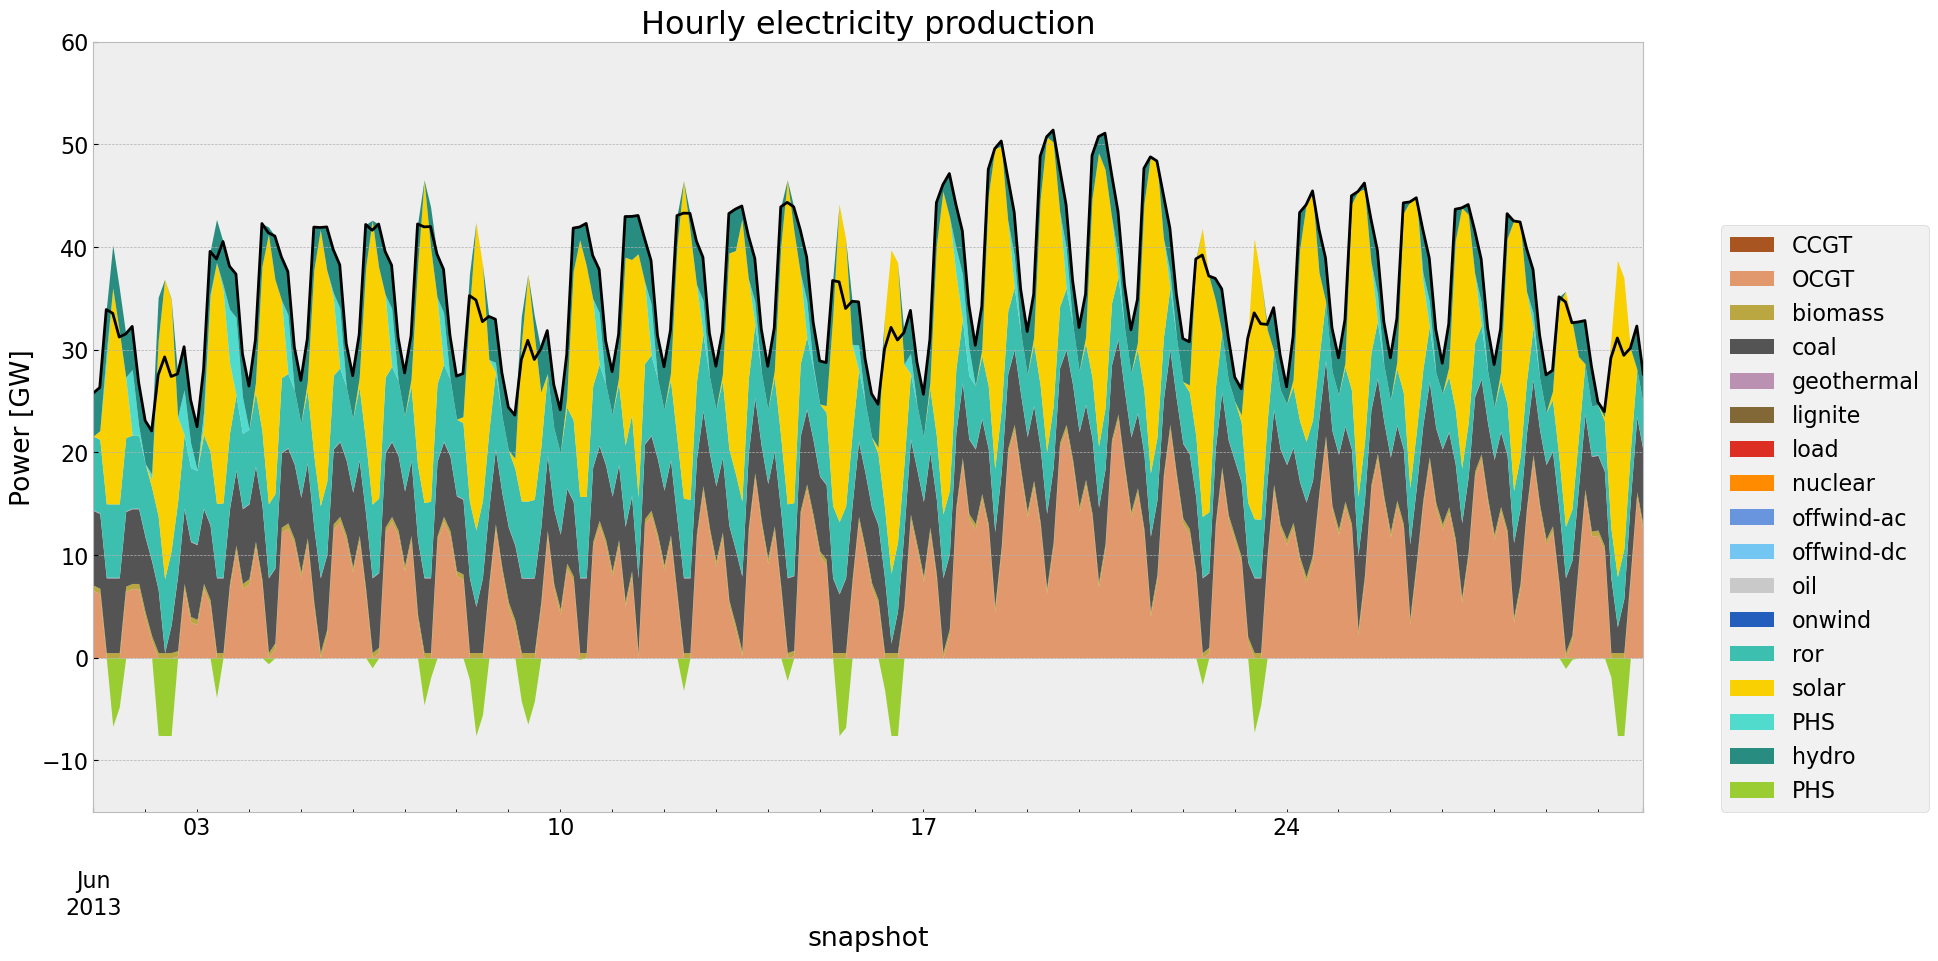

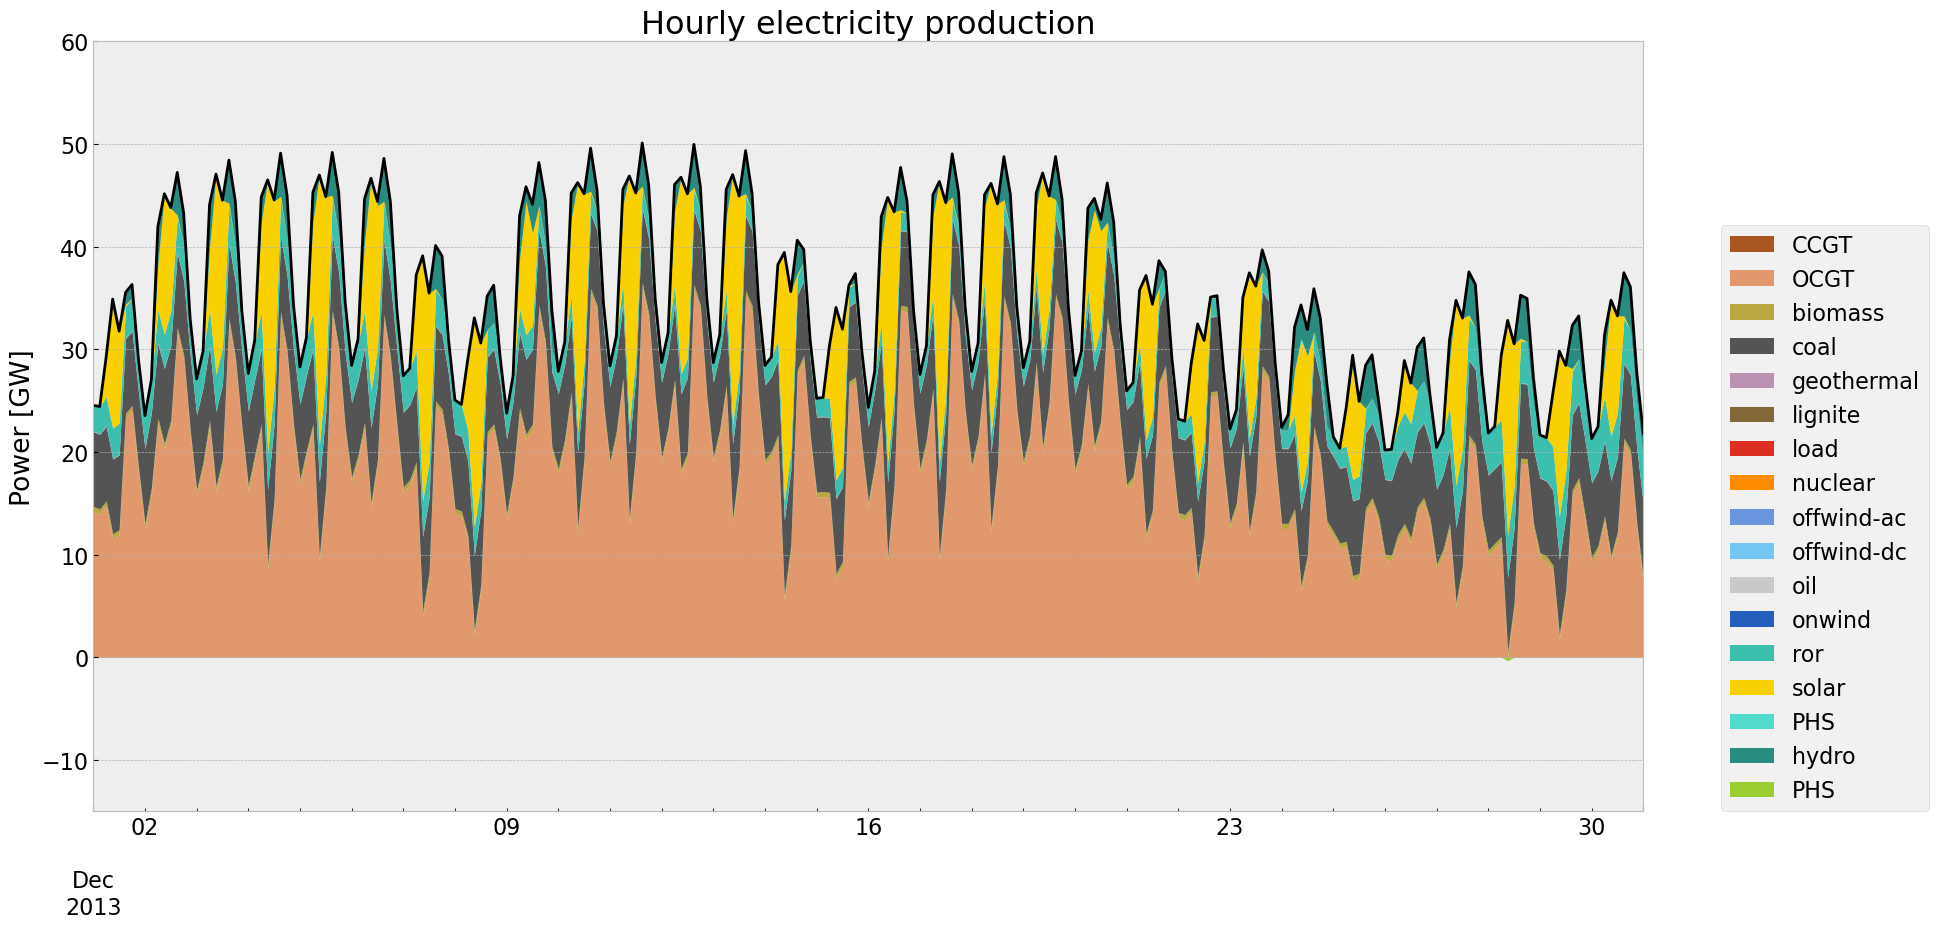

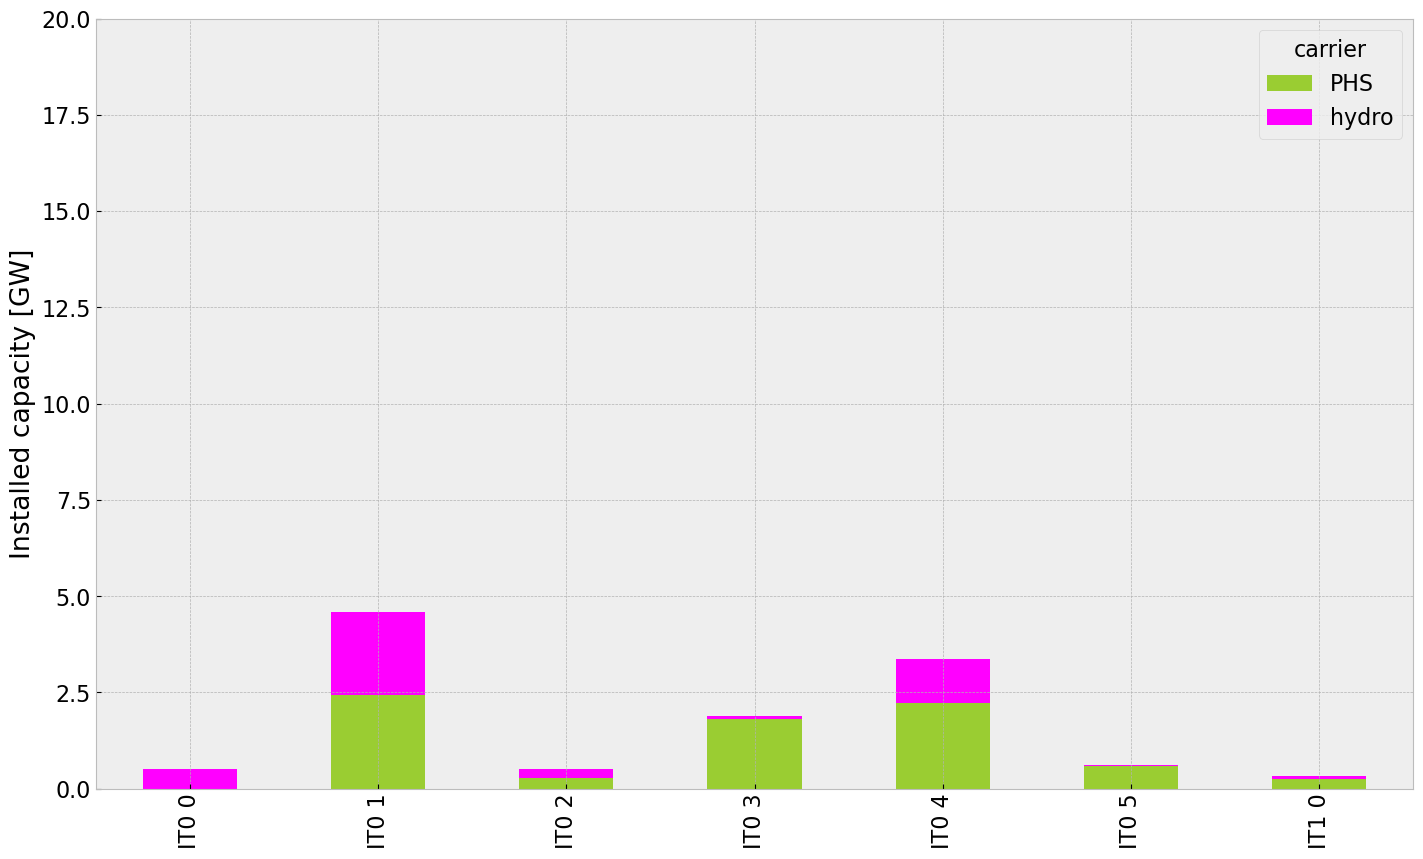

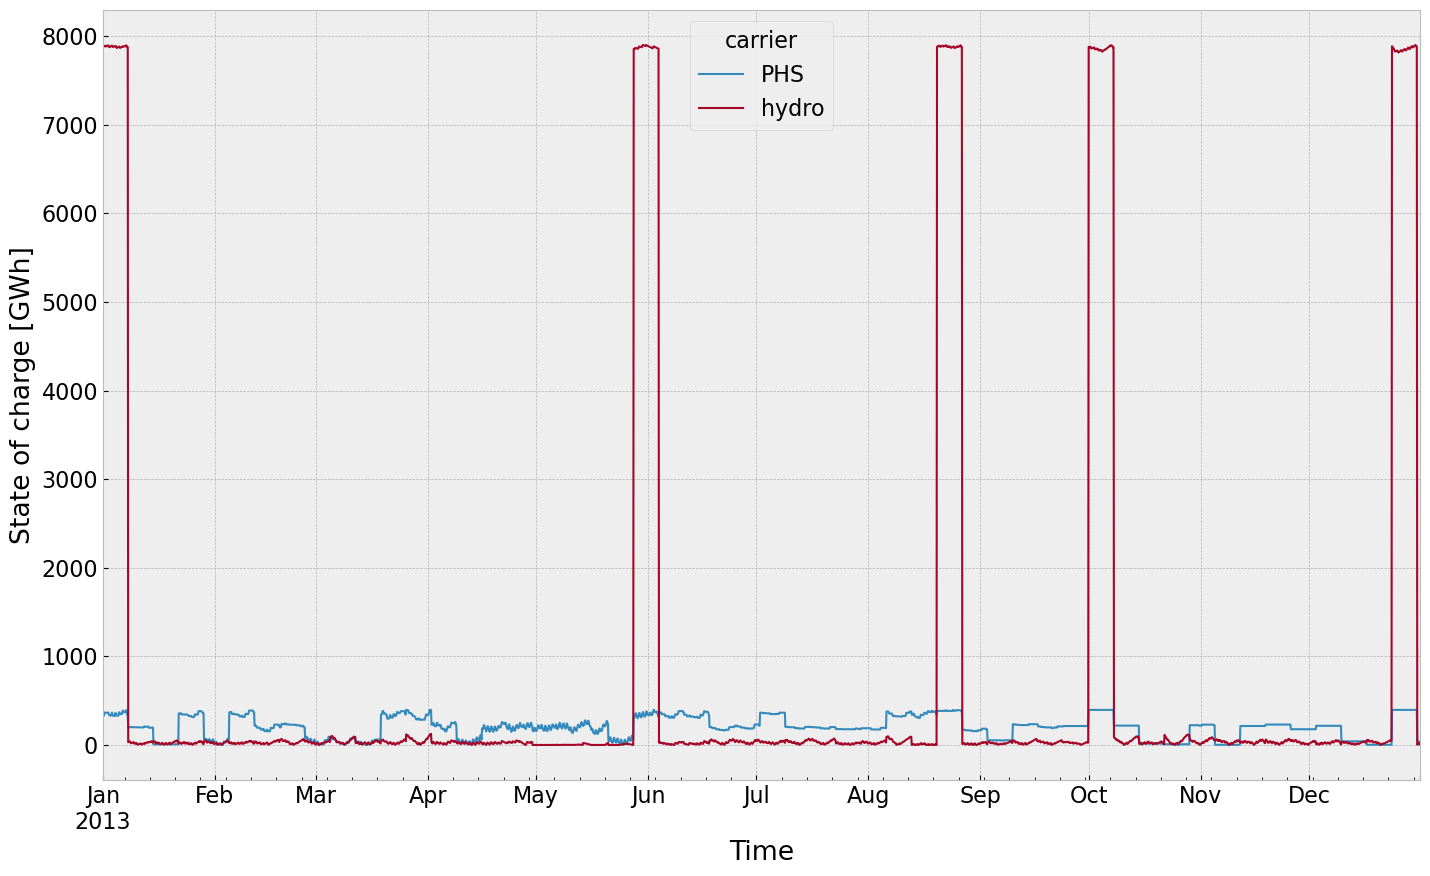

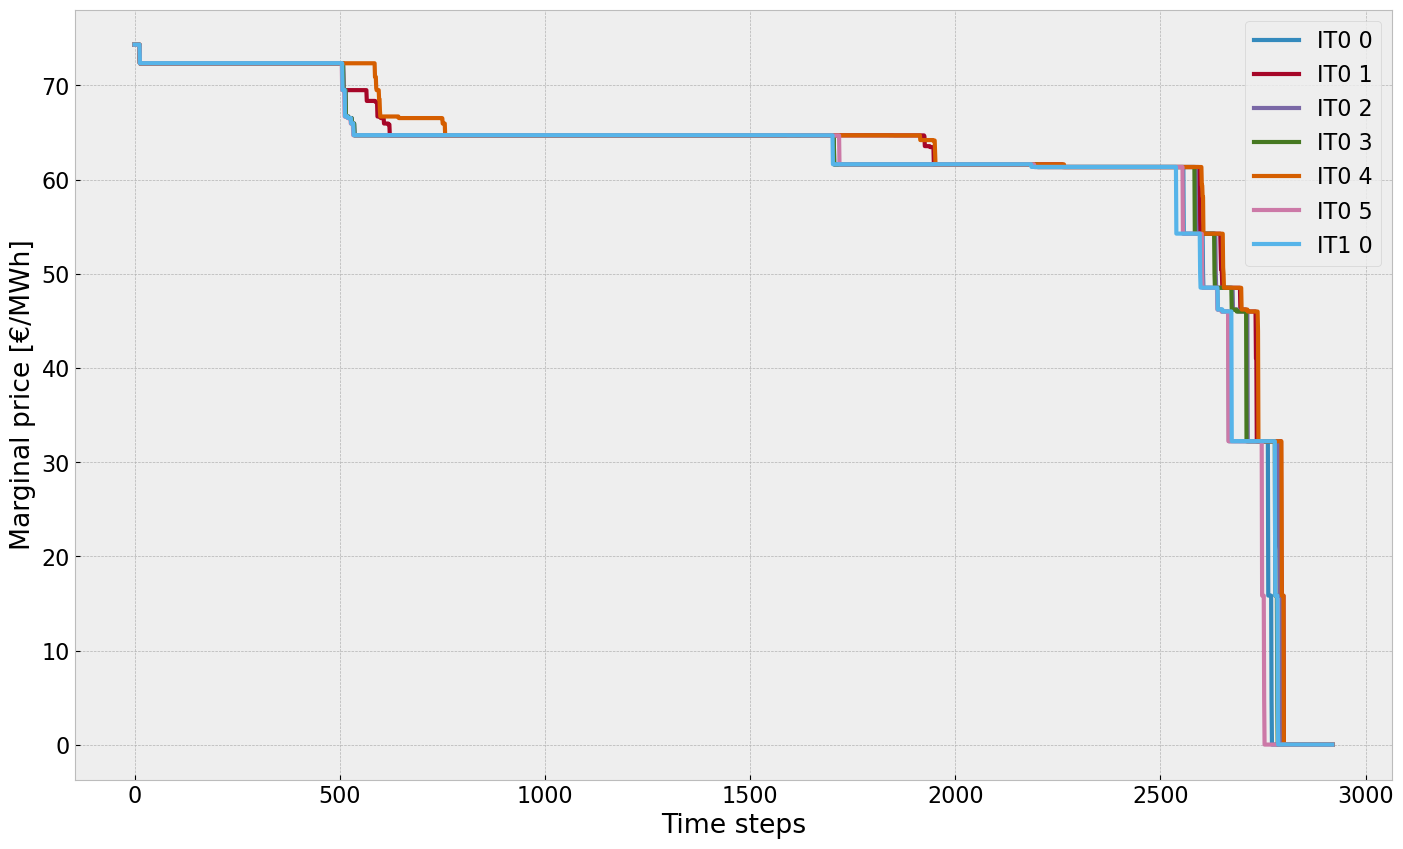

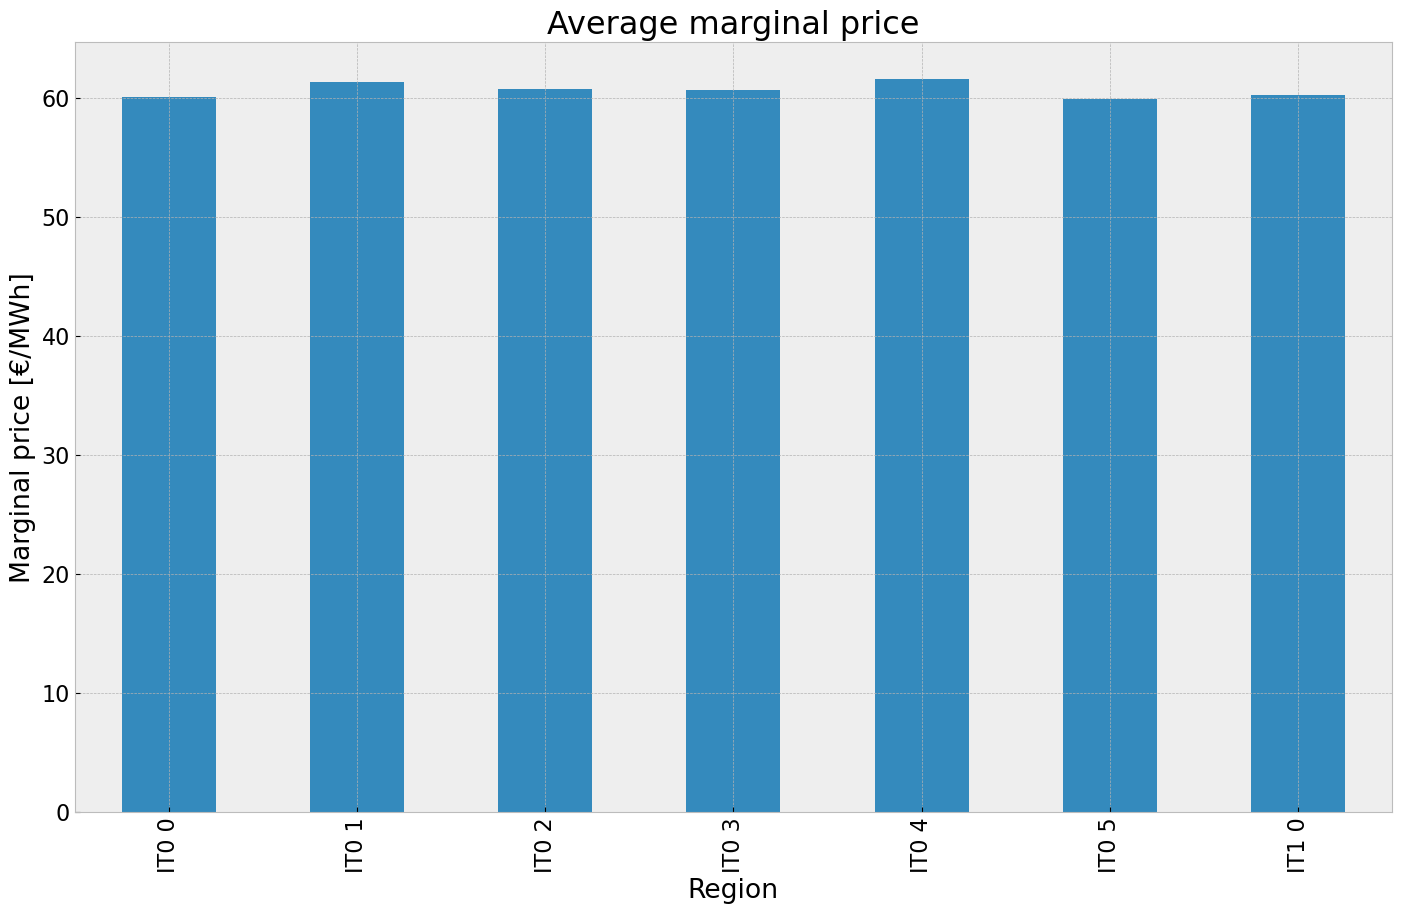

In [243]:
# Plotting
#installed cap
capacities = n3.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities.fillna(0, inplace=True)
gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)


inst_cap_table(colors,gen)

#Generation table
# consolidated generation table
carrier = n3.generators.carrier.unique()
df_tot_generation = n3.generators_t.p.sum()

generations = pd.Series(index = n3.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')

gen_t3 =(generations.unstack()/1000)#GWh

gen_power_table(gen_t3,colors_gen_table)

#Snapshot Summer and Winter
p = n3.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
sto = n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)    

gen_curve_month_summer(p, sto,colors_gen)
gen_curve_month_winter(p, sto,colors_gen)

#installed storage unit
inst_store_table(n3)

#State of Charge Storage unit
state_of_charge_plot(n3)

#Electricitty Price duration curve
price_dur_curve_plot(n3)

#avg electricity price
price_regions_table(n3)